# Regression Analysis - Ames House Price Prediction

# Table of contents:

1. The Background Story <br>
2. Importing the necessary libraries<br>
3. Reading the data<br>
4. Checking for missing values
5. Exploratory data analysis<br>
6. Data Pre processing<br>
    a. Data cleaning- checking for missing values<br>
    b. Handling categorical variables<br>
7. Splitting and Scaling the dataset<br>
8. Modeling- Selecting, training and optimizing<br>
    a. Linear Regression using Normal Equation<br>
    b. Lasso Regression and feature selection<br>
    c. KNN regression<br>
    d. Ridge regression<br>
    e. Support vector machine(linear)<br>
9. Final remarks

# 1. The Background Story <br>
Here we would like to predict the Saleprice of Houses/property using Regression Techniques. This dataset contains a large number of features (80) which affect the Saleprice of the property and hence shows us how square feet of the property alone does not affect the saleprice but a complex set of features, which ultimately underlines the importance of Machine Learning techniques to solve modern world problems.

# Acknowledgements
Ames housing Dataset was compiled by Dean De Cock for use in Regression Techniques.

# 2. Importing the necessary libraries


In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

# 3. Reading the data

In [333]:
os.getcwd()
os.chdir('D:\\ML_programs\House_sales_advanced')
df_merged = pd.read_csv('Ames_house_prices.csv')
# df_merged = pd.read_csv('train.csv')
# df_test = pd.read_csv('test.csv')
# print(df_test.head())
# print(df_test.shape)
# # df_merged = pd.read_csv('ames_raw_data.csv')

In [334]:
df_merged.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [335]:
df_merged.shape

(2919, 81)

In [336]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# The dataset has 2919 entries and 80 features(excluding id)

In [337]:
# Check for the datatypes
df_merged.dtypes.value_counts()

object     43
int64      27
float64    11
dtype: int64

The dataset has 43 categorical columns(features) and 38 numerical columns(features)


#  4. Checking for missing values

In [338]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [339]:
df_merged.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [340]:
df_merged.isnull().sum().sum()

13965

# There are a total of 13965 datapoints missing!!

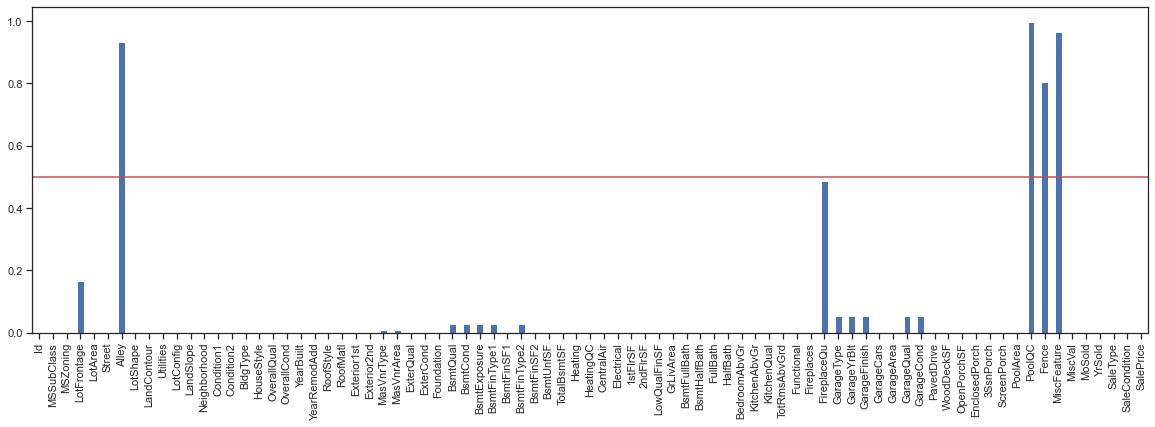

In [341]:
# Let's plot this to see which columns are having missing entries
plt.figure(figsize = (20, 6))
missing_data = df_merged.isnull().sum() / len(df_merged)
missing_data.plot.bar()
plt.axhline(0.5, color = 'r')
plt.show()

observation: We can clearly see that 
1. Alley
2. PoolQC
3. Fence
4. Miscfeature<br>
have more than 50% of their entries missing!! This is humongous.


# 5.  Exploratory Data Analysis

In [250]:
# Let's see how SalePrice is distributed
df_merged['SalePrice'].describe()

count      2919.000000
mean     180052.858171
std       57381.564586
min       34900.000000
25%      154795.000000
50%      176735.000000
75%      191896.000000
max      755000.000000
Name: SalePrice, dtype: float64

The mean selling price of the houses is ~\\$180000 with a standard deviation of ~\\$57000.

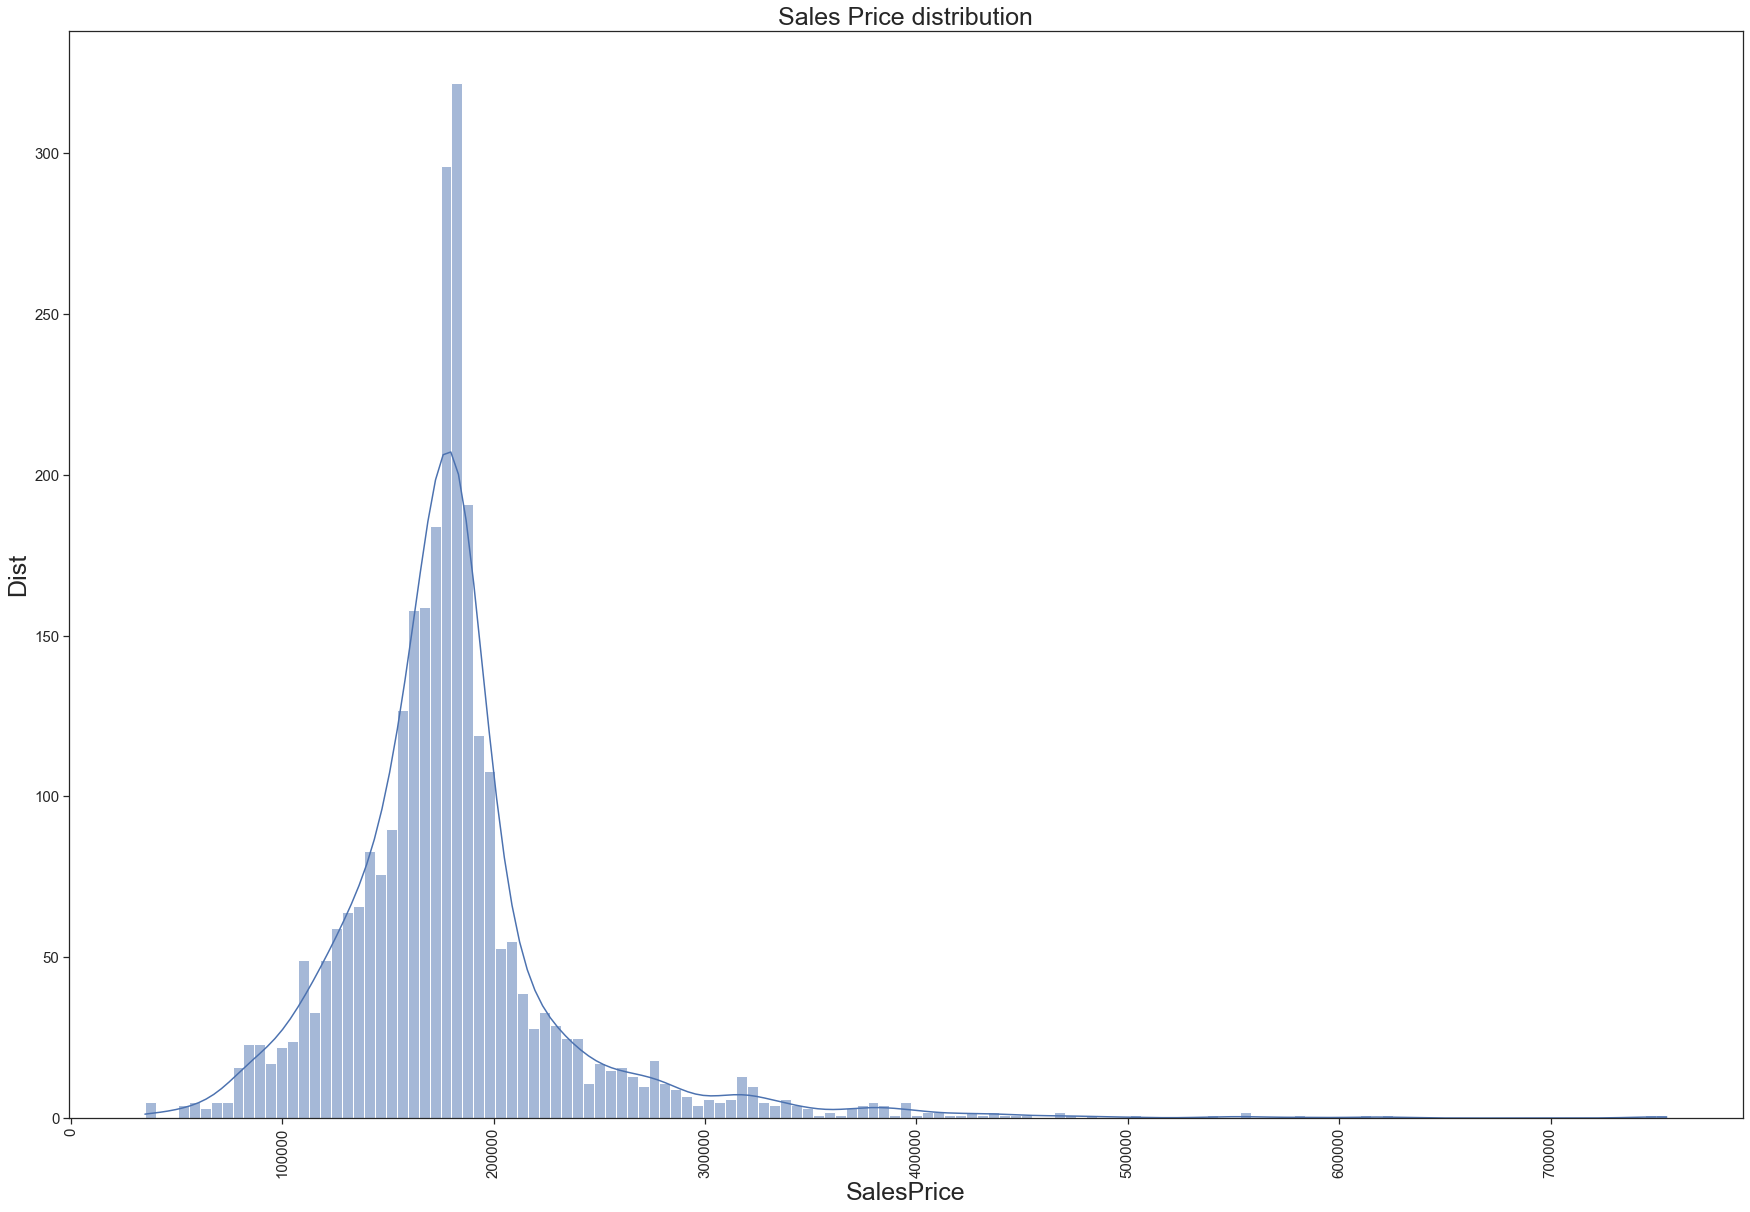

In [251]:
# Let's plot the SalePrice
# sns.displot(data=df_merged['SalePrice'])
# plt.xticks(fontsize=15, rotation='90')
# plt.yticks(fontsize=15)
# plt.xlabel('SalesPrice', fontsize=25)
# plt.ylabel('Dist', fontsize=15)
# plt.title('Sales Price Distribution', fontsize=25)
# plt.rcParams['figure.figsize'] = (30, 20)
# plt.show()

sns.histplot(df_merged['SalePrice'], kde=True)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('SalesPrice', fontsize=25)
plt.ylabel( 'Dist',fontsize=25)
plt.title('Sales Price distribution', fontsize=25)
plt.rcParams["figure.figsize"] = (30,20)

# From the plot it is very clear that the distribution is not exactly normal!! but follows a positively skewed distribution

# This clearly tells us that we need be very careful before using linear models. Also another thing that this distribution suggests is that if we train our data with this dataset then it might be better at predicting lower houseprices than higher house prices.



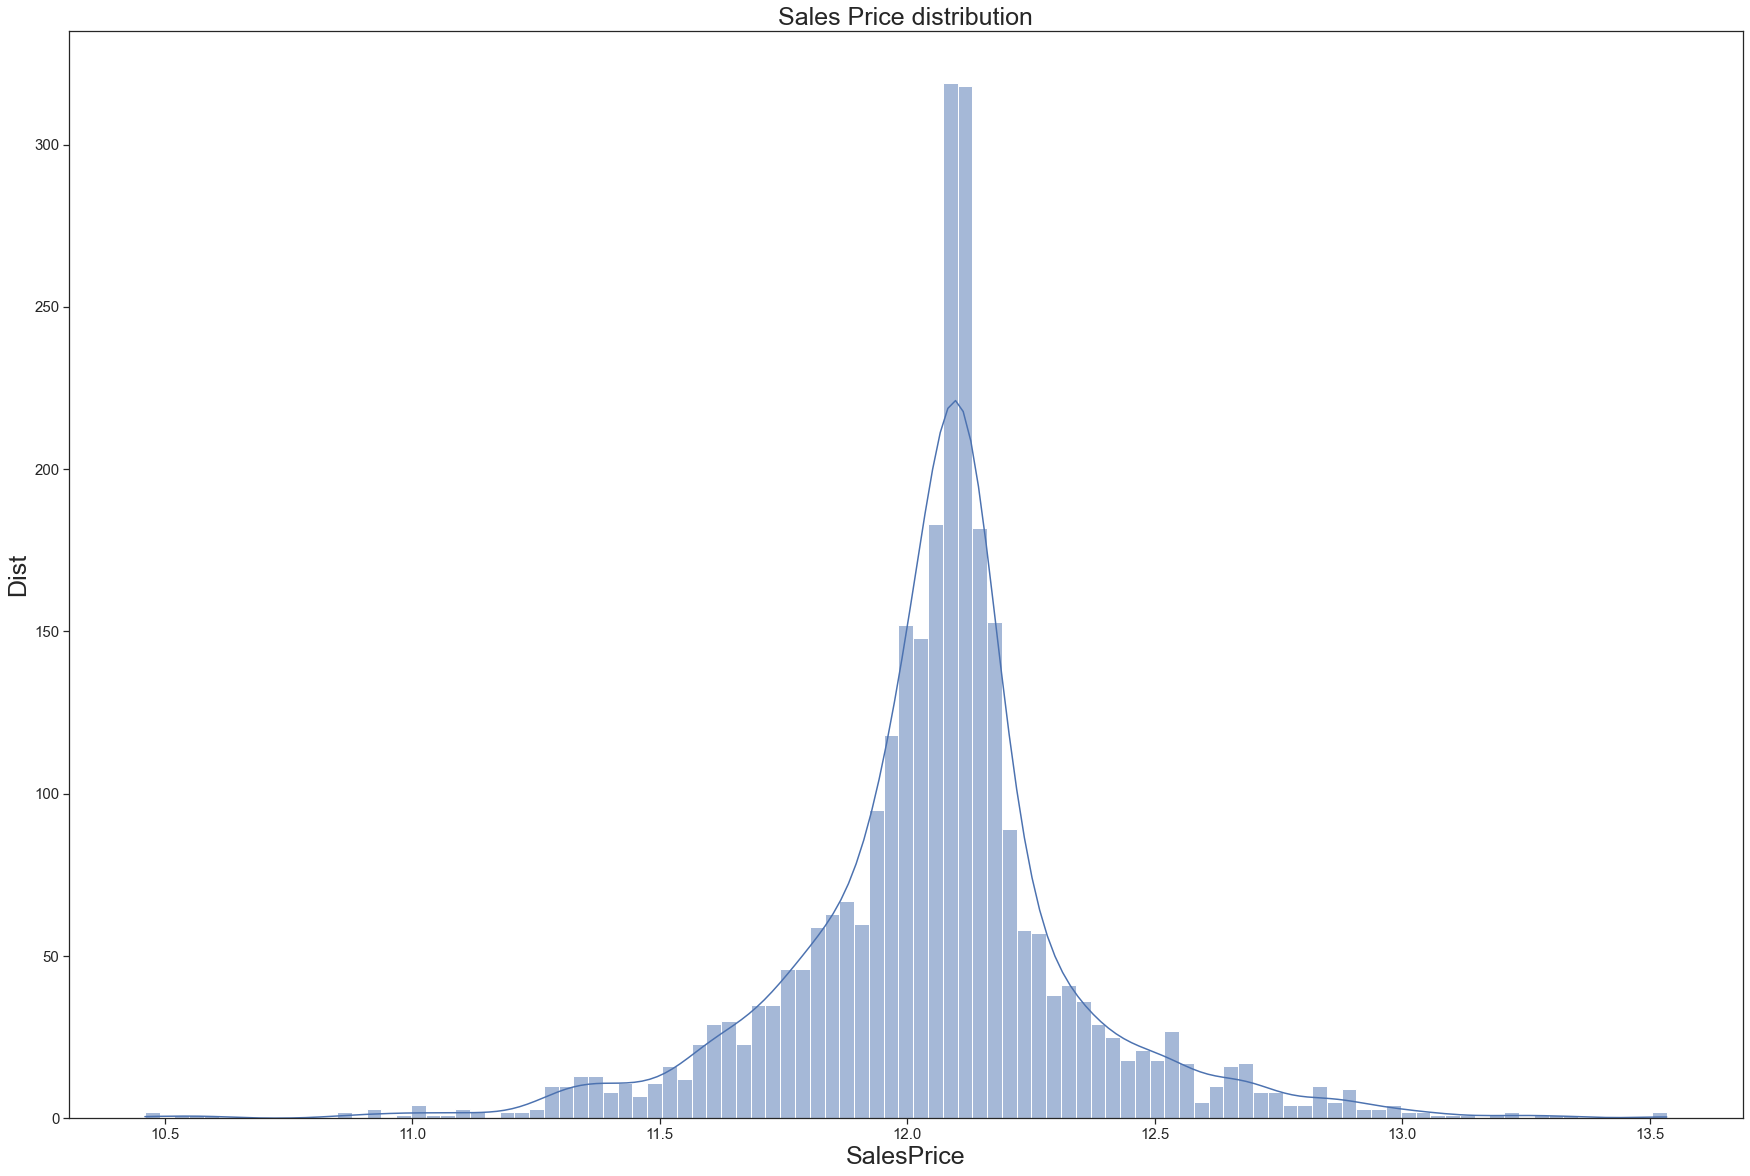

In [253]:
# Let's do a log transformation
sns.histplot(np.log(df_merged['SalePrice']), kde=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('SalesPrice', fontsize=25)
plt.ylabel( 'Dist',fontsize=25)
plt.title('Sales Price distribution', fontsize=25)
plt.rcParams["figure.figsize"] = (30,20)

This Looks much better!!


<AxesSubplot:>

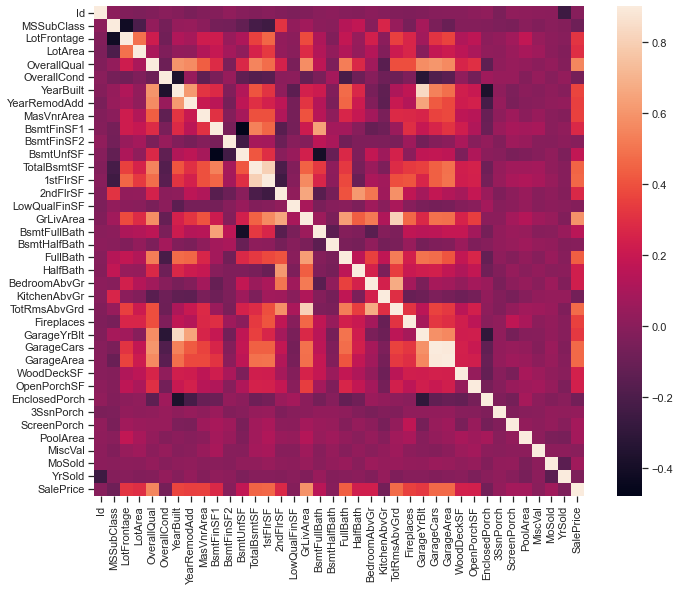

In [254]:
##Finally lets look at a correlation plot to understand all the variables
corrmat = df_merged.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# i. The Garage Cars is highly correlated with Garage Area
# ii. Garage Year built is highly correlated with Year Built of house
# iii. Total Basement Surface area is highly correlated with 1st floor surface area
# iv. Total Rooms above ground is highly correlated with Above Ground Living Area

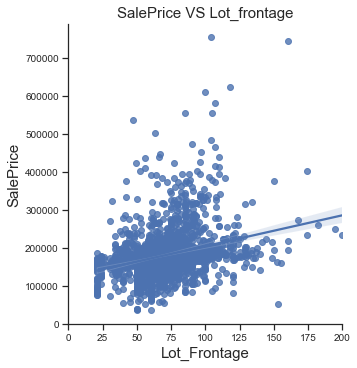

In [255]:
# Now let's look at how some features affect SalePrice -- One by One
# Numerical Features First
# Let's start with Continous Variables 
# List of Continous numerical variables - 20 such variables are there in all
# 1 LotFrontage
# 2 LotArea
# 3 MasVnrArea
# 4 BsmtFinSF1
# 5 BsmtFinSF2
# 6 BsmtUnfSF
# 7 TotalBsmtSF
# 8 1stFlrSF
# 9 2ndFlrSF
# 10 LowQualFinSF
# 11 GrLivArea
# 12 GarageArea
# 13 WoodDeckSF
# 14 OpenPorchSF
# 15 EnclosedPorch
# 16 3SsnPorch
# 17 ScreenPorch
# 18 PoolArea
# 19 SalePrice
# 20 MiscVal


# 1. Lot Frontage - Linear feet of street connected to property
sns.lmplot(x='LotFrontage', y='SalePrice', data=df_merged)
plt.title('SalePrice VS Lot_frontage', fontsize=15)
plt.xlabel('Lot_Frontage', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0,200)
plt.show()

# Type of linear relationship - Acceptable

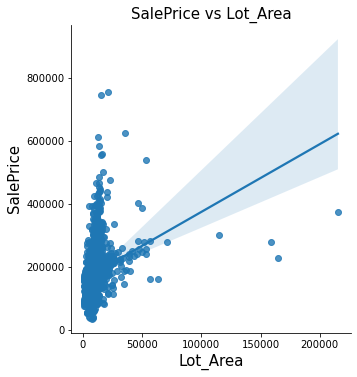

In [53]:
# 2. Lot area vs Saleprice
sns.lmplot(x='LotArea', y='SalePrice', data=df_merged)
plt.title('SalePrice vs Lot_Area', fontsize=15)
plt.xlabel('Lot_Area', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Type of linear relationship - Acceptable

# This data seems to have a couple of outliers which seem to affect the regression line, let's remove those outliers and replot<br>
# Also removing points >40000 sq.ft. is suggested in the document by Decock himself

(0.0, 50000.0)

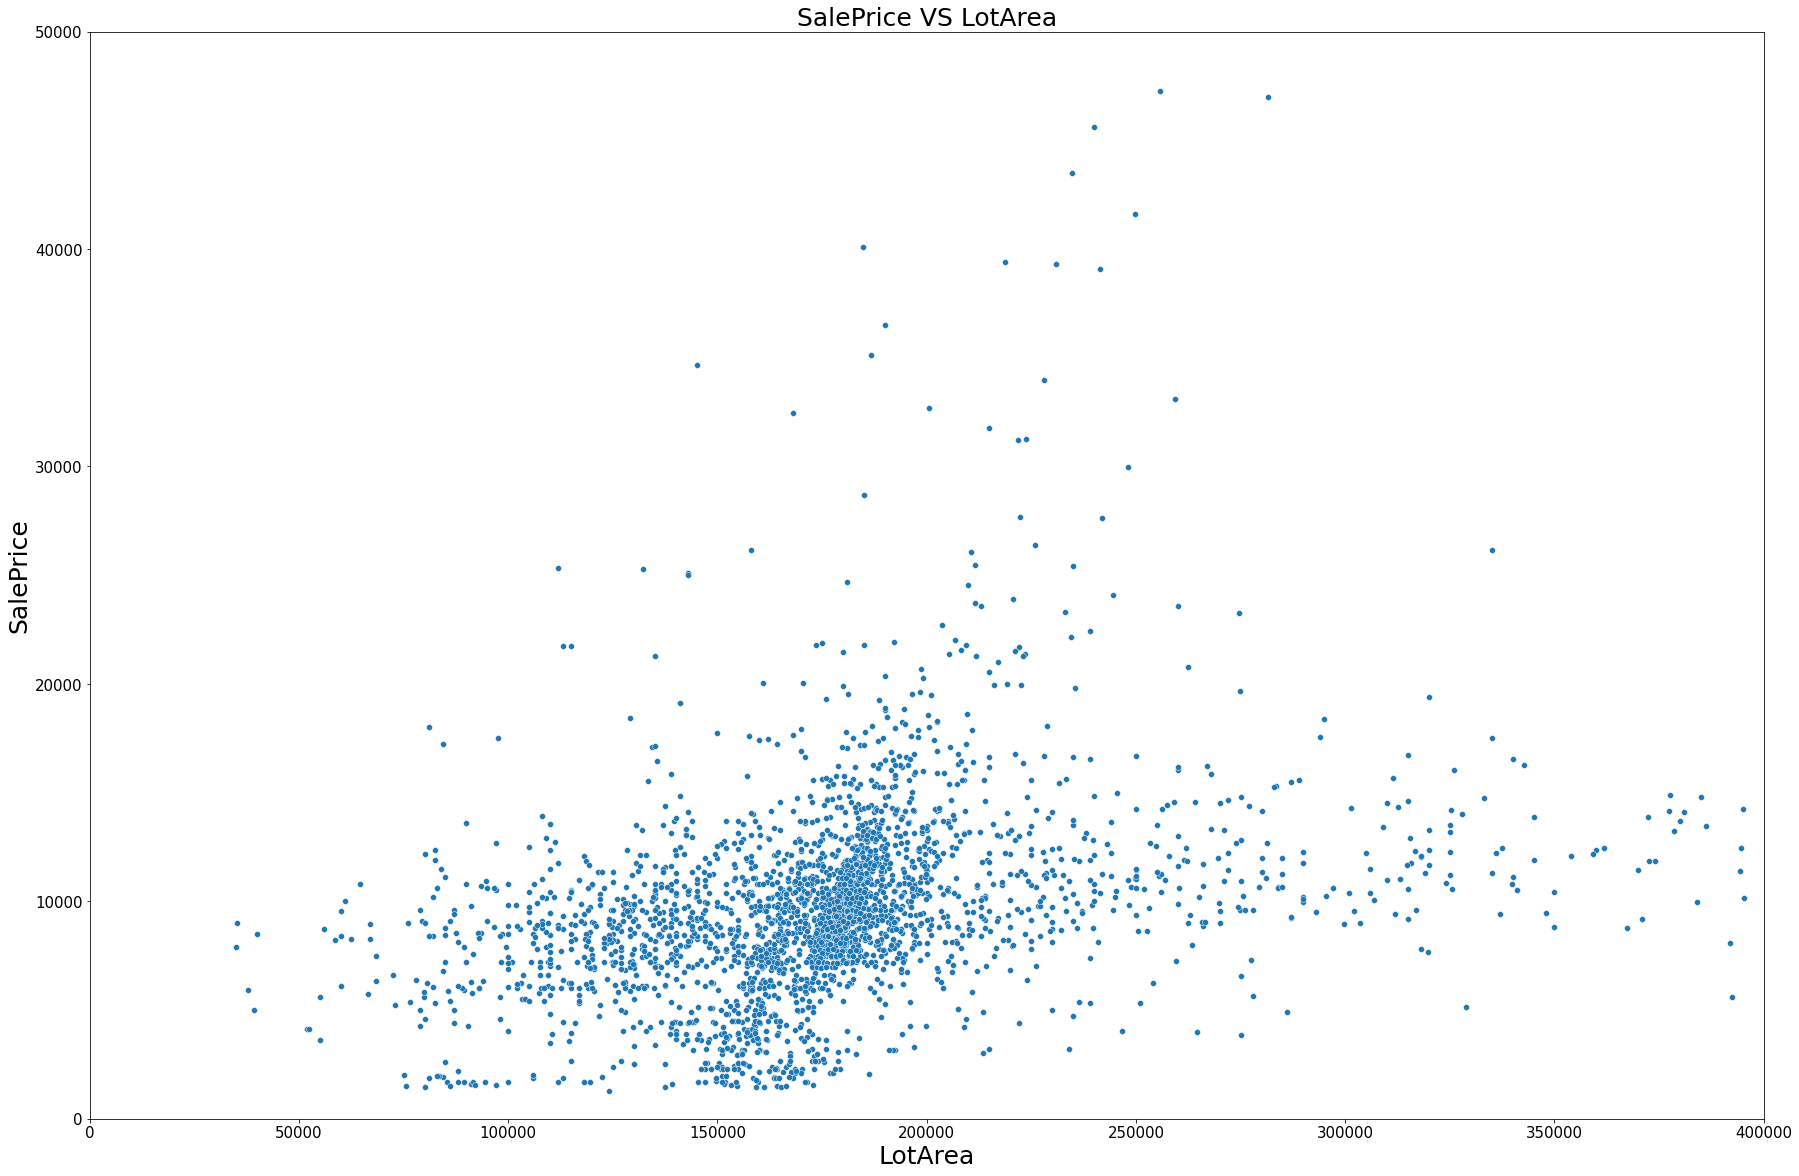

In [55]:
sns.scatterplot(x=df_merged['SalePrice'], y=df_merged['LotArea'])
plt.xlabel('LotArea', fontsize=25)
plt.ylabel('SalePrice', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('SalePrice VS LotArea', fontsize=25)
plt.rcParams["figure.figsize"] = (30,20)
plt.xlim(0,400000)
plt.ylim(0,50000)

It's pretty clear from this plot that there are 'Other' features other than LotArea that are contributing to the SalePrice!! Let's explore more to find them out!

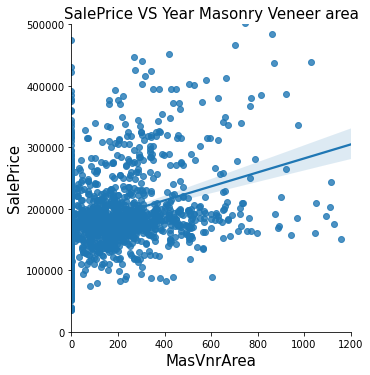

In [56]:
# 3. SalePrice vs Masonry Veneer area in square feet
sns.lmplot(x='MasVnrArea', y='SalePrice', data=df_merged)
plt.title('SalePrice VS Year Masonry Veneer area', fontsize=15)
plt.xlabel('MasVnrArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,500000)
plt.xlim(0,1200)
plt.show()

# Type of linear relationship - Acceptable

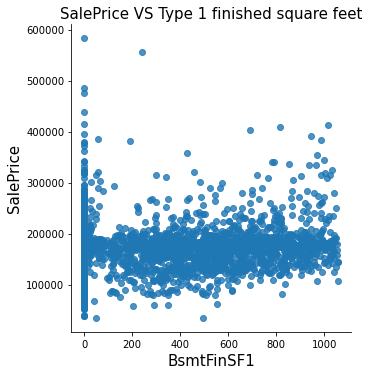

In [57]:
# 4. BsmtFinSF1: Type 1 finished square feet
# remove outliers
q = df_merged['BsmtFinSF1'].quantile(0.9)
df_new = df_merged[df_merged['BsmtFinSF1'] < q]
sns.lmplot(x='BsmtFinSF1', y='SalePrice', data=df_new)
plt.title('SalePrice VS Type 1 finished square feet', fontsize=15)
plt.xlabel('BsmtFinSF1', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Type of linear relationship - Negligible

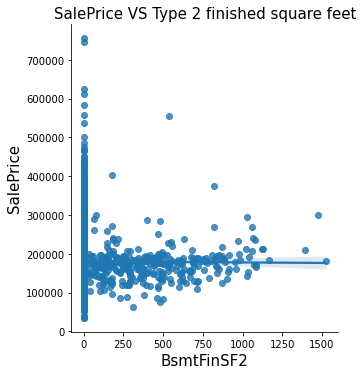

In [58]:
# 5. BsmtFinS2: Type 2 finished square feet
sns.lmplot(x='BsmtFinSF2', y='SalePrice', data=df_merged)
plt.title('SalePrice VS Type 2 finished square feet', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Type of linear relationship - Negligible

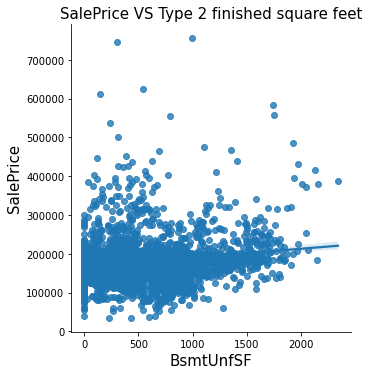

In [59]:
# 6. Unfinished square feet of basement area
# remove outliers
# q = df_new['BsmtUnfSF'].quantile(0.9)
# df_new = df_new[df_new['BsmtUnfSF'] < q]
sns.lmplot(x='BsmtUnfSF', y='SalePrice', data=df_merged)
plt.title('SalePrice VS Type 2 finished square feet', fontsize=15)
plt.xlabel('BsmtUnfSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# after removing the outliers, clearly there is no correlation with SalePrice

# There seems a slight increasing trend, however there are also some stark outliers in the data, let's remove them and see if the increasing trend exists

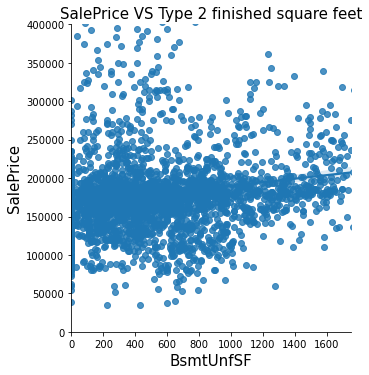

In [60]:
# removing Outliers
# q = df_new['BsmtUnfSF'].quantile(0.9)
# df_new = df_merged[df_merged['SalePrice'] < 50000]
sns.lmplot(x='BsmtUnfSF', y='SalePrice', data=df_merged)
plt.title('SalePrice VS Type 2 finished square feet', fontsize=15)
plt.xlabel('BsmtUnfSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0,1750)
plt.ylim(0,400000)
plt.show()

# Type of linear relationship - Negligible

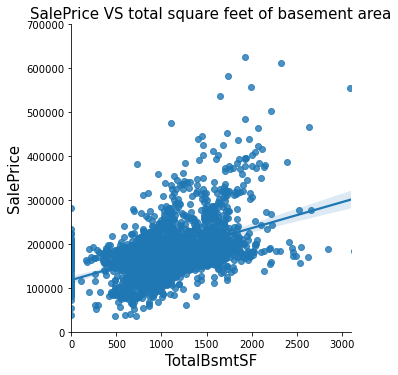

In [61]:
# 7. Total square feet of basement area
sns.lmplot(x='TotalBsmtSF', y='SalePrice', data=df_merged)
plt.title('SalePrice VS total square feet of basement area', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 700000)
plt.xlim(0,3100)
plt.show()
# **** There is a vert strong correlation bewteen otal square feet of basement area and basement area

# Type of linear relationship - Acceptable

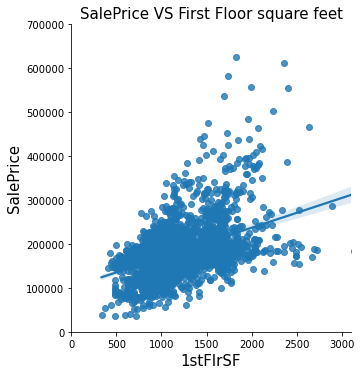

In [62]:
# 8. 1stFlrSF: First Floor square feet
sns.lmplot(x='1stFlrSF', y='SalePrice', data=df_merged)
plt.title('SalePrice VS First Floor square feet', fontsize=15)
plt.xlabel('1stFlrSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 700000)
plt.xlim(0,3100)
plt.show()

# Type of linear relationship - Acceptable

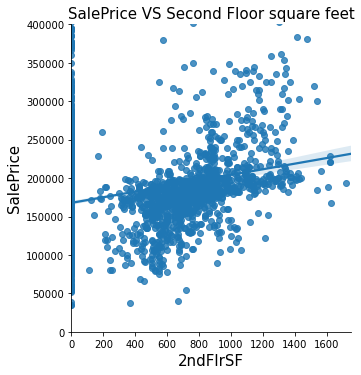

In [64]:
# 9. 2ndFlrSF: Second floor square feet
# df_new = df.copy()
# q = df_new['2ndFlrSF'].quantile(0.9)
# df_new = df_new[df_new['2ndFlrSF'] < q]
# q = df_new['SalePrice'].quantile(0.9)
# df_new = df_new[df_new['SalePrice'] < q]
sns.lmplot(x='2ndFlrSF', y='SalePrice', data=df_merged)
plt.title('SalePrice VS Second Floor square feet', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 400000)
plt.xlim(0,1750)
plt.show()
# surprisingly there is not much of correlation between 2nd floor surface area and sales price when compared to 1st floor area

# Type of linear relationship - Acceptable

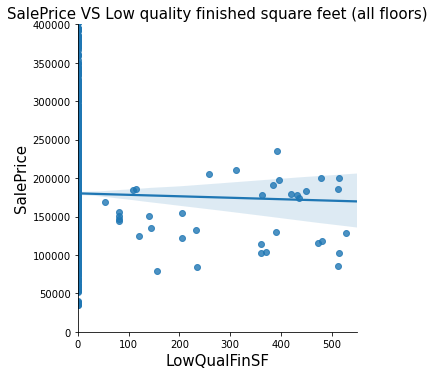

In [65]:
# 10. LowQualFinSF: Low quality finished square feet (all floors)
# df_new = df.copy()
# q = df_new['SalePrice'].quantile(0.75)
# df_new = df_new[df_new['SalePrice'] < q]
sns.lmplot(x='LowQualFinSF', y='SalePrice', data=df_merged)
plt.title('SalePrice VS Low quality finished square feet (all floors)', fontsize=15)
plt.xlabel('LowQualFinSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0,550)
plt.ylim(0, 400000)
plt.show()
# there is not much of a association

# Type of linear relationship - Negligible

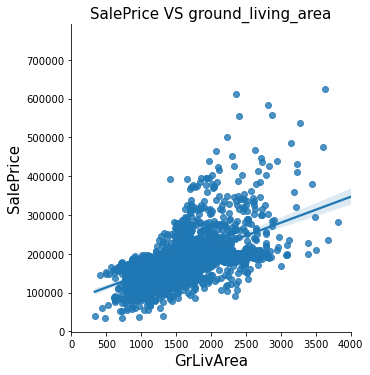

In [66]:
# 11. GrLivArea: Above grade (ground) living area square feet
sns.lmplot(x='GrLivArea', y='SalePrice', data=df_merged)
plt.title('SalePrice VS ground_living_area', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0,4000)
plt.show()

# Type of linear relationship - Acceptable

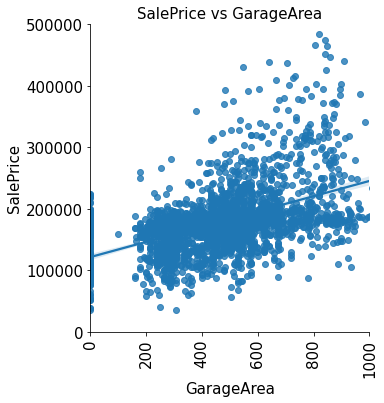

In [67]:
# 12. GarageArea: Size of garage in square feet
# df_new = df.copy()
# q = df_new['SalePrice'].quantile(0.9)
# df_new = df_new[df_new['SalePrice'] < q]
#
# q = df_new['GarageArea'].quantile(0.9)
# df_new = df_new[df_new['GarageArea'] < q]
#
sns.lmplot(x='GarageArea', y='SalePrice', data=df_merged)
plt.title('SalePrice vs GarageArea', fontsize=15)
plt.xlabel('GarageArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.xlim(0, 1000)
plt.ylim(0, 500000)
plt.show()

# Type of linear relationship - Acceptable

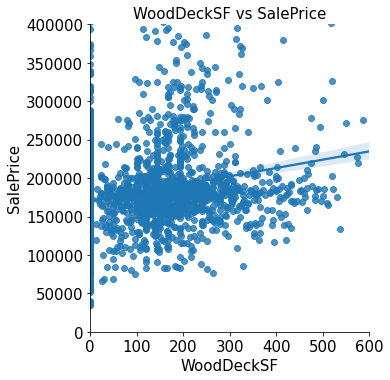

In [68]:
# 13. WoodDeckSF: Wood deck area in square feet
# remove outliers above and below
# df_new = df.copy()
# q_low = df["SalePrice"].quantile(0.1)
# q_hi  = df["SalePrice"].quantile(0.8)
#
# df_new = df[(df["SalePrice"] < q_hi) & (df["SalePrice"] > q_low)]
#
# # q = df_new['SalePrice'].quantile(0.9)
# # df_new = df_new[df_new['SalePrice'] < q]
#
# q = df_new['WoodDeckSF'].quantile(0.9)
# df_new = df_new[df_new['WoodDeckSF'] < q]
sns.lmplot(x='WoodDeckSF', y='SalePrice', data=df_merged)
plt.title('WoodDeckSF vs SalePrice', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,600)
plt.ylim(0, 400000)
plt.show()

# Type of linear relationship - Acceptable

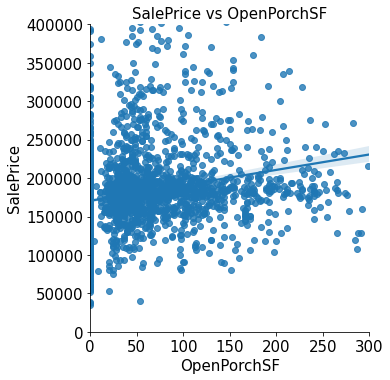

In [69]:
# 14 open porch Surface Area (OpenPorchSF)
sns.lmplot(x='OpenPorchSF', y='SalePrice', data=df_merged)
plt.title('SalePrice vs OpenPorchSF', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 300)
plt.ylim(0, 400000)
plt.show()

# Type of linear relationship - Acceptable


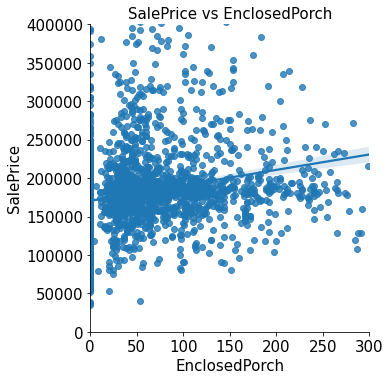

In [70]:
# 15. EnclosedPorch: Enclosed porch area in square feet
sns.lmplot(x='OpenPorchSF', y='SalePrice', data=df_merged)
plt.title('SalePrice vs EnclosedPorch', fontsize=15)
plt.xlabel('EnclosedPorch', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 300)
plt.ylim(0, 400000)
plt.show()


# Type of linear relationship - Acceptable


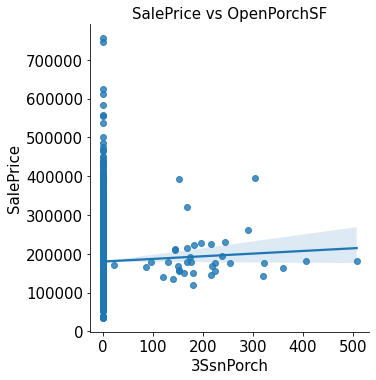

In [71]:
# 16. 3SsnPorch: Three season porch area in square feet
sns.lmplot(x='3SsnPorch', y='SalePrice', data=df_merged)
plt.title('SalePrice vs OpenPorchSF', fontsize=15)
plt.xlabel('3SsnPorch', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


# Type of linear relationship - Negligible


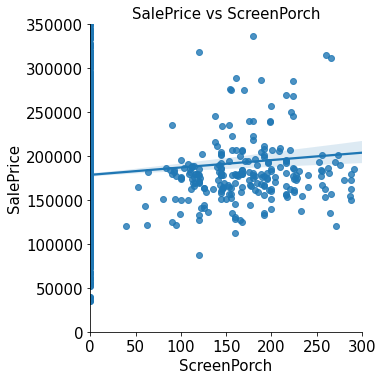

In [72]:
# 17. ScreenPorch: Screen porch area in square feet
# df_new = df.copy()
# df_new = df[df['SalePrice'] < 40000]
sns.lmplot(x='ScreenPorch', y='SalePrice', data=df_merged)
plt.title('SalePrice vs ScreenPorch', fontsize=15)
plt.xlabel('ScreenPorch', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 300)
plt.ylim(0, 350000)
plt.show()


# Type of linear relationship - Negligible


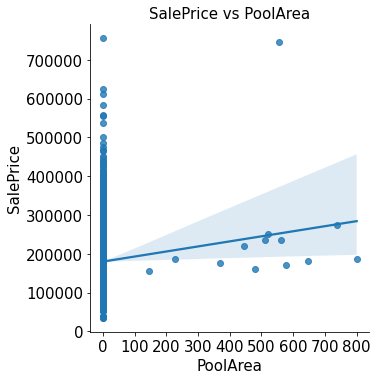

In [73]:
# 18. PoolArea: Pool area in square feet
sns.lmplot(x='PoolArea', y='SalePrice', data=df_merged)
plt.title('SalePrice vs PoolArea', fontsize=15)
plt.xlabel('PoolArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



# Type of linear relationship - Negligible

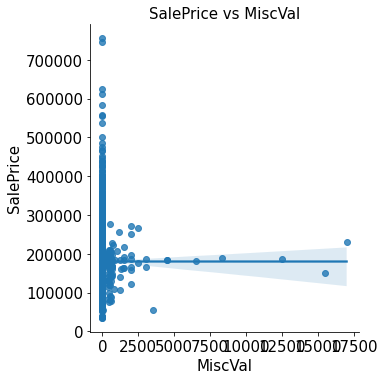

In [74]:
# 19. MiscVal: $Value of miscellaneous feature
sns.lmplot(x='MiscVal', y='SalePrice', data=df_merged)
plt.title('SalePrice vs MiscVal', fontsize=15)
plt.xlabel('MiscVal', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


# Type of linear relationship - Negligible


# Discrete Numerical Features

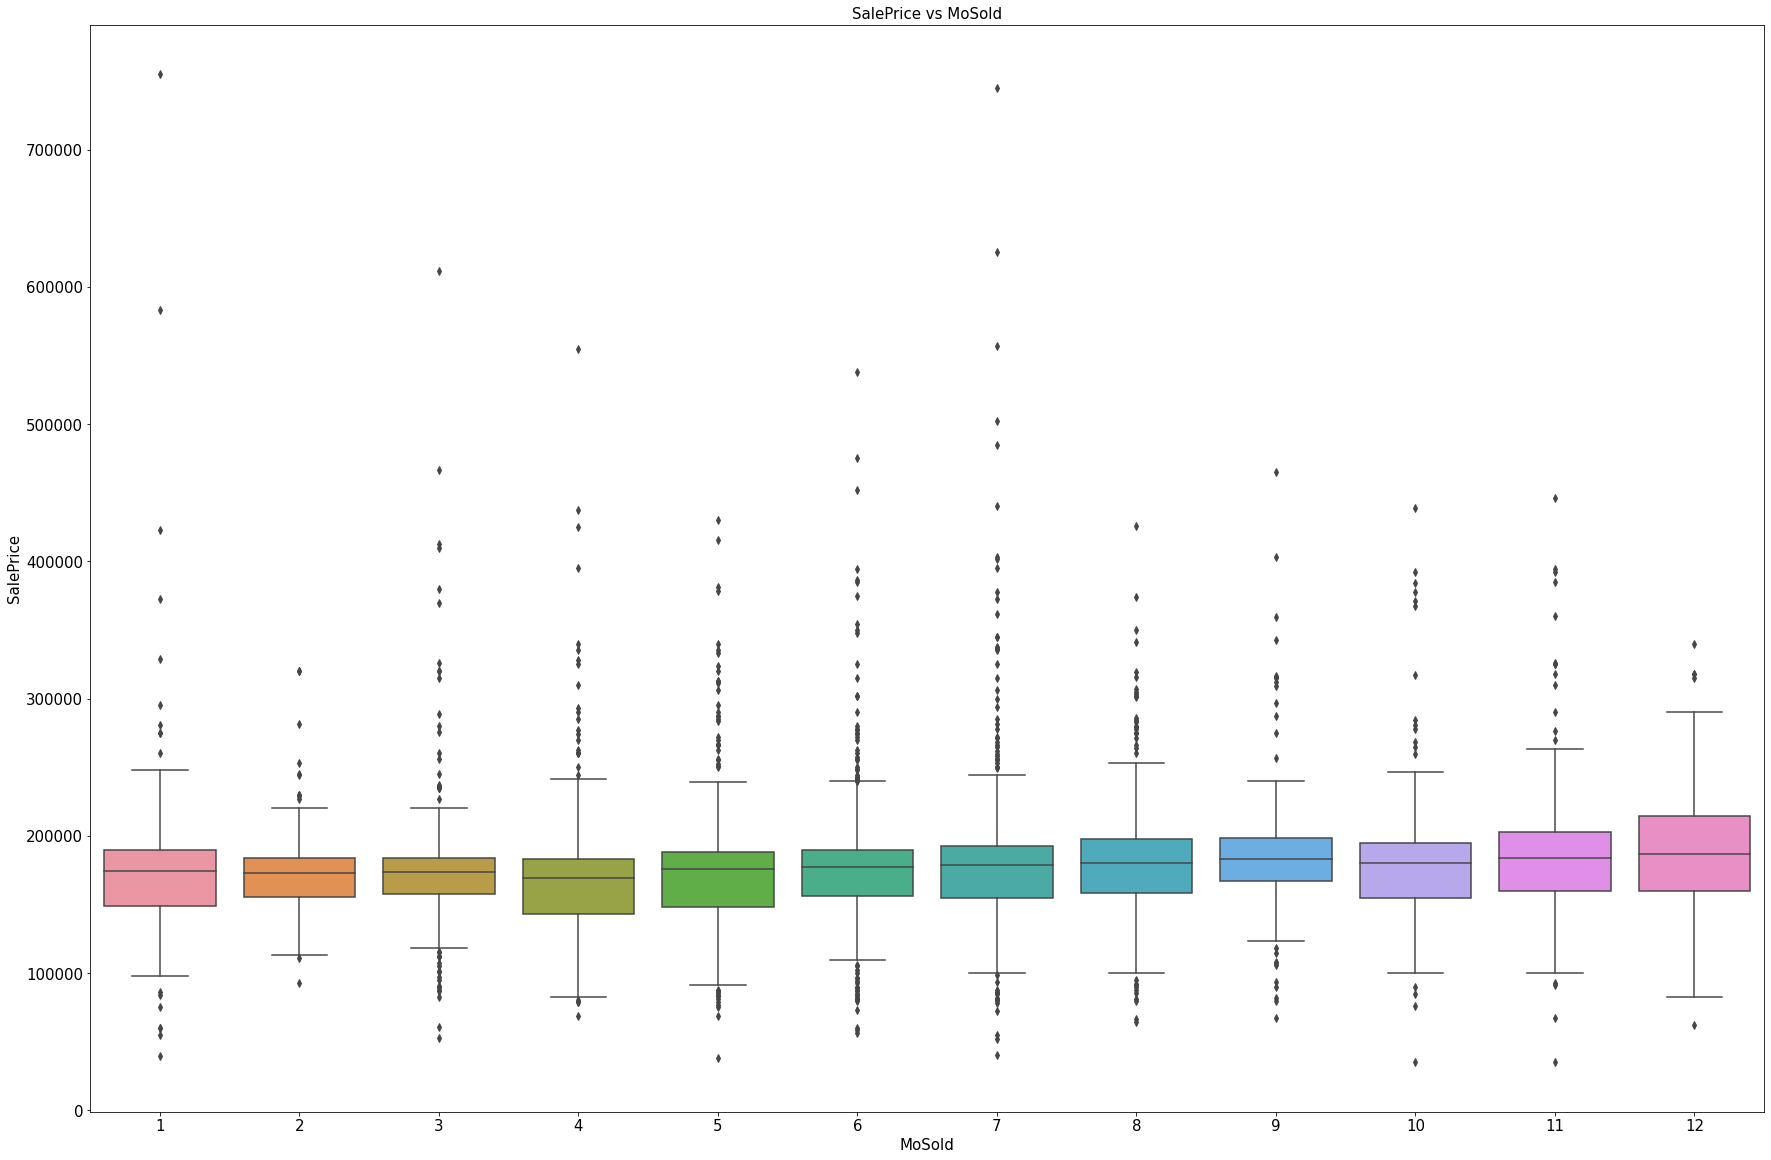

In [75]:
# 1. MoSold: Month Sold (MM)
sns.boxplot(x='MoSold', y='SalePrice', data=df_merged)
plt.title('SalePrice vs MoSold', fontsize=15)
plt.xlabel('MoSold', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Not much of correlation observed here

# There seems to be no effect of month on the SalePrice.

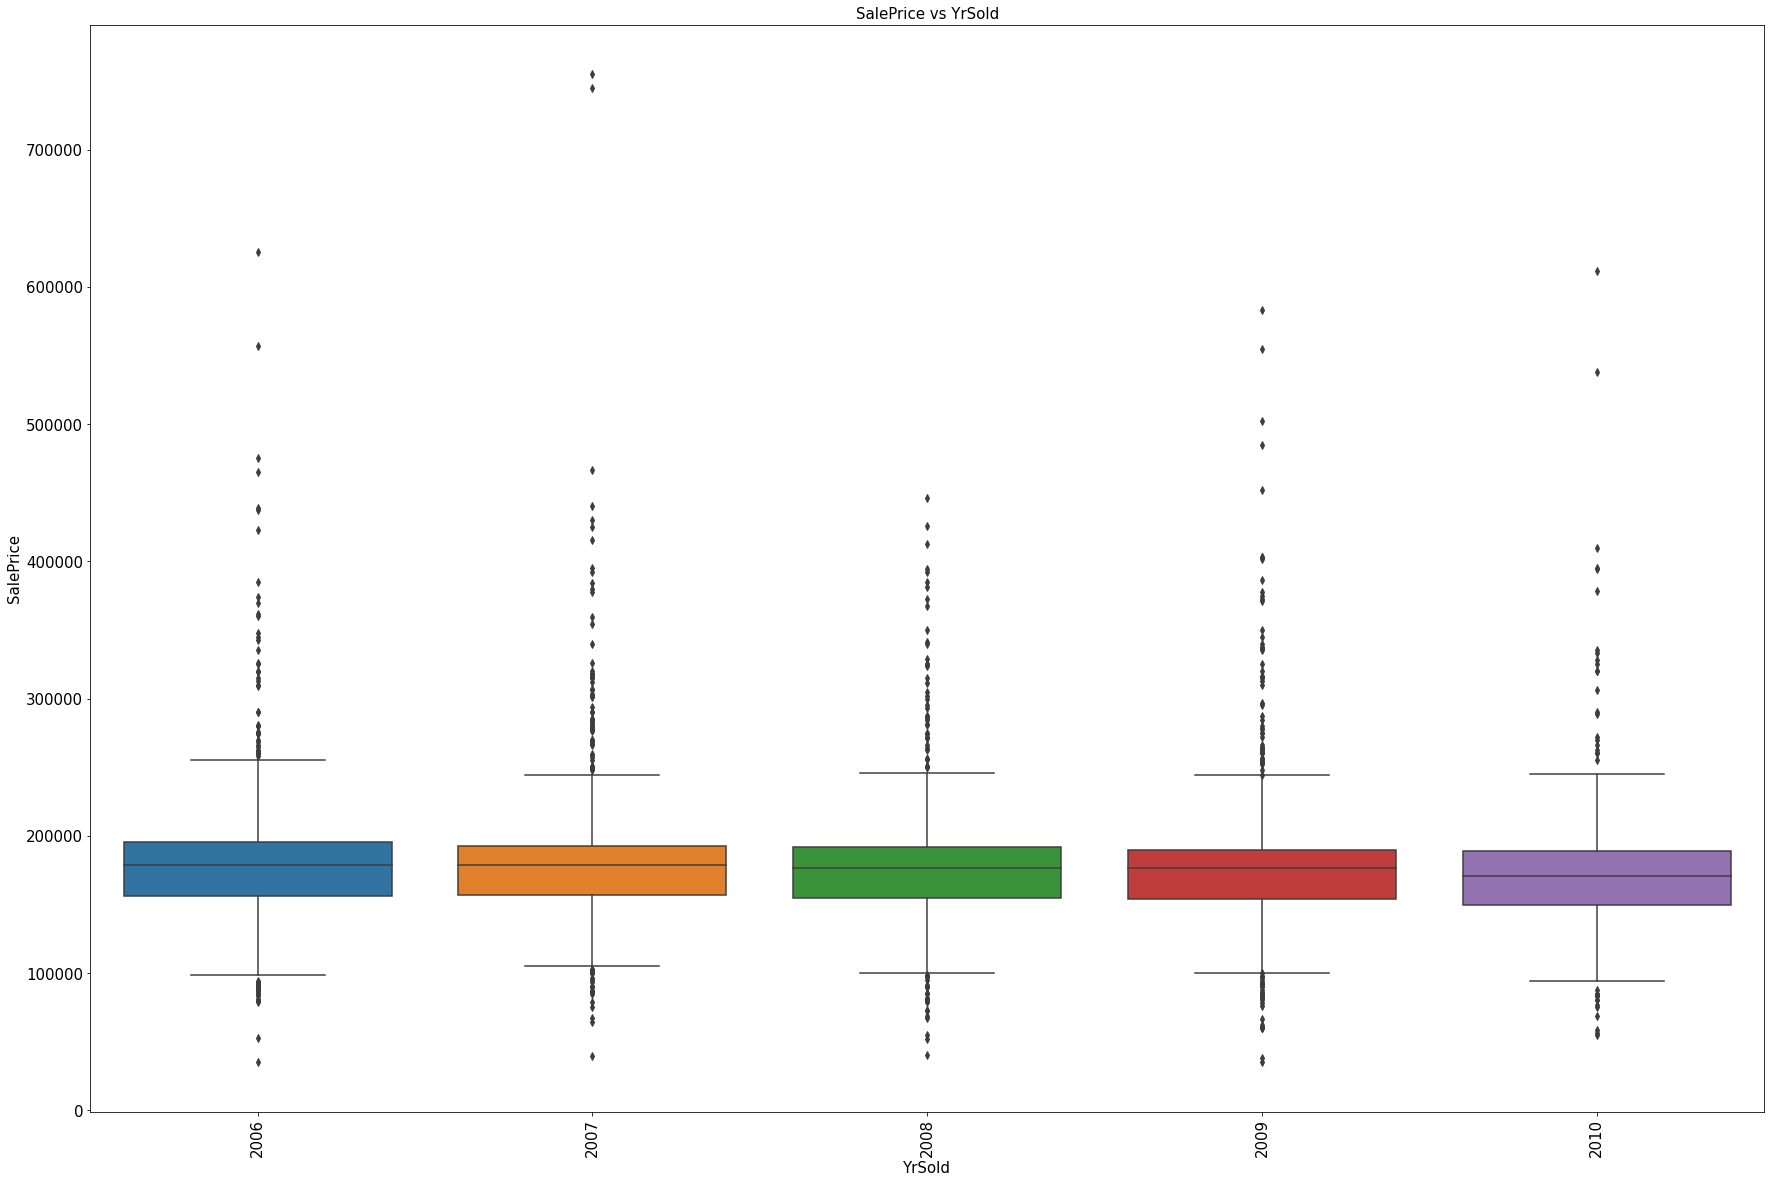

In [76]:
# 2. YrSold: Year Sold (YYYY)
sns.boxplot(x='YrSold', y='SalePrice', data=df_merged)
plt.title('SalePrice vs YrSold', fontsize=15)
plt.xlabel('YrSold', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()



# No correlation observed here

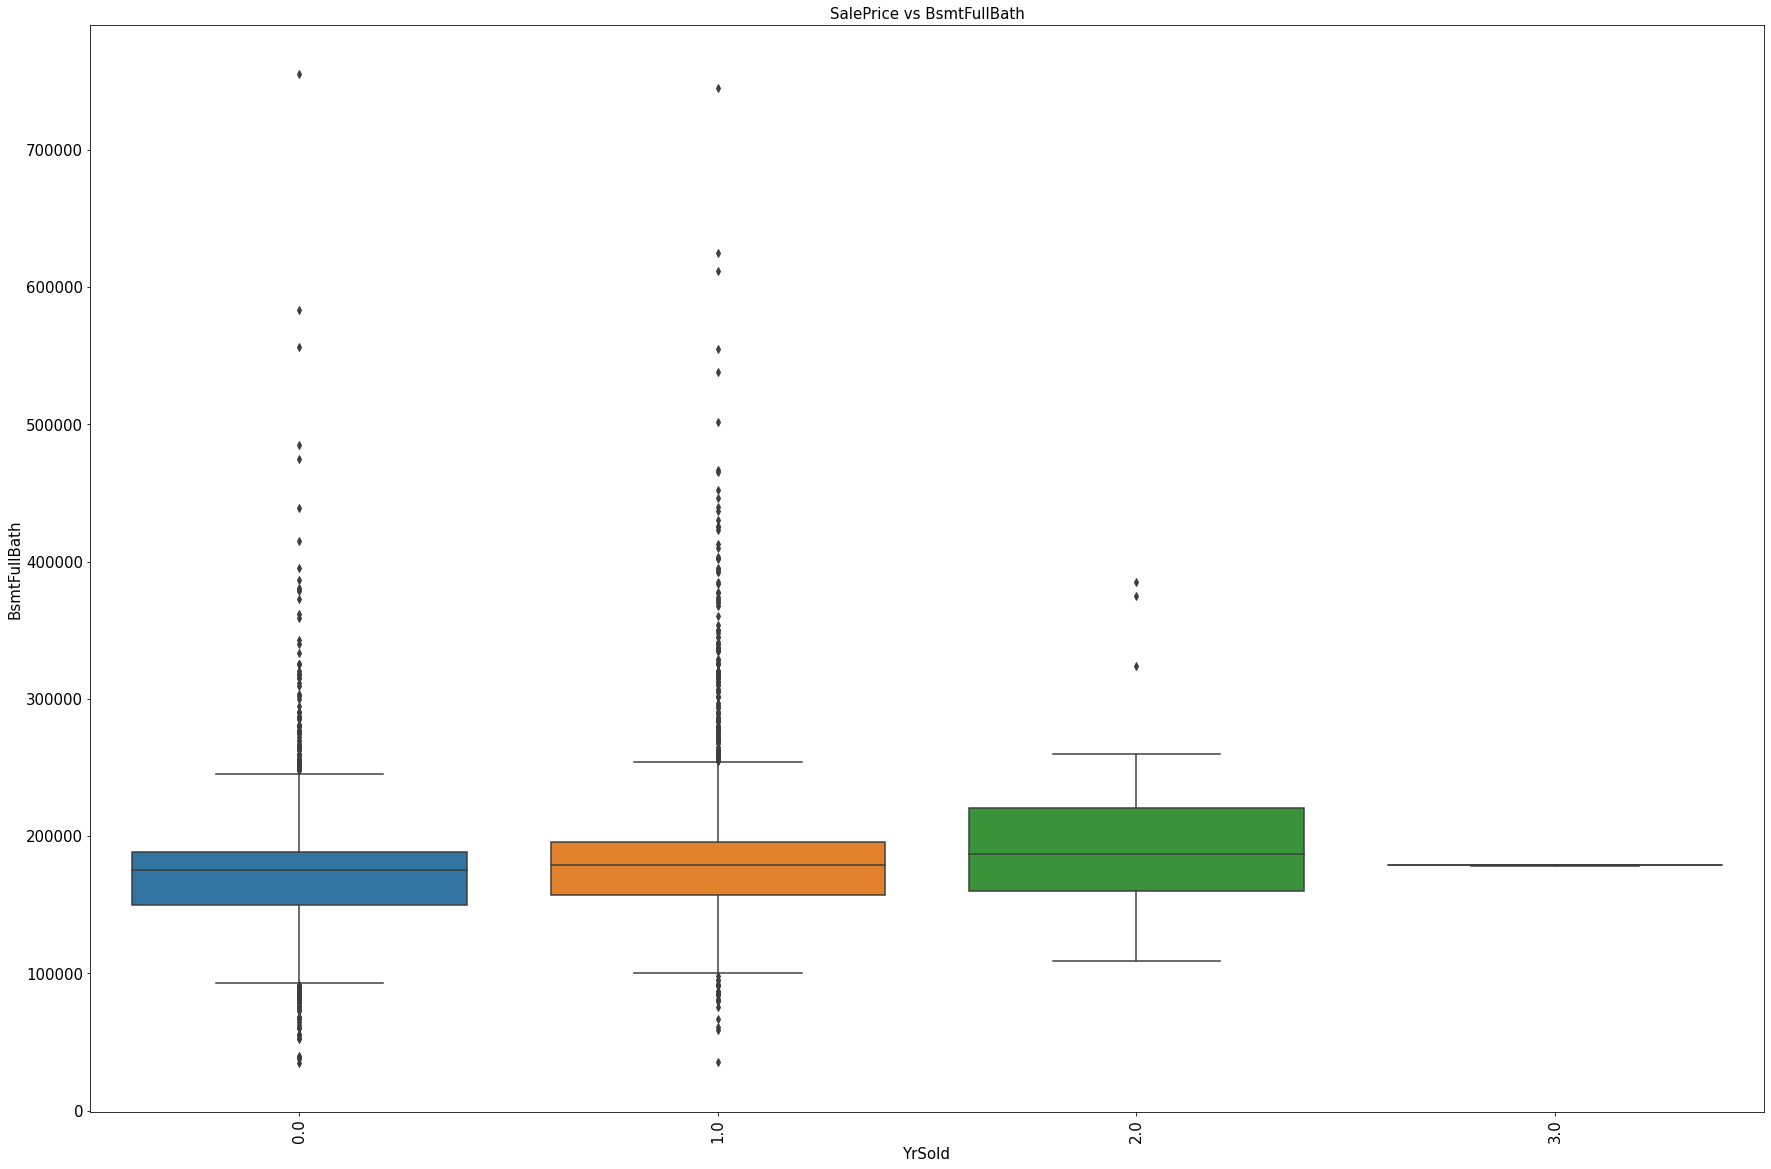

In [77]:
# 3 basement full bath
sns.boxplot(x='BsmtFullBath', y='SalePrice', data=df_merged)
plt.title('SalePrice vs BsmtFullBath', fontsize=15)
plt.xlabel('YrSold', fontsize=15)
plt.ylabel('BsmtFullBath', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# As the number of basement full bathrooms increase, the saleprice seems to be increasing
# Positive Correlation Observed

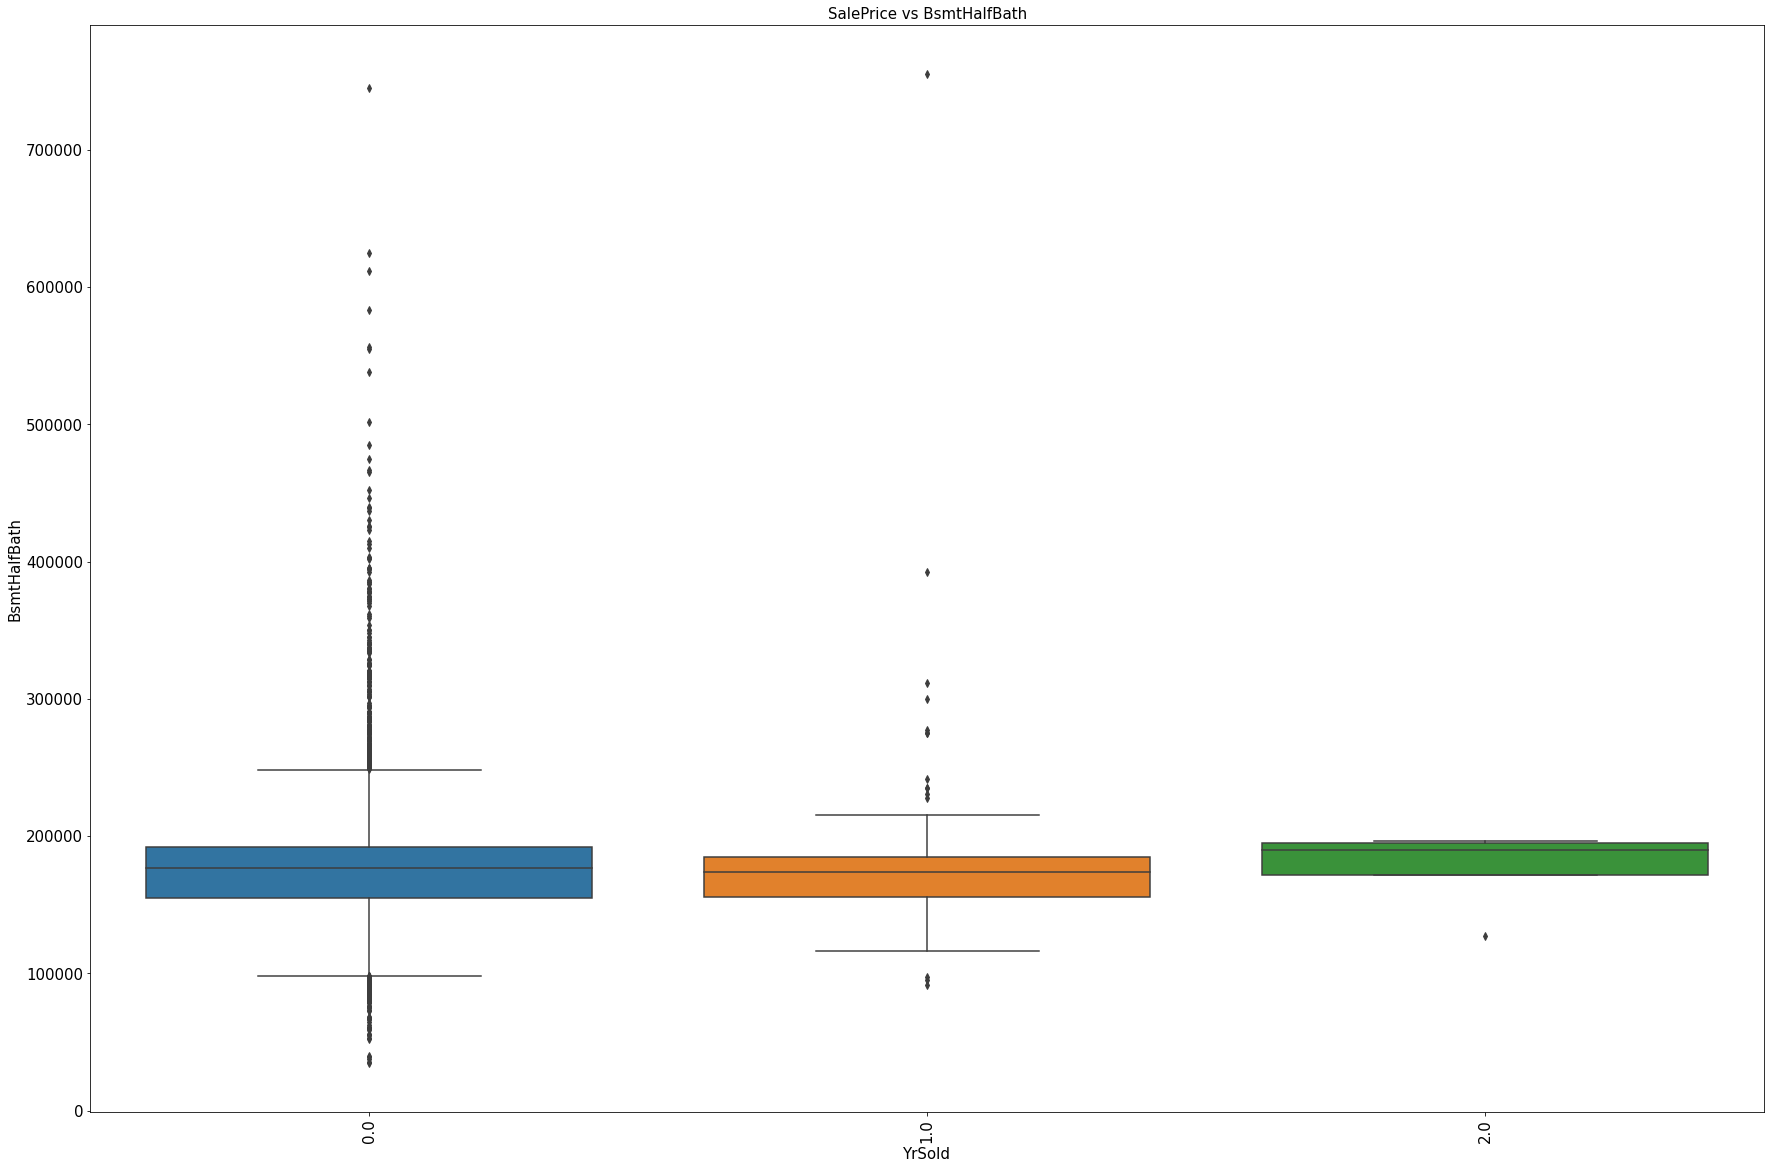

In [78]:
# 4 basement half bath
sns.boxplot(x='BsmtHalfBath', y='SalePrice', data=df_merged)
plt.title('SalePrice vs BsmtHalfBath', fontsize=15)
plt.xlabel('YrSold', fontsize=15)
plt.ylabel('BsmtHalfBath', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# No Correlation

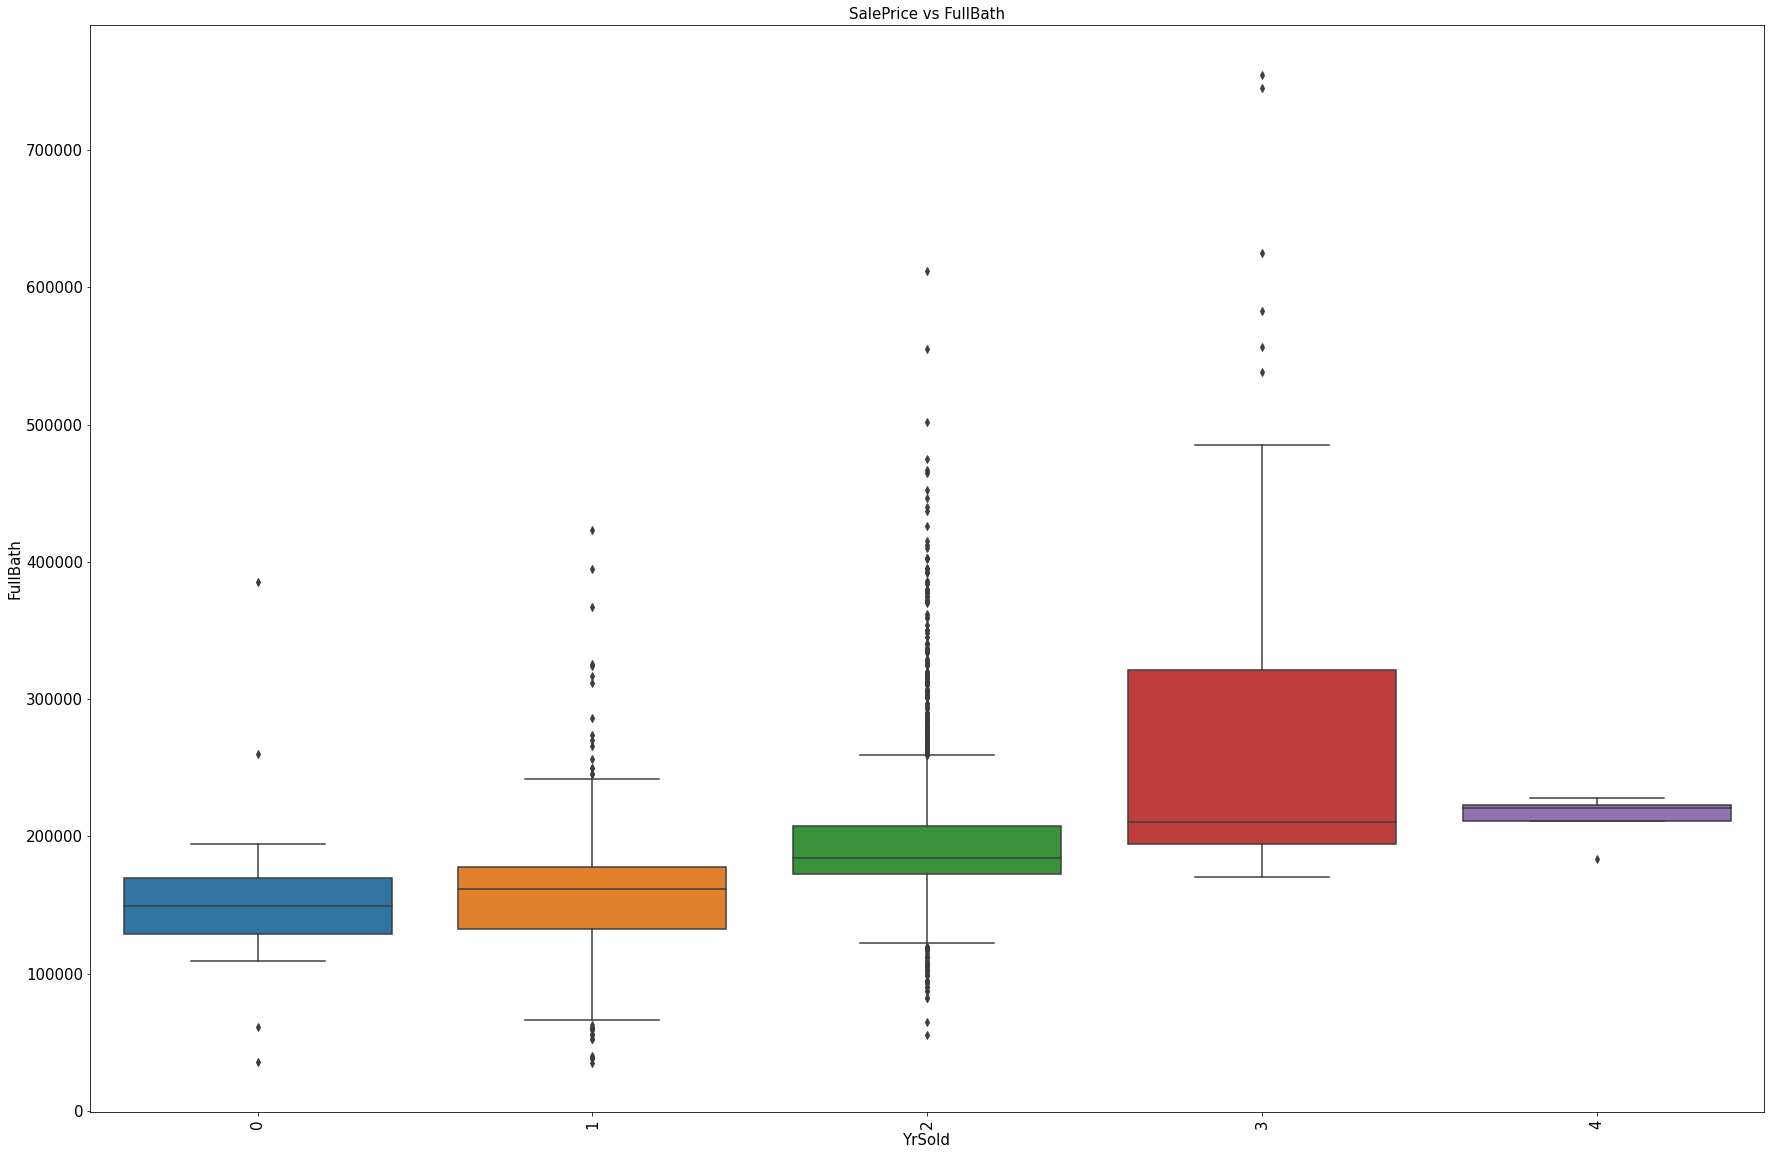

In [79]:
# 5 Full Bath
sns.boxplot(x='FullBath', y='SalePrice', data=df_merged)
plt.title('SalePrice vs FullBath', fontsize=15)
plt.xlabel('YrSold', fontsize=15)
plt.ylabel('FullBath', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# Positive correlation

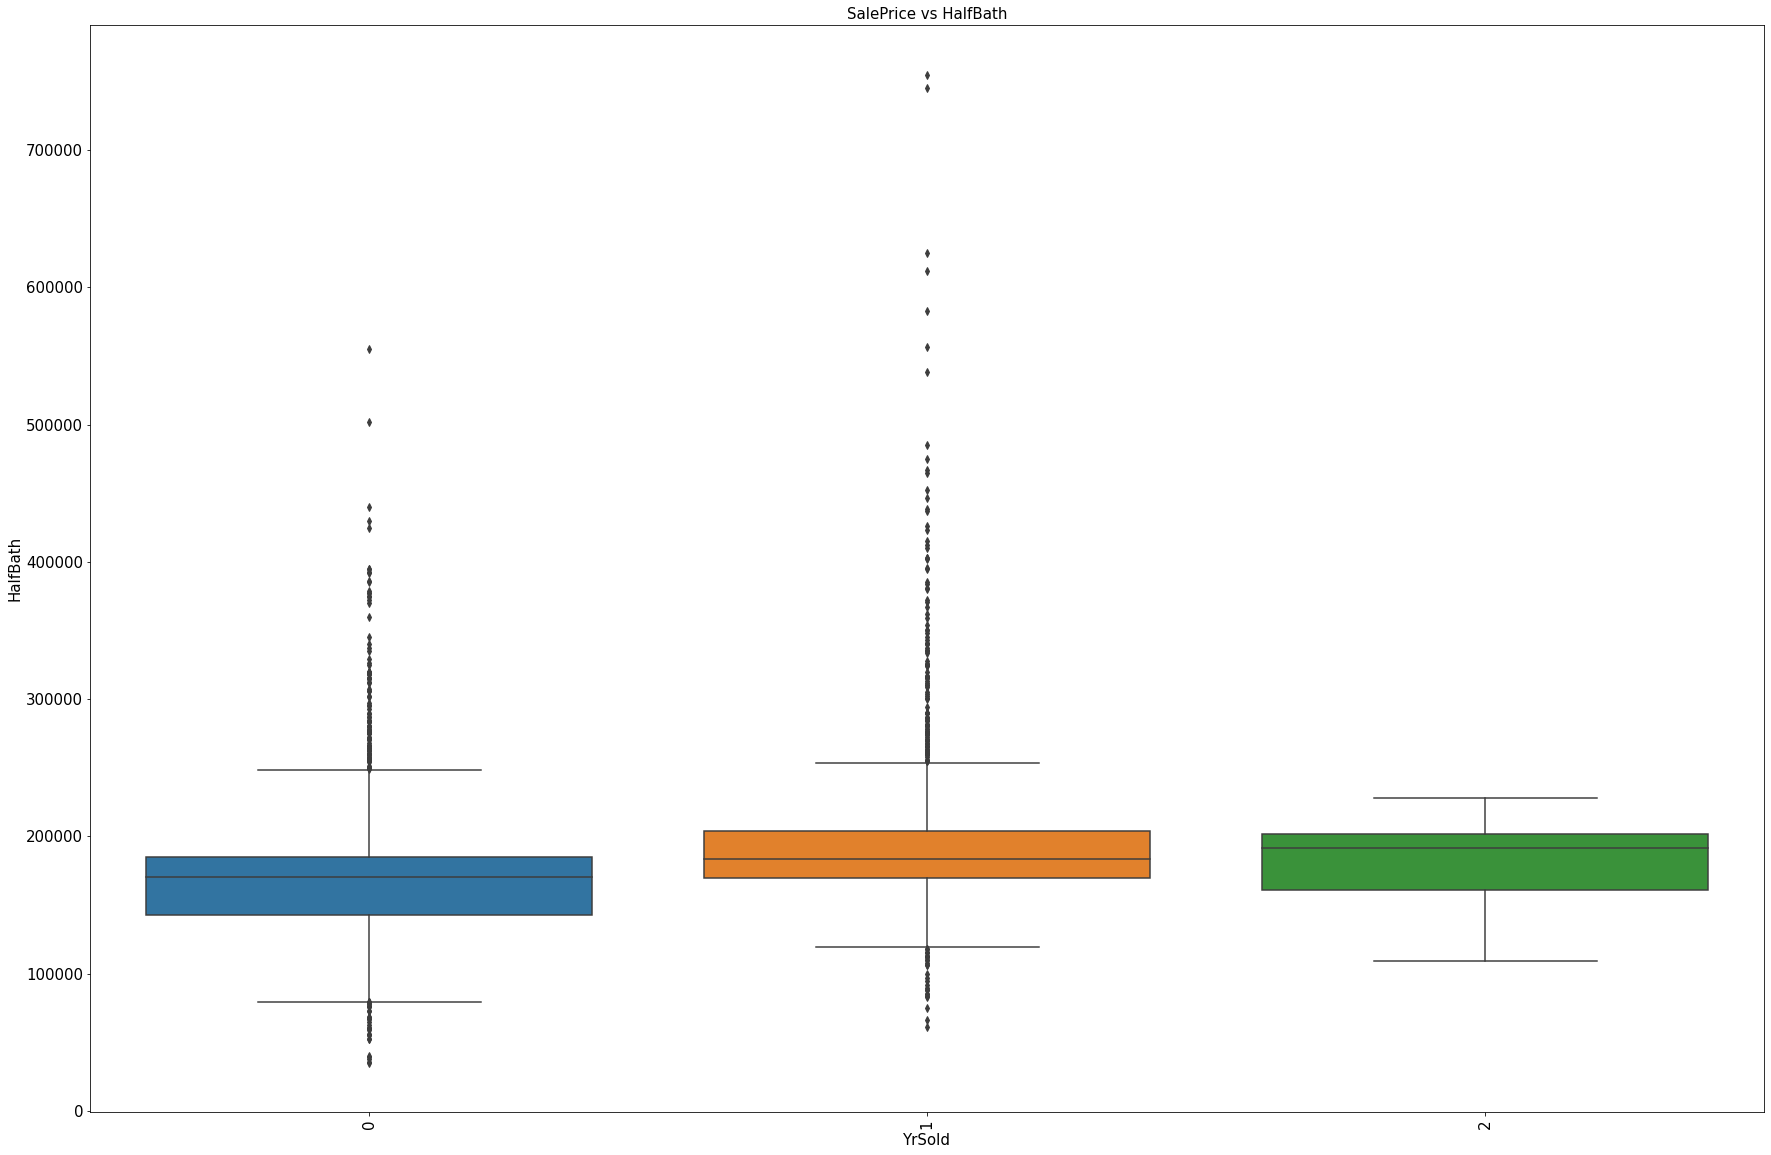

In [80]:
# 6 Half Bath
sns.boxplot(x='HalfBath', y='SalePrice', data=df_merged)
plt.title('SalePrice vs HalfBath', fontsize=15)
plt.xlabel('YrSold', fontsize=15)
plt.ylabel('HalfBath', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# Positive correlation 

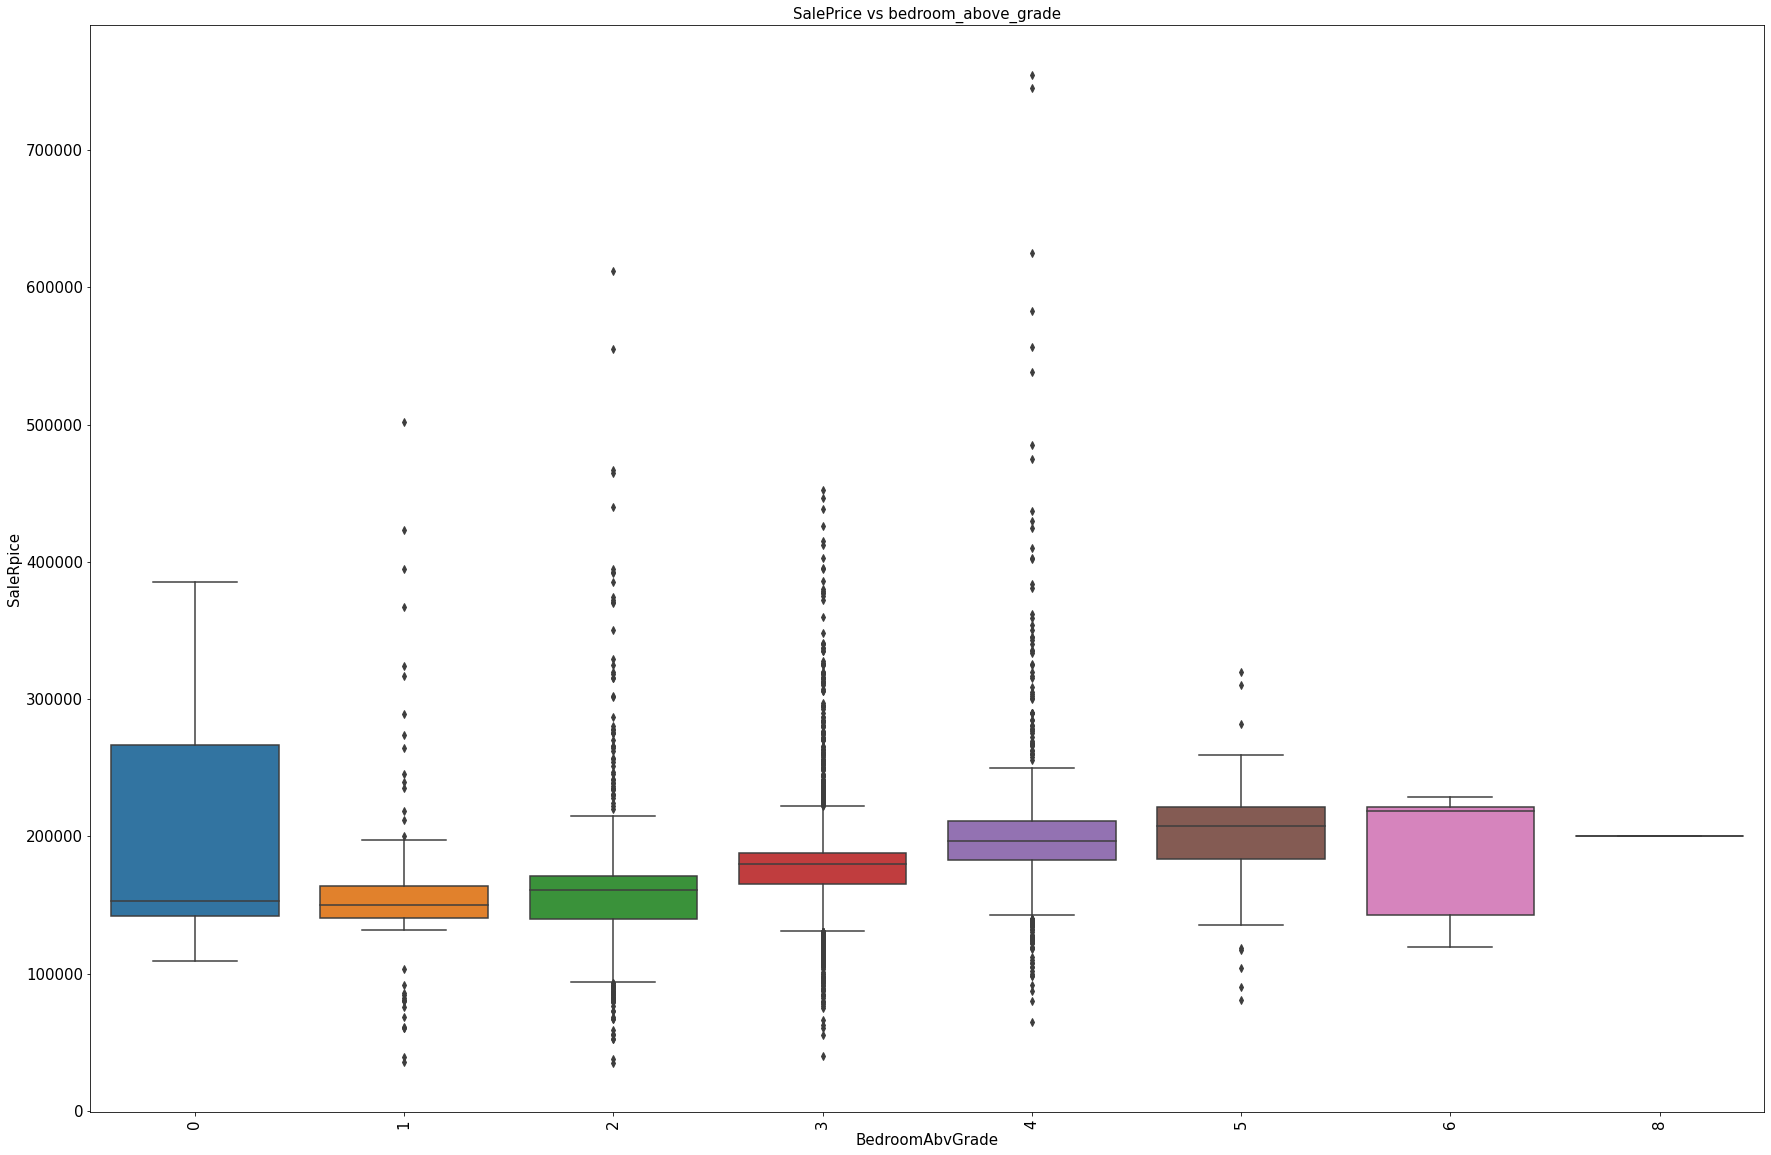

In [81]:
# 7 bedrooms above grade
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df_merged)
plt.title('SalePrice vs bedroom_above_grade', fontsize=15)
plt.xlabel('BedroomAbvGrade', fontsize=15)
plt.ylabel('SaleRpice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# No Correlation

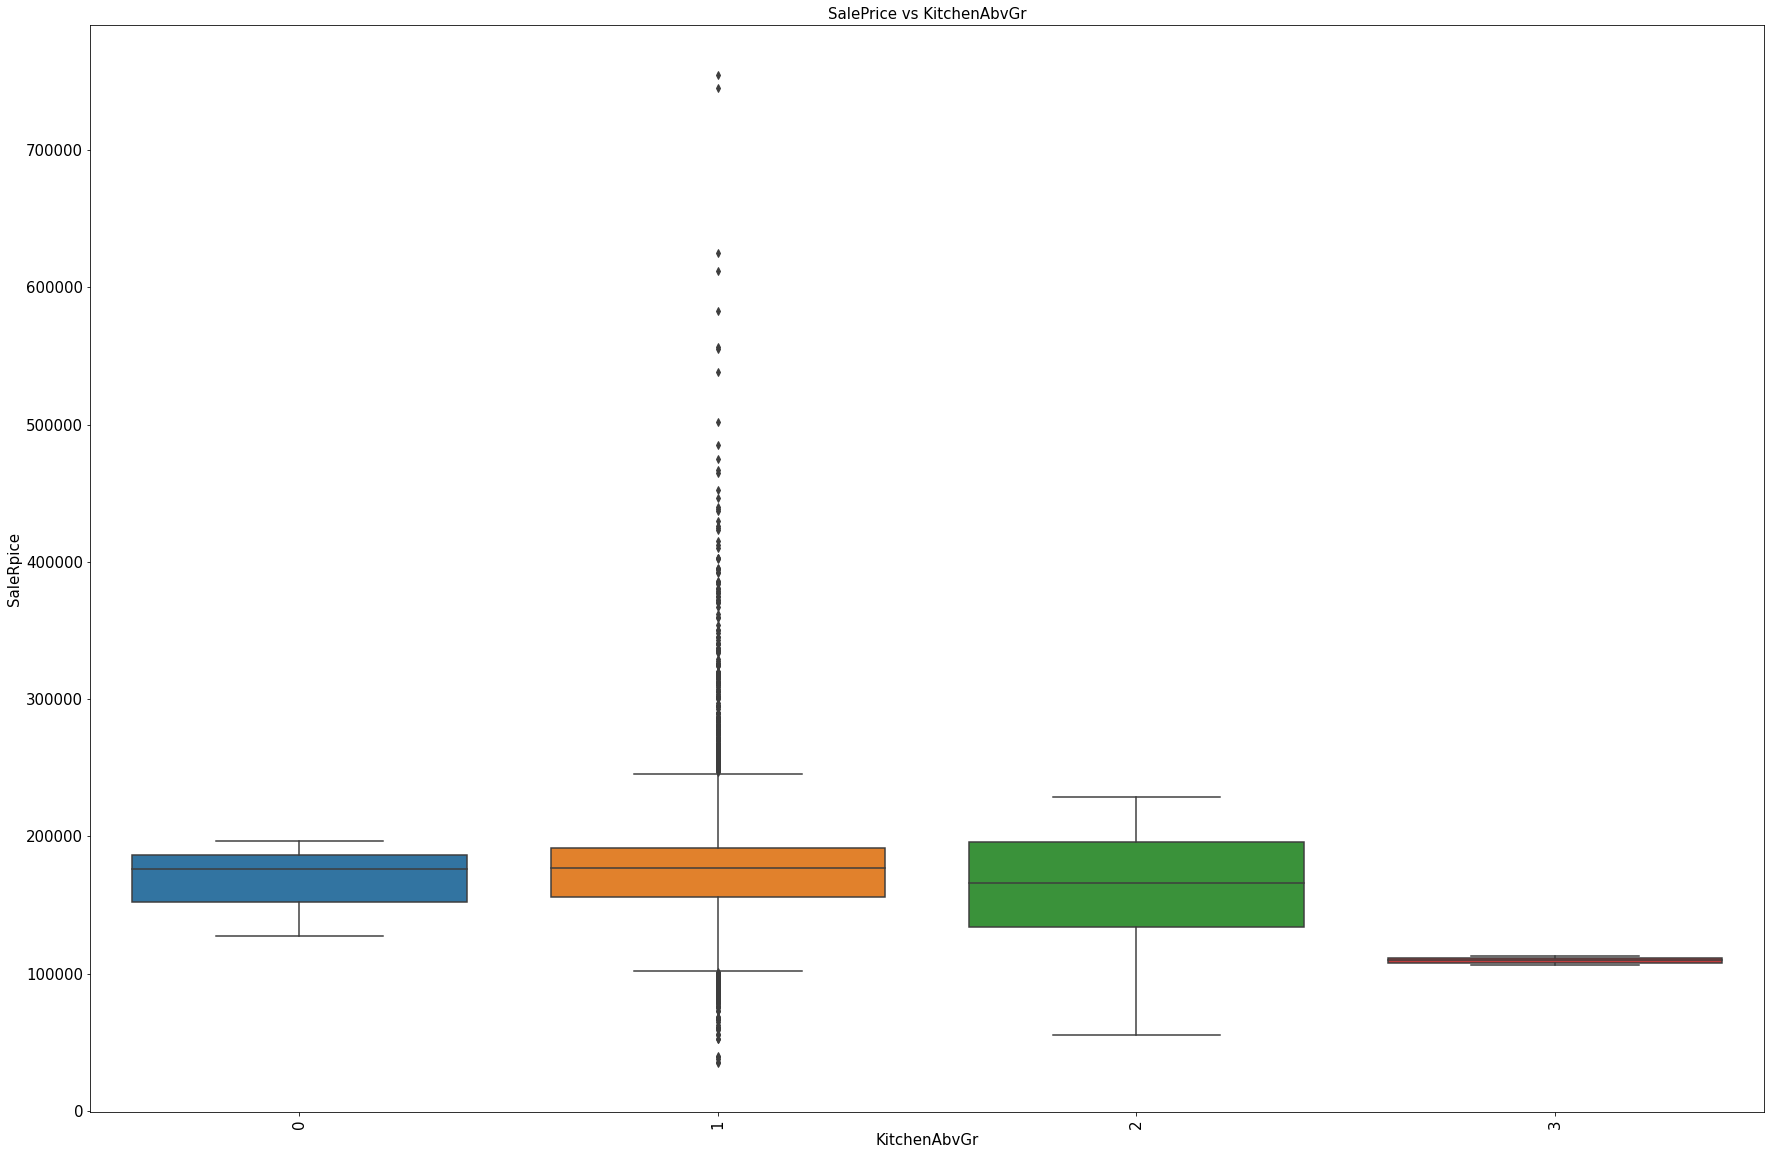

In [82]:
# 8 kitchen above Grade
sns.boxplot(x='KitchenAbvGr', y='SalePrice', data=df_merged)
plt.title('SalePrice vs KitchenAbvGr', fontsize=15)
plt.xlabel('KitchenAbvGr', fontsize=15)
plt.ylabel('SaleRpice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# No Correlation

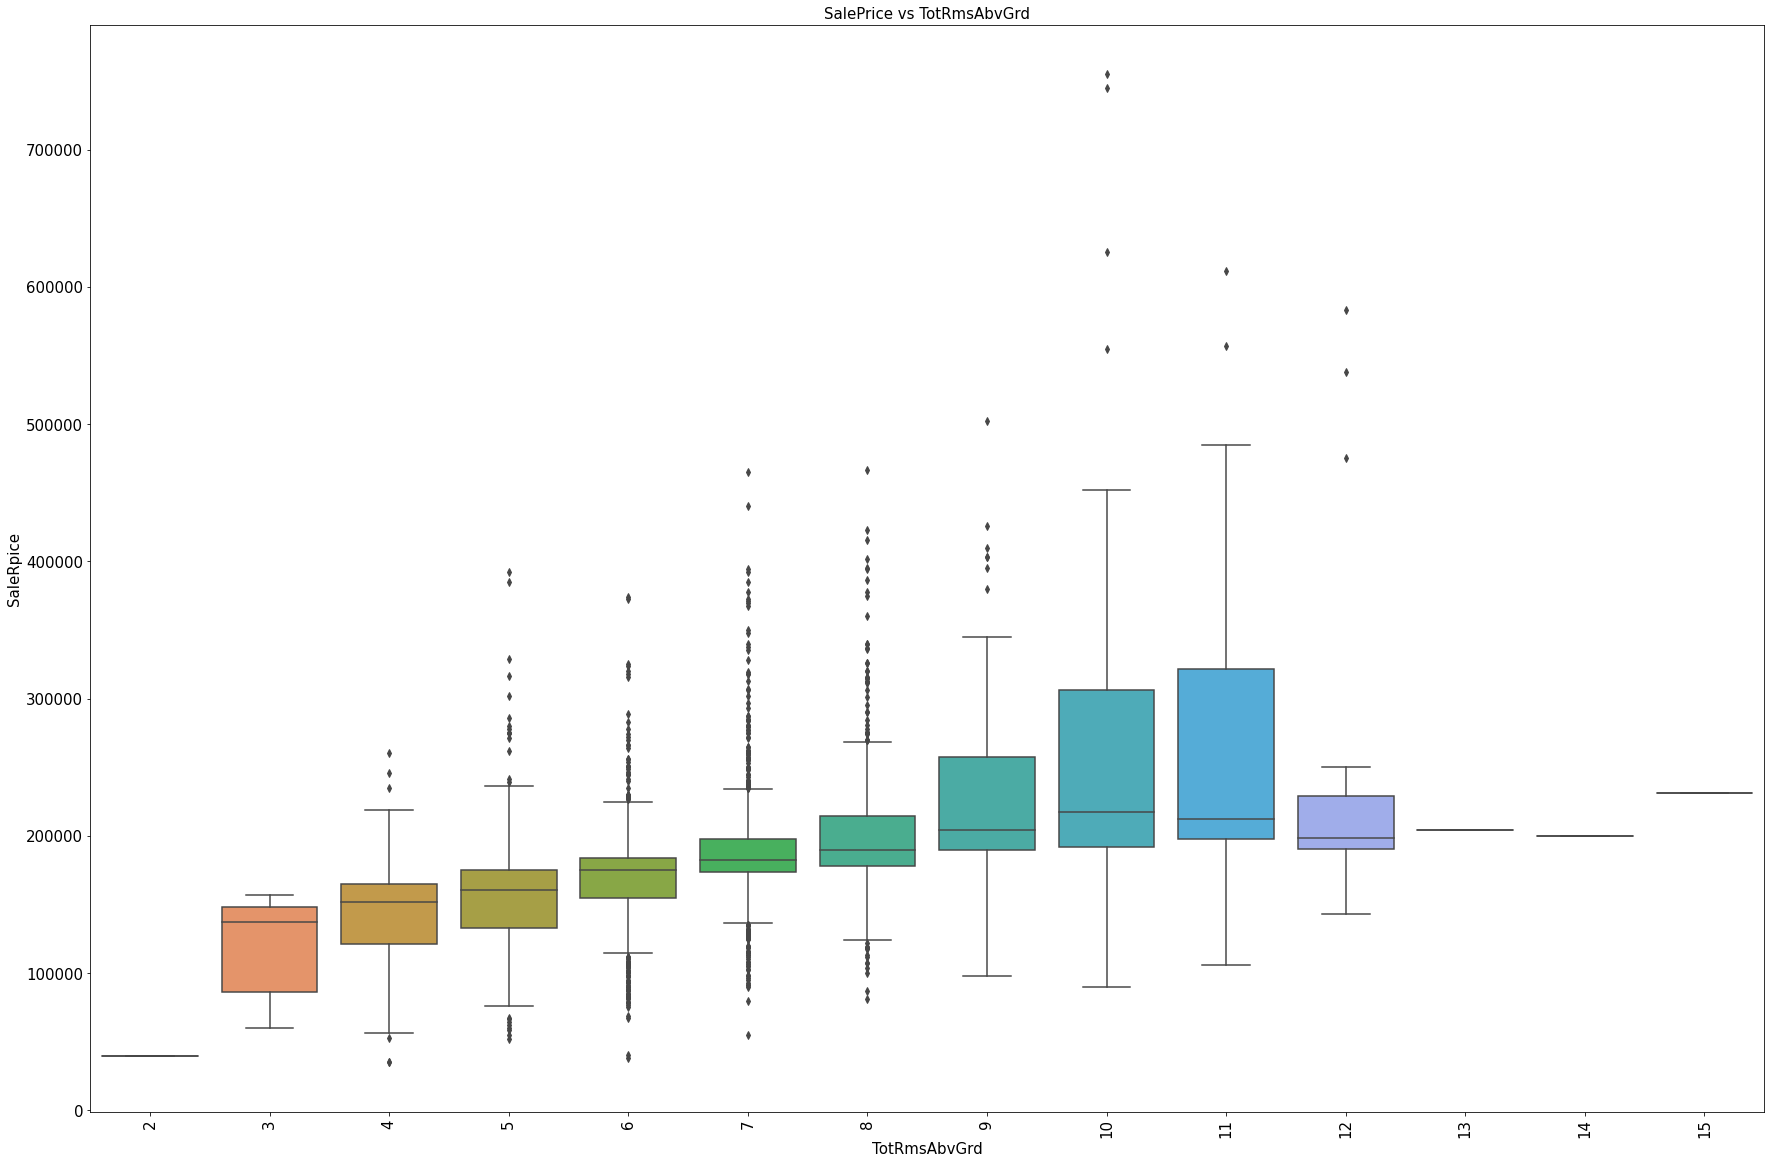

In [83]:
# 9 total rooms above grade
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=df_merged)
plt.title('SalePrice vs TotRmsAbvGrd', fontsize=15)
plt.xlabel('TotRmsAbvGrd', fontsize=15)
plt.ylabel('SaleRpice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# Positive Correlation 

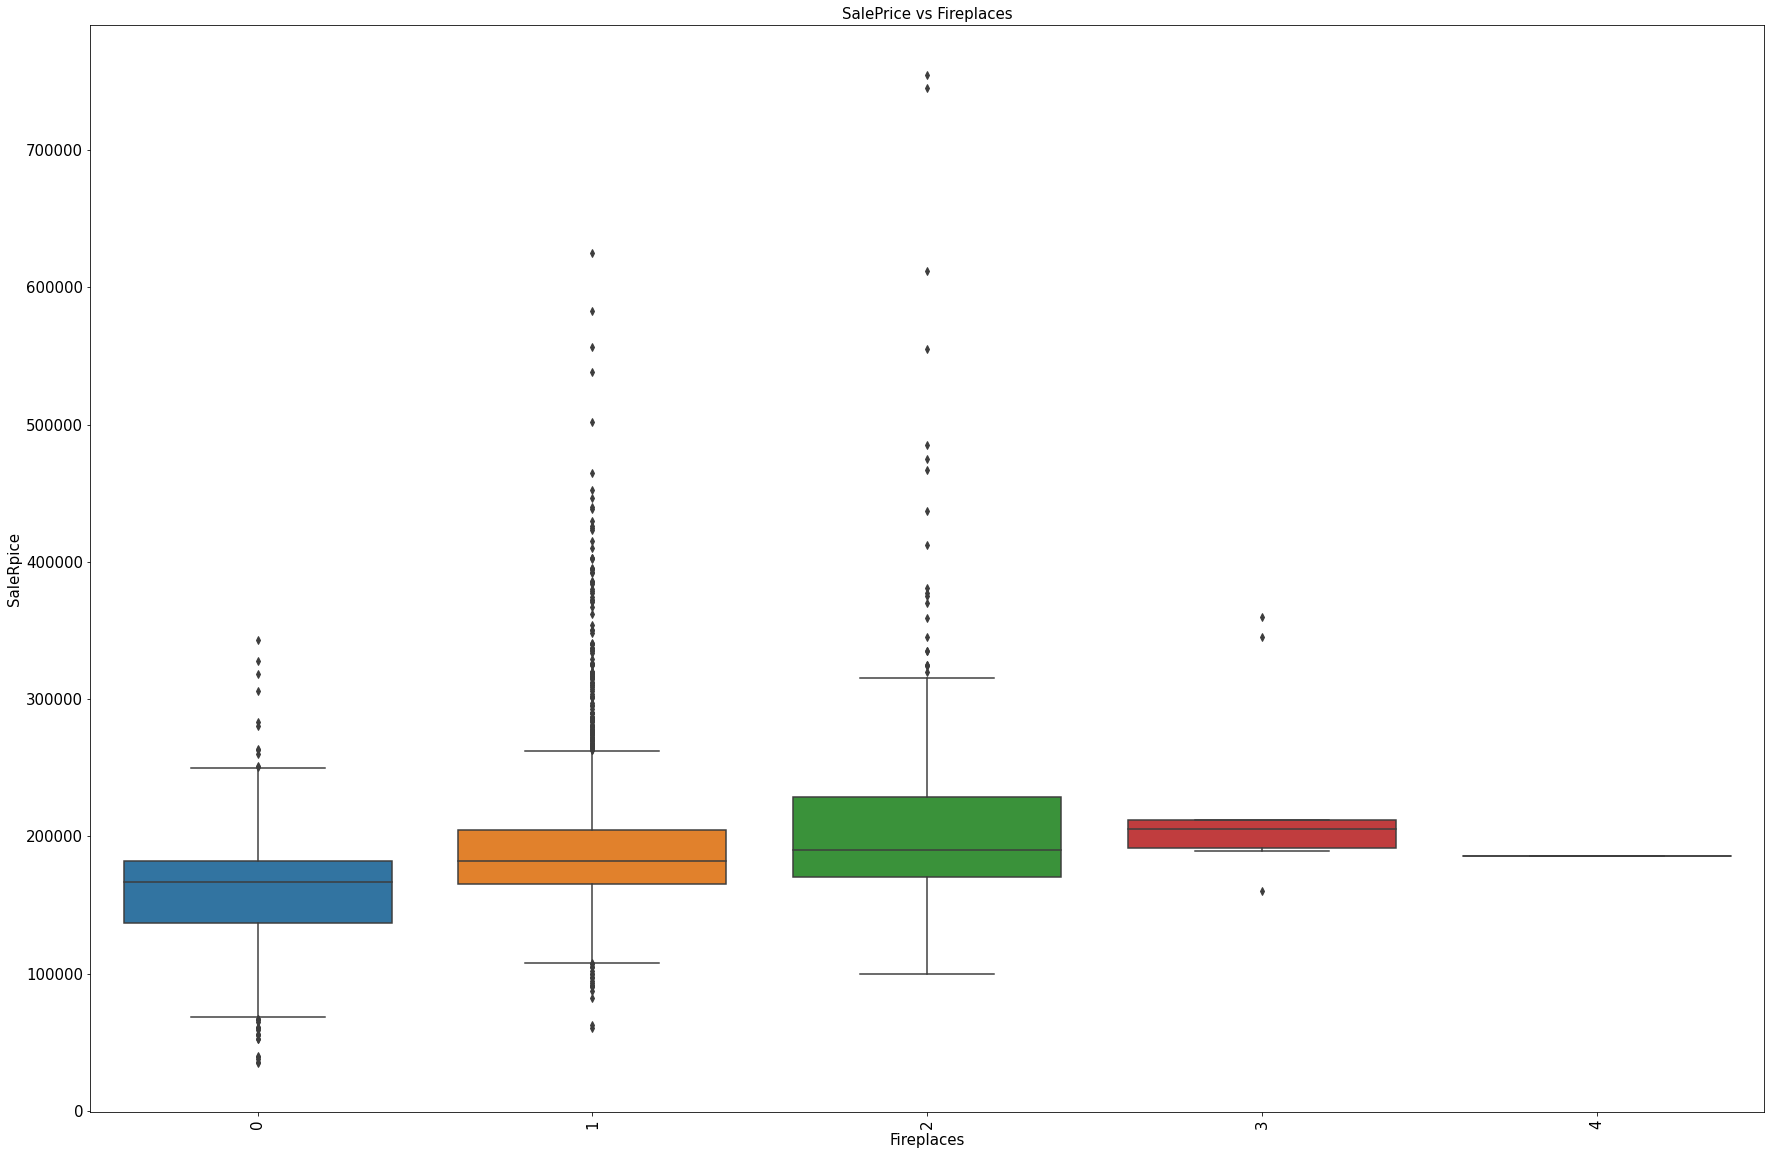

In [84]:
# 10 Fireplaces
sns.boxplot(x='Fireplaces', y='SalePrice', data=df_merged)
plt.title('SalePrice vs Fireplaces', fontsize=15)
plt.xlabel('Fireplaces', fontsize=15)
plt.ylabel('SaleRpice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# Positive Correlation

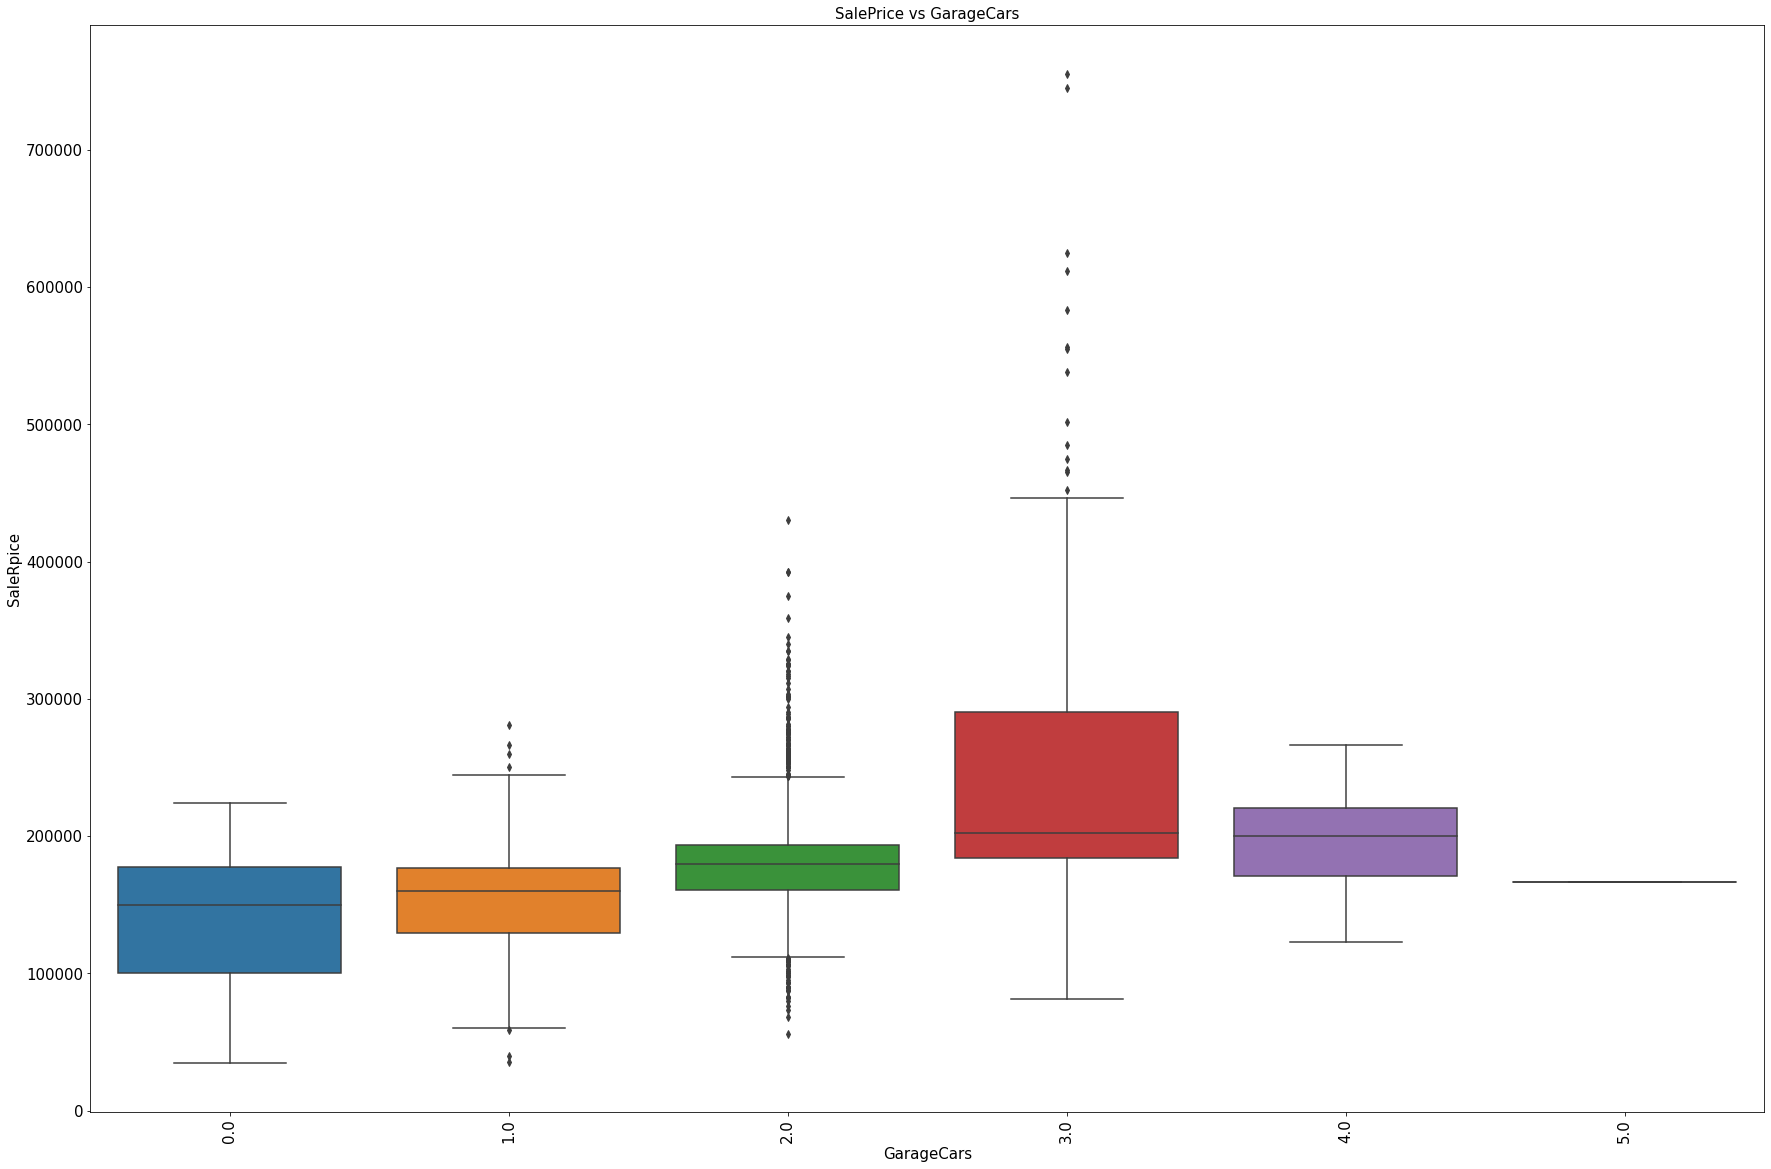

In [85]:
# 11 GarageCars
sns.boxplot(x='GarageCars', y='SalePrice', data=df_merged)
plt.title('SalePrice vs GarageCars', fontsize=15)
plt.xlabel('GarageCars', fontsize=15)
plt.ylabel('SaleRpice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# Positive Correlation

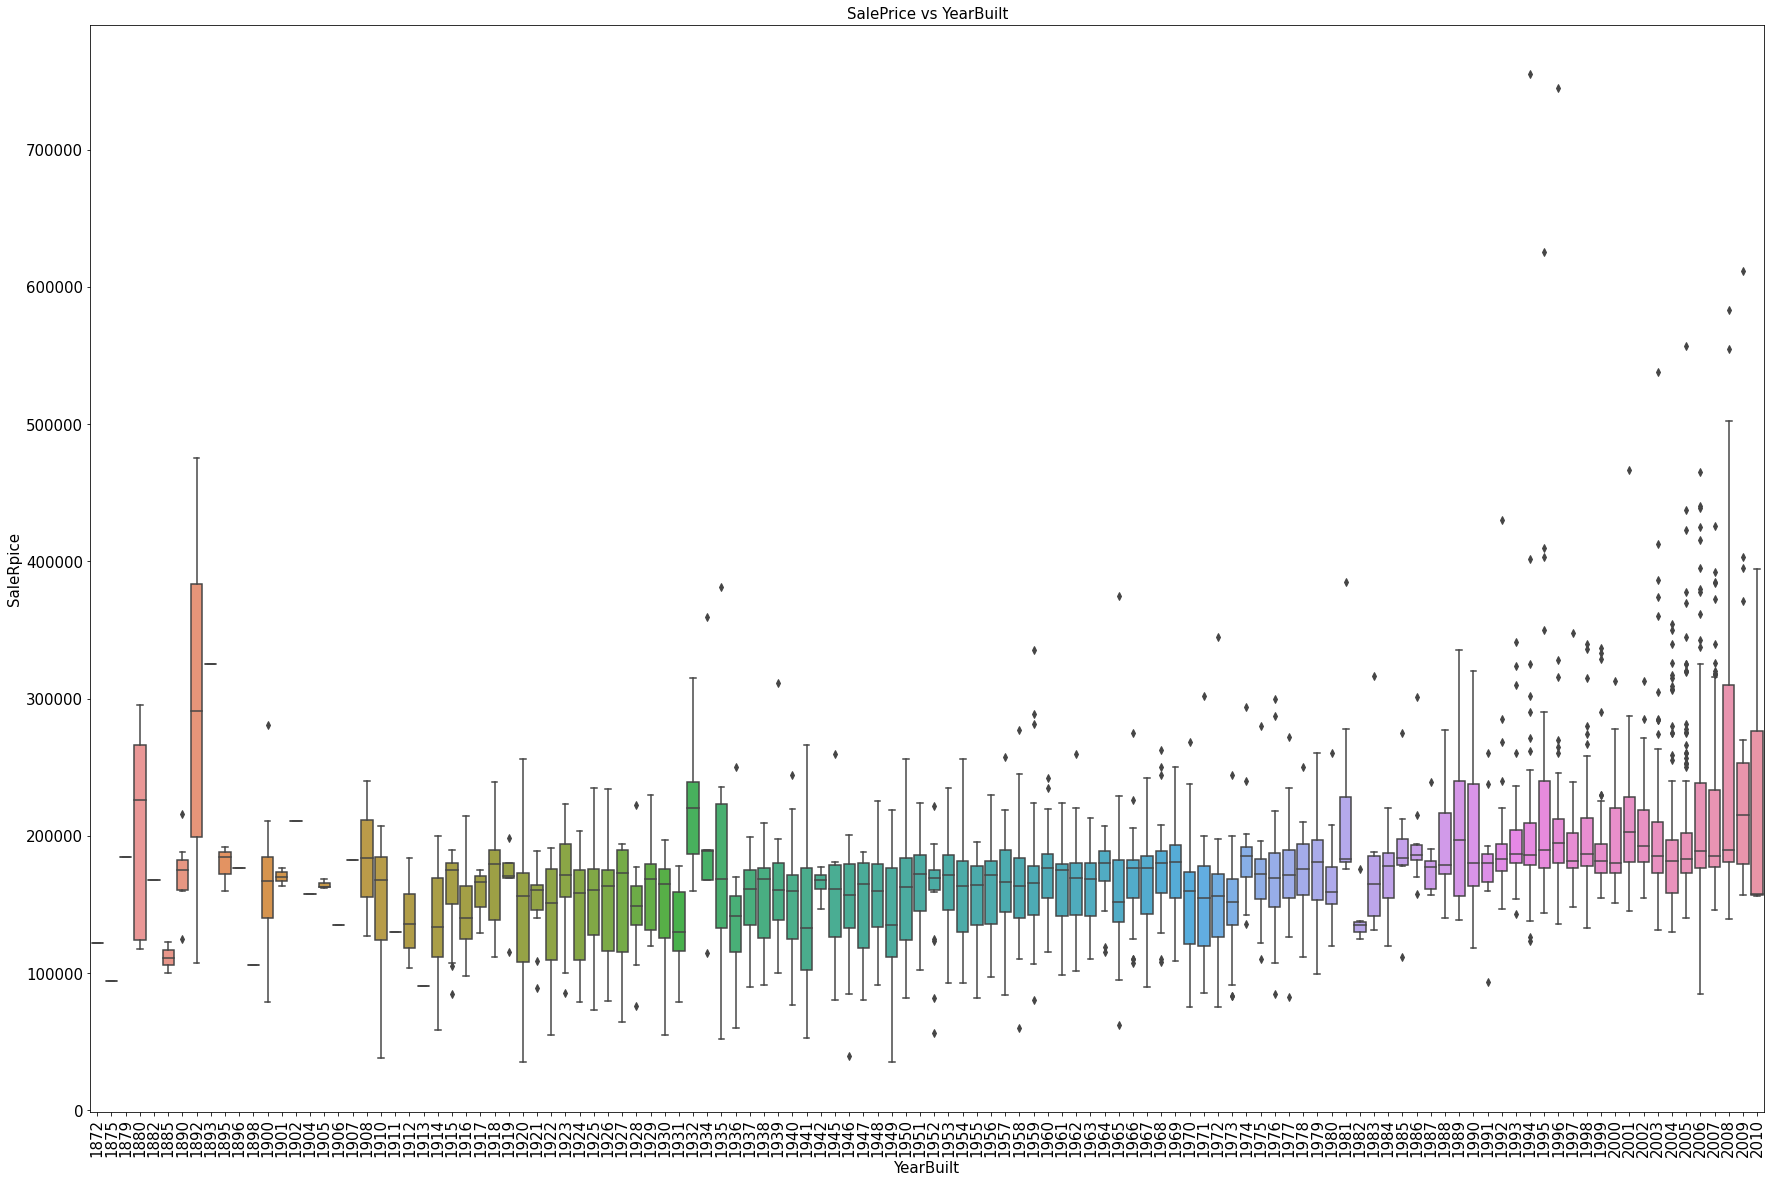

In [86]:
# 12 YearBuilt
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_merged)
plt.title('SalePrice vs YearBuilt', fontsize=15)
plt.xlabel('YearBuilt', fontsize=15)
plt.ylabel('SaleRpice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# Positive Correlation observed especially in the recent years

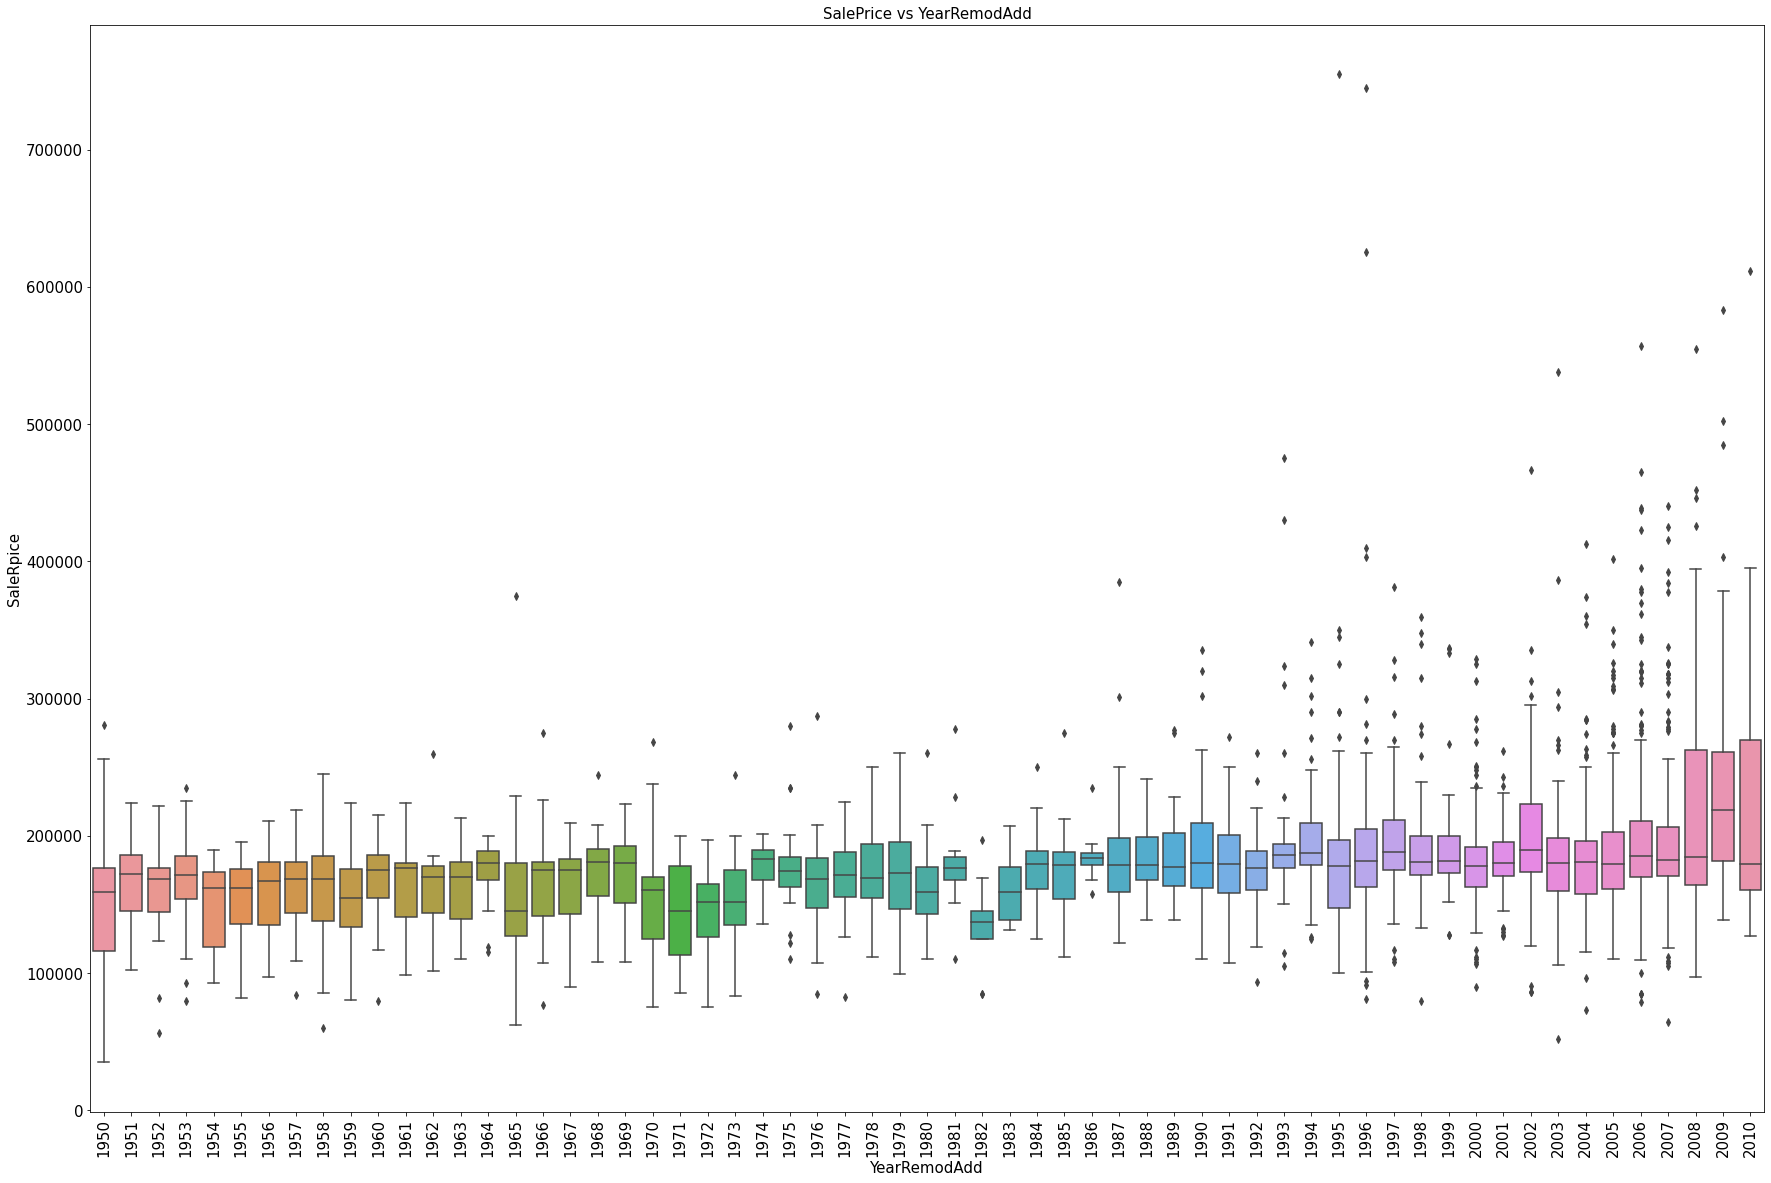

In [87]:
# 13 YearRemodAdd
sns.boxplot(x='YearRemodAdd', y='SalePrice', data=df_merged)
plt.title('SalePrice vs YearRemodAdd', fontsize=15)
plt.xlabel('YearRemodAdd', fontsize=15)
plt.ylabel('SaleRpice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# Positive Correlation observed especially in the recent years

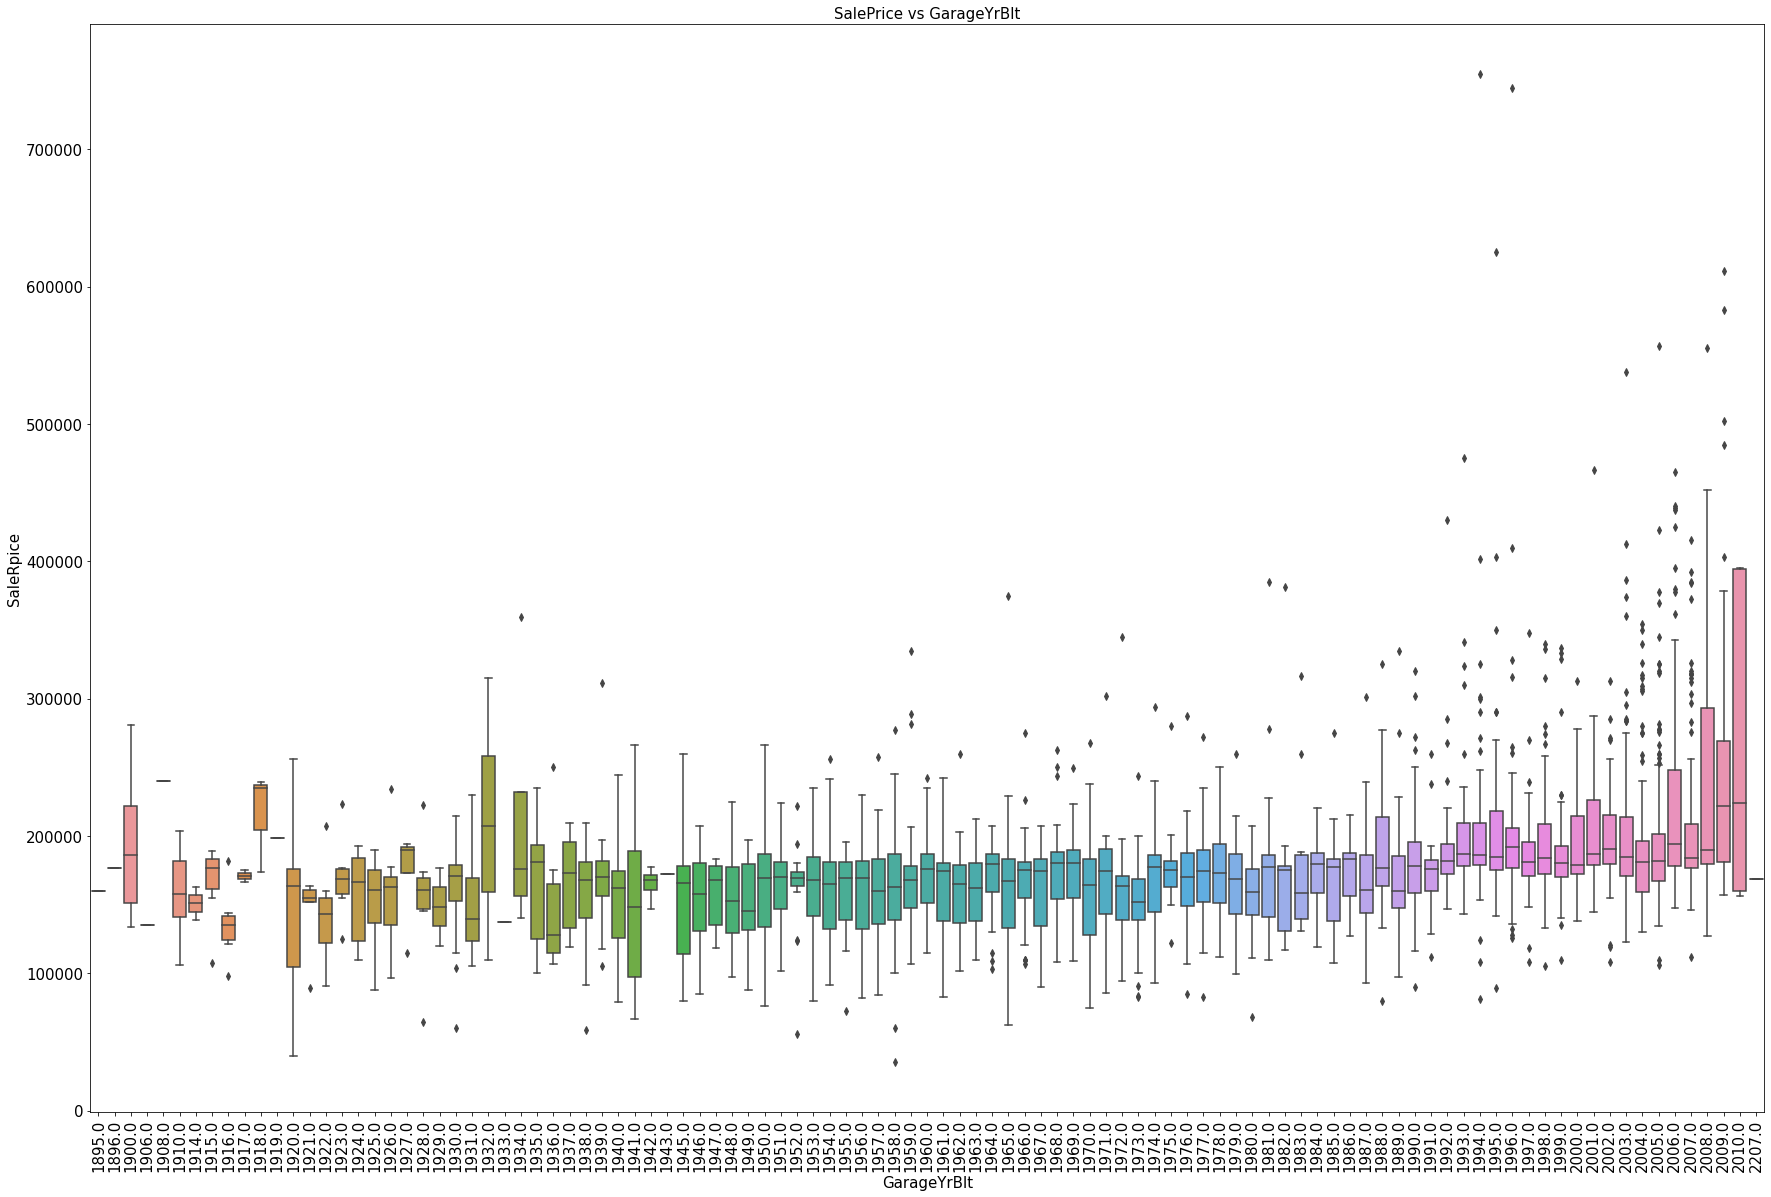

In [88]:
# 14 GarageYrBlt
sns.boxplot(x='GarageYrBlt', y='SalePrice', data=df_merged)
plt.title('SalePrice vs GarageYrBlt', fontsize=15)
plt.xlabel('GarageYrBlt', fontsize=15)
plt.ylabel('SaleRpice', fontsize=15)
plt.xticks(fontsize=15, rotation='90')
plt.yticks(fontsize=15)
plt.show()

# Positive Correlation observed especially in the recent years

# Now let's look at Categorical Variables<br>
# Here it will be quite difficult to see any direct linear relationship, however we can look for important insights !!<br>
# Nominal Values first<br>


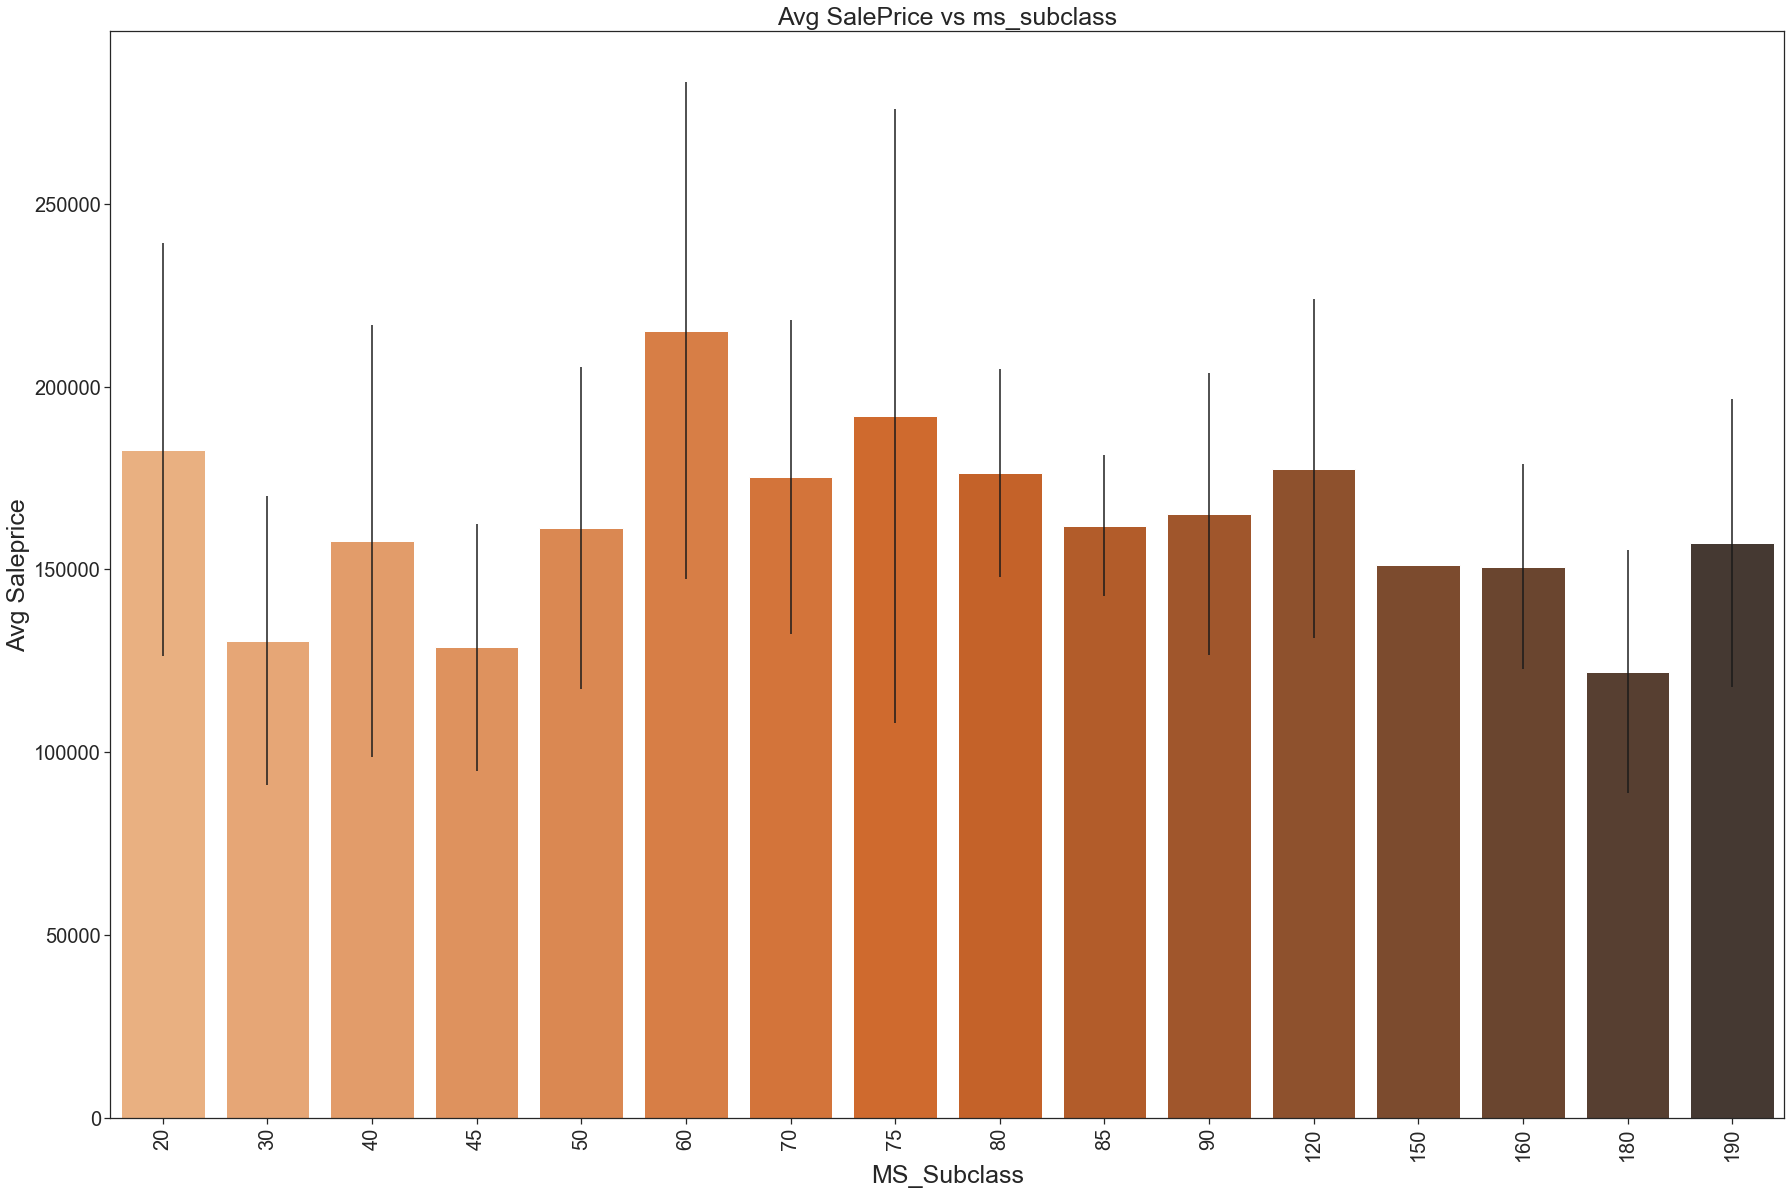

In [89]:
from dfply import *
# 1. MSSubClass: Identifies the type of dwelling involved in the sale
ms_subclass = (df_merged >> group_by(X.MSSubClass) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='MSSubClass', yerr=ms_subclass['stdev']*1, data=ms_subclass, capsize=3, palette='Oranges_d')
plt.xlabel('MS_Subclass', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs ms_subclass', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Looks like a 2 storey house built in 1946 or later is costliest and 1-storey 1946 or older is cheapest.

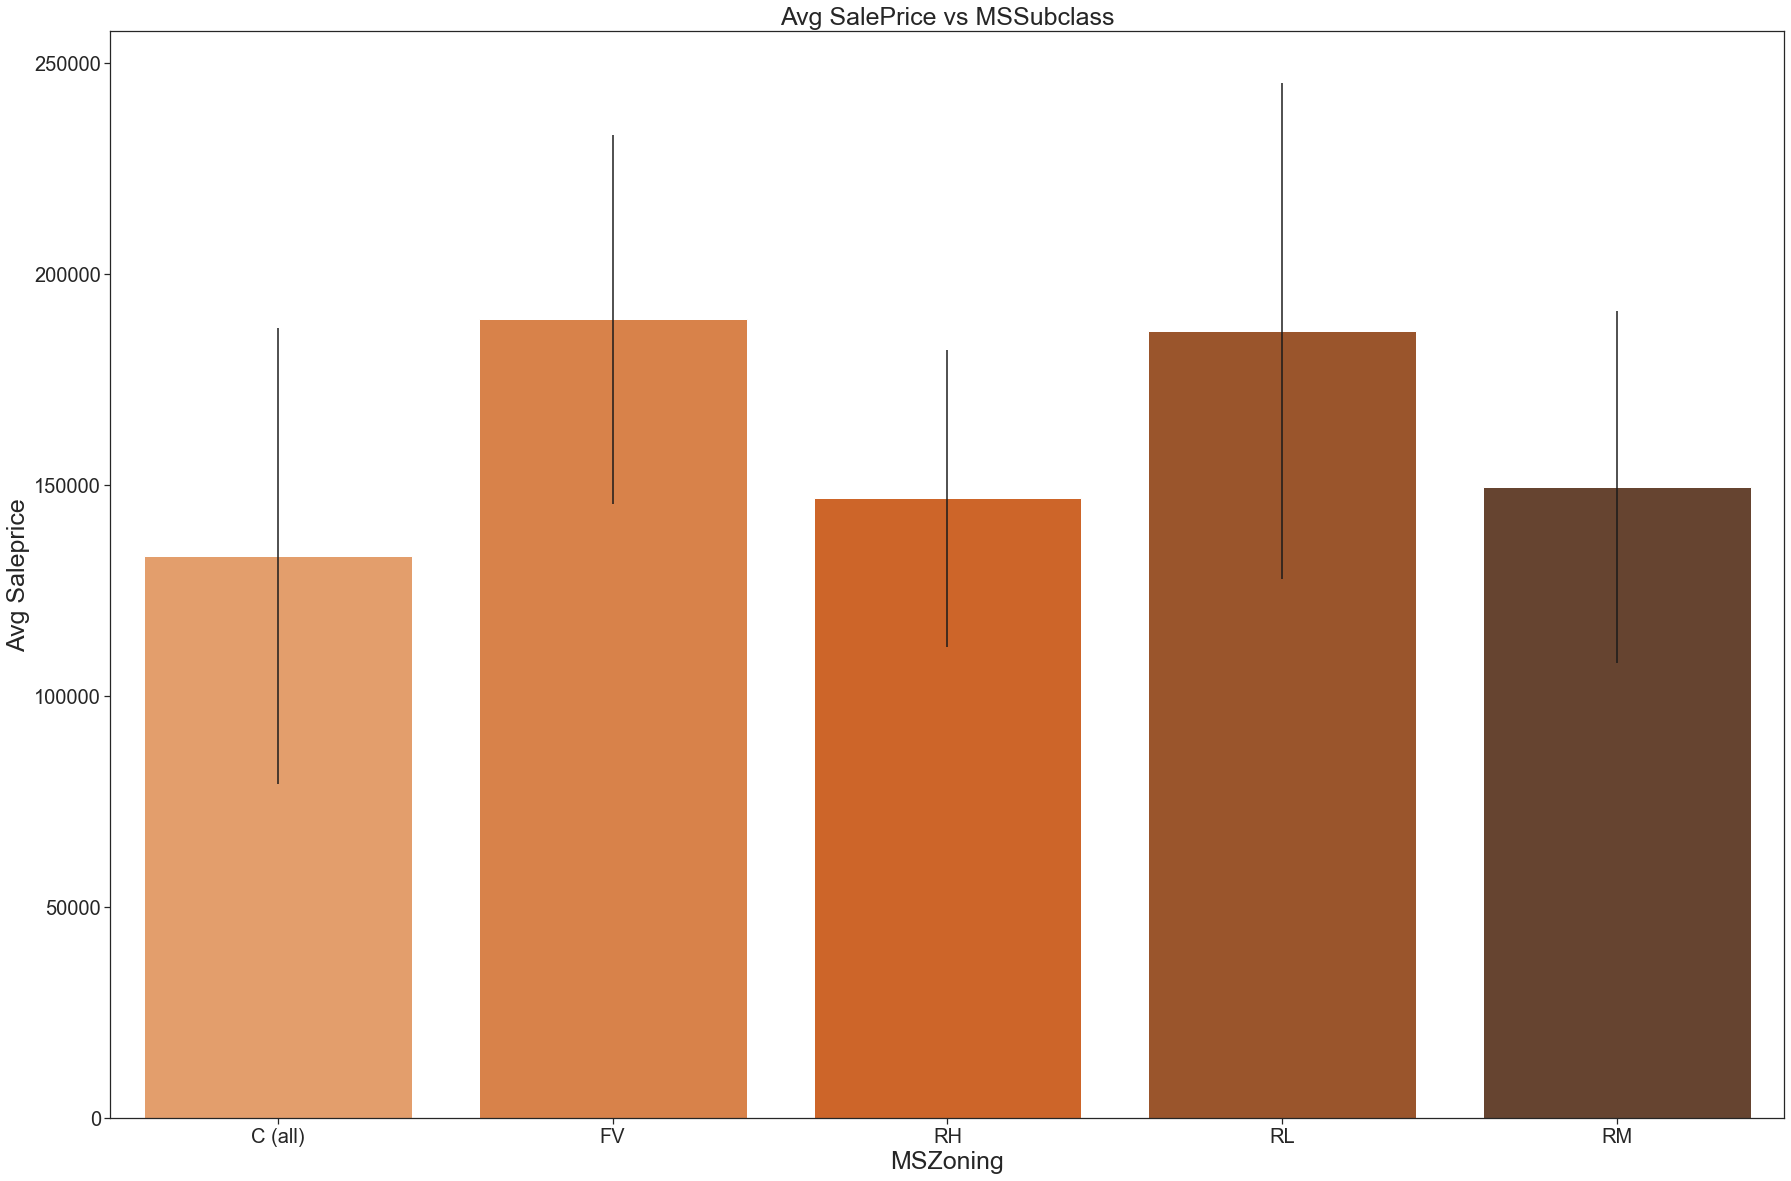

In [90]:
# 2 MSZoning: Identifies the general zoning classification of the sale.
ms_zoning = (df_merged >> group_by(X.MSZoning) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=ms_zoning['MSZoning'], y=ms_zoning['avg'],yerr=ms_zoning['stdev']*1, palette='Oranges_d')
plt.xlabel('MSZoning', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs MSSubclass', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Floating Village residential is costlier

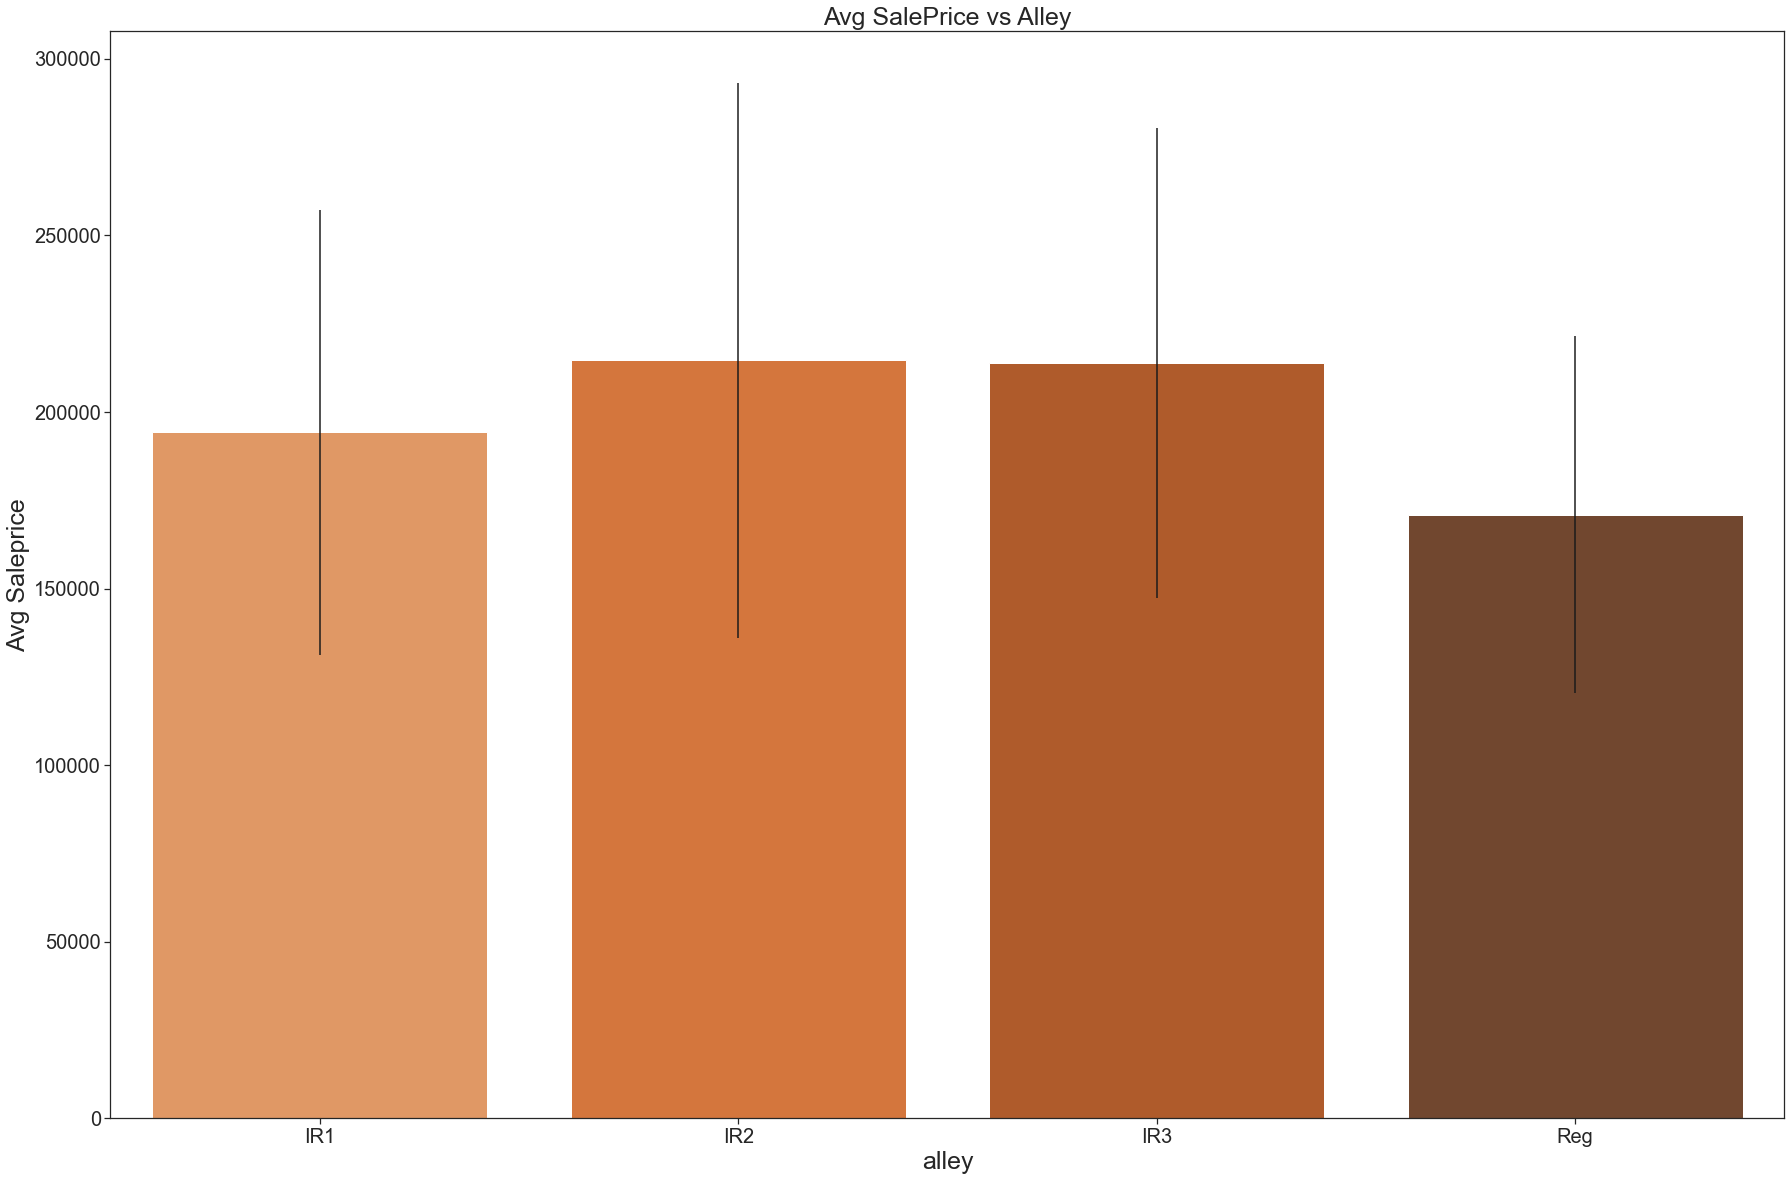

In [91]:
# 3 LotShape: General shape of property
lot_shape = (df_merged >> group_by(X.LotShape) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=lot_shape['LotShape'], y=lot_shape['avg'],yerr=lot_shape['stdev']*1, palette='Oranges_d')
plt.xlabel('alley', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Alley', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


# Surprisingly regular shaped properties are selling at least prices!! contrary to intuition!

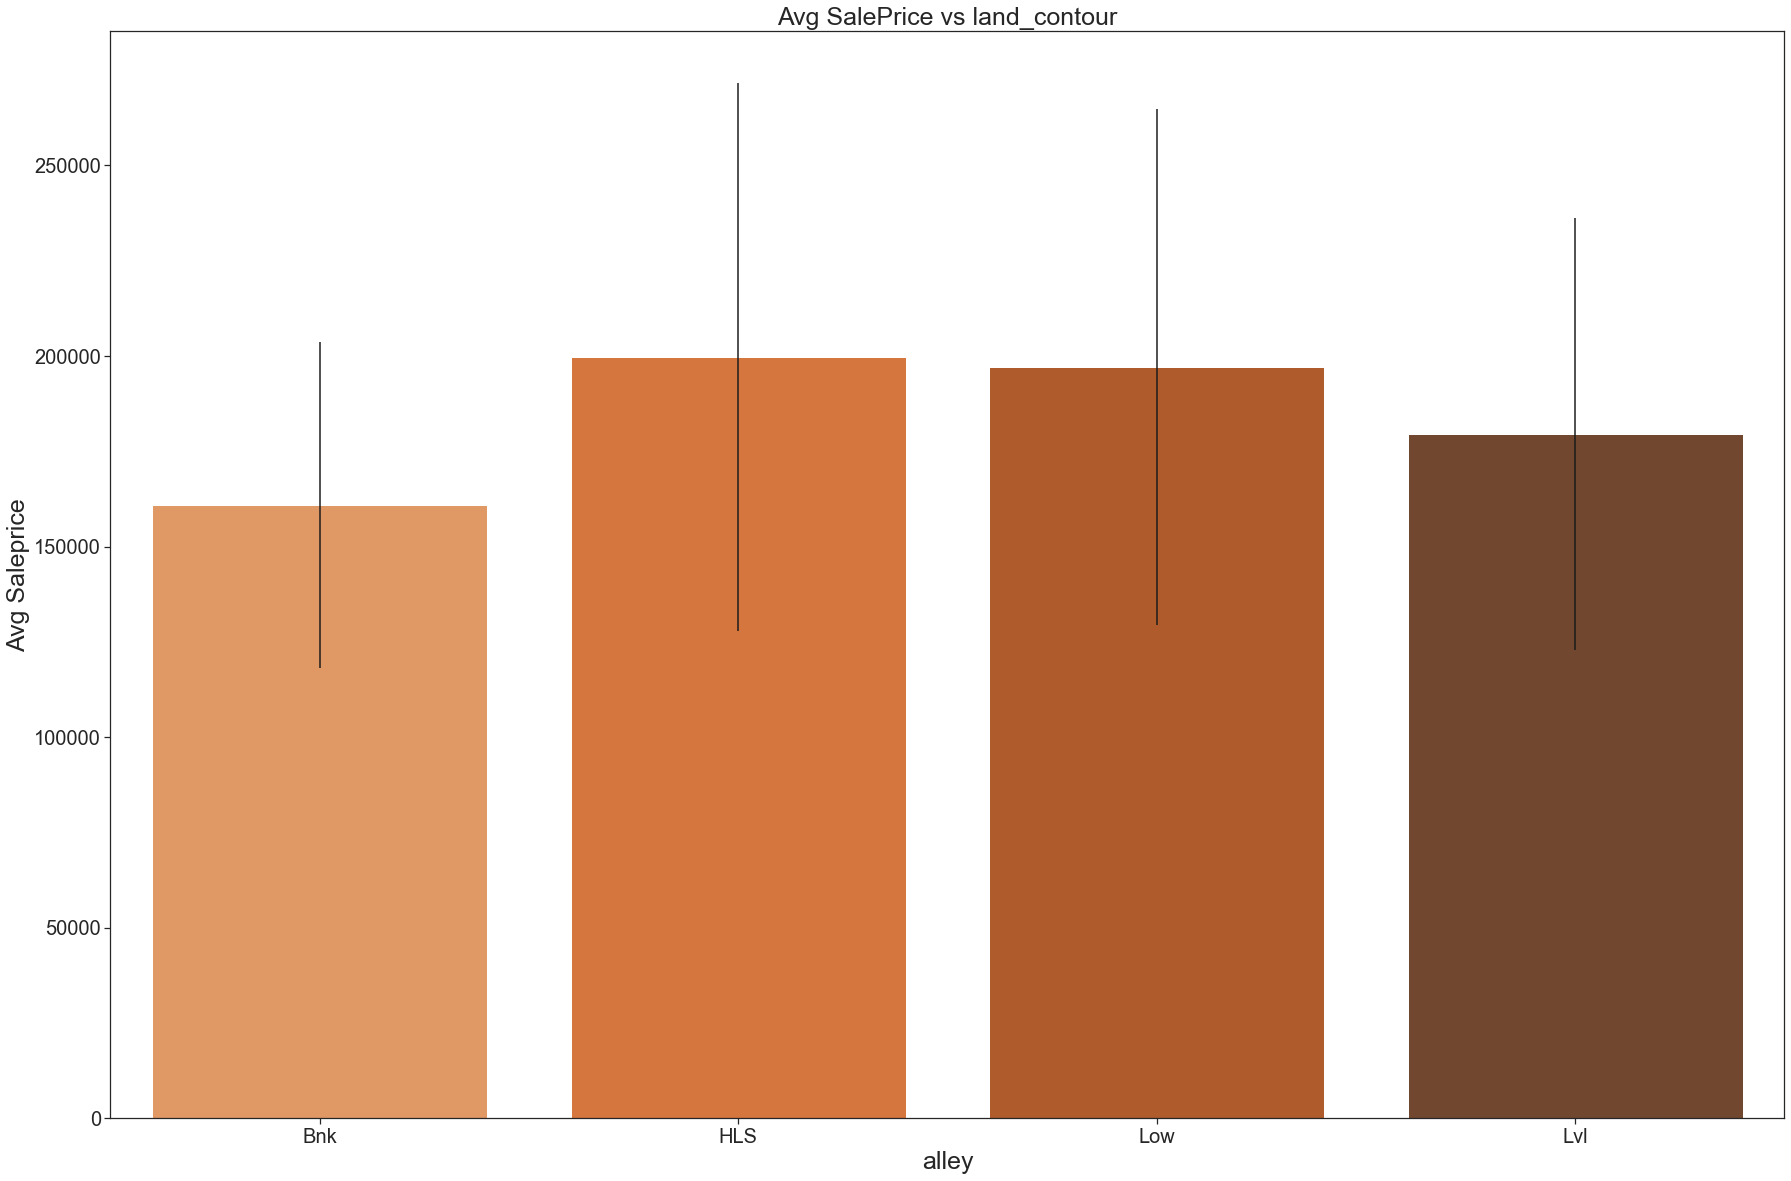

In [92]:
#4, LandContour: Flatness of the property
land_contour = (df_merged >> group_by(X.LandContour) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=land_contour['LandContour'], y=land_contour['avg'],yerr=land_contour['stdev']*1, palette='Oranges_d')
plt.xlabel('alley', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs land_contour', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


# Hillside properties seem to be selling at quite a higher price than flatsided ones!! Maybe because of the view? Fresh Breeze?

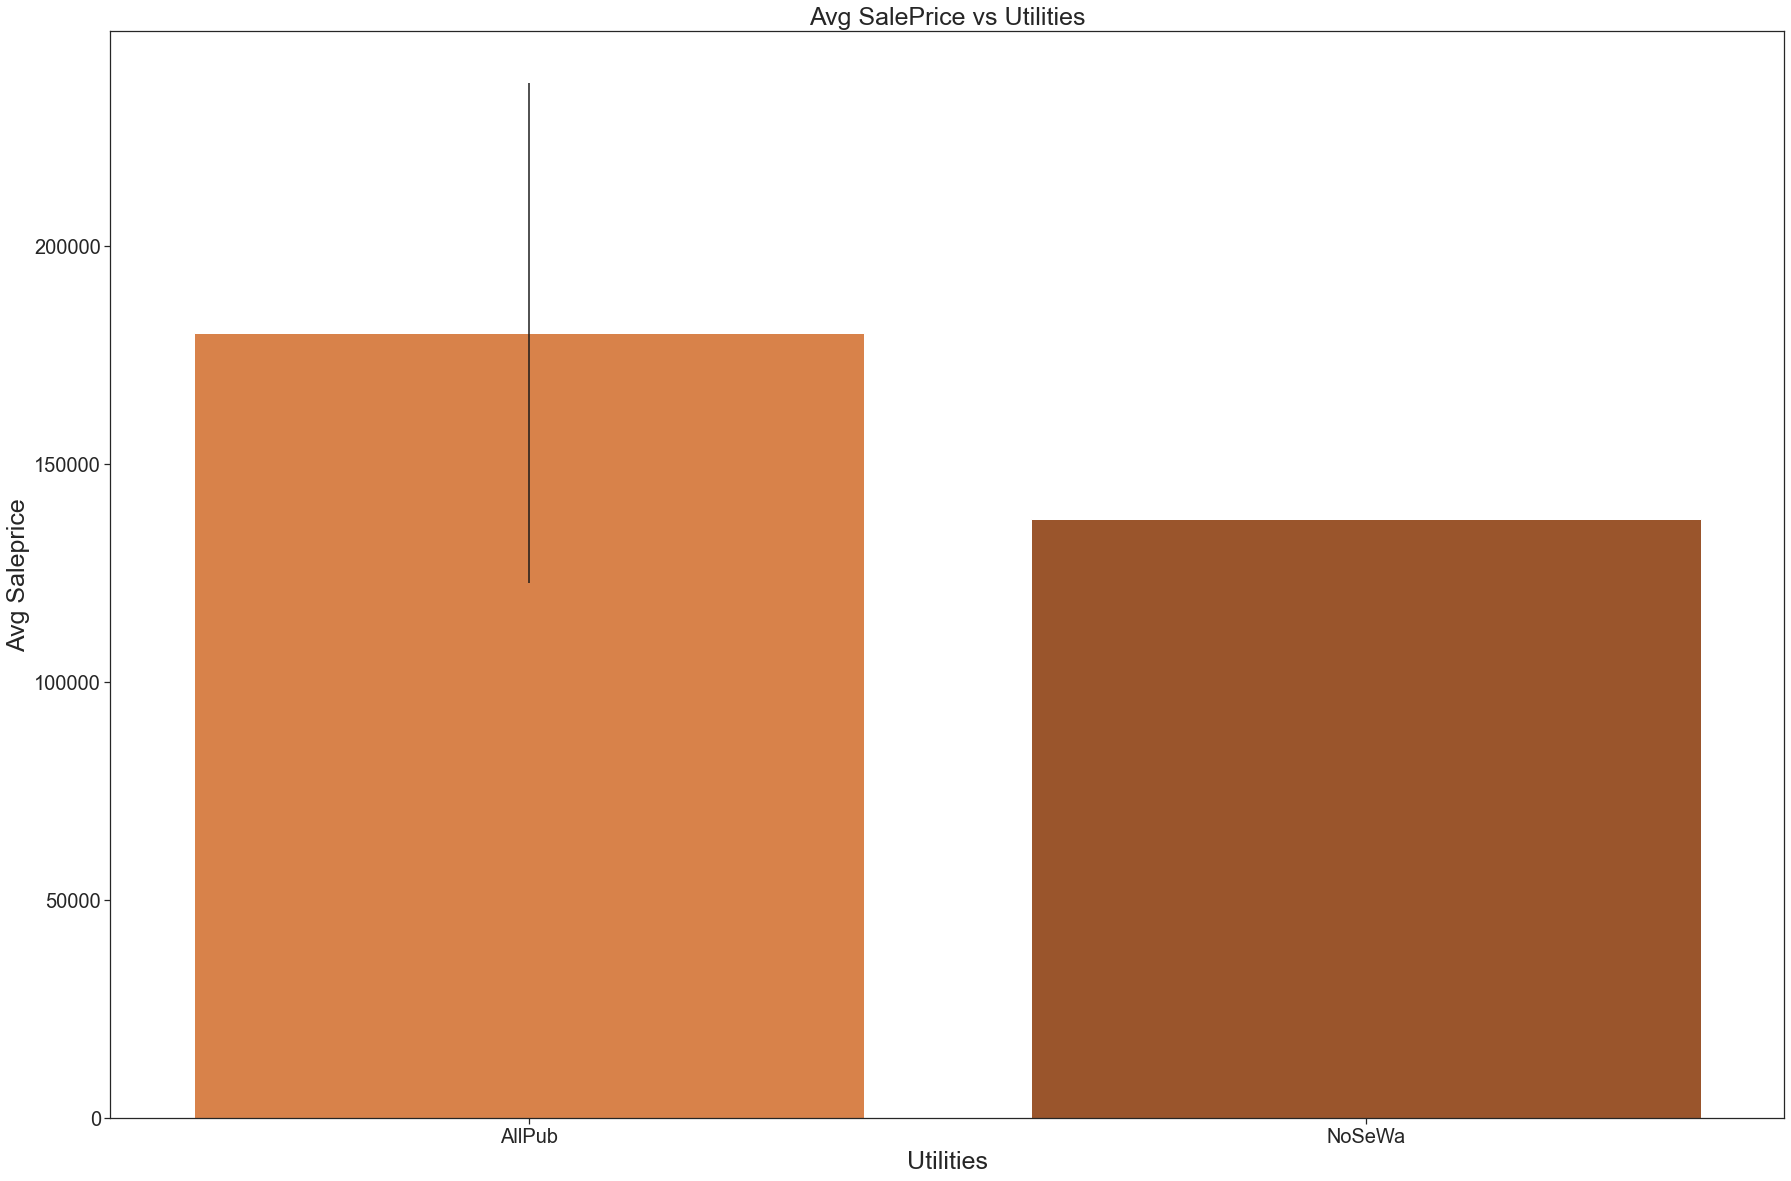

In [93]:
# 5 Utilities: Type of utilities available
utilities = (df_merged >> group_by(X.Utilities) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=utilities['Utilities'], y=utilities['avg'],yerr=utilities['stdev']*1, palette='Oranges_d')
plt.xlabel('Utilities', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Utilities', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Obviously the plots with all public utilities sell at higher prices. No surprises here!

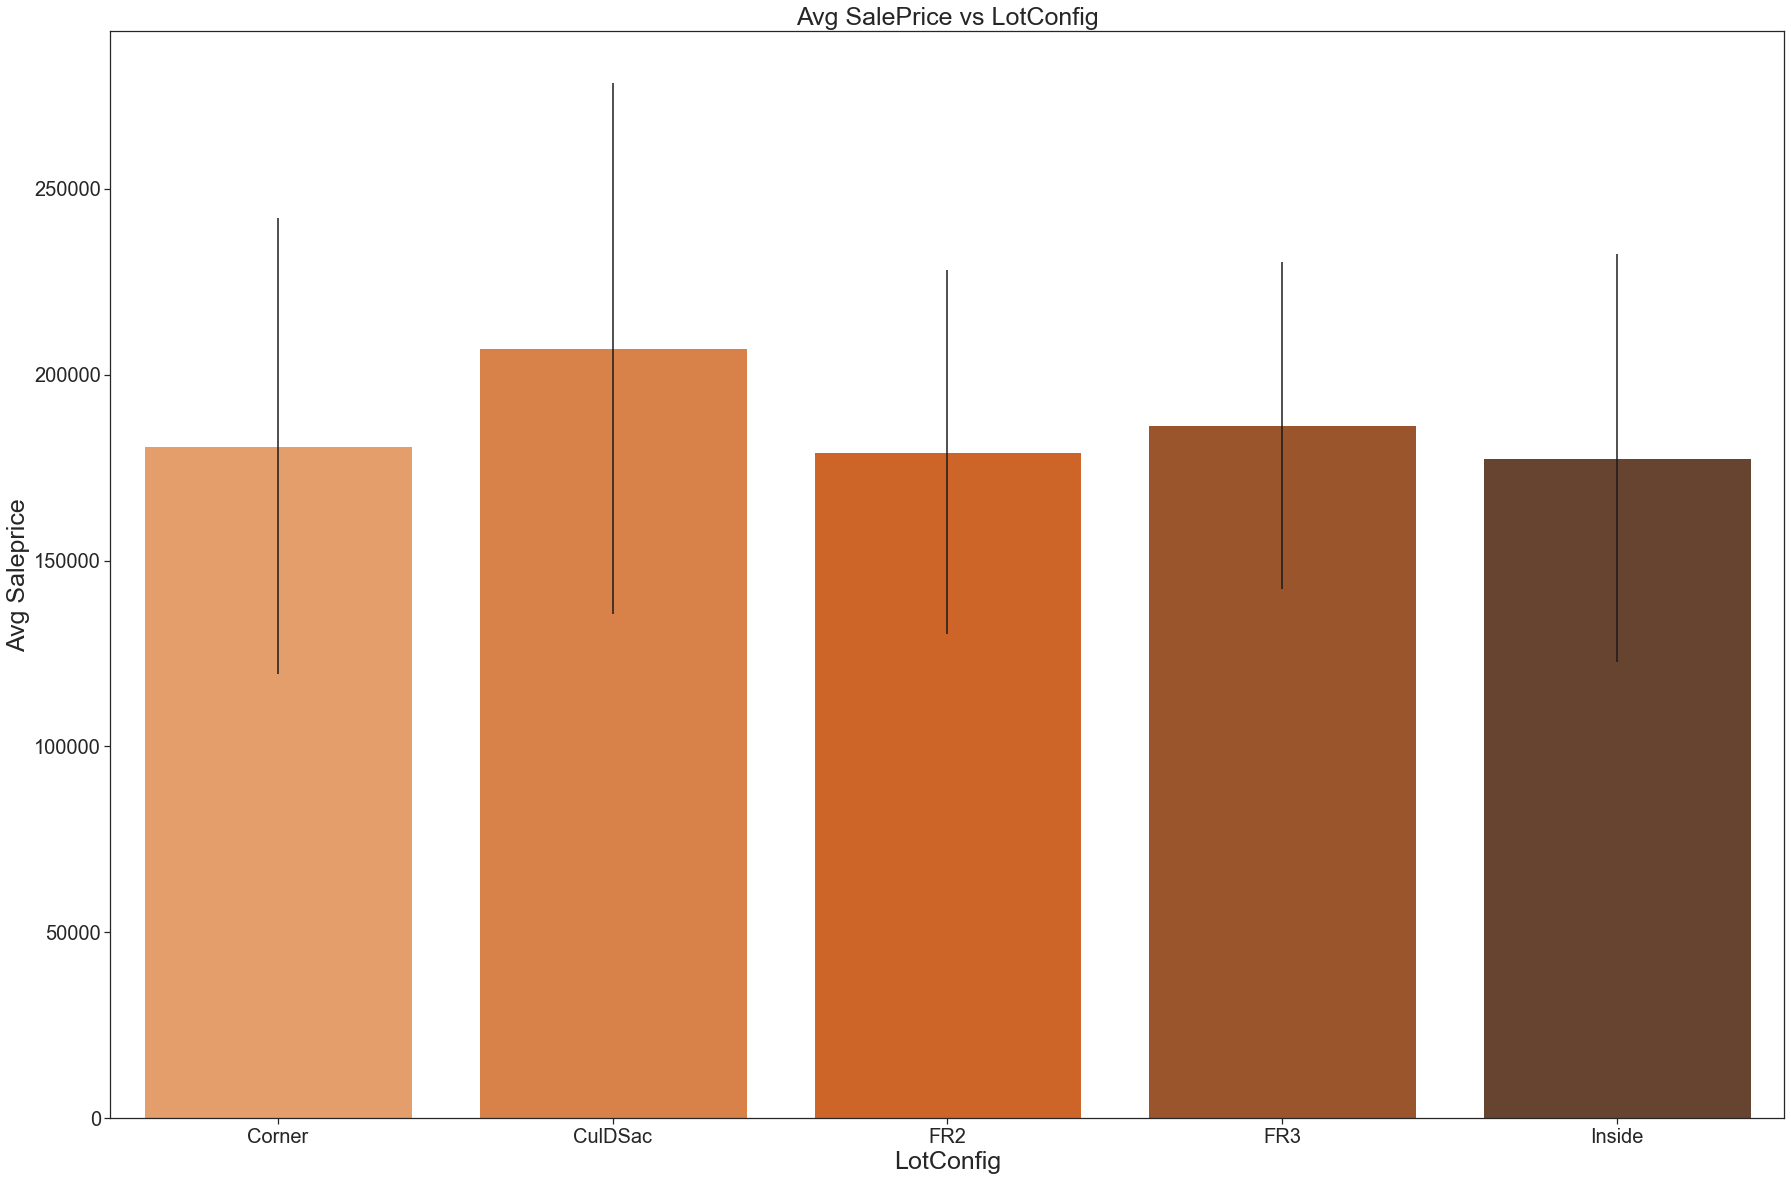

In [94]:
# 6. LotConfig: Lot configuration
lot_config = (df_merged >> group_by(X.LotConfig) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=lot_config['LotConfig'], y=lot_config['avg'],yerr=lot_config['stdev']*1, palette='Oranges_d')
plt.xlabel('LotConfig', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs LotConfig', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Cul-De-sac seems to sell for the highest price followed by frontage on 3 sides

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

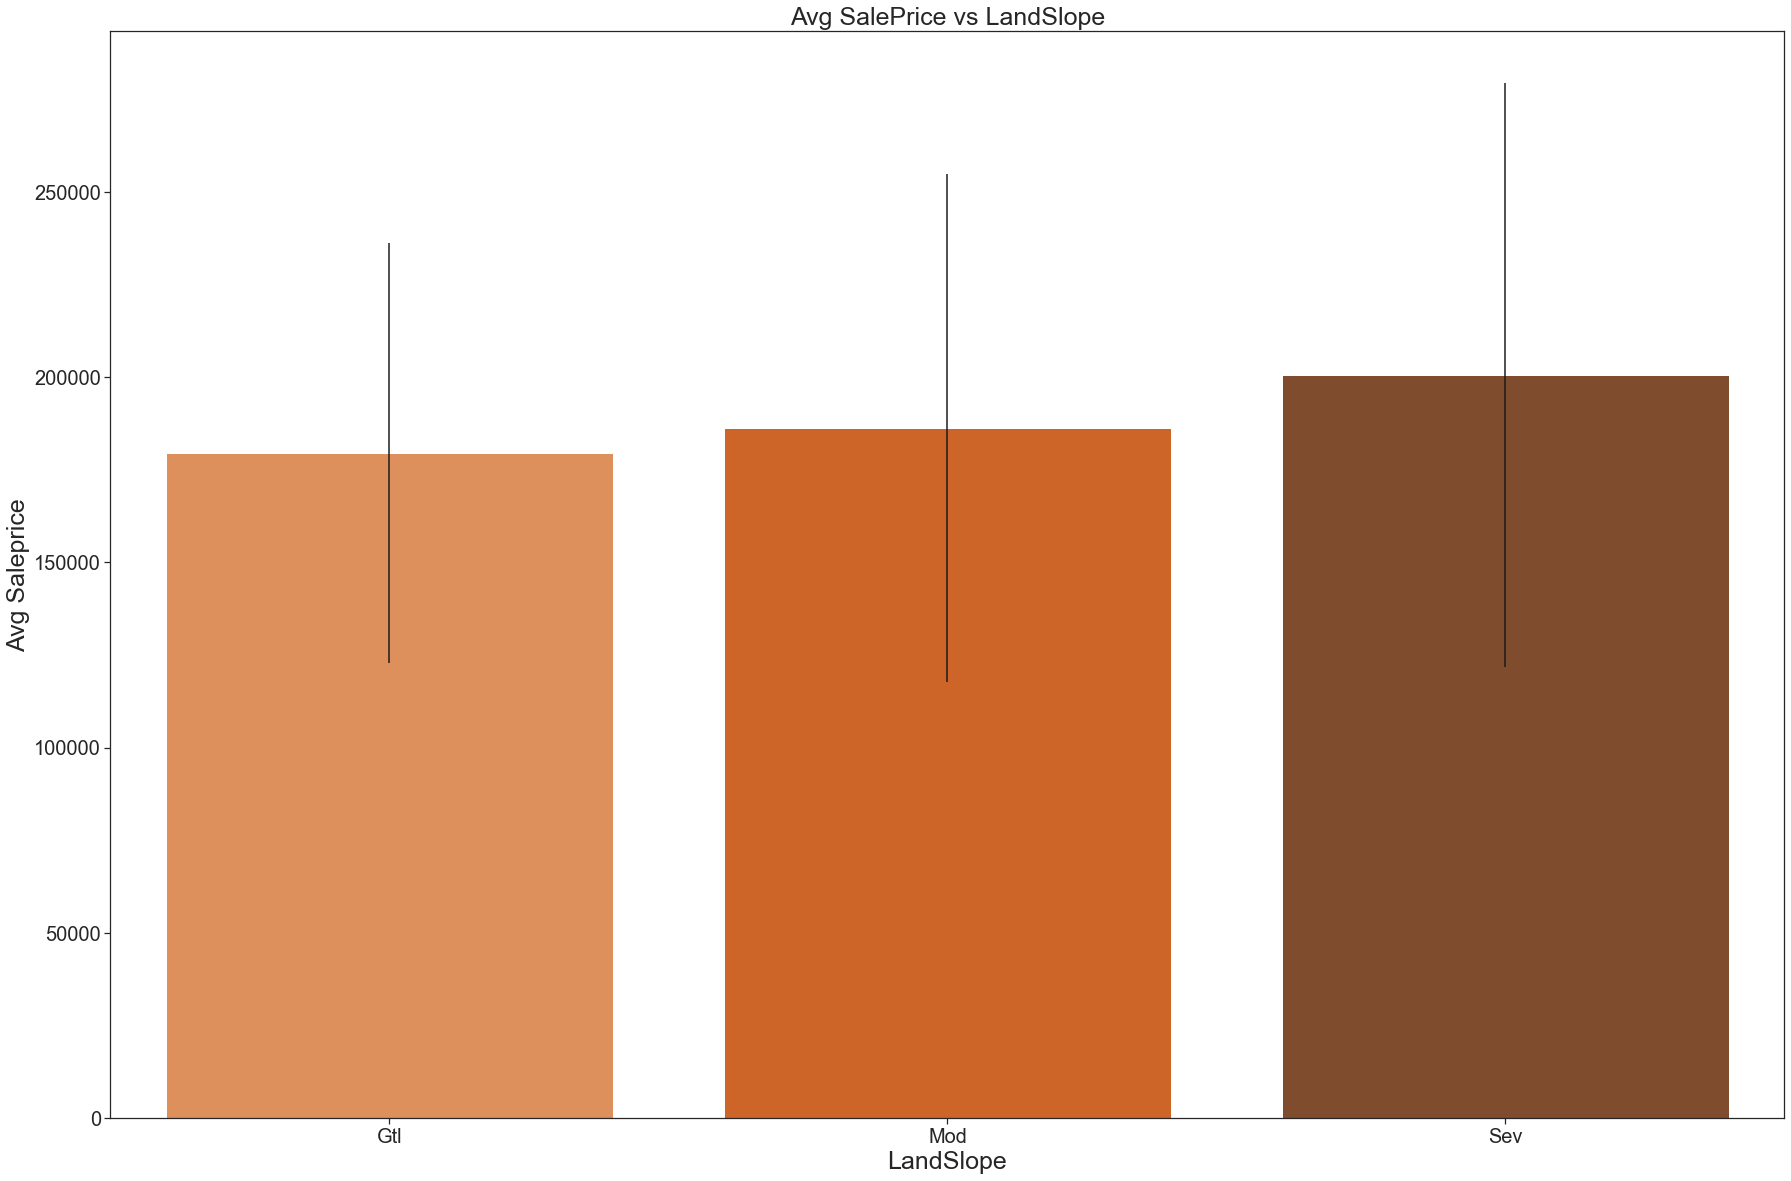

In [95]:
# 7. LandSlope: Slope of property
land_slope = (df_merged >> group_by(X.LandSlope) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=land_slope['LandSlope'], y=land_slope['avg'],yerr=land_slope['stdev']*1, palette='Oranges_d')
plt.xlabel('LandSlope', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs LandSlope', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Surprisingly severely sloped properties seems to sell at slightly higher prices

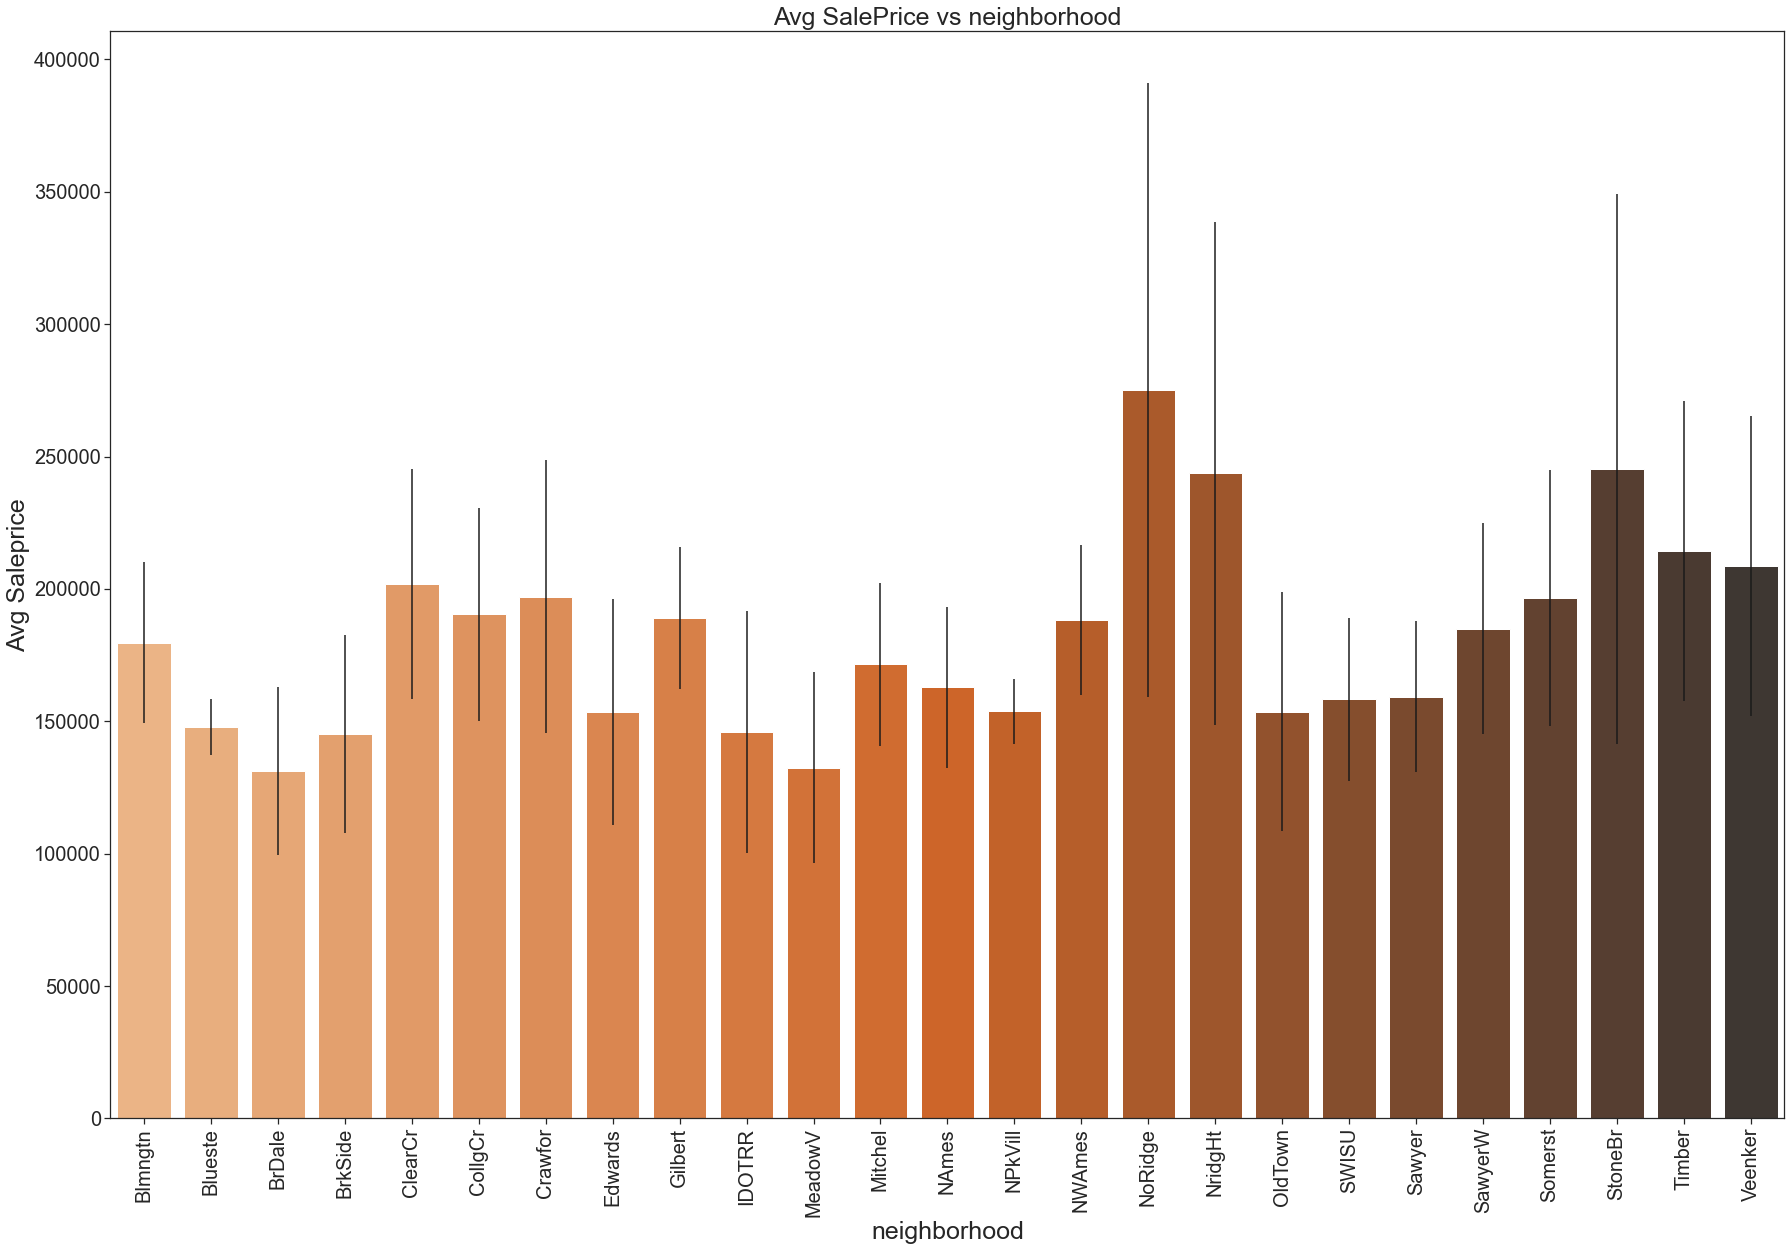

In [96]:
# 8. Neighborhood: Physical locations within Ames city limits
neighborhood = (df_merged >> group_by(X.Neighborhood) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=neighborhood['Neighborhood'], y=neighborhood['avg'],yerr=neighborhood['stdev']*1, palette='Oranges_d')
plt.xlabel('neighborhood', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs neighborhood', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


## North Ridge, North Ridge Heights and Stone Brook seem to be the top 3 costliest neighborhoods. Budget buyers better to stay off from these neighbourhoods!

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

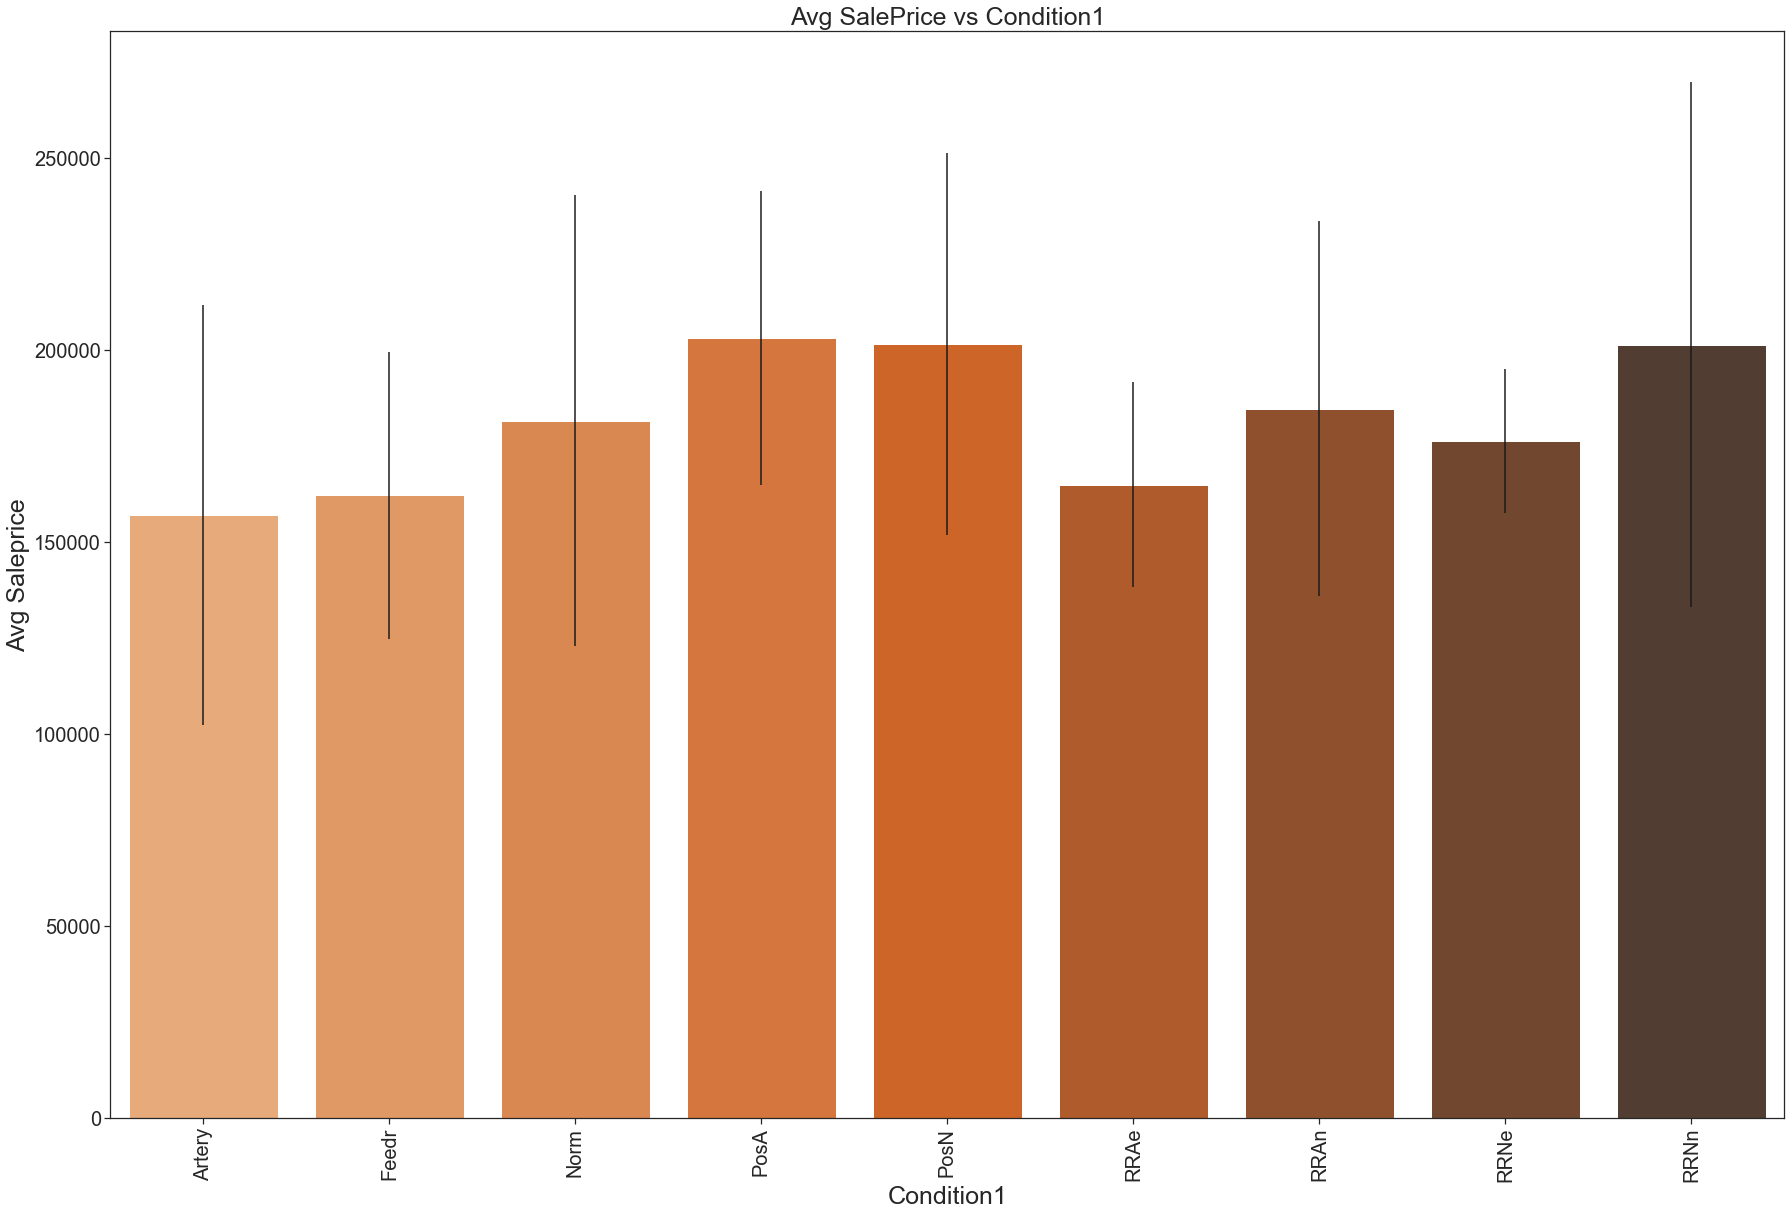

In [117]:
# 9. Condition1: Proximity to various conditions
condition_1 = (df_merged >> group_by(X.Condition1) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=condition_1['Condition1'], y=condition_1['avg'],yerr=condition_1['stdev']*1, palette='Oranges_d')
plt.xlabel('Condition1', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Condition1', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)


# There seems to be an inclination towards environment/ health aspects as near parks/ greenbelts seems to be on the higher selling price

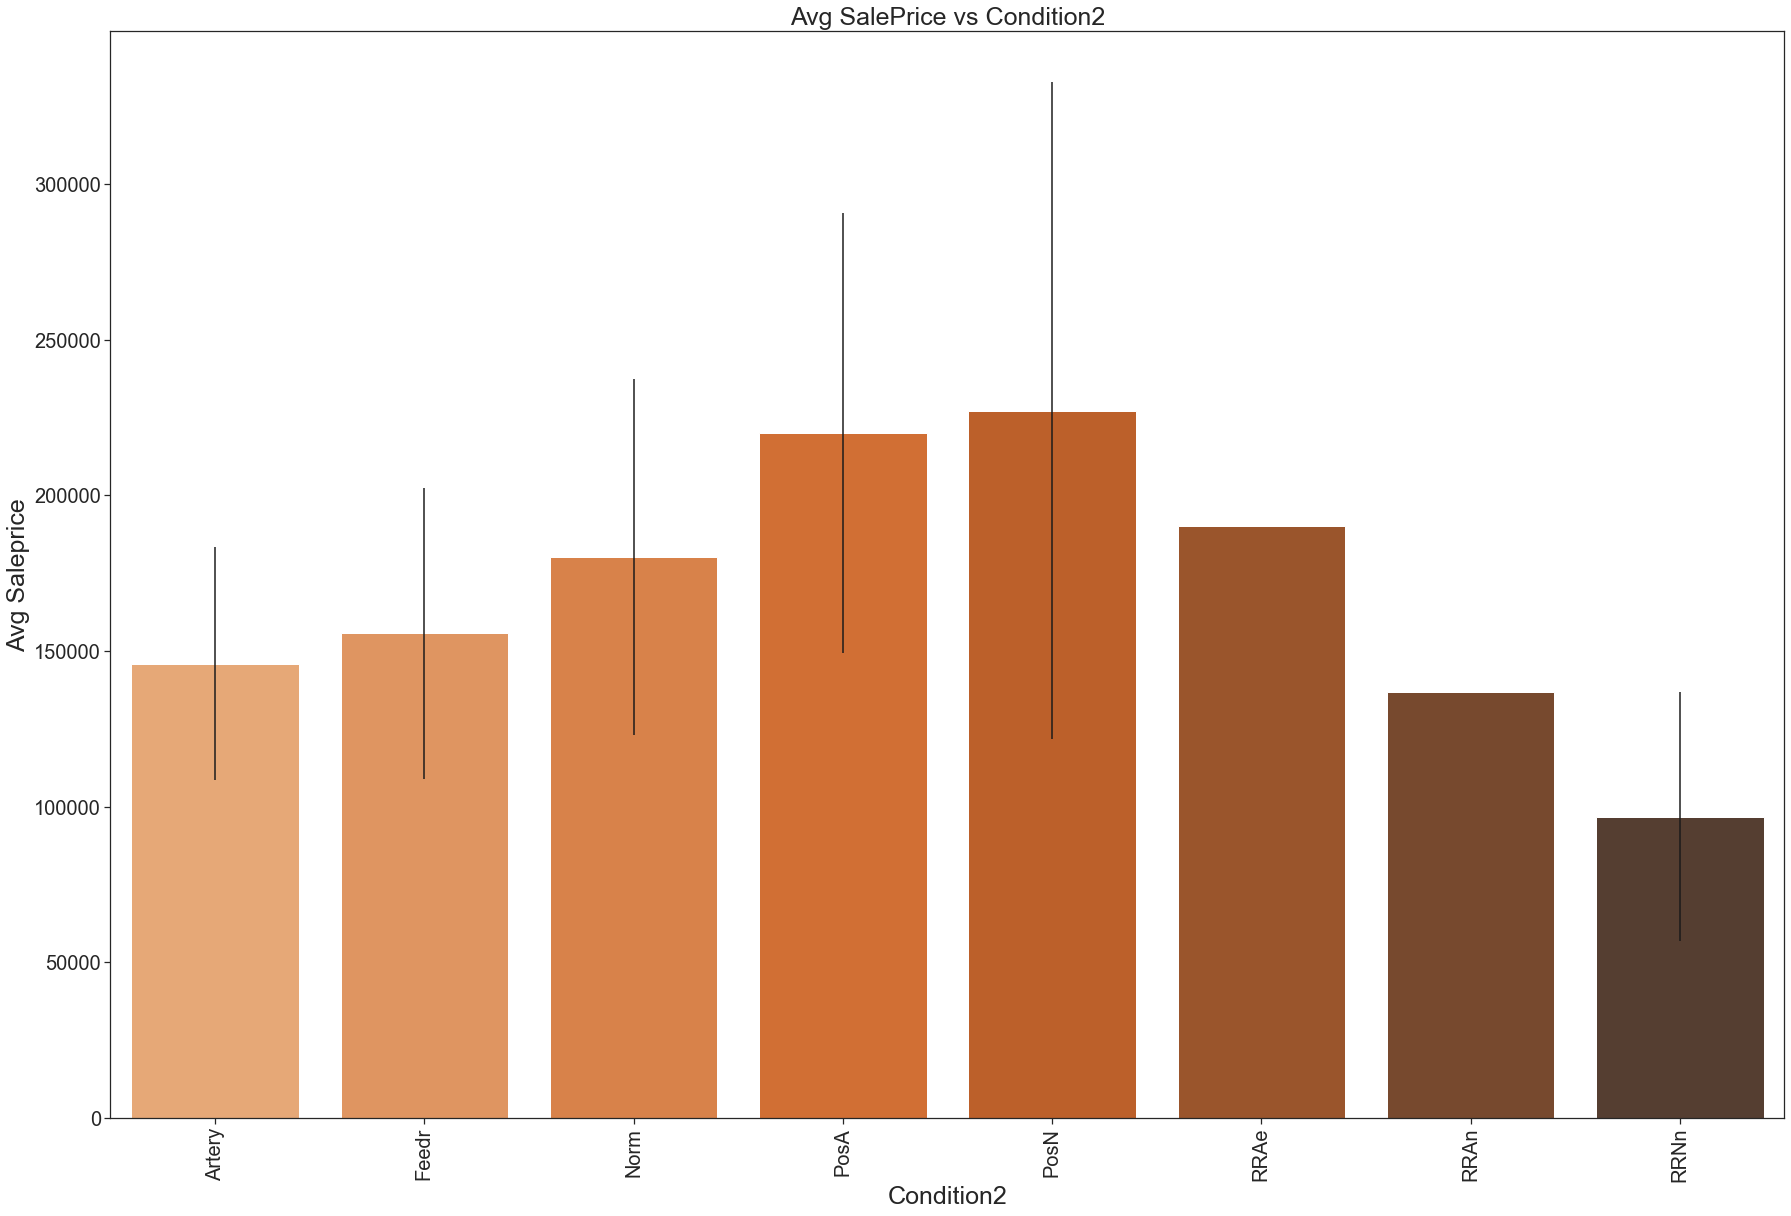

In [118]:
# 10. Condition2: Proximity to various conditions (if more than one is present)
condition_2 = (df_merged >> group_by(X.Condition2) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=condition_2['Condition2'], y=condition_2['avg'],yerr=condition_2['stdev']*1, palette='Oranges_d')
plt.xlabel('Condition2', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Condition2', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Again higher selling price for sites on the positive off site feature(greenbelts)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

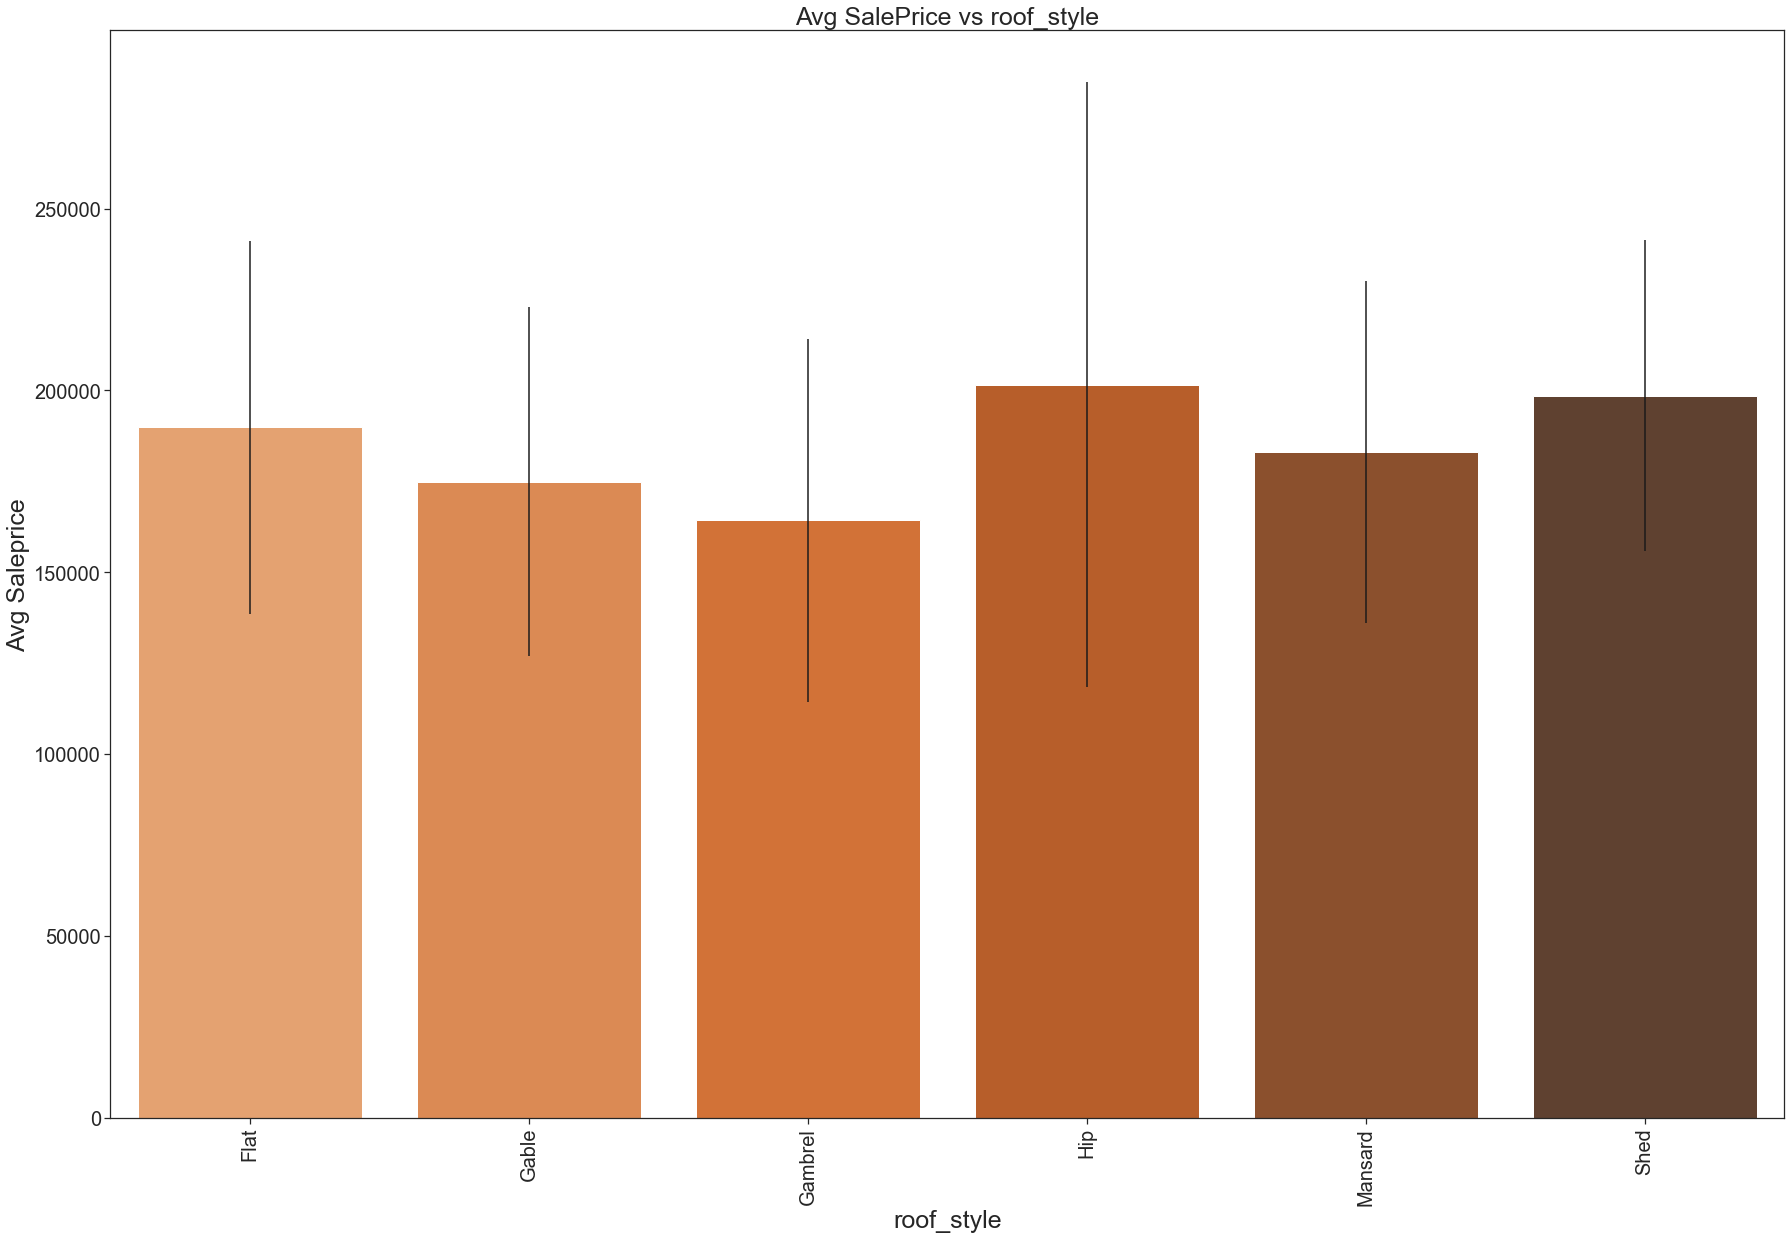

In [119]:
# 11 RoofStyle: Type of roof
roof_style = (df_merged >> group_by(X.RoofStyle) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='RoofStyle', yerr=roof_style['stdev']*1, data=roof_style, capsize=3, palette='Oranges_d')
plt.xlabel('roof_style', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs roof_style', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Hip and Shed style of roofing seems to be selling at higher prices

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

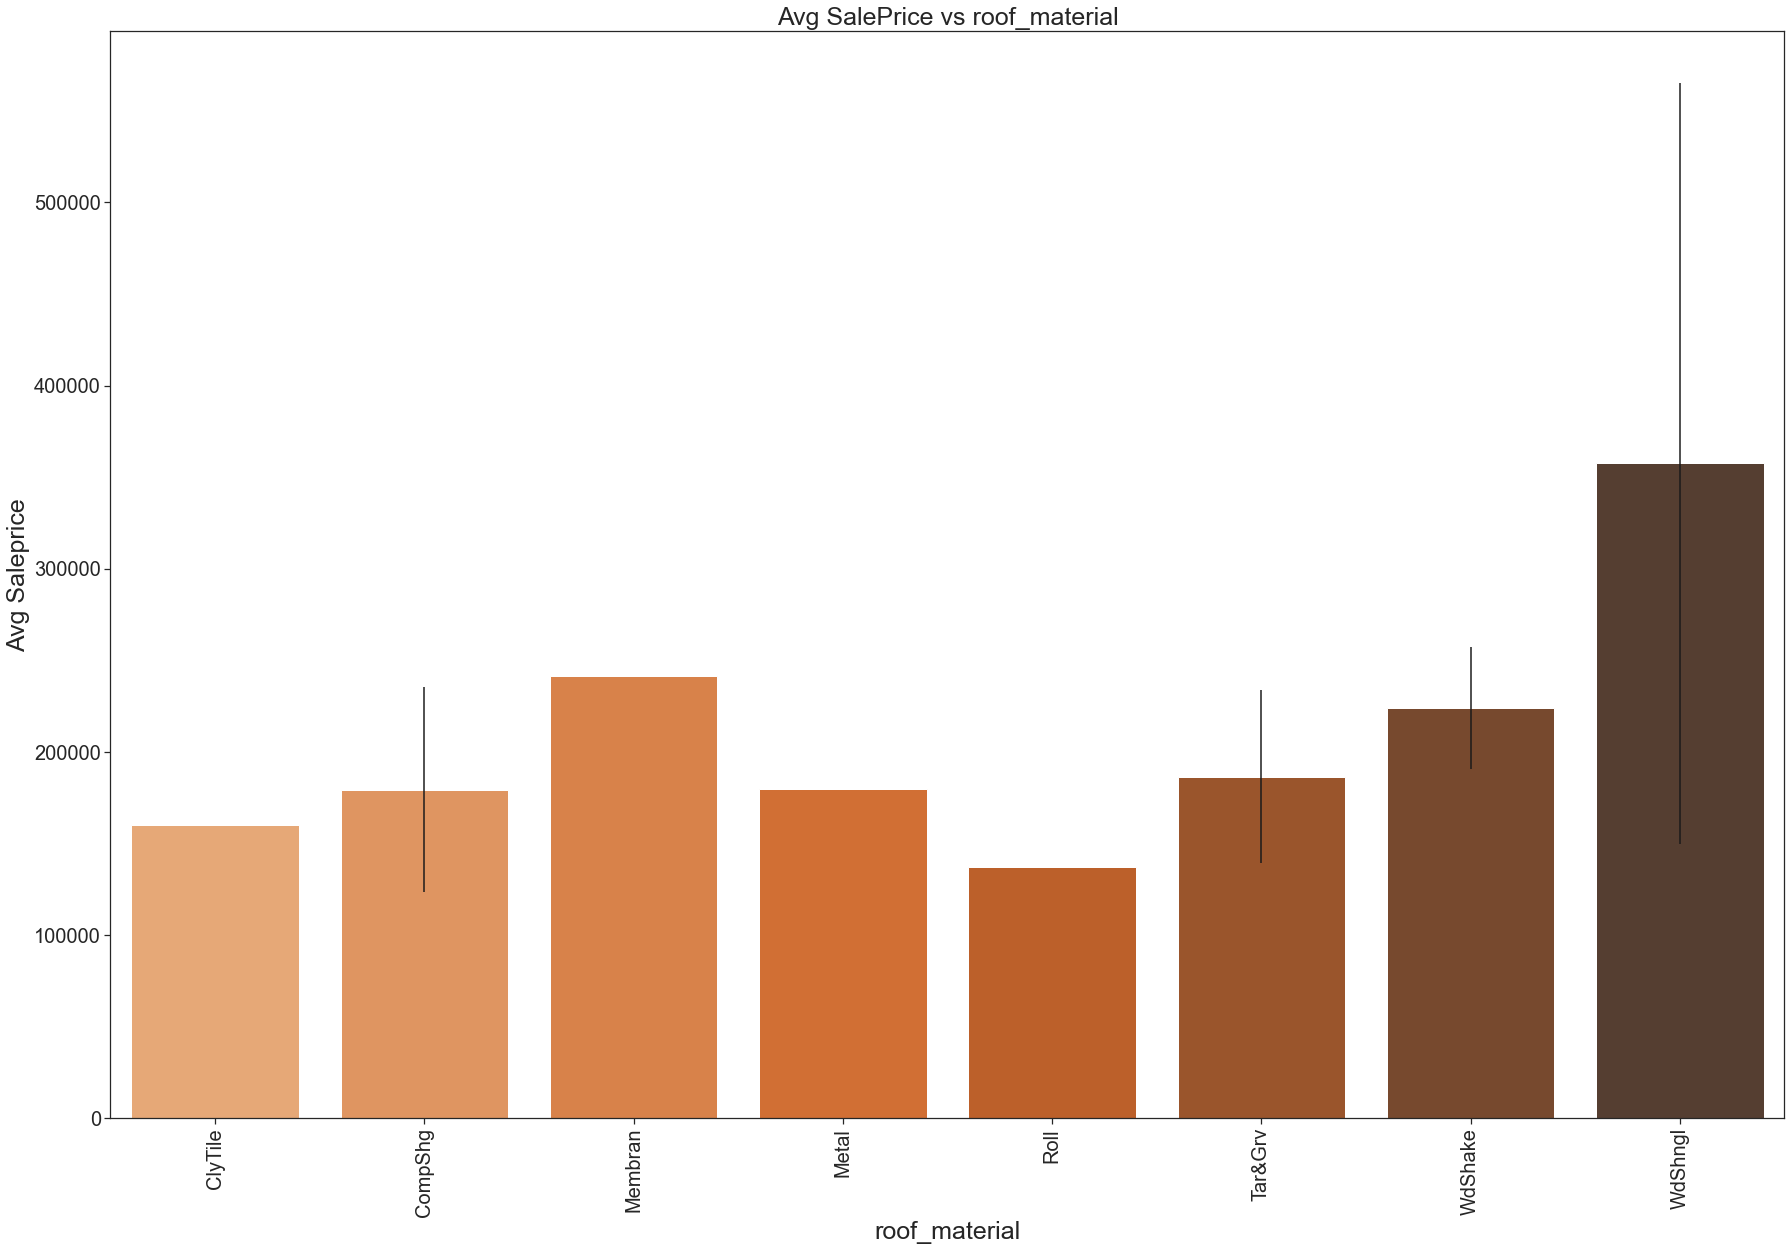

In [120]:
# 12 RoofMatl: Roof material
roof_material = (df_merged >> group_by(X.RoofMatl) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='RoofMatl', yerr=roof_material['stdev']*1, data=roof_material, capsize=3, palette='Oranges_d')
plt.xlabel('roof_material', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs roof_material', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Wood Shingles seems to be selling at higher price


(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

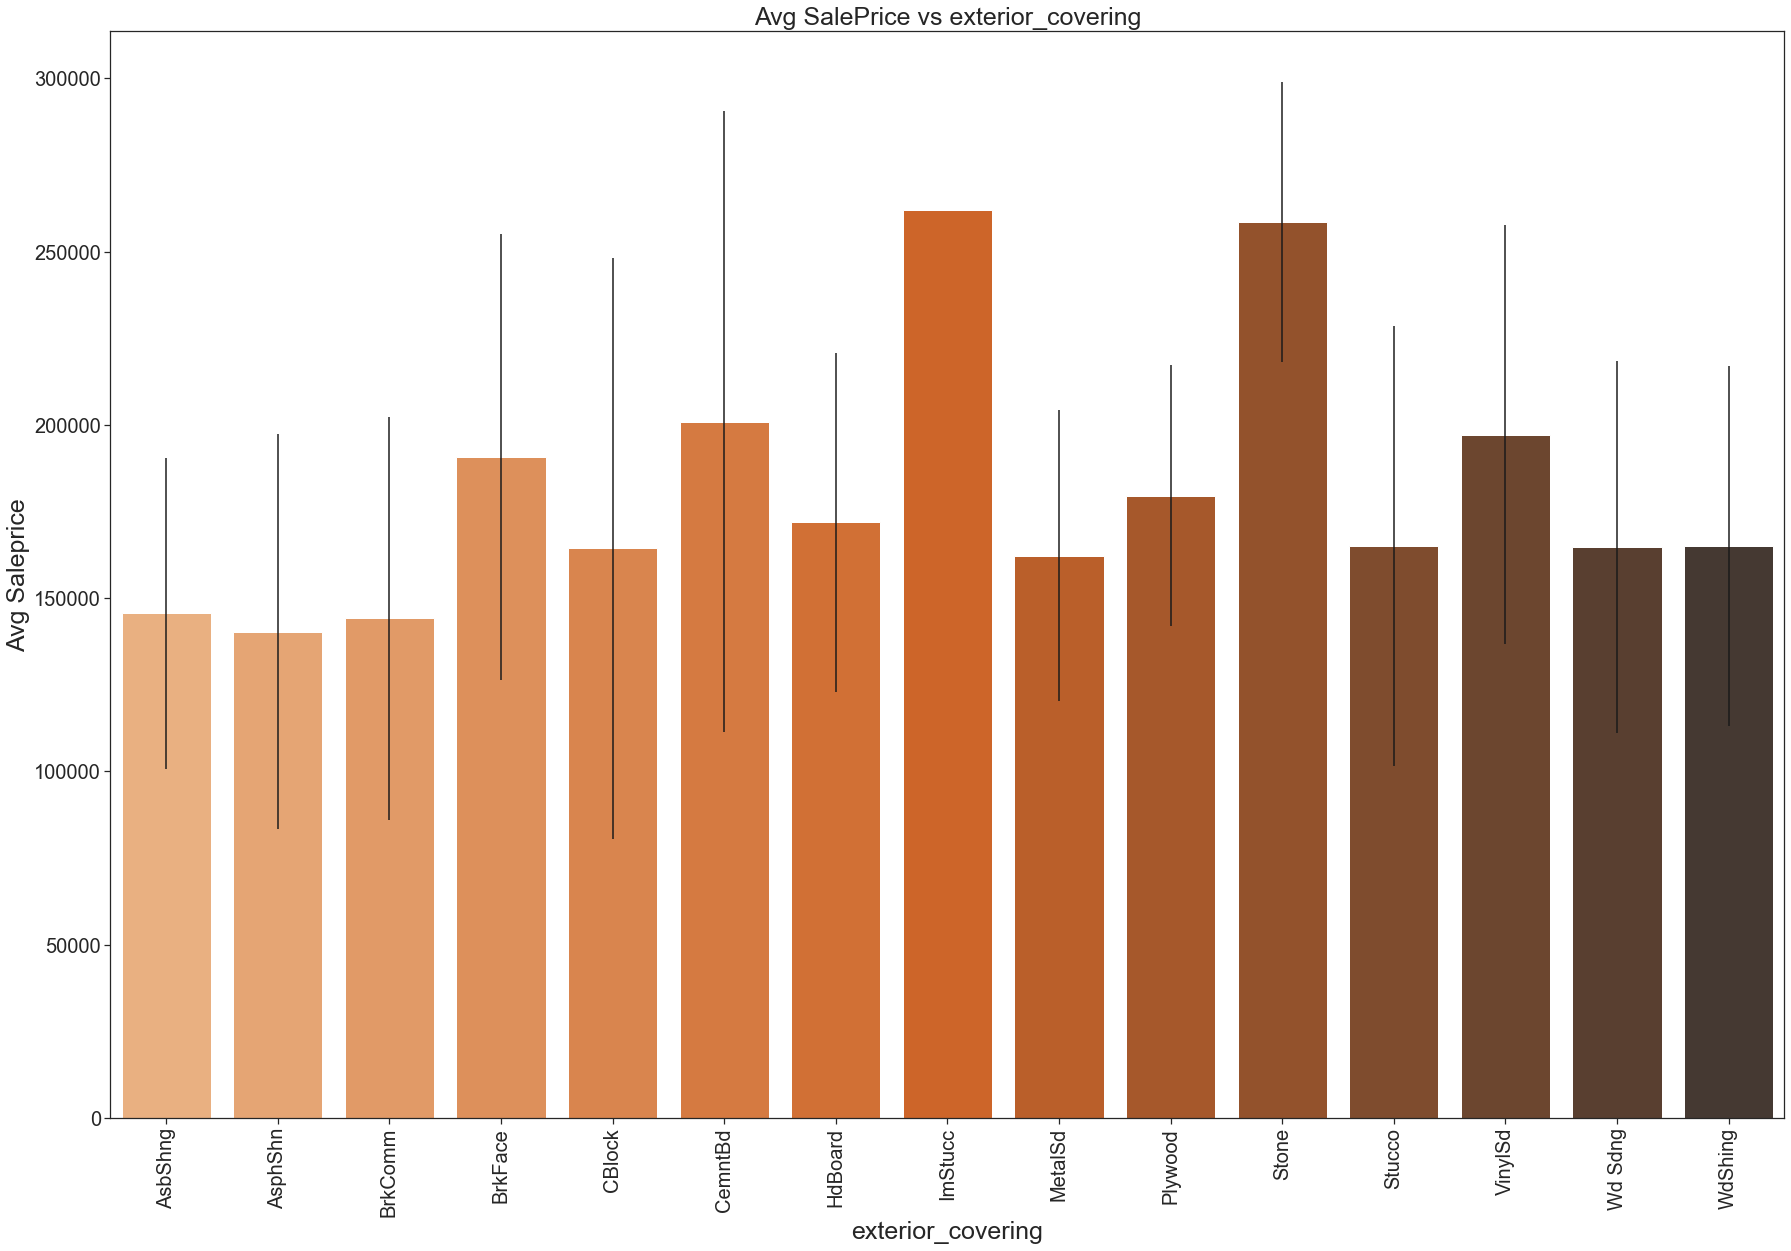

In [121]:
# 13 Exterior1st: Exterior covering on house
exterior_covering = (df_merged >> group_by(X.Exterior1st) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='Exterior1st', yerr=exterior_covering['stdev']*1, data=exterior_covering, capsize=3, palette='Oranges_d')
plt.xlabel('exterior_covering', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs exterior_covering', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Imitation stucco sells at higher prices than the rest, but surprisingly there is no standard deviation for this, which means there is only one data point for all this or all values have same selling price.

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

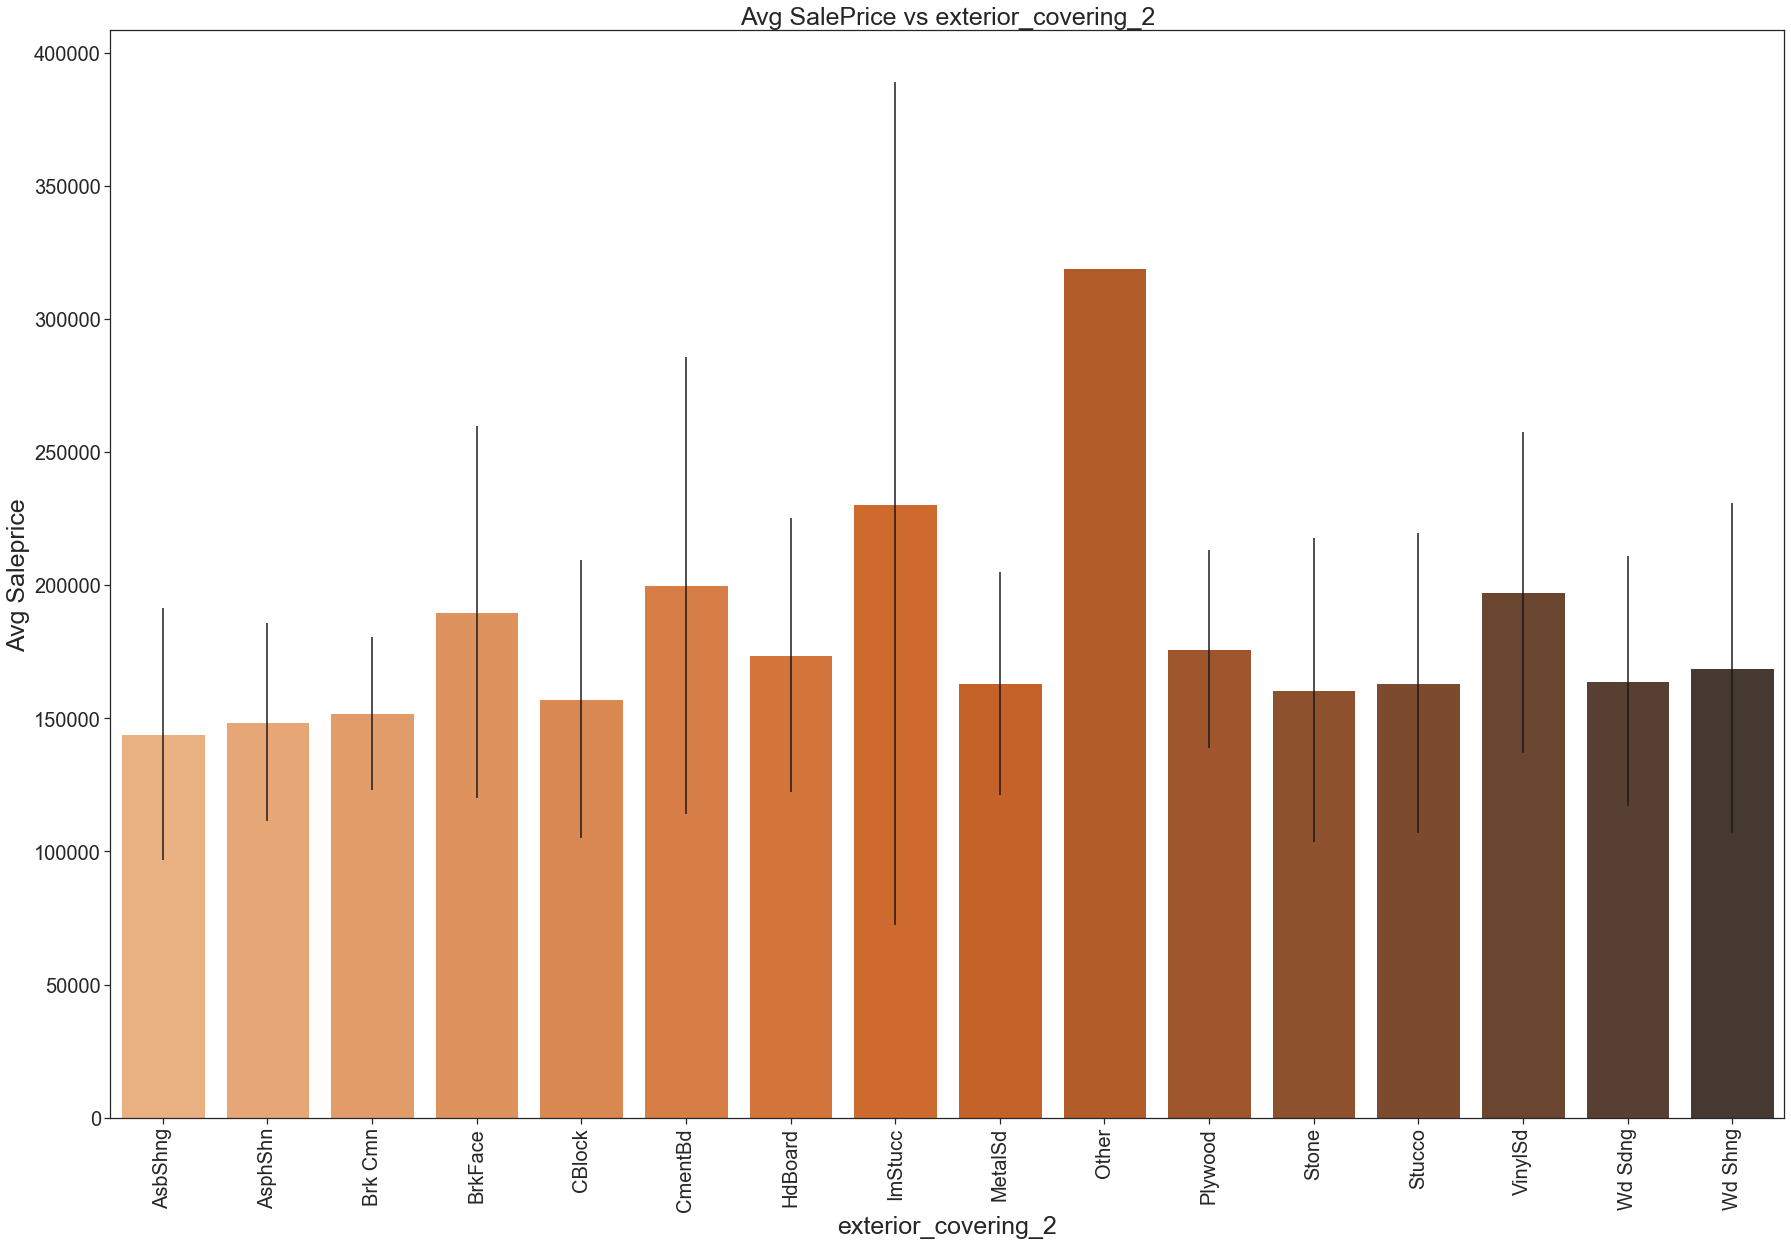

In [122]:
# 14 Exterior2nd: Exterior covering on house (if more than one material)
exterior_covering_2 = (df_merged >> group_by(X.Exterior2nd) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='Exterior2nd', yerr=exterior_covering_2['stdev']*1, data=exterior_covering_2, capsize=3, palette='Oranges_d')
plt.xlabel('exterior_covering_2', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs exterior_covering_2', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Not much info here

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

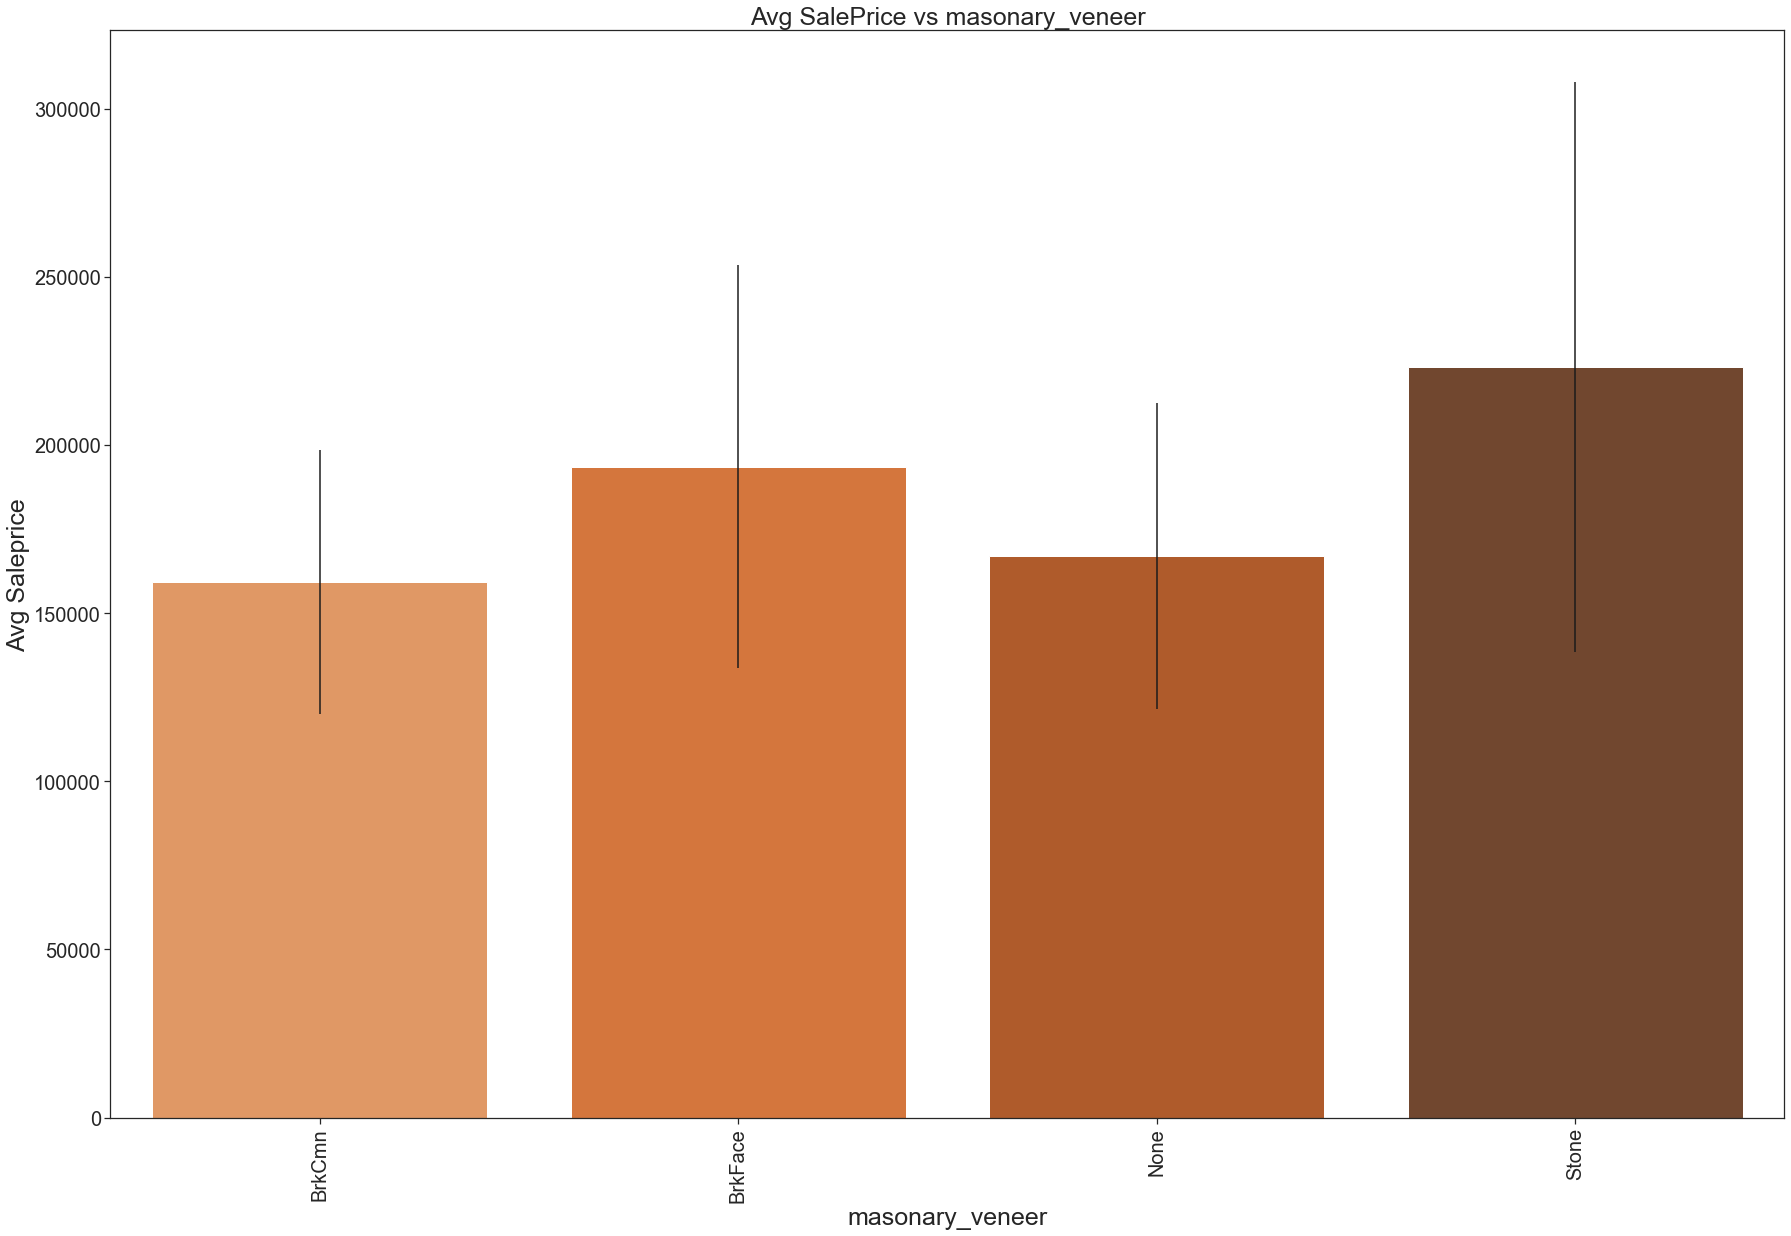

In [123]:
# 15 MasVnrType: Masonry veneer type 
masonary_veneer = (df_merged >> group_by(X.MasVnrType) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='MasVnrType', yerr=masonary_veneer['stdev']*1, data=masonary_veneer, capsize=3, palette='Oranges_d')
plt.xlabel('masonary_veneer', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs masonary_veneer', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Stone Masonry Veneer seems to sell at higher price

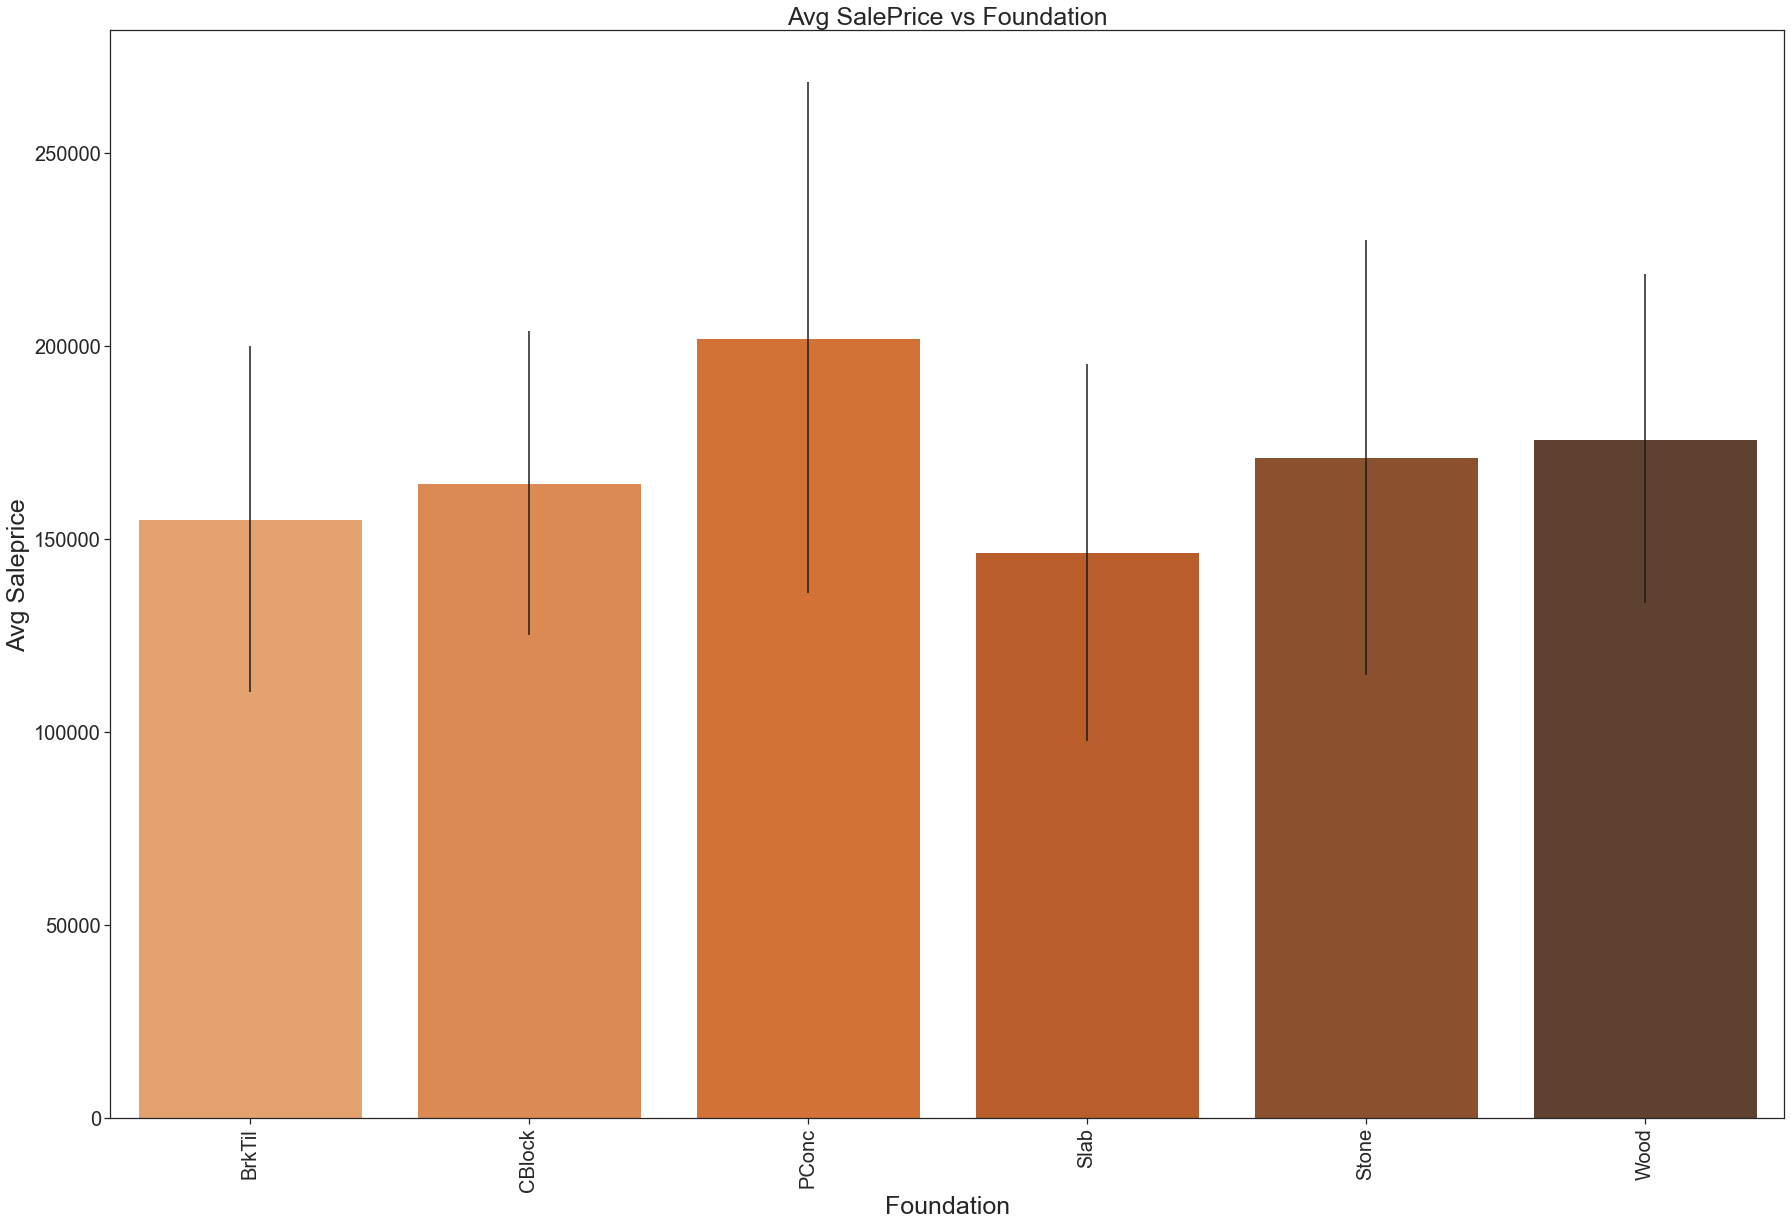

In [124]:
# 16. Foundation: Type of foundation
foundation = (df_merged >> group_by(X.Foundation) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='Foundation', yerr=foundation['stdev']*1, data=foundation, capsize=3, palette='Oranges_d')
plt.xlabel('Foundation', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Foundation', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Poured Concrete foundation seems to be selling at the highest price

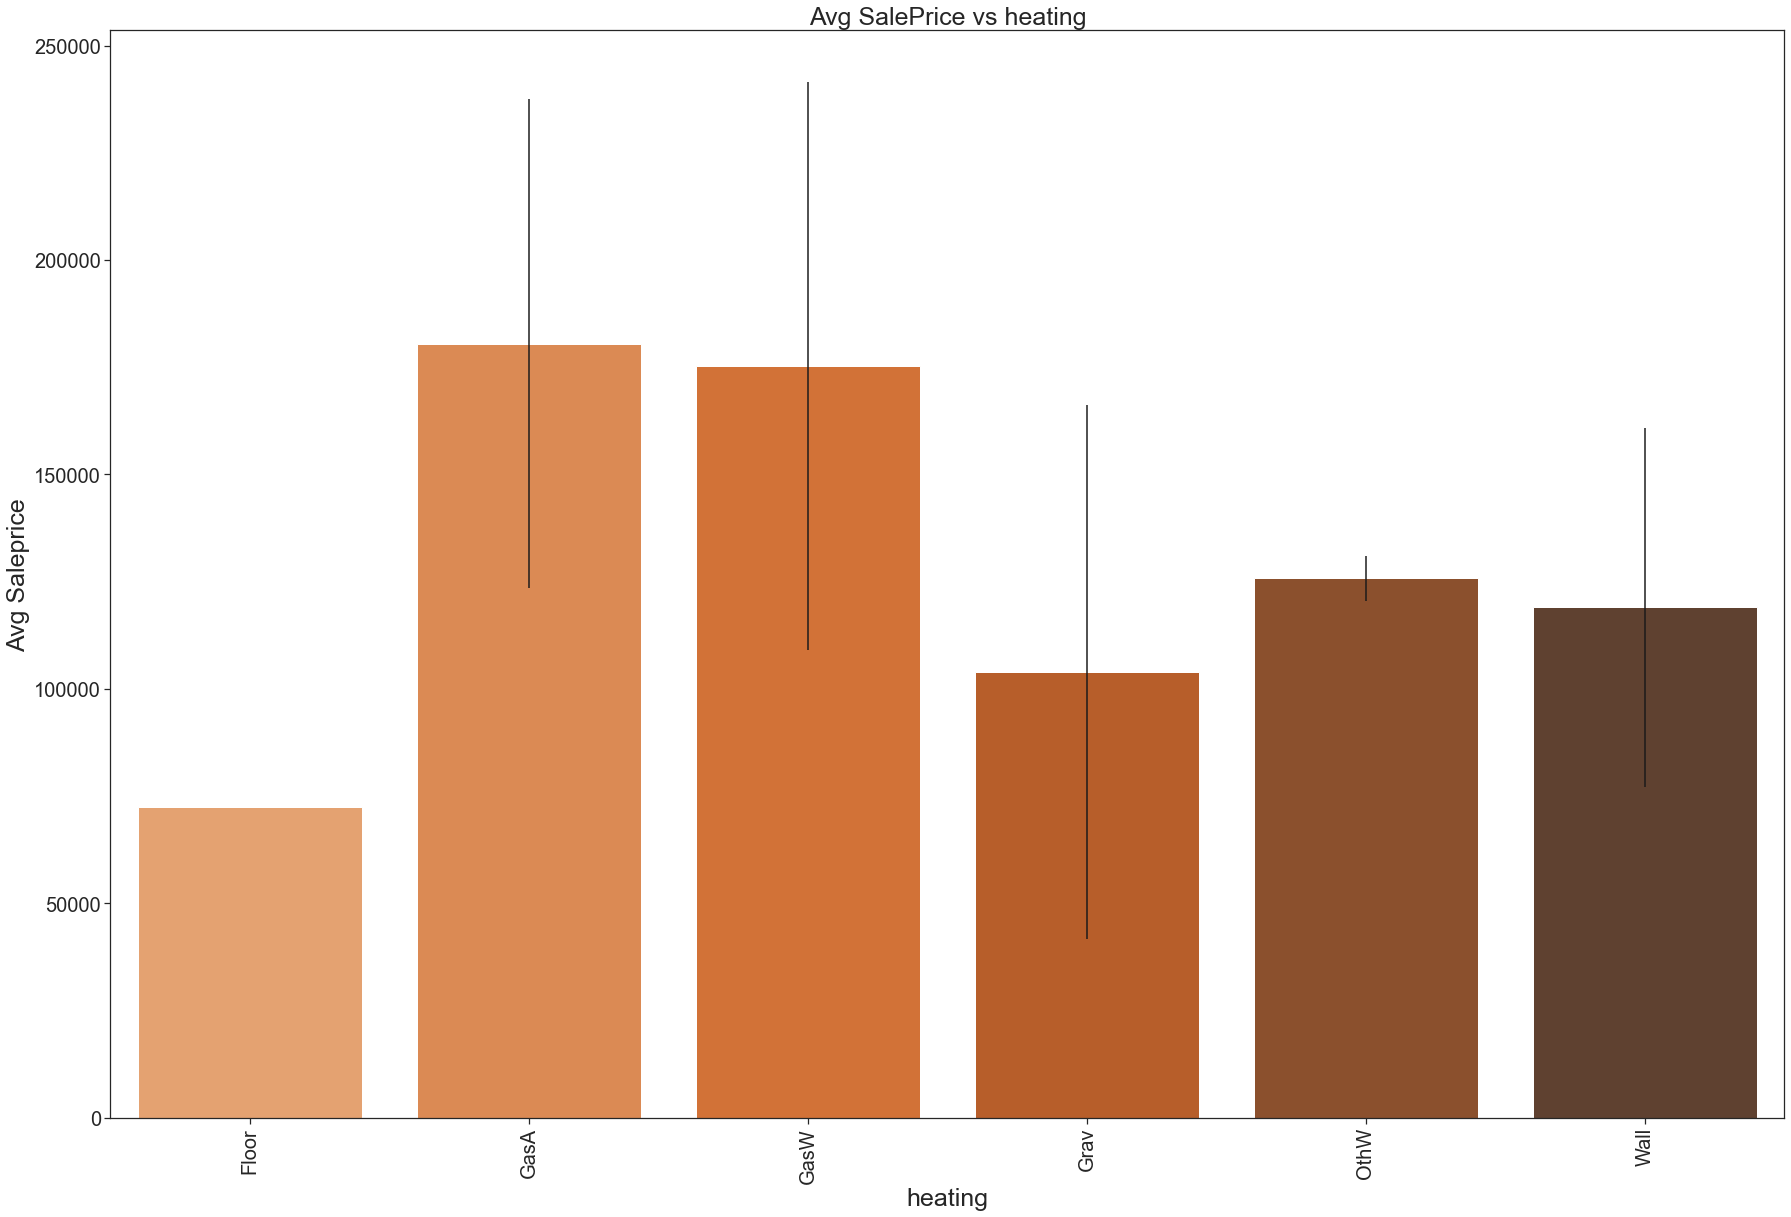

In [125]:
# 17. Heating: Type of heating
heating = (df_merged >> group_by(X.Heating) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='Heating', yerr=heating['stdev']*1, data=heating, capsize=3, palette='Oranges_d')
plt.xlabel('heating', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs heating', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Gas forced warm air furnace is selling at higher prices than others, maybe because it can be used in summer months as air conditioning unit as well( two-in-one use)

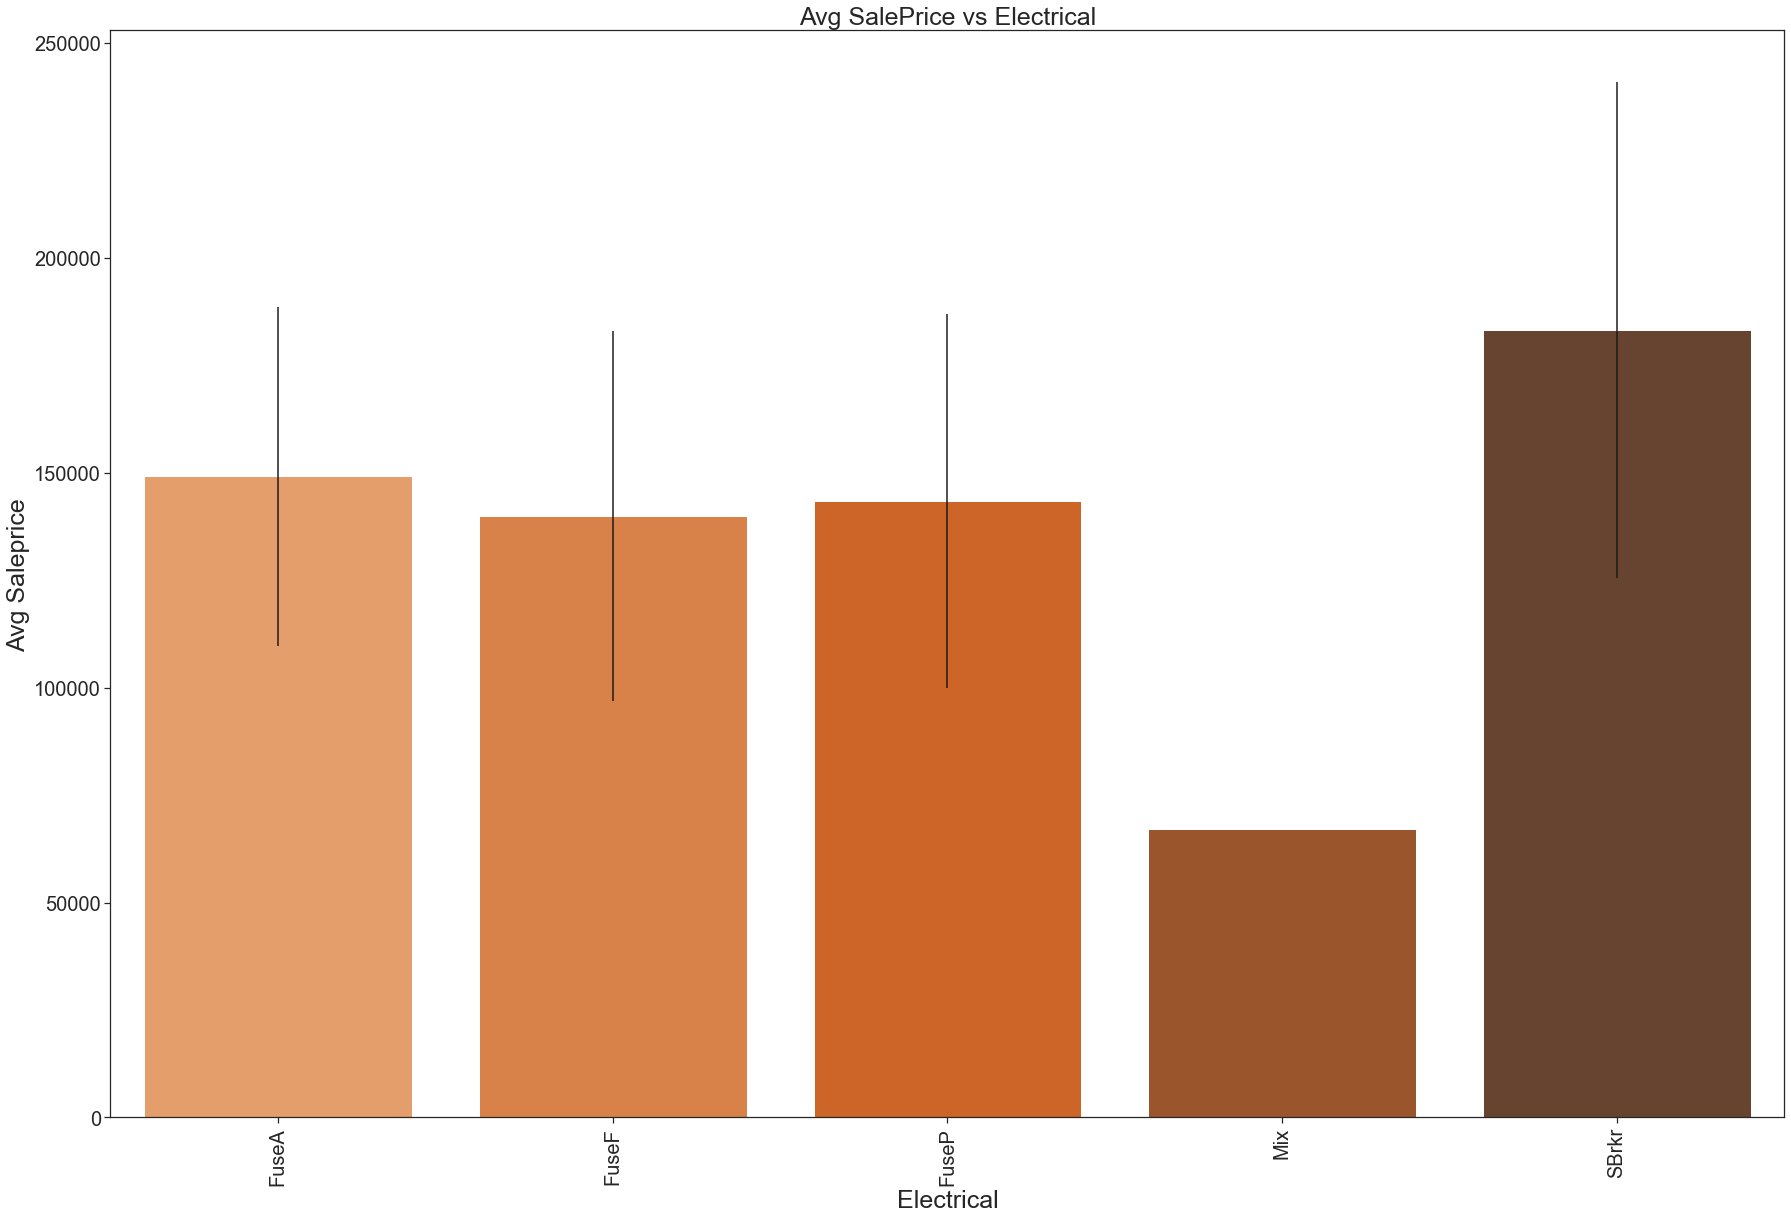

In [126]:
# 18 Electrical: Electrical system
Electrical = (df_merged >> group_by(X.Electrical) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='Electrical', yerr=Electrical['stdev']*1, data=Electrical, capsize=3, palette='Oranges_d')
plt.xlabel('Electrical', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Electrical', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Standard Circuit Breakers with Romex sells at higher price

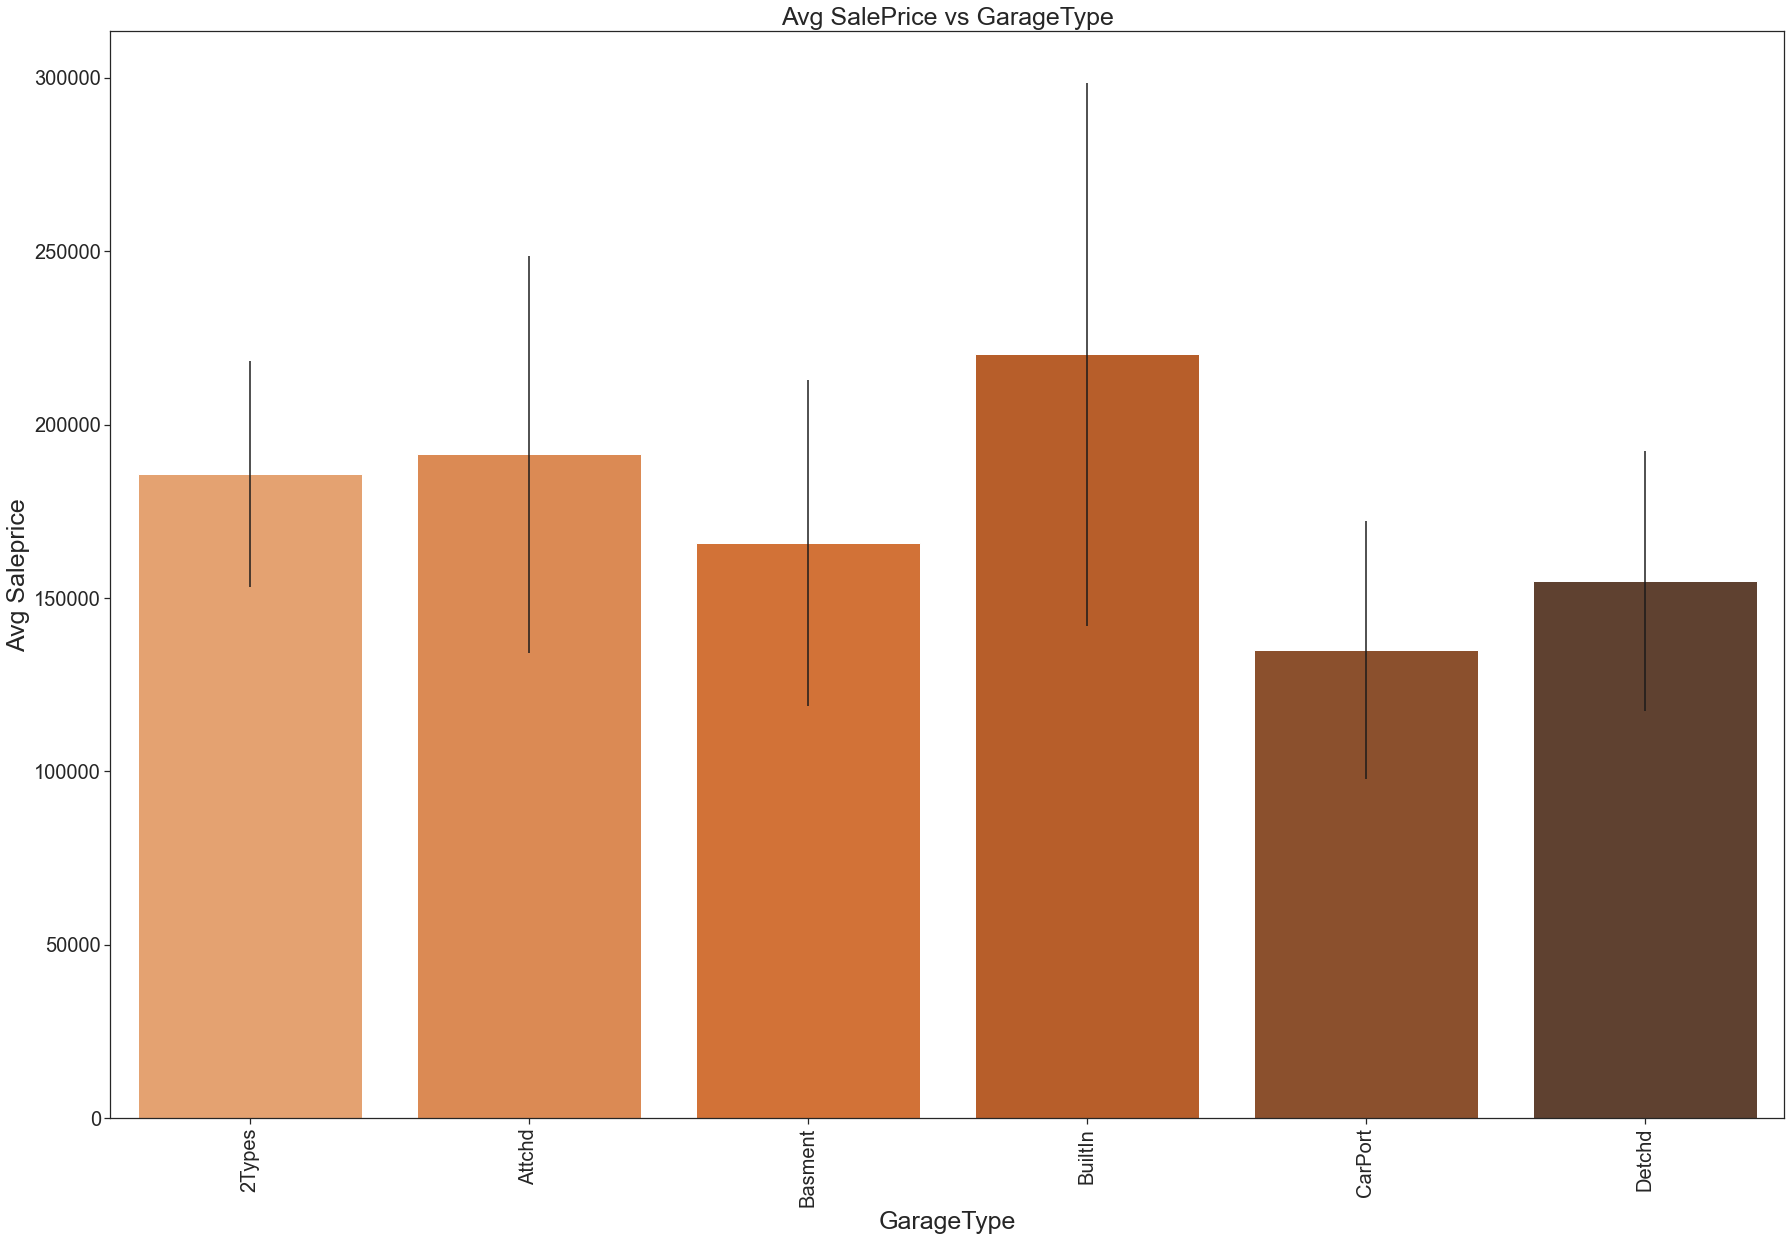

In [127]:
# 19. GarageType: Garage location
GarageType = (df_merged >> group_by(X.GarageType) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='GarageType', yerr=GarageType['stdev']*1, data=GarageType, capsize=3, palette='Oranges_d')
plt.xlabel('GarageType', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs GarageType', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Built-in garage type seems to be selling at higher price

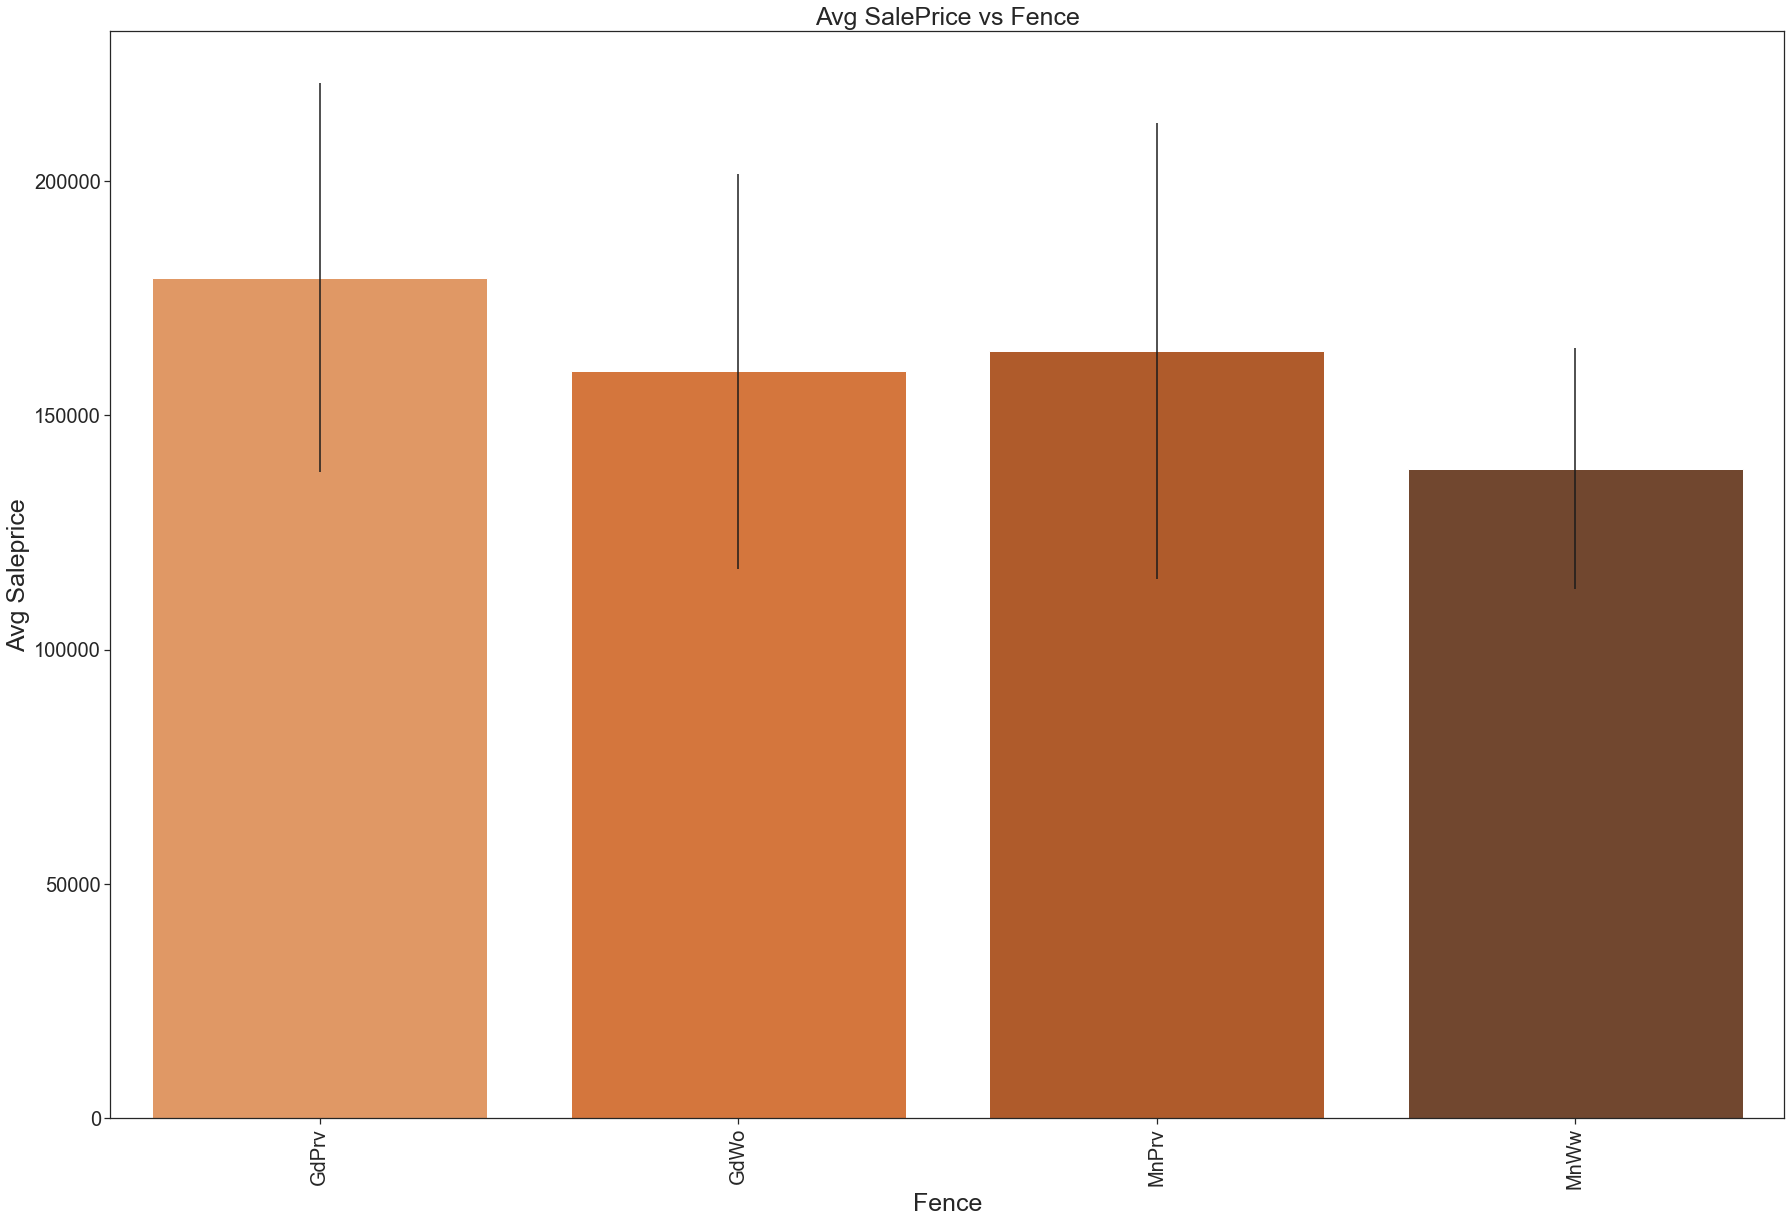

In [128]:
# 20 Fence: Fence quality
Fence = (df_merged >> group_by(X.Fence) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='Fence', yerr=Fence['stdev']*1, data=Fence, capsize=3, palette='Oranges_d')
plt.xlabel('Fence', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Fence', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

#  More the privacy , More the selling price

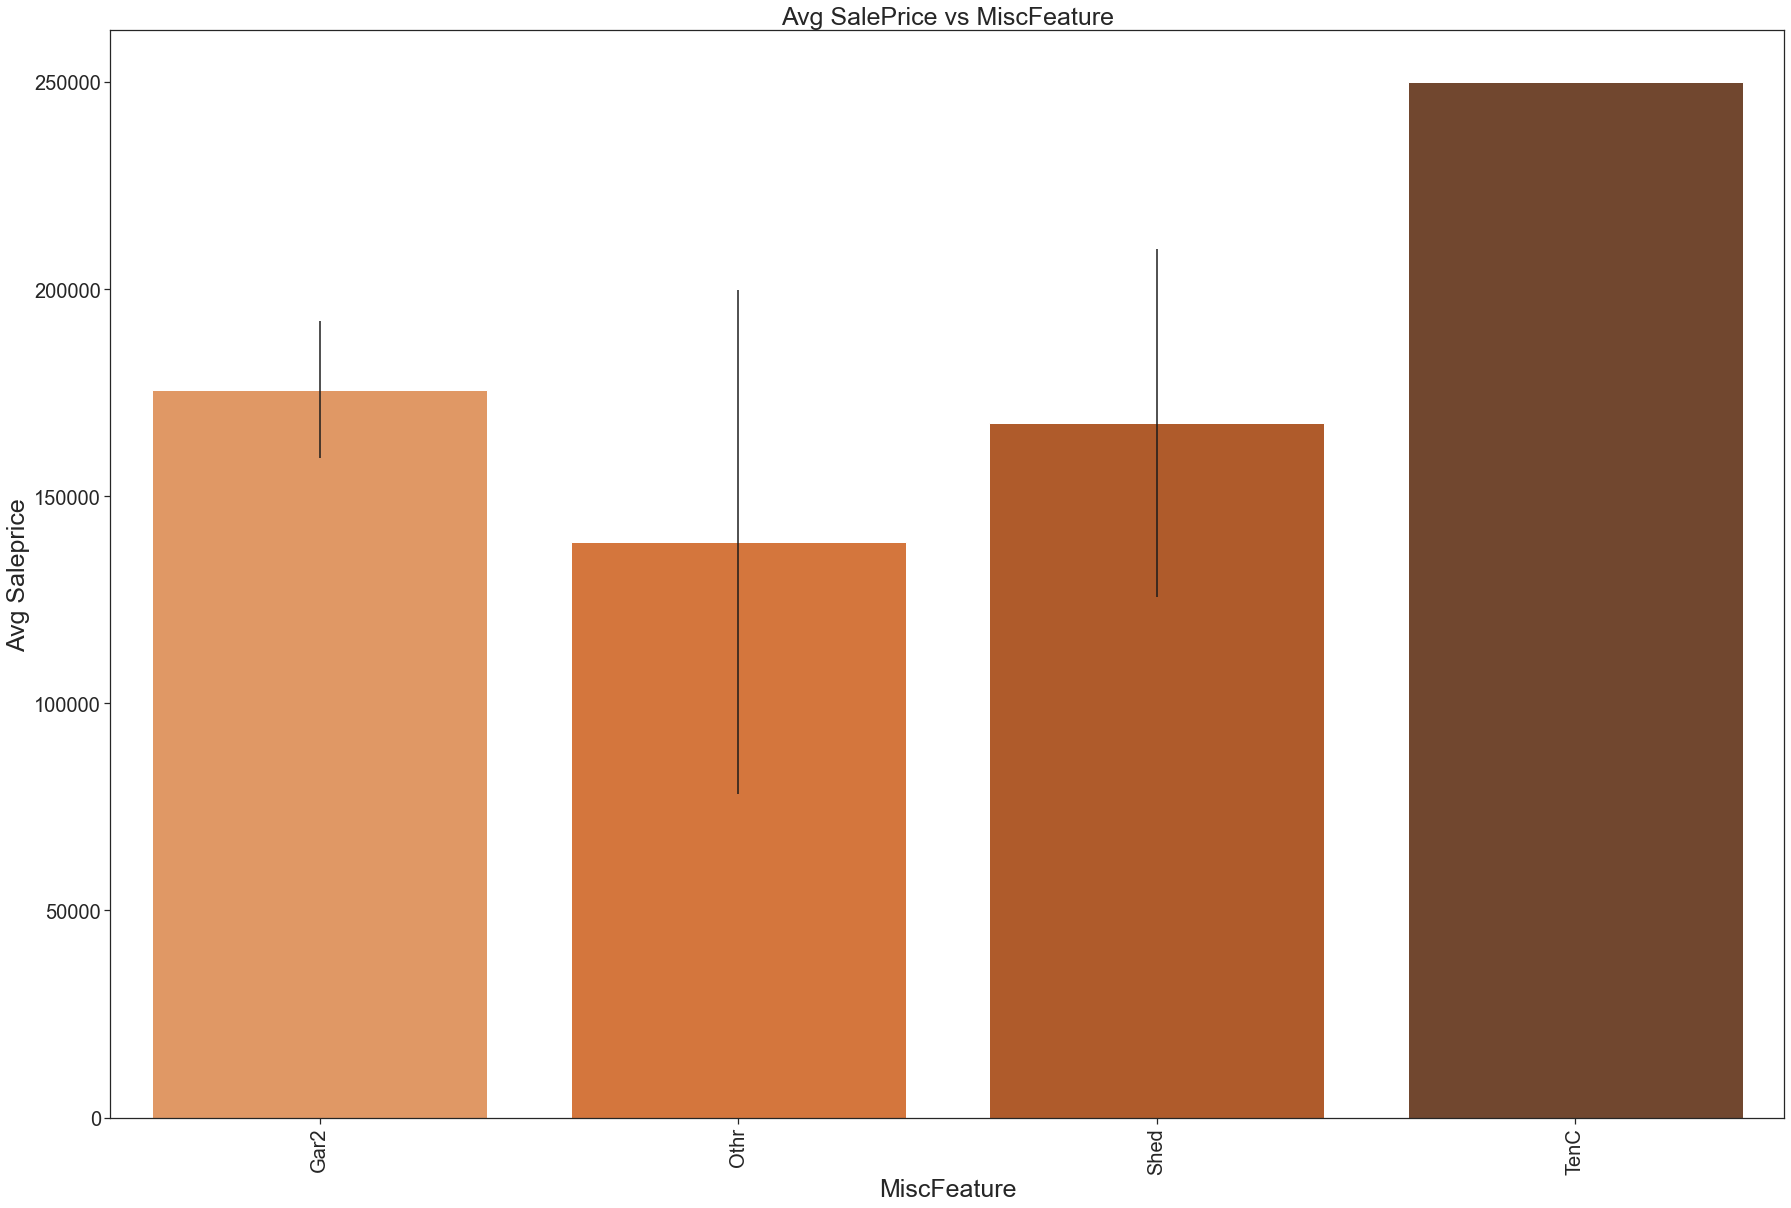

In [129]:
# 21 MiscFeature: Miscellaneous feature not covered in other categories
MiscFeature = (df_merged >> group_by(X.MiscFeature) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='MiscFeature', yerr=MiscFeature['stdev']*1, data=MiscFeature, capsize=3, palette='Oranges_d')
plt.xlabel('MiscFeature', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs MiscFeature', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# A house with tennis court sure sells at a higher price!! and also a house with a 2nd garage

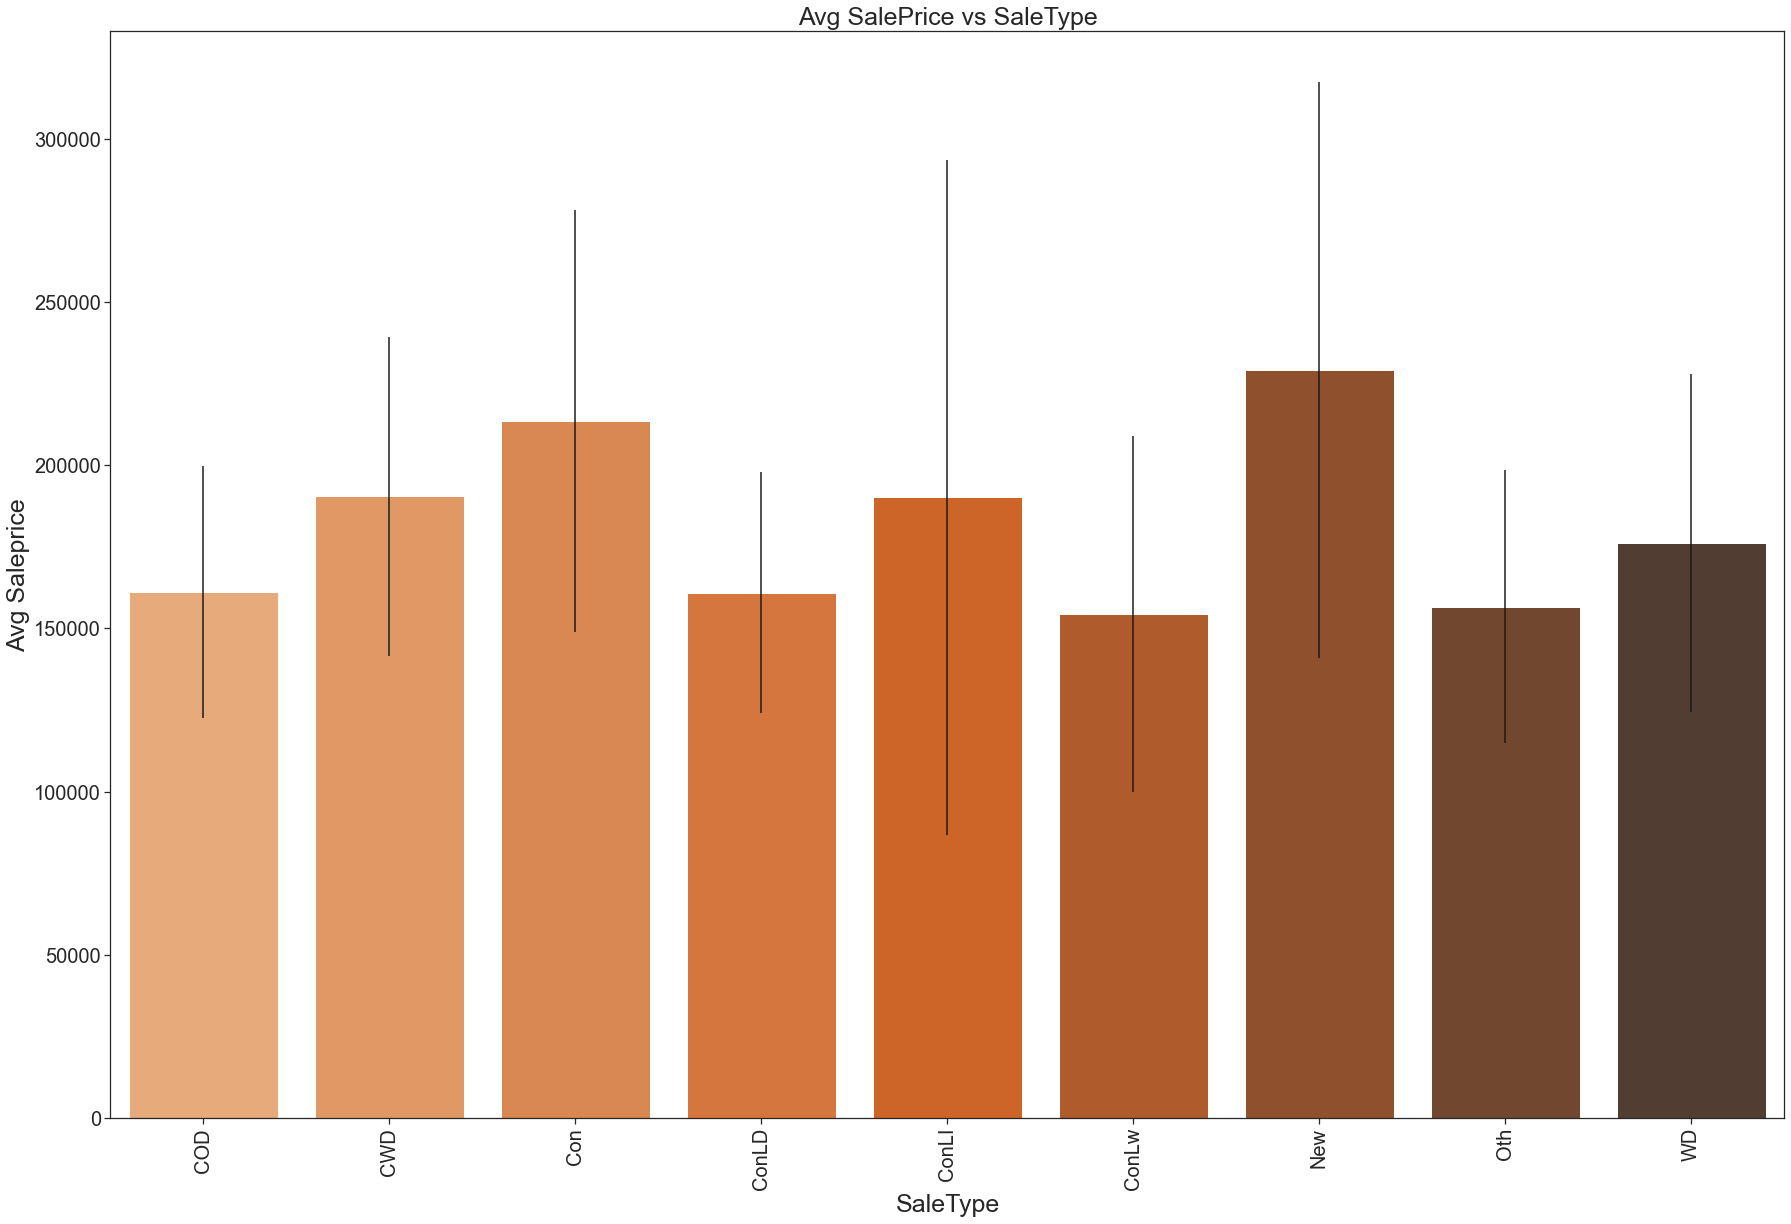

In [130]:
# 22 SaleType: Type of sale
SaleType = (df_merged >> group_by(X.SaleType) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='SaleType', yerr=SaleType['stdev']*1, data=SaleType, capsize=3, palette='Oranges_d')
plt.xlabel('SaleType', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs SaleType', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# A new house and a contract saletype house seems to sell at higher price, Contract Low Interest seems to be having highest standard deviation.

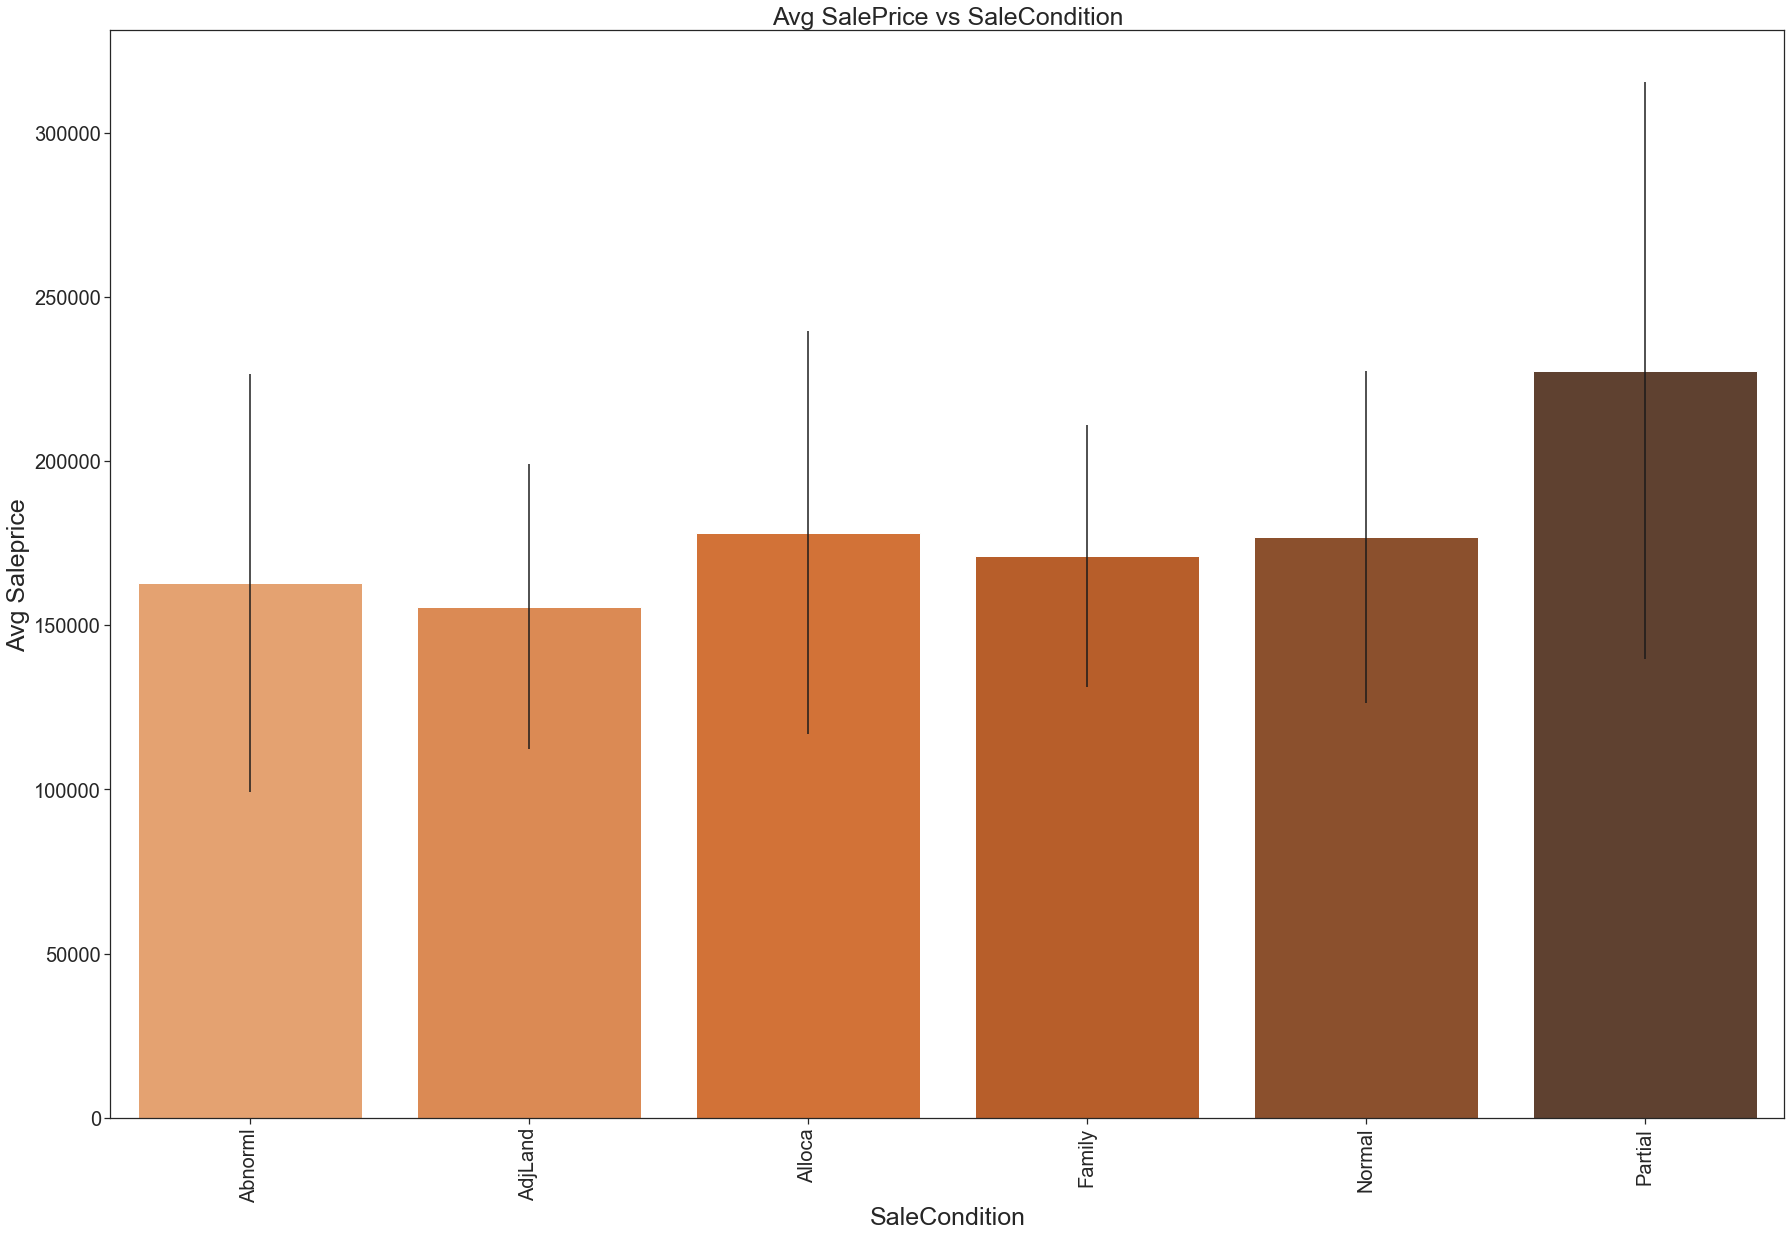

In [131]:
# 23 SaleCondition: Condition of sale
SaleCondition = (df_merged >> group_by(X.SaleCondition) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='SaleCondition', yerr=SaleCondition['stdev']*1, data=SaleCondition, capsize=3, palette='Oranges_d')
plt.xlabel('SaleCondition', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs SaleCondition', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# New homes obviously seems to sell at higher prices(Partial), while adjoining land purchase seems to sell at lower prices as some common places have joint ownership with neighbours and not full ownership to buyer.

# Categorical Features - Ordinal Features

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

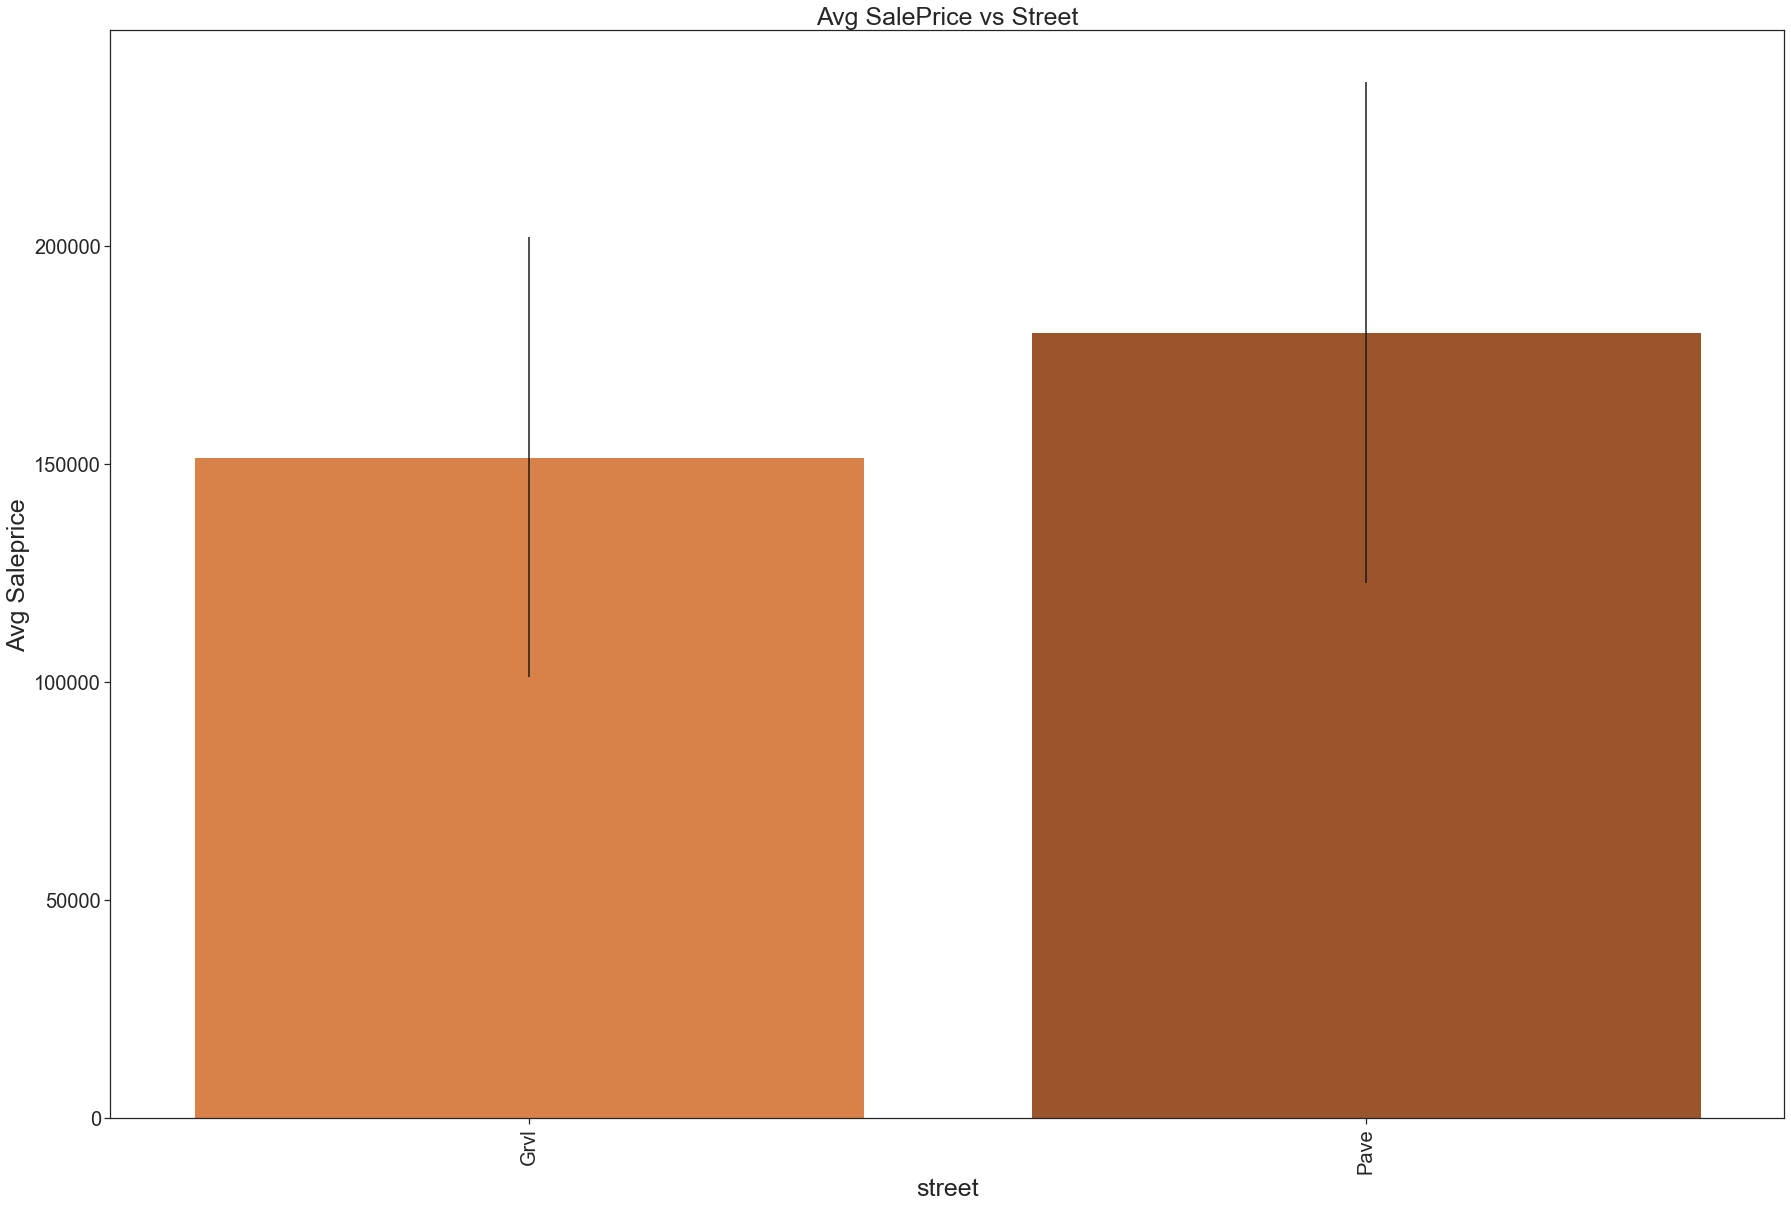

In [132]:
# 1 Street: Type of road access to property
street = (df_merged >> group_by(X.Street) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='Street', yerr=street['stdev']*1, data=street, capsize=3, palette='Oranges_d')
plt.xlabel('street', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Street', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Obviously Paved roads seem to sell at higher price

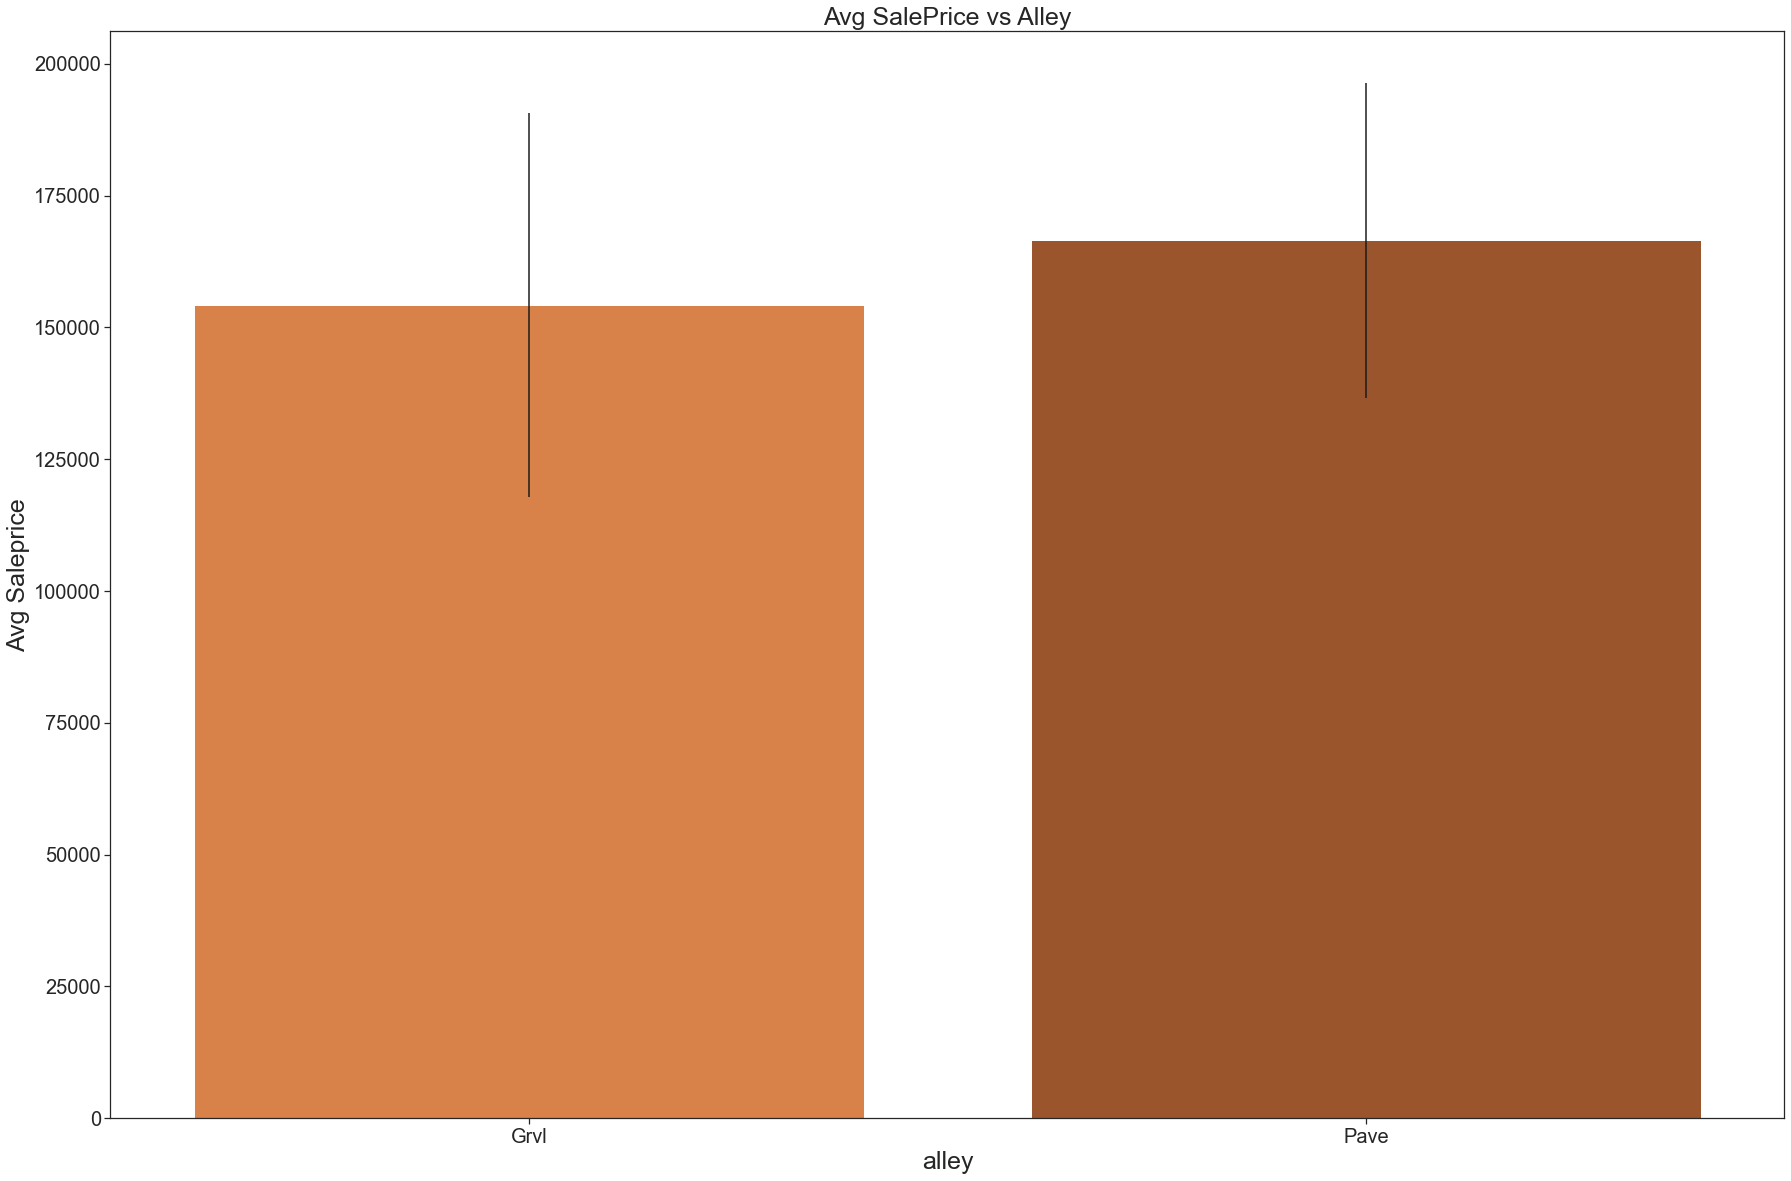

In [133]:
# 2. Alley: Type of alley access to property
alley = (df_merged >> group_by(X.Alley) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=alley['Alley'], y=alley['avg'],yerr=alley['stdev']*1, palette='Oranges_d')
plt.xlabel('alley', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Alley', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Paved alley sells at higher price

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

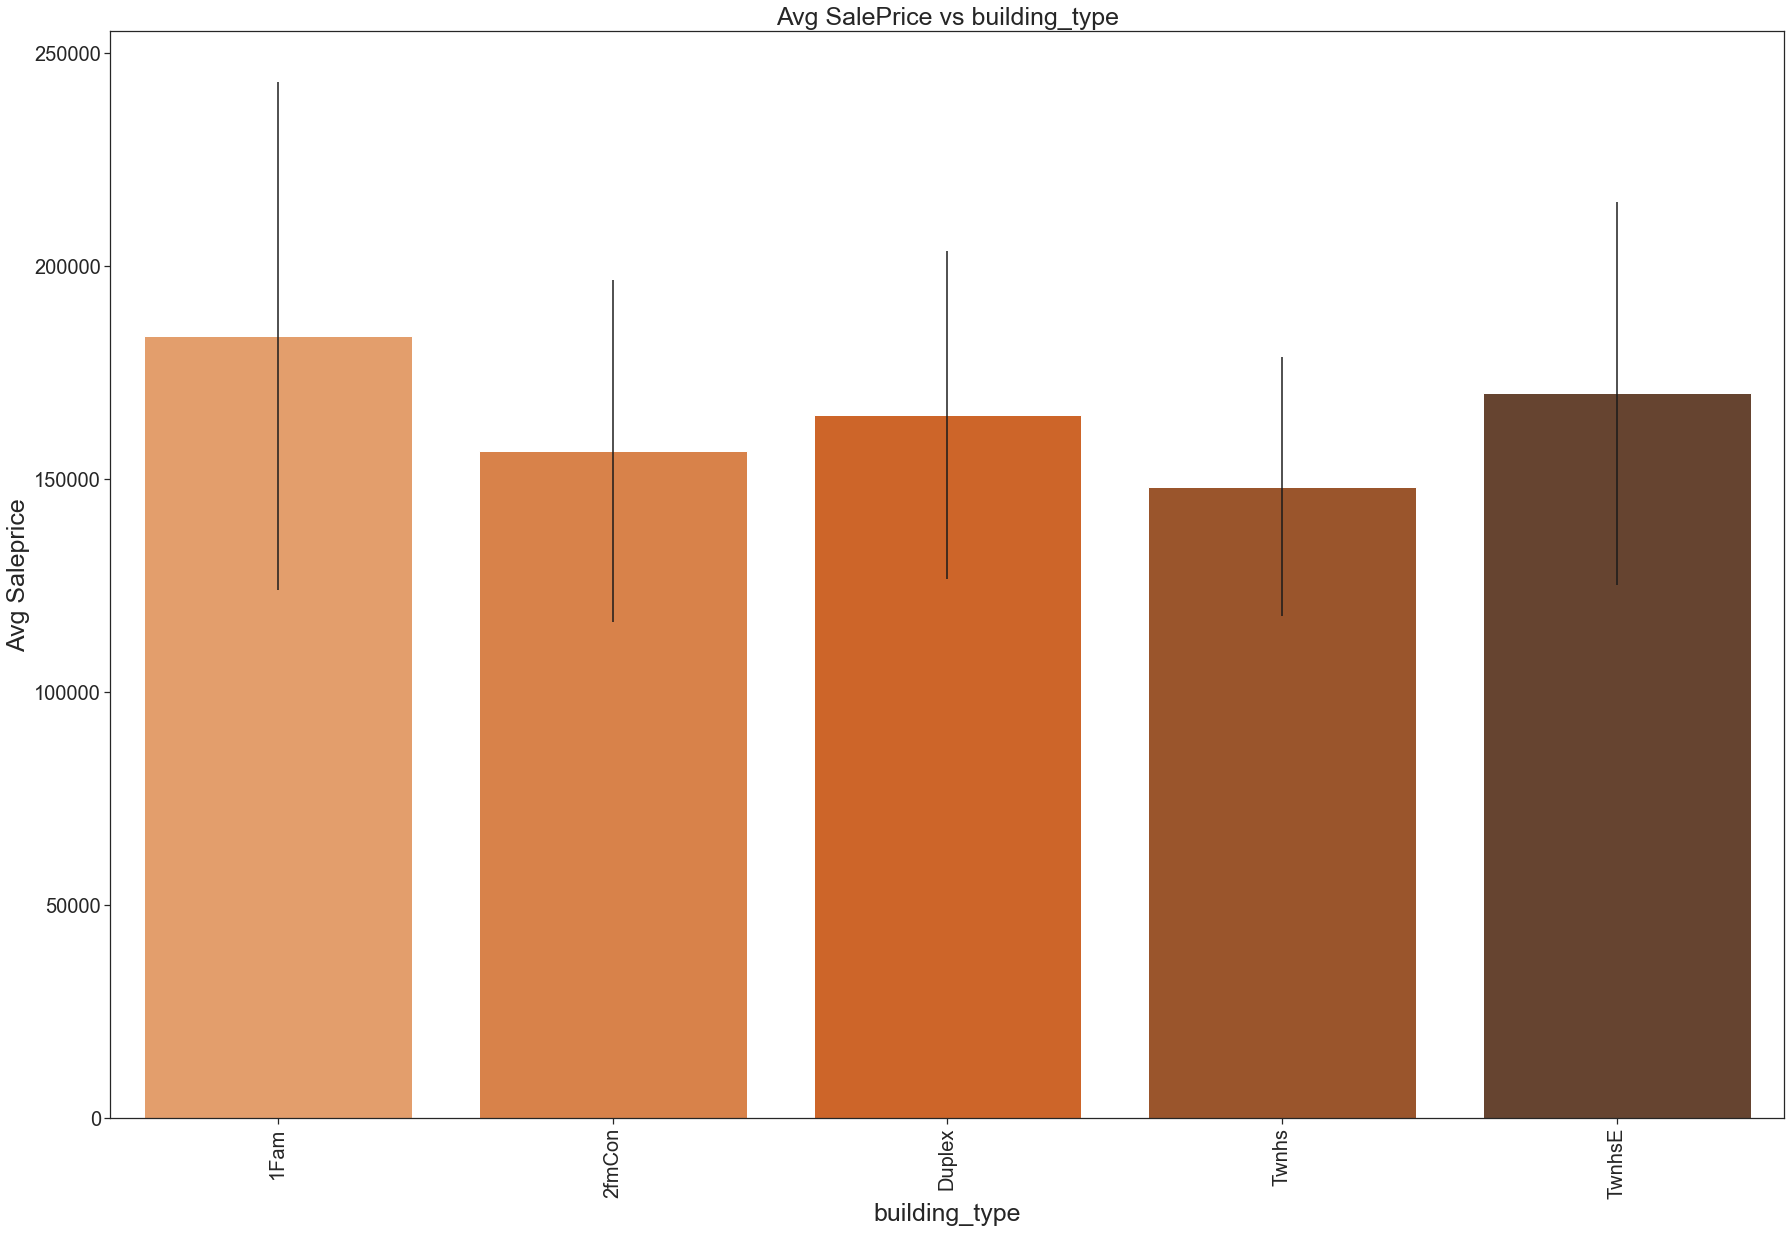

In [134]:
# 3. BldgType: Type of dwelling 
building_type = (df_merged >> group_by(X.BldgType) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=building_type['BldgType'], y=building_type['avg'],yerr=building_type['stdev']*1, palette='Oranges_d')
plt.xlabel('building_type', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs building_type', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Single family detached sells at highest price followed by TownHouse End Unit

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

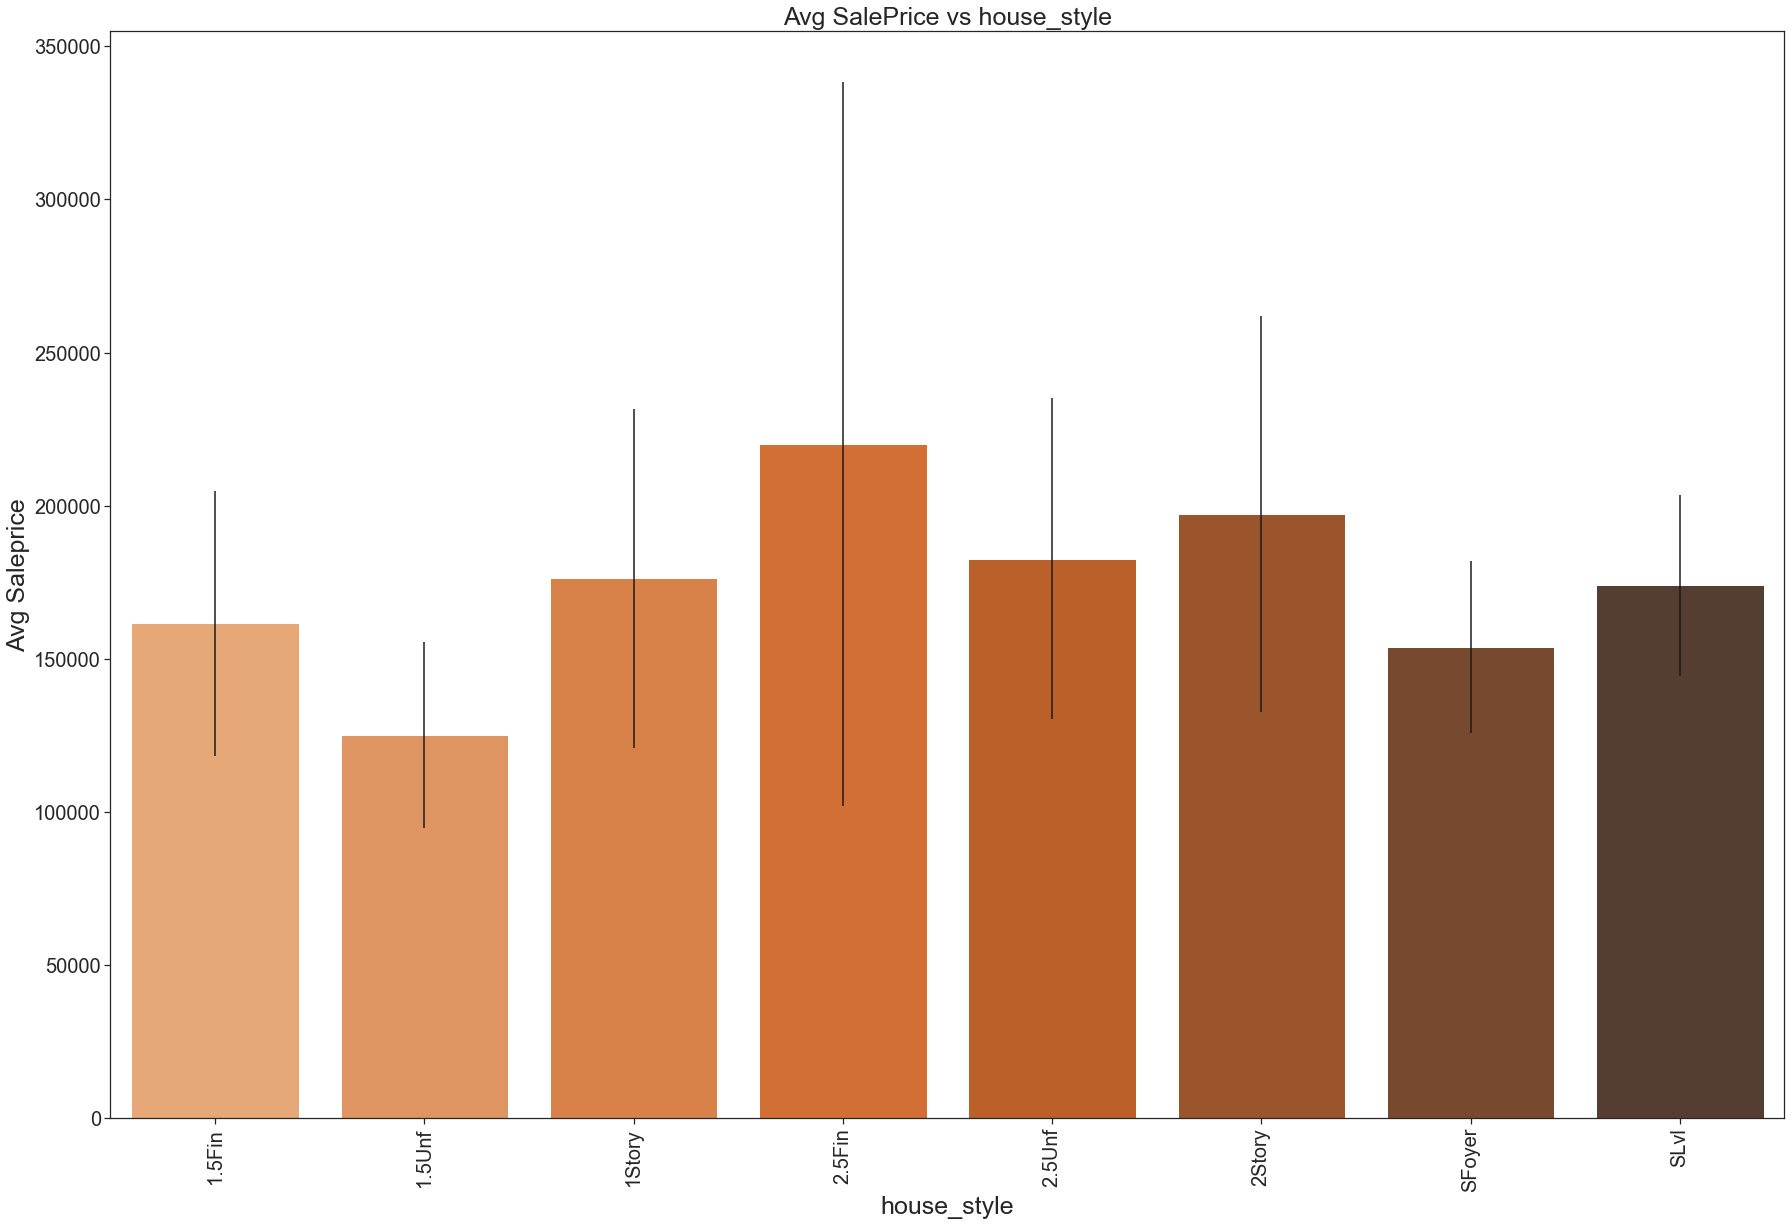

In [135]:
# 4. HouseStyle: Style of dwelling 
house_style = (df_merged >> group_by(X.HouseStyle) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(x=house_style['HouseStyle'], y=house_style['avg'],yerr=house_style['stdev']*1, palette='Oranges_d')
plt.xlabel('house_style', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs house_style', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Obviously greater the number of finished floors, greater the selling price.

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

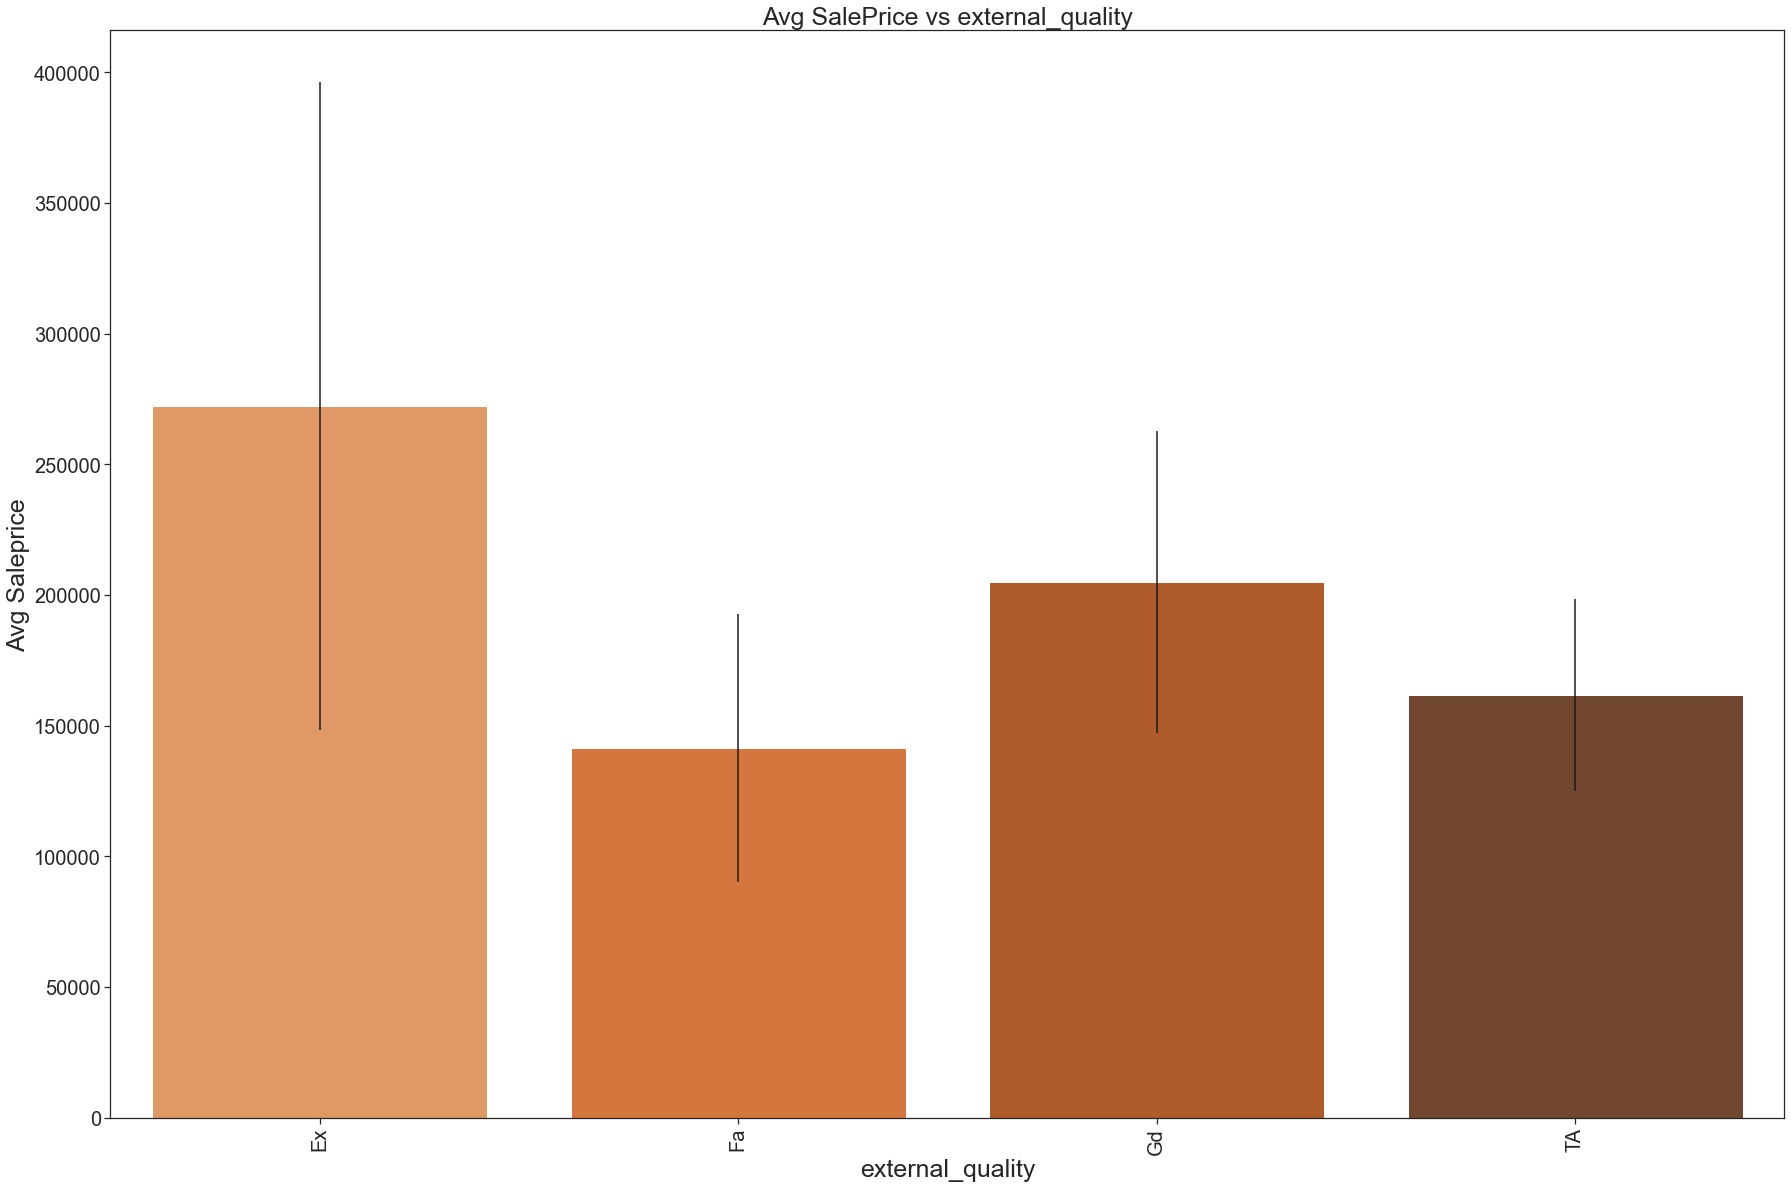

In [136]:
# 5 ExterQual: Evaluates the quality of the material on the exterior 

external_quality = (df_merged >> group_by(X.ExterQual) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='ExterQual', yerr=external_quality['stdev']*1, data=external_quality, capsize=3, palette='Oranges_d')
plt.xlabel('external_quality', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs external_quality', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Obvious relationship, the better the external quality of build material, the greater the selling price

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

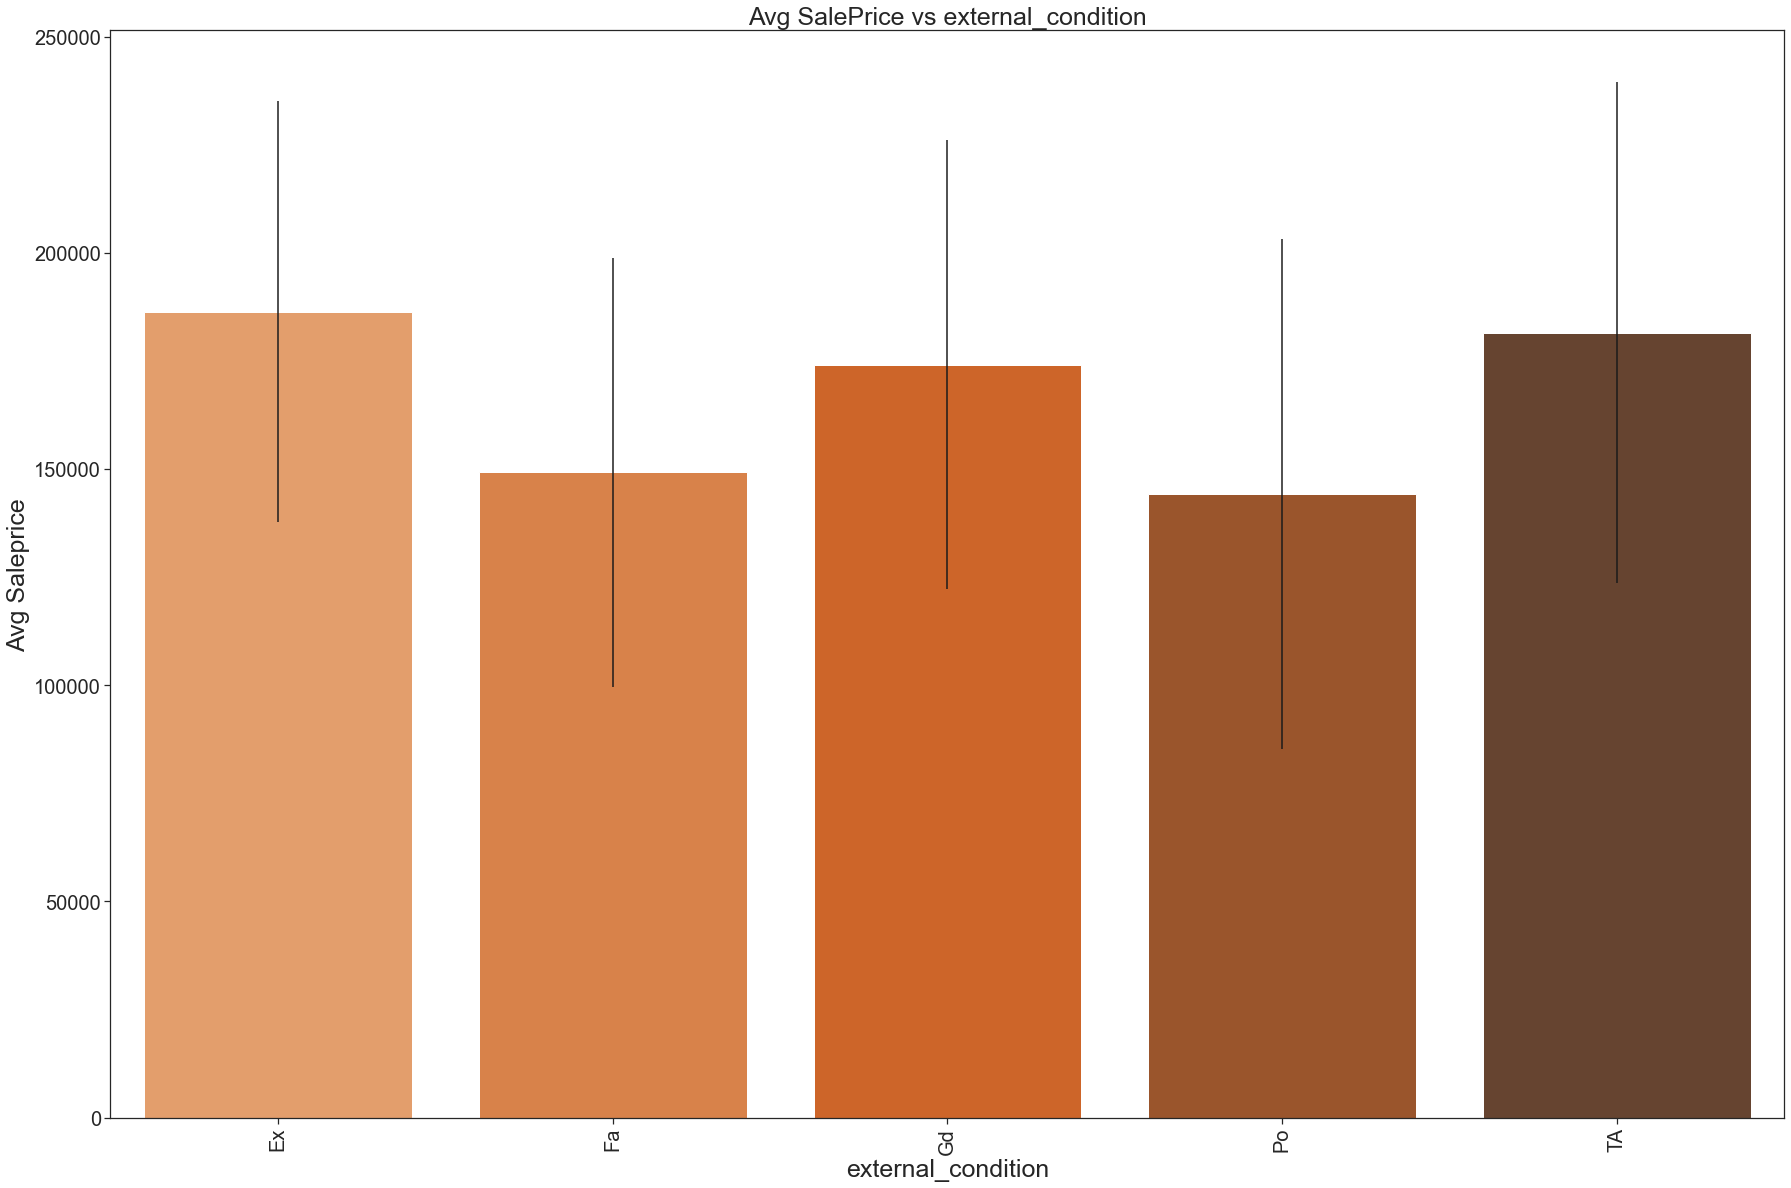

In [137]:
# 6 ExterCond: Evaluates the present condition of the material on the exterior 
external_condition = (df_merged >> group_by(X.ExterCond) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='ExterCond', yerr=external_condition['stdev']*1, data=external_condition, capsize=3, palette='Oranges_d')
plt.xlabel('external_condition', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs external_condition', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# An exception observed average condition of material seems to be selling at higher price than good condition of material!! Something Fishy!

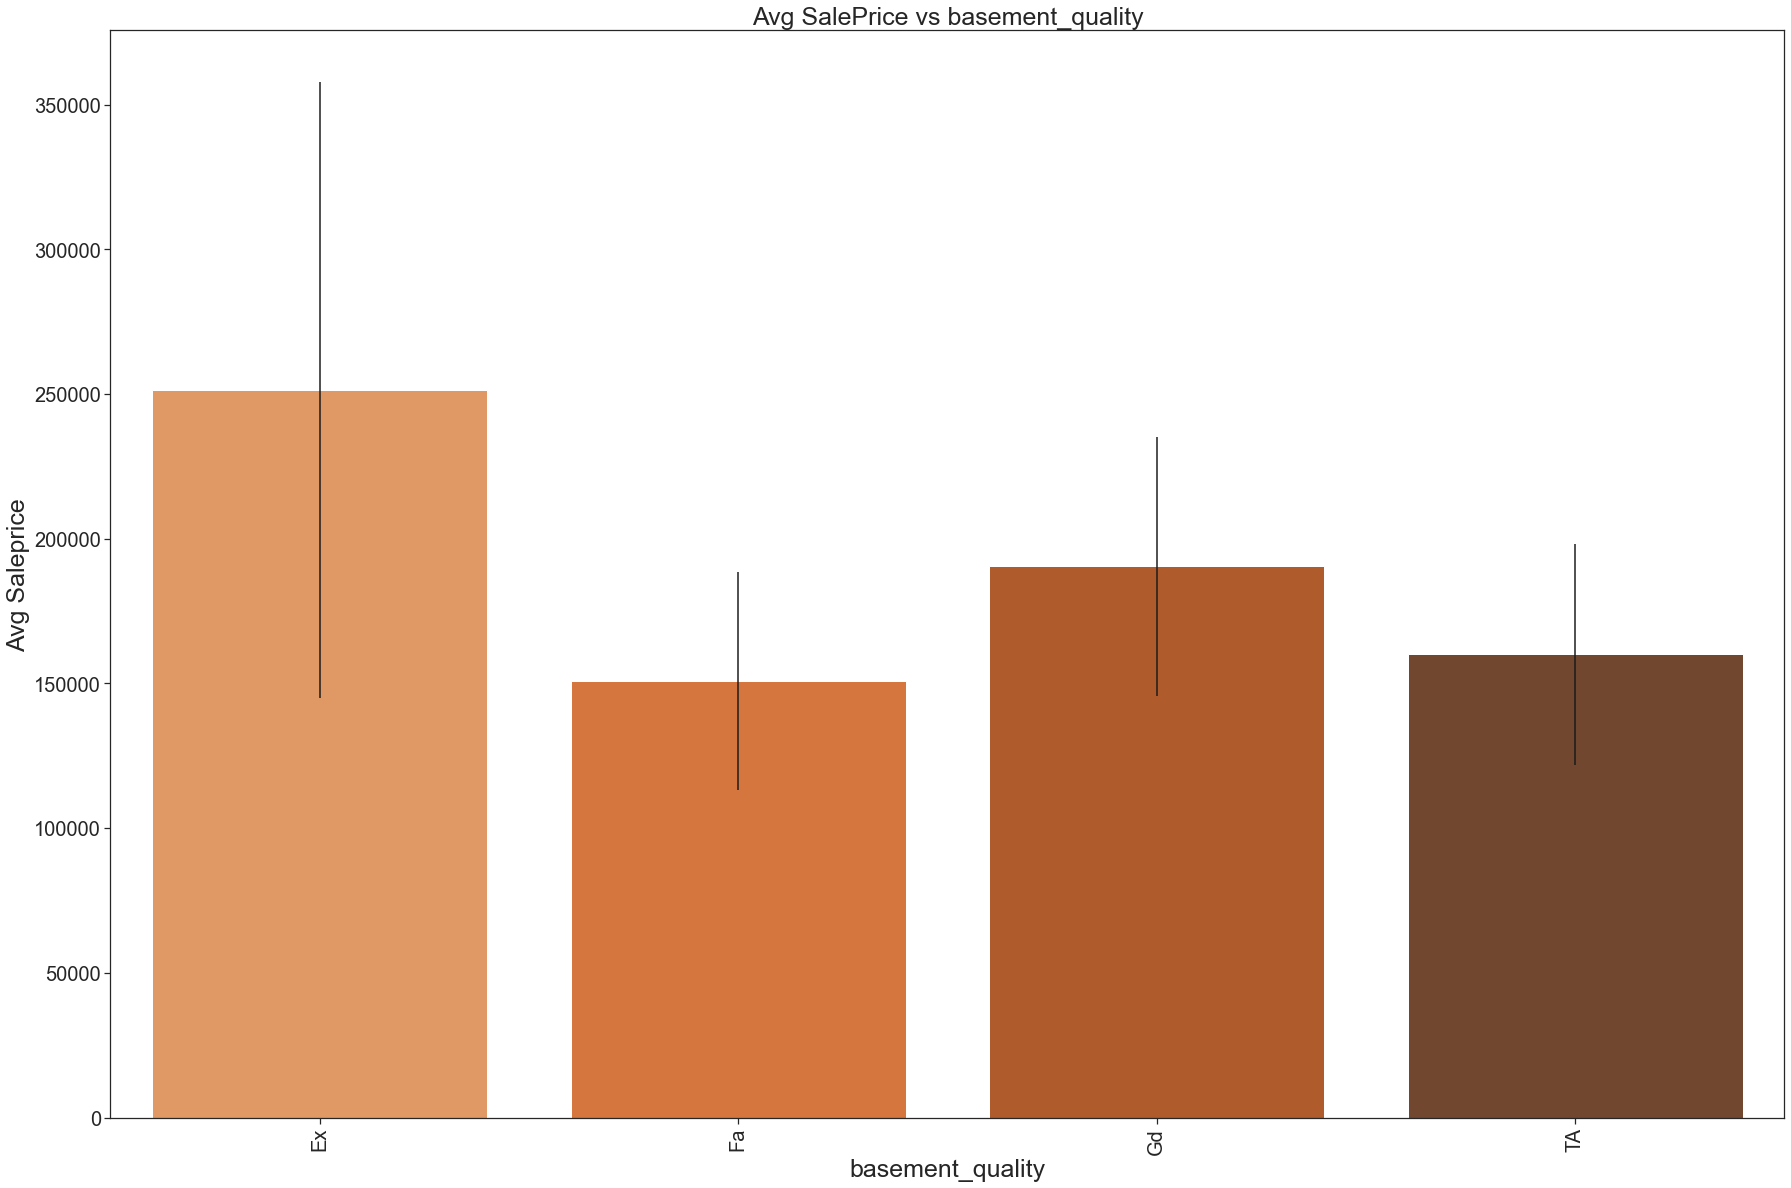

In [138]:
# 7 BsmtQual: Evaluates the height of the basement
basement_quality = (df_merged >> group_by(X.BsmtQual) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='BsmtQual', yerr=basement_quality['stdev']*1, data=basement_quality, capsize=3, palette='Oranges_d')
plt.xlabel('basement_quality', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs basement_quality', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


# Positive Correlation

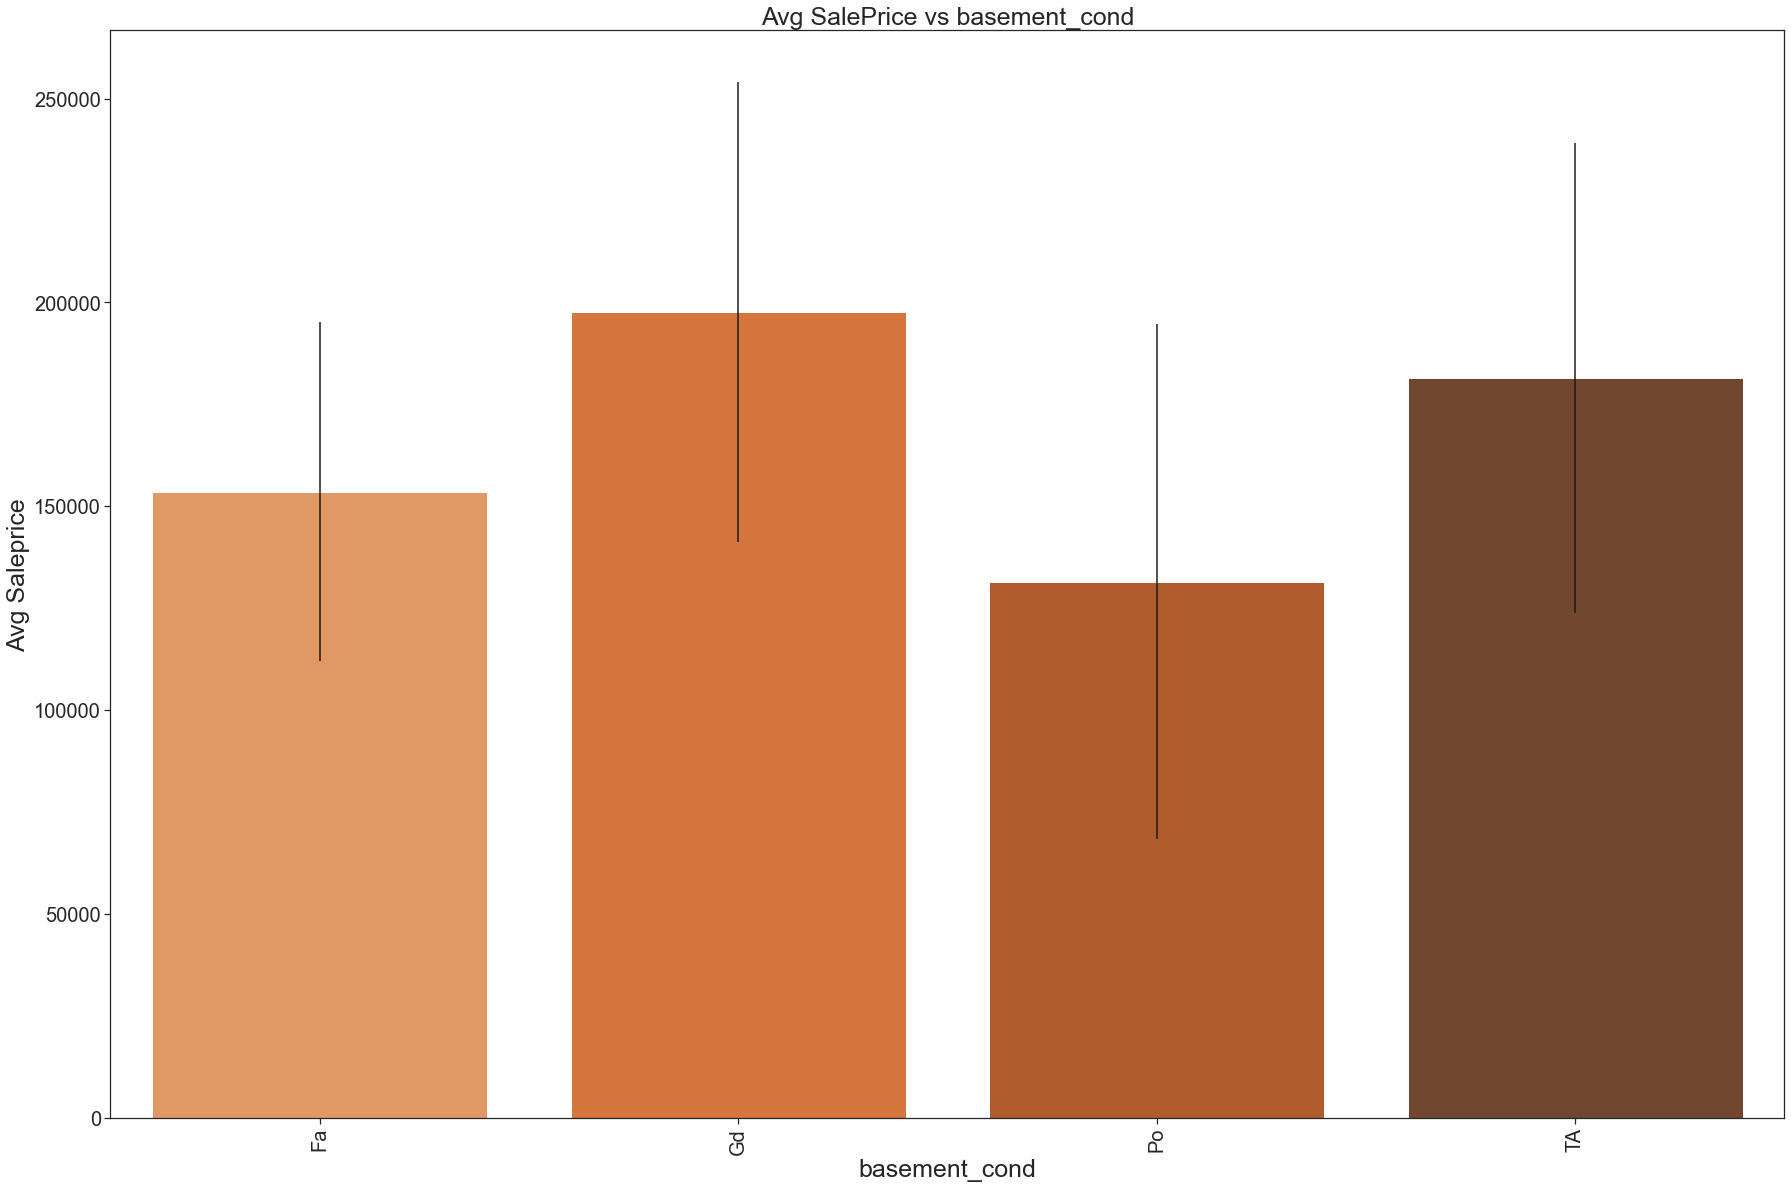

In [139]:
# 8. BsmtCond: Evaluates the general condition of the basement ******
basement_cond = (df_merged >> group_by(X.BsmtCond) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='BsmtCond', yerr=basement_cond['stdev']*1, data=basement_cond, capsize=3, palette='Oranges_d')
plt.xlabel('basement_cond', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs basement_cond', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Seems like certain features are missing(excellent) or there is no building with basement cin excellent condition

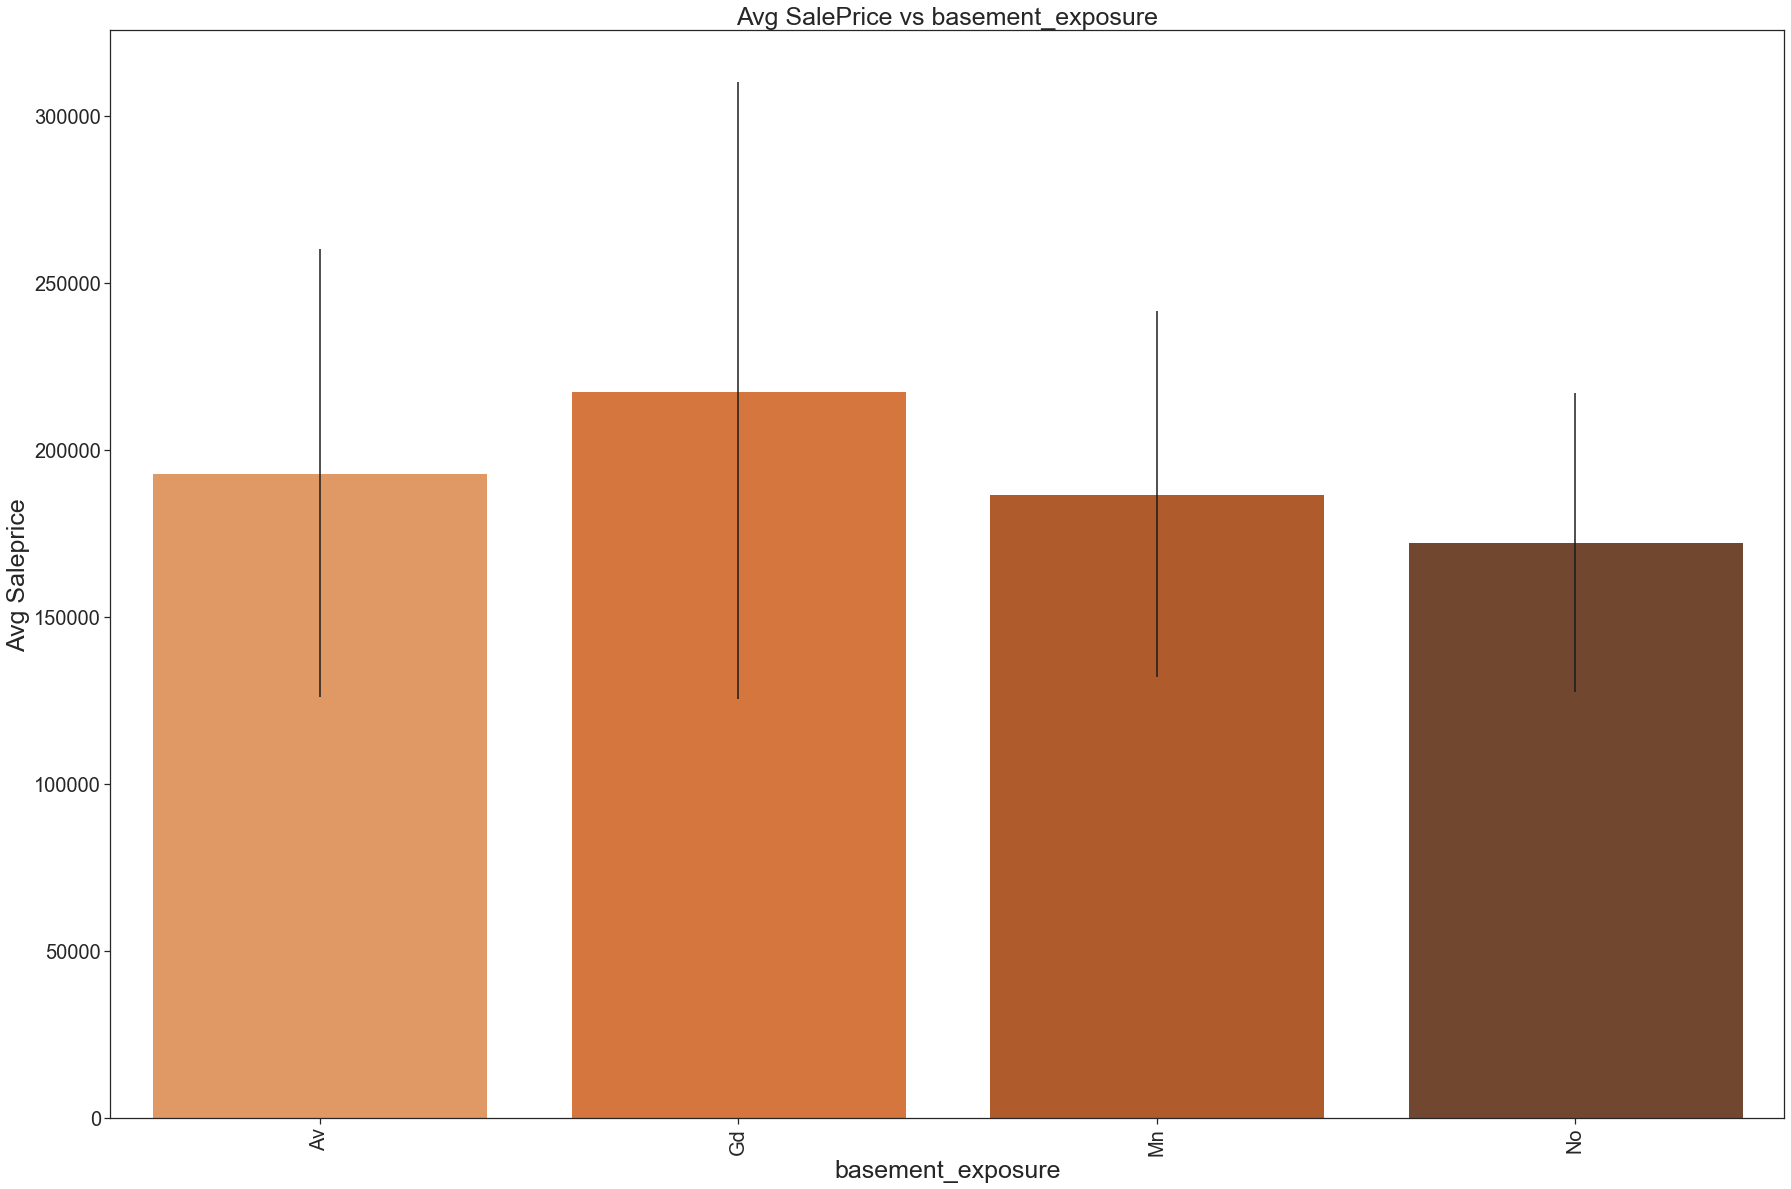

In [140]:
# 9. BsmtExposure: Refers to walkout or garden level walls
basement_exposure = (df_merged >> group_by(X.BsmtExposure) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='BsmtExposure', yerr=basement_exposure['stdev']*1, data=basement_exposure, capsize=3, palette='Oranges_d')
plt.xlabel('basement_exposure', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs basement_exposure', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Positive Correlation

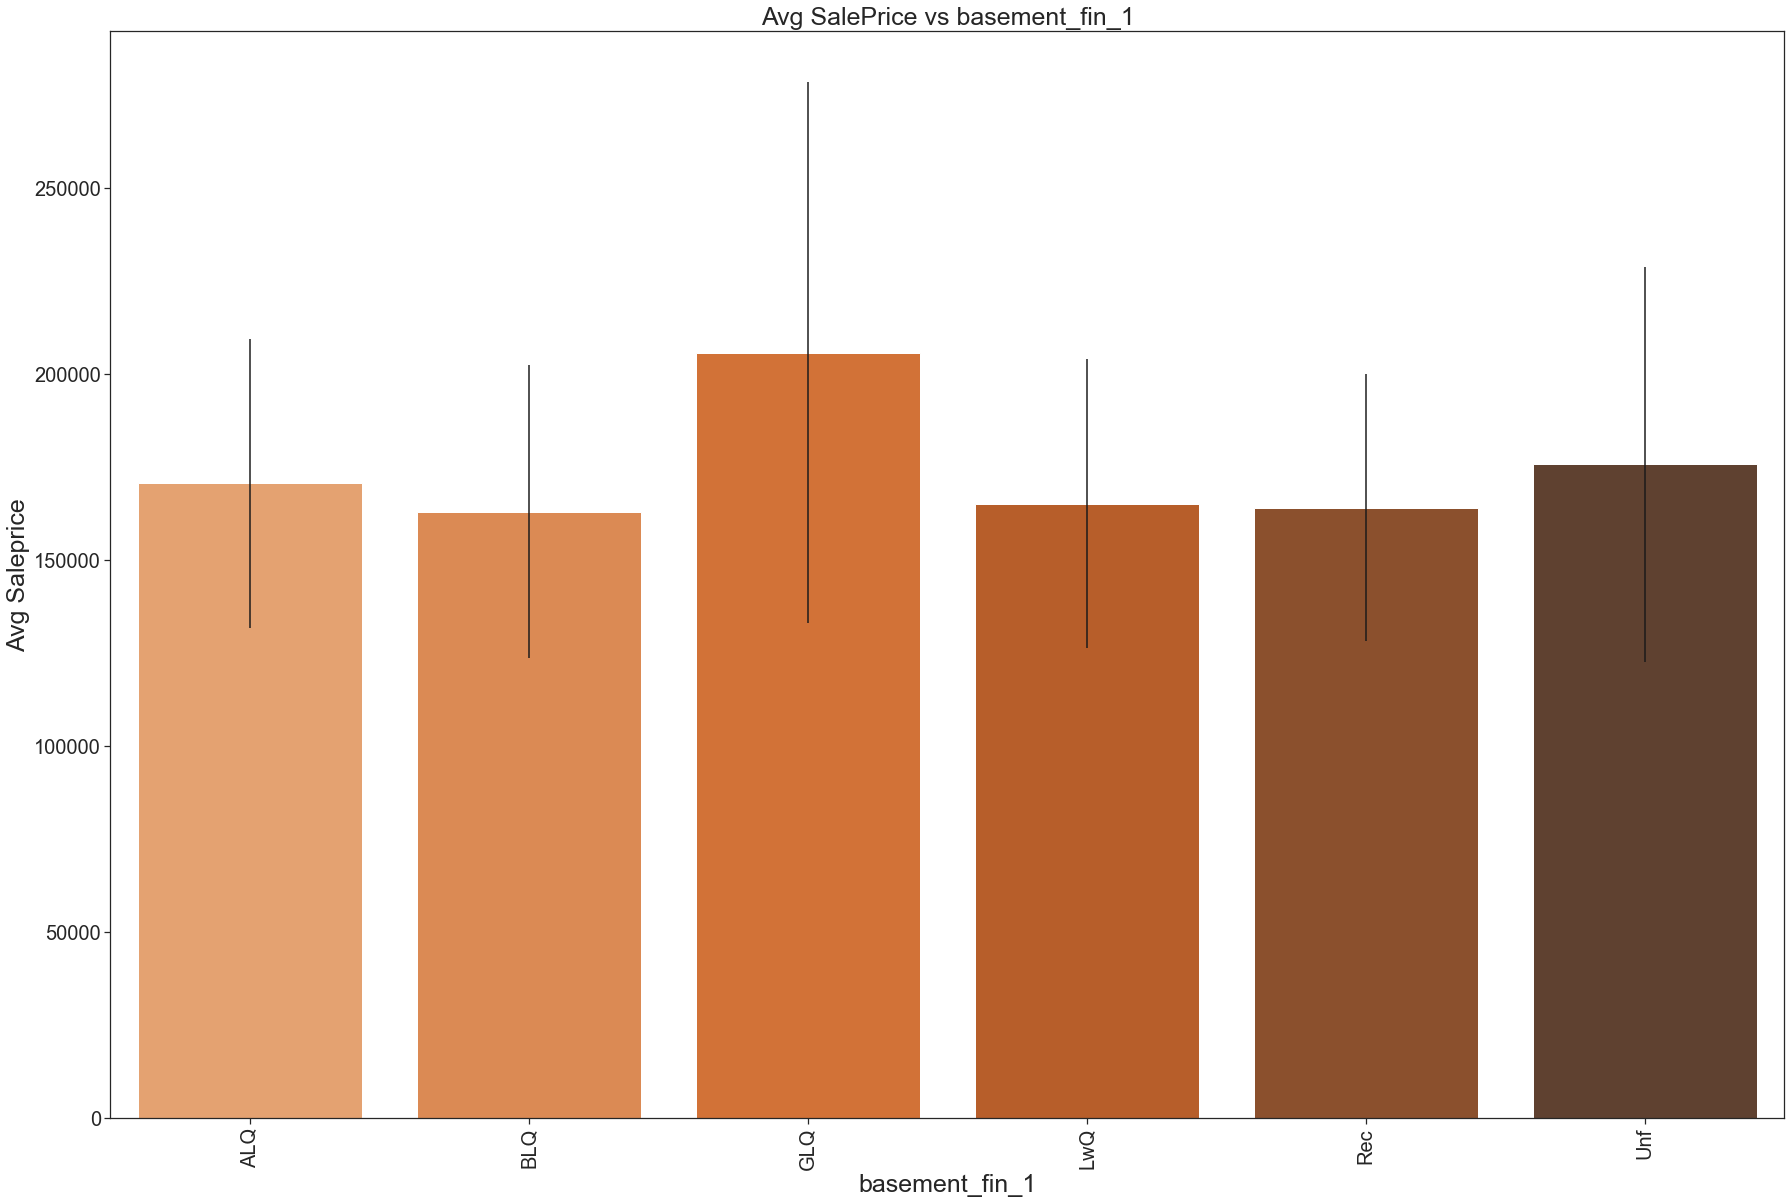

In [141]:
# 10 BsmtFinType1: Rating of basement finished area
basement_fin_1 = (df_merged >> group_by(X.BsmtFinType1) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='BsmtFinType1', yerr=basement_fin_1['stdev']*1, data=basement_fin_1, capsize=3, palette='Oranges_d')
plt.xlabel('basement_fin_1', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs basement_fin_1', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Unfinished basement seems to be of higher price than others(except good living quarters)

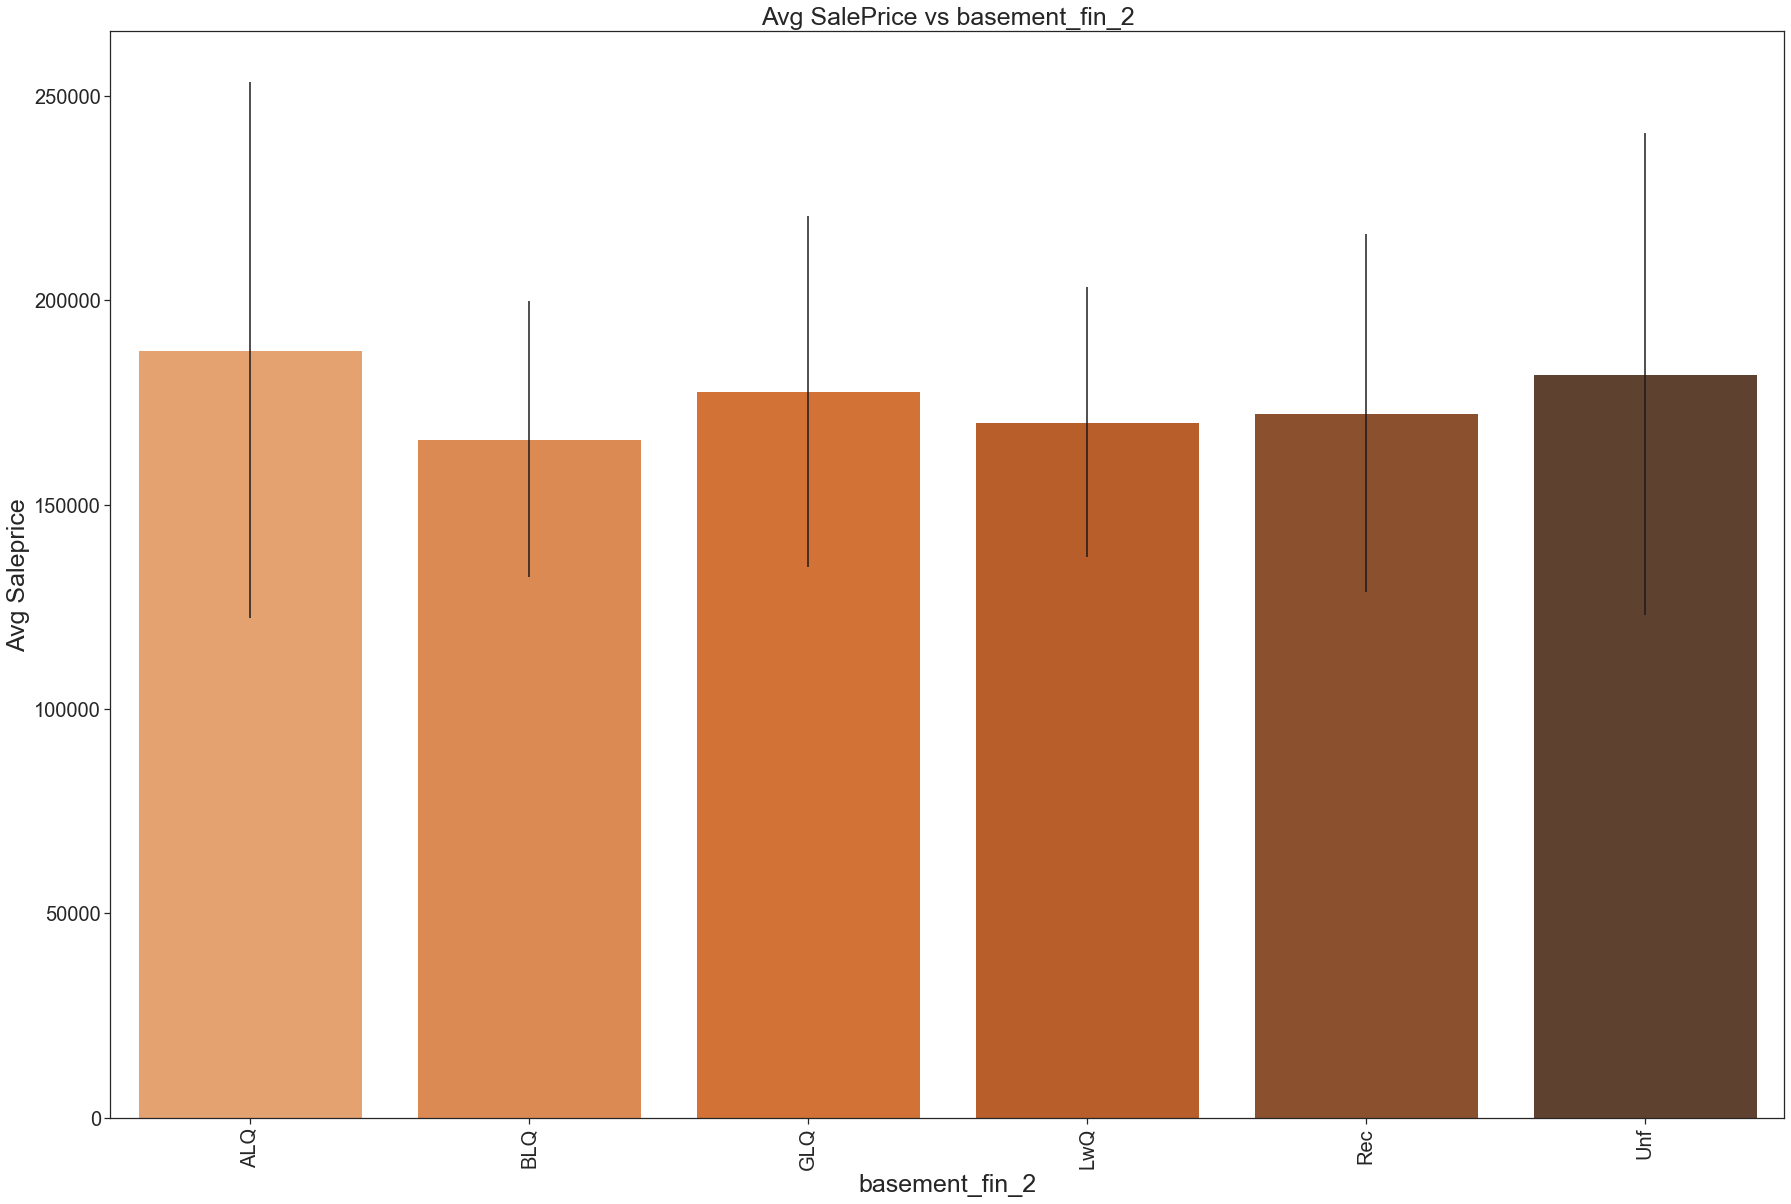

In [142]:
# 11. BsmtFinType2: Rating of basement finished area (if multiple types)
basement_fin_2 = (df_merged >> group_by(X.BsmtFinType2) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='BsmtFinType2', yerr=basement_fin_2['stdev']*1, data=basement_fin_2, capsize=3, palette='Oranges_d')
plt.xlabel('basement_fin_2', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs basement_fin_2', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Average is selling at higher price than good, but it's stdev is also highest, points at high fluctuation in this data

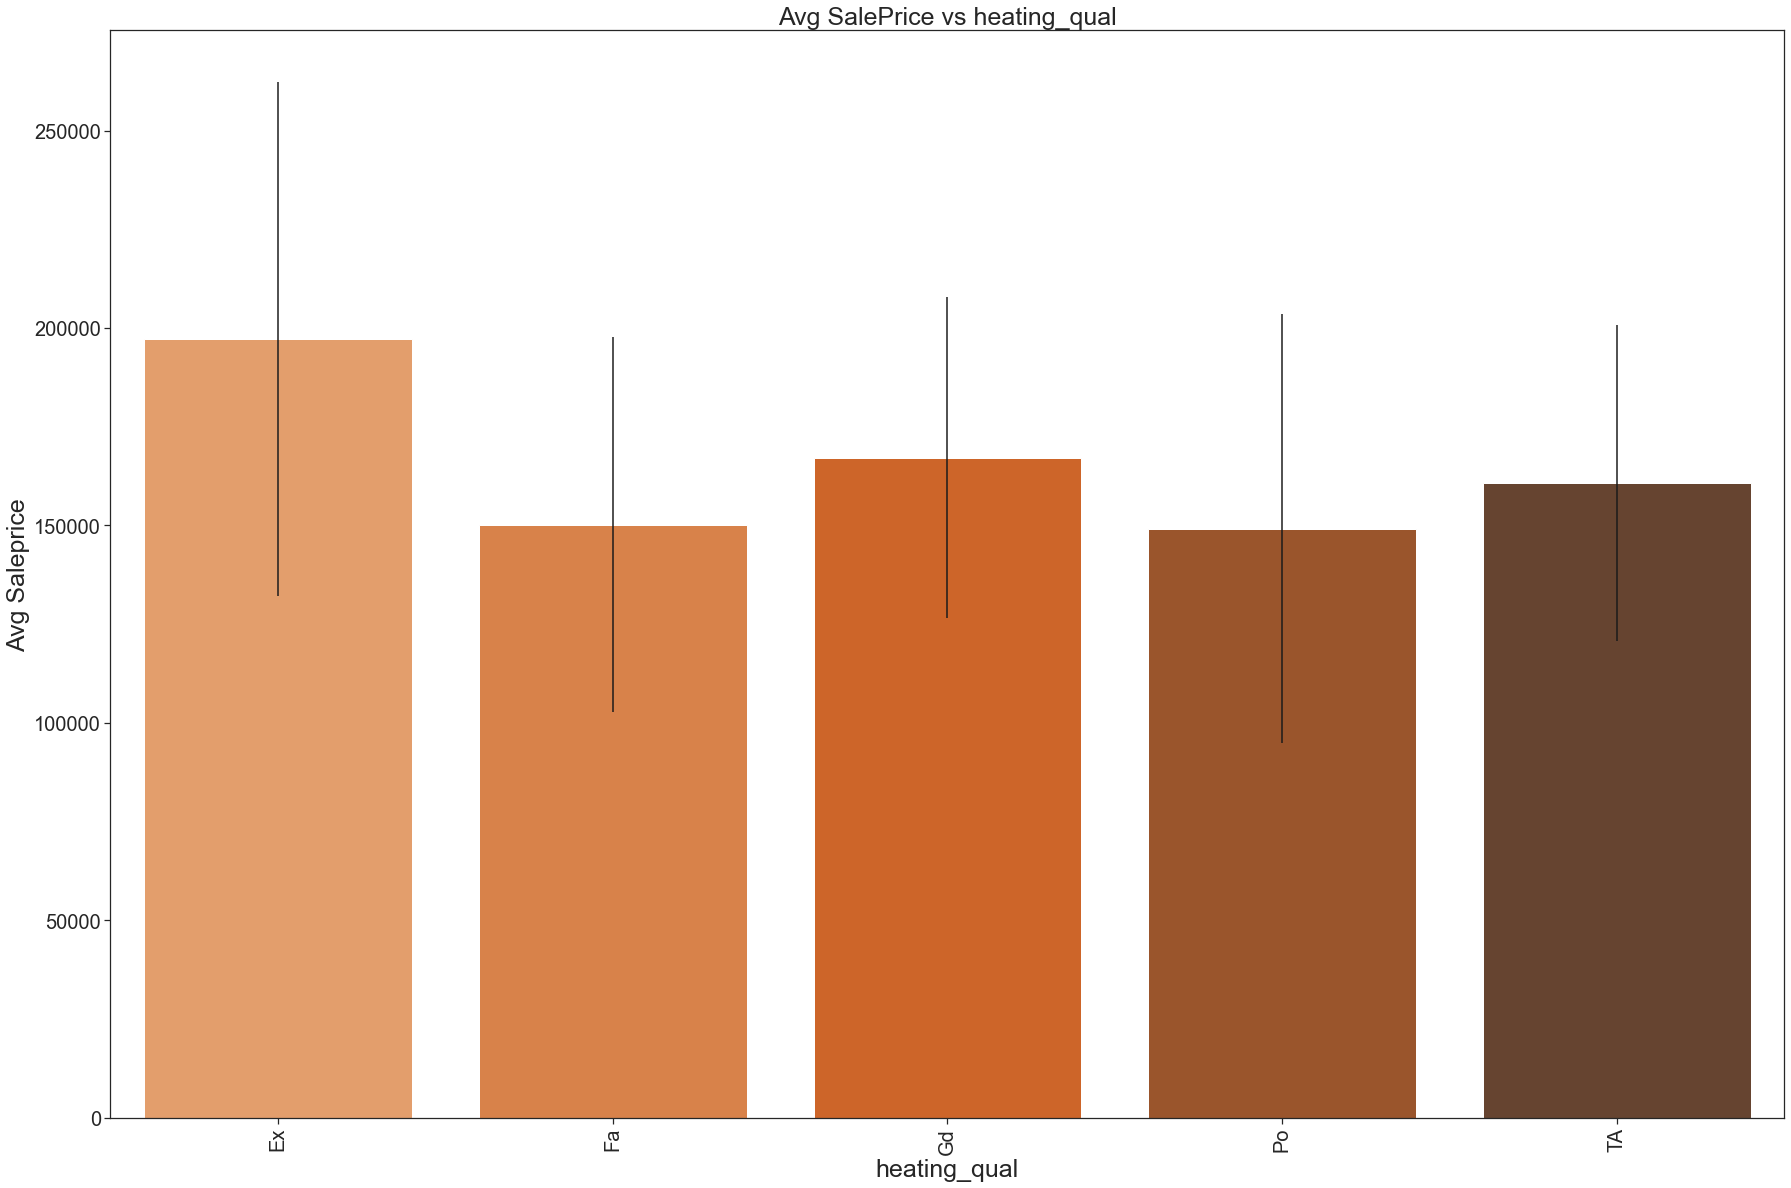

In [143]:
# 12 HeatingQC: Heating quality and condition
heating_qual = (df_merged >> group_by(X.HeatingQC) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='HeatingQC', yerr=heating_qual['stdev']*1, data=heating_qual, capsize=3, palette='Oranges_d')
plt.xlabel('heating_qual', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs heating_qual', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Positive Correlation

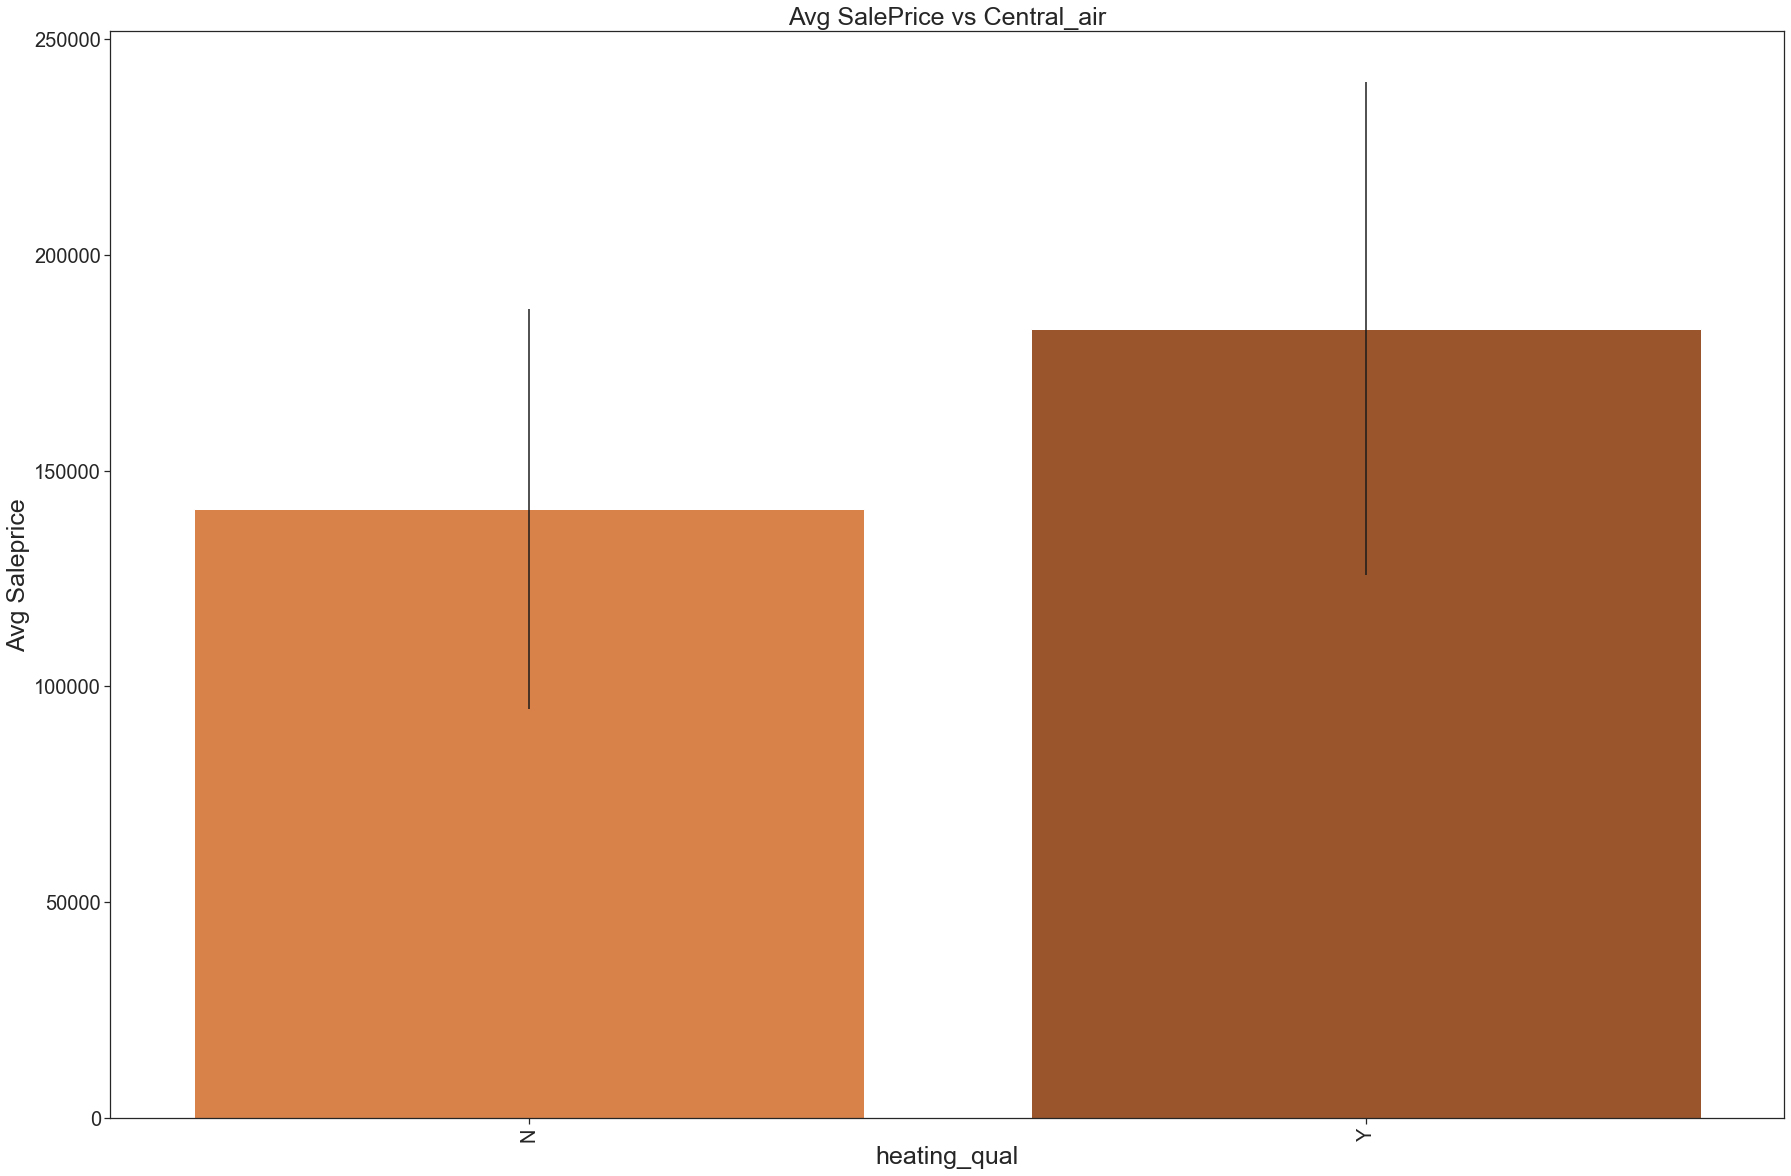

In [144]:
# 13 CentralAir: Central air conditioning
Central_air = (df_merged >> group_by(X.CentralAir) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='CentralAir', yerr=Central_air['stdev']*1, data=Central_air, capsize=3, palette='Oranges_d')
plt.xlabel('heating_qual', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Central_air', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

In [152]:
Central_air

CentralAir            avg         stdev
0          N  141121.867347  46316.573187
1          Y  182855.088873  57088.211527

In [156]:
average_selling_price = df_merged['SalePrice'].mean()
print(f'average selling price is:{average_selling_price}')
avg_sellprice_no_ac = Central_air['avg'][0].mean()
print(f'avg selling price without ac : {avg_sellprice_no_ac}')
avg_dec_sellprice = ((average_selling_price-avg_sellprice_no_ac)/average_selling_price)*100
print(f'percentage decrease in selling price for no ac: {avg_dec_sellprice}')

average selling price is:180052.85817060637
avg selling price without ac : 141121.8673469388
percentage decrease in selling price for no ac: 21.62197880068036


In [149]:
average_selling_price

180052.85817060637

# Presence of central air conditioning definitely increases the average selling price
# A house without centralised AC sells at only 22% of the average selling price of houses in general<br>
# So a seller who is planning to sell his house might as well fit a centralisde AC if possible before selling in order to make sure he gets a good price<br>
# Calculate the cost of implementing the centralised AC and see if it justifies the selling price difference<br>

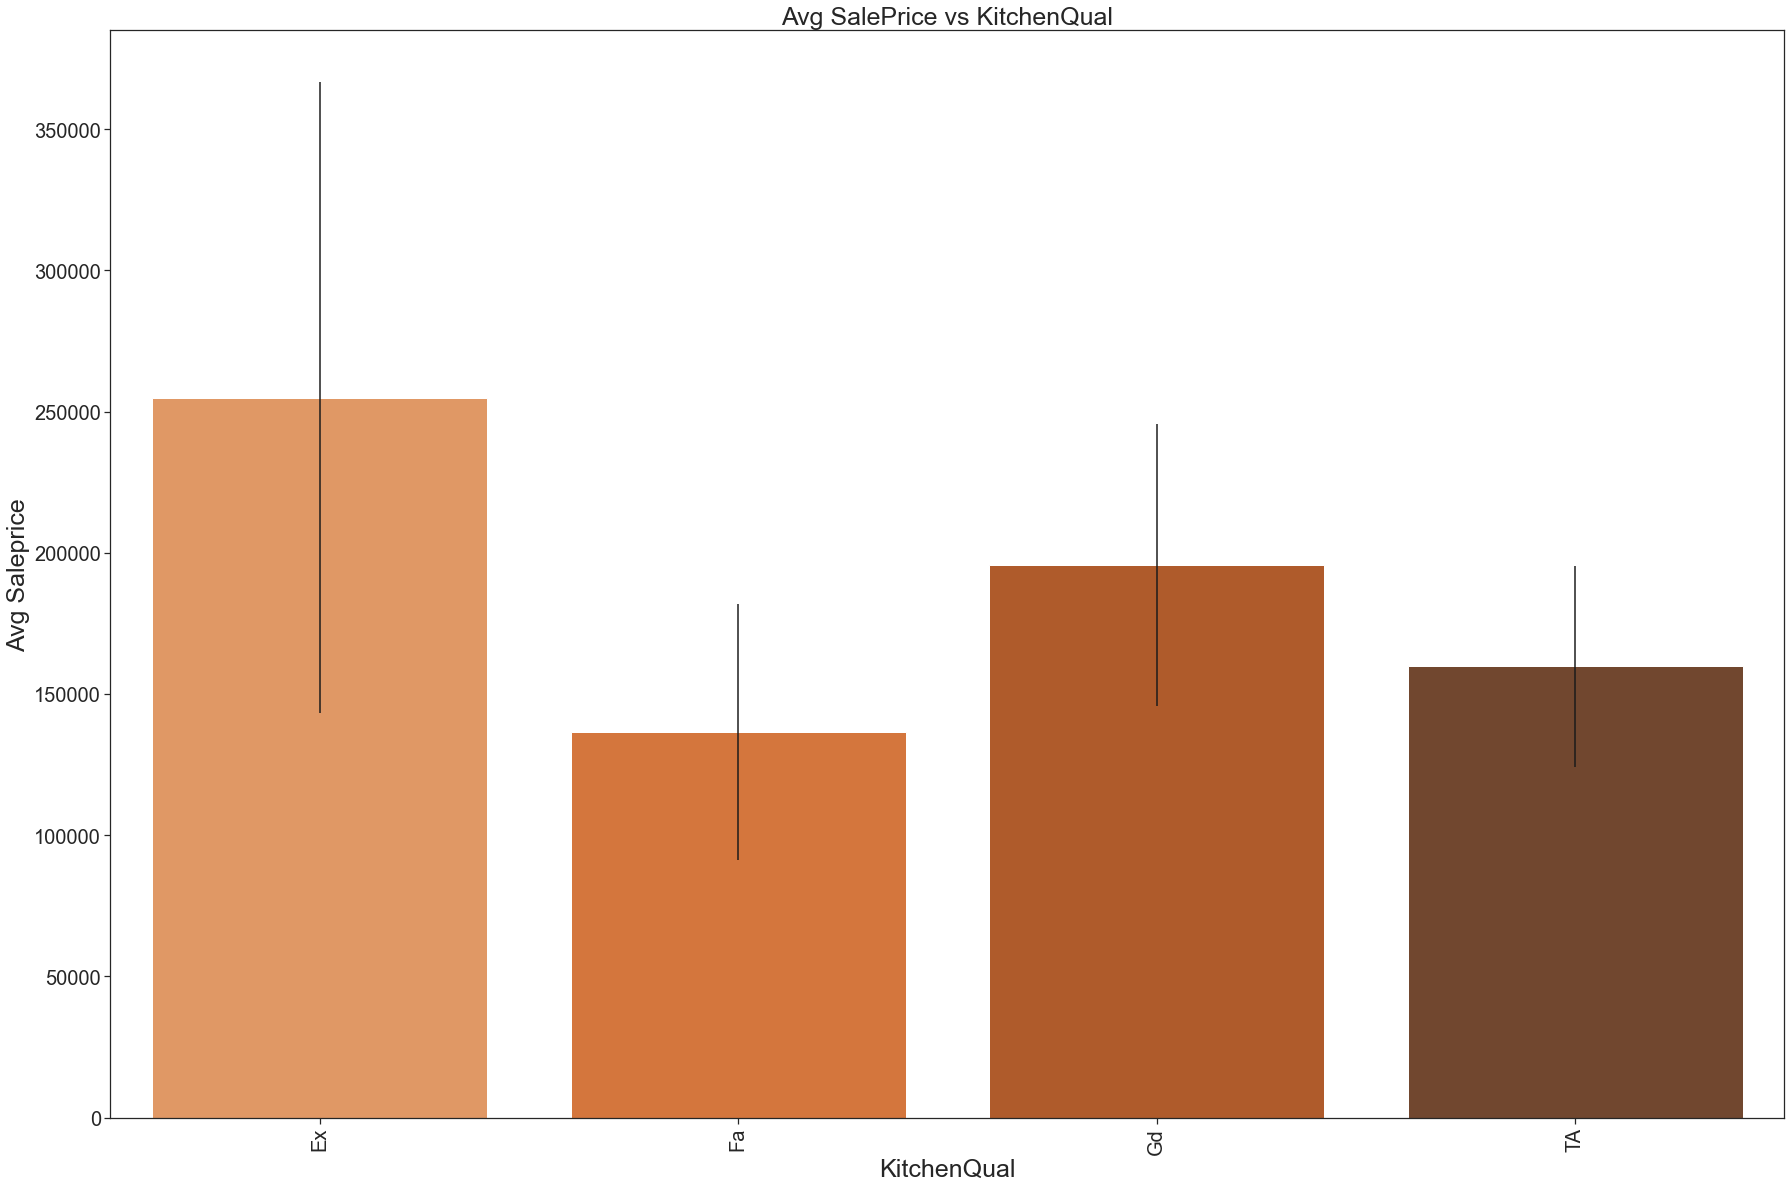

In [157]:
# 14.KitchenQual: Kitchen quality
KitchenQual = (df_merged >> group_by(X.KitchenQual) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='KitchenQual', yerr=KitchenQual['stdev']*1, data=KitchenQual, capsize=3, palette='Oranges_d')
plt.xlabel('KitchenQual', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs KitchenQual', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Positive Correlation

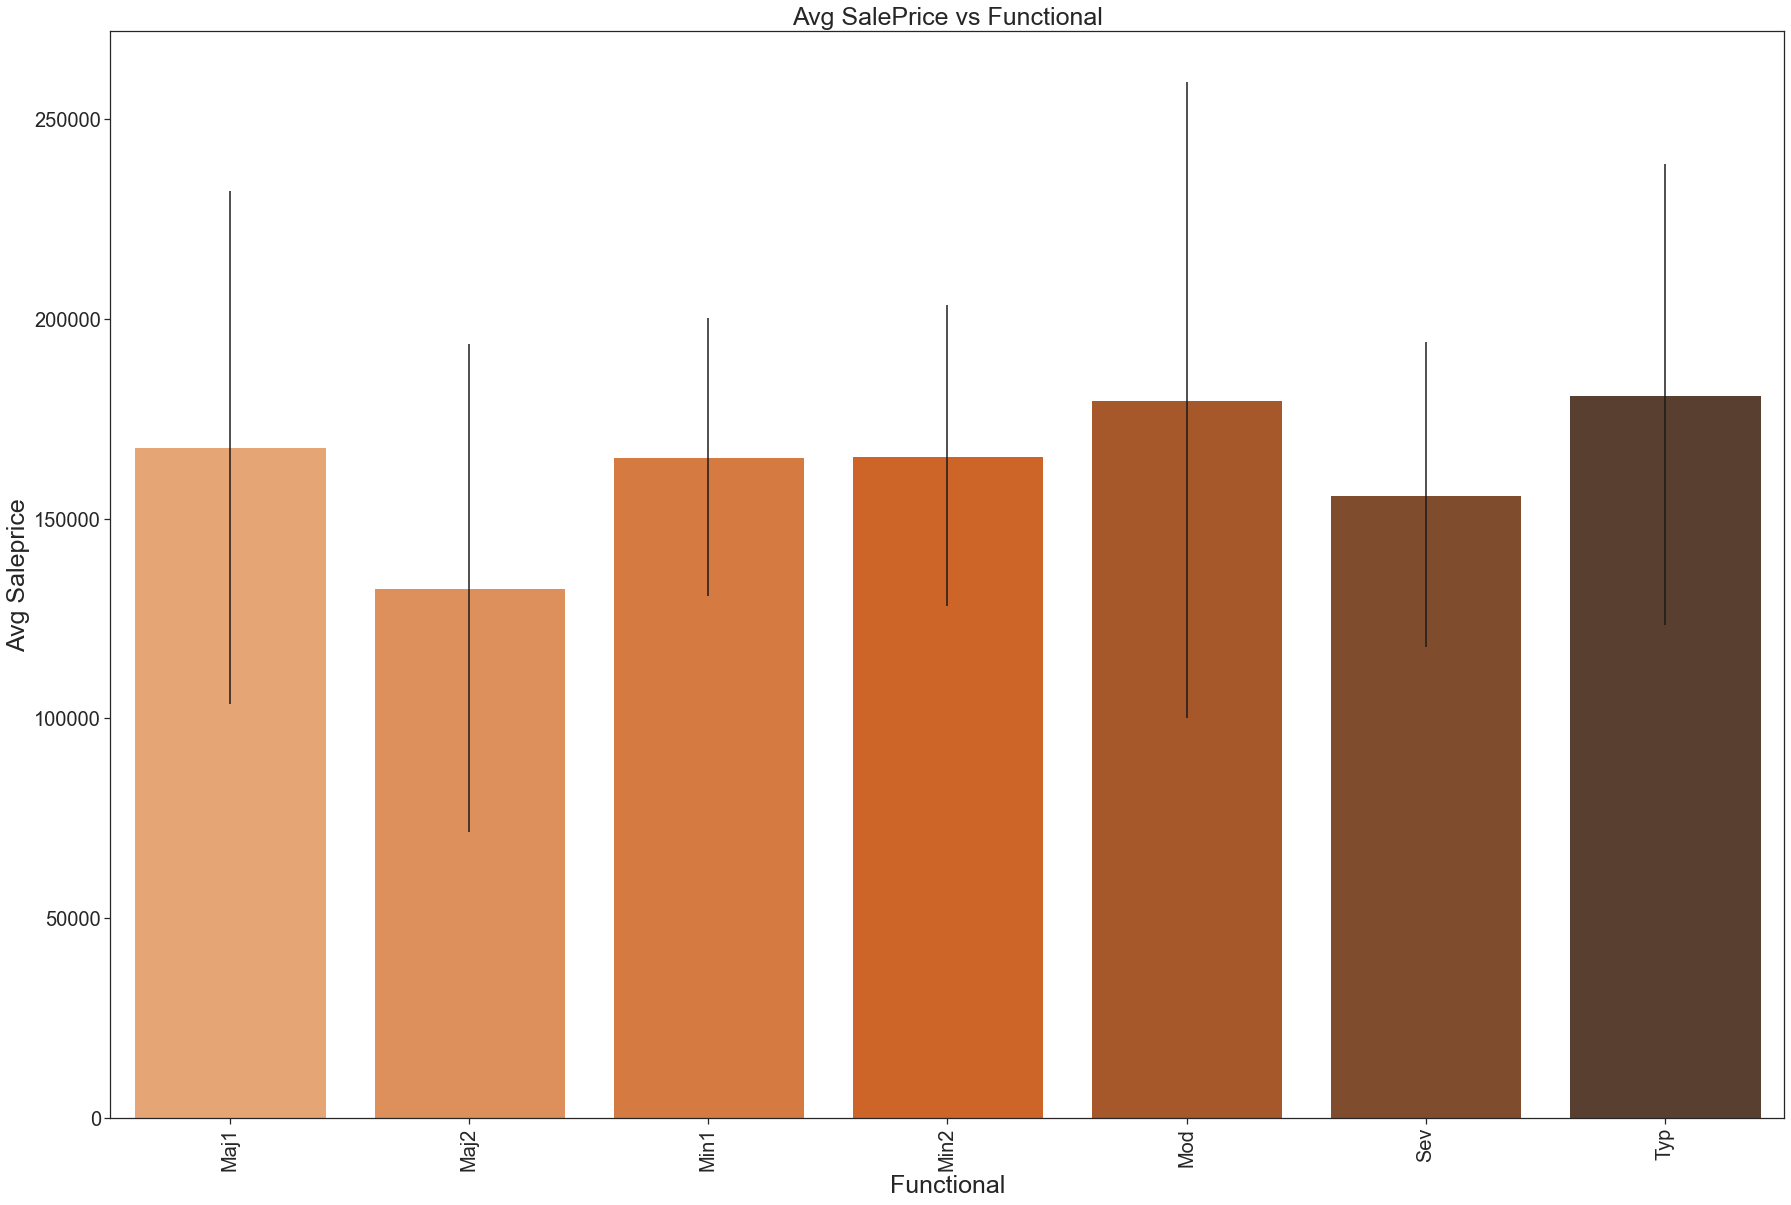

In [158]:
# 15 Functional: Home functionality (Assume typical unless deductions are warranted)
Functional = (df_merged >> group_by(X.Functional) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='Functional', yerr=Functional['stdev']*1, data=Functional, capsize=3, palette='Oranges_d')
plt.xlabel('Functional', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs Functional', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Positive Correlation

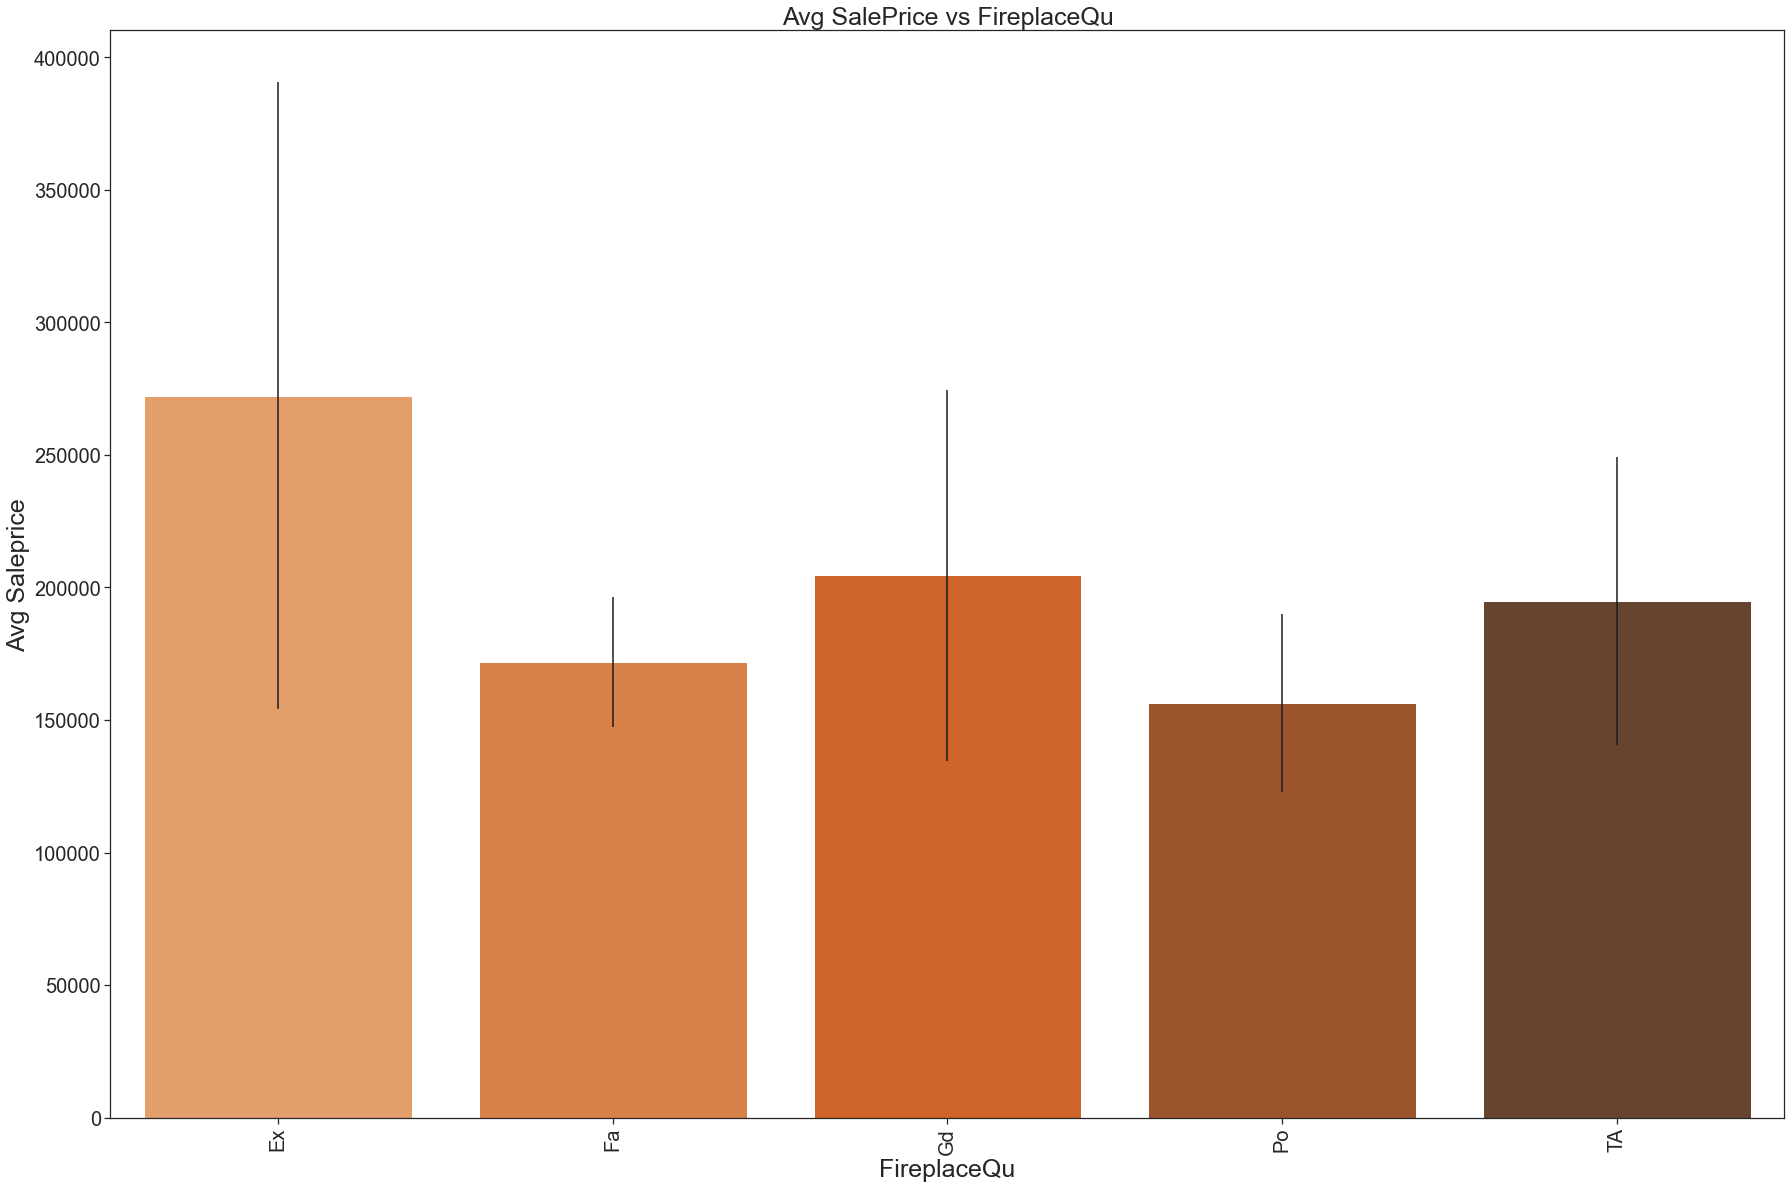

In [159]:
# 16 FireplaceQu: Fireplace quality
FireplaceQu = (df_merged >> group_by(X.FireplaceQu) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='FireplaceQu', yerr=FireplaceQu['stdev']*1, data=FireplaceQu, capsize=3, palette='Oranges_d')
plt.xlabel('FireplaceQu', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs FireplaceQu', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Positive Correlation

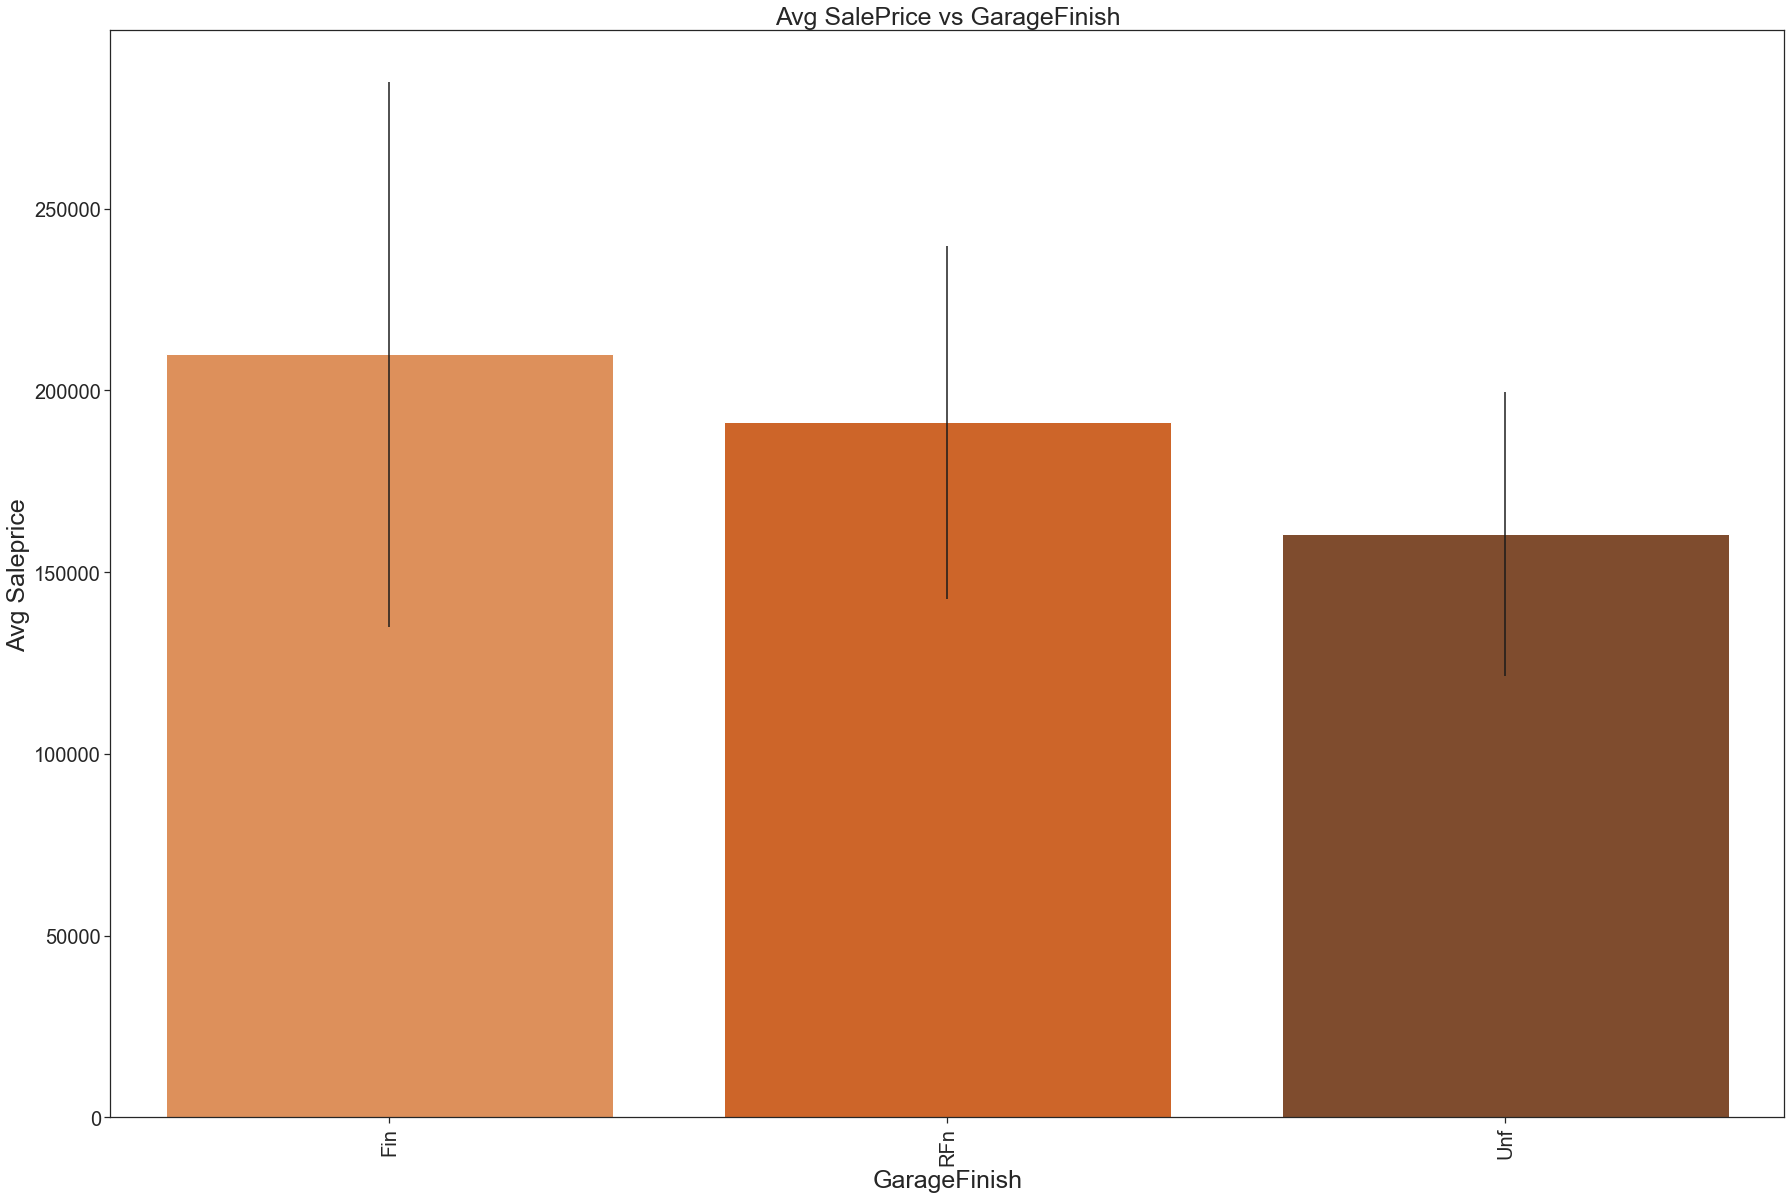

In [160]:
# 17 GarageFinish: Interior finish of the garage
GarageFinish = (df_merged >> group_by(X.GarageFinish) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='GarageFinish', yerr=GarageFinish['stdev']*1, data=GarageFinish, capsize=3, palette='Oranges_d')
plt.xlabel('GarageFinish', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs GarageFinish', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


# Obvious relationship, finished sells at highest price

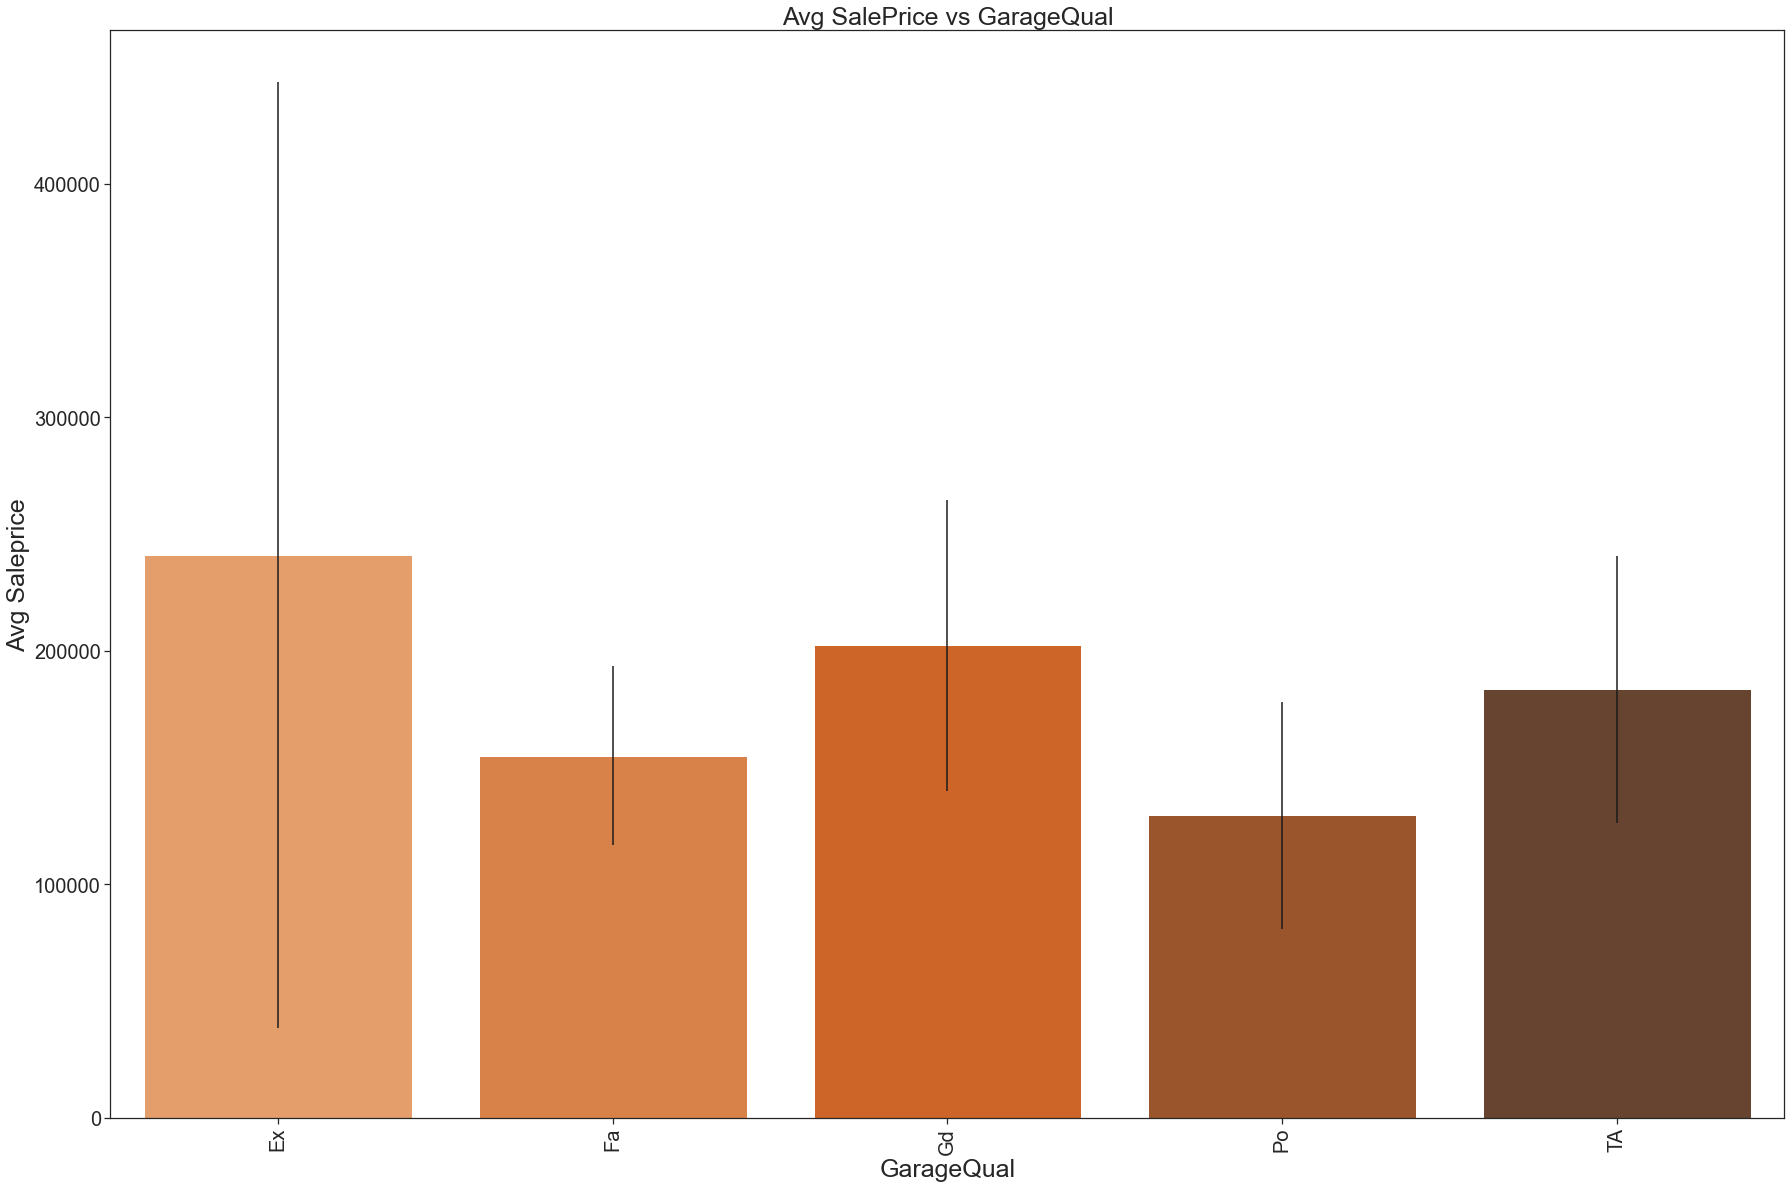

In [161]:
# 18 GarageQual: Garage quality
GarageQual = (df_merged >> group_by(X.GarageQual) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='GarageQual', yerr=GarageQual['stdev']*1, data=GarageQual, capsize=3, palette='Oranges_d')
plt.xlabel('GarageQual', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs GarageQual', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Positive Correlation

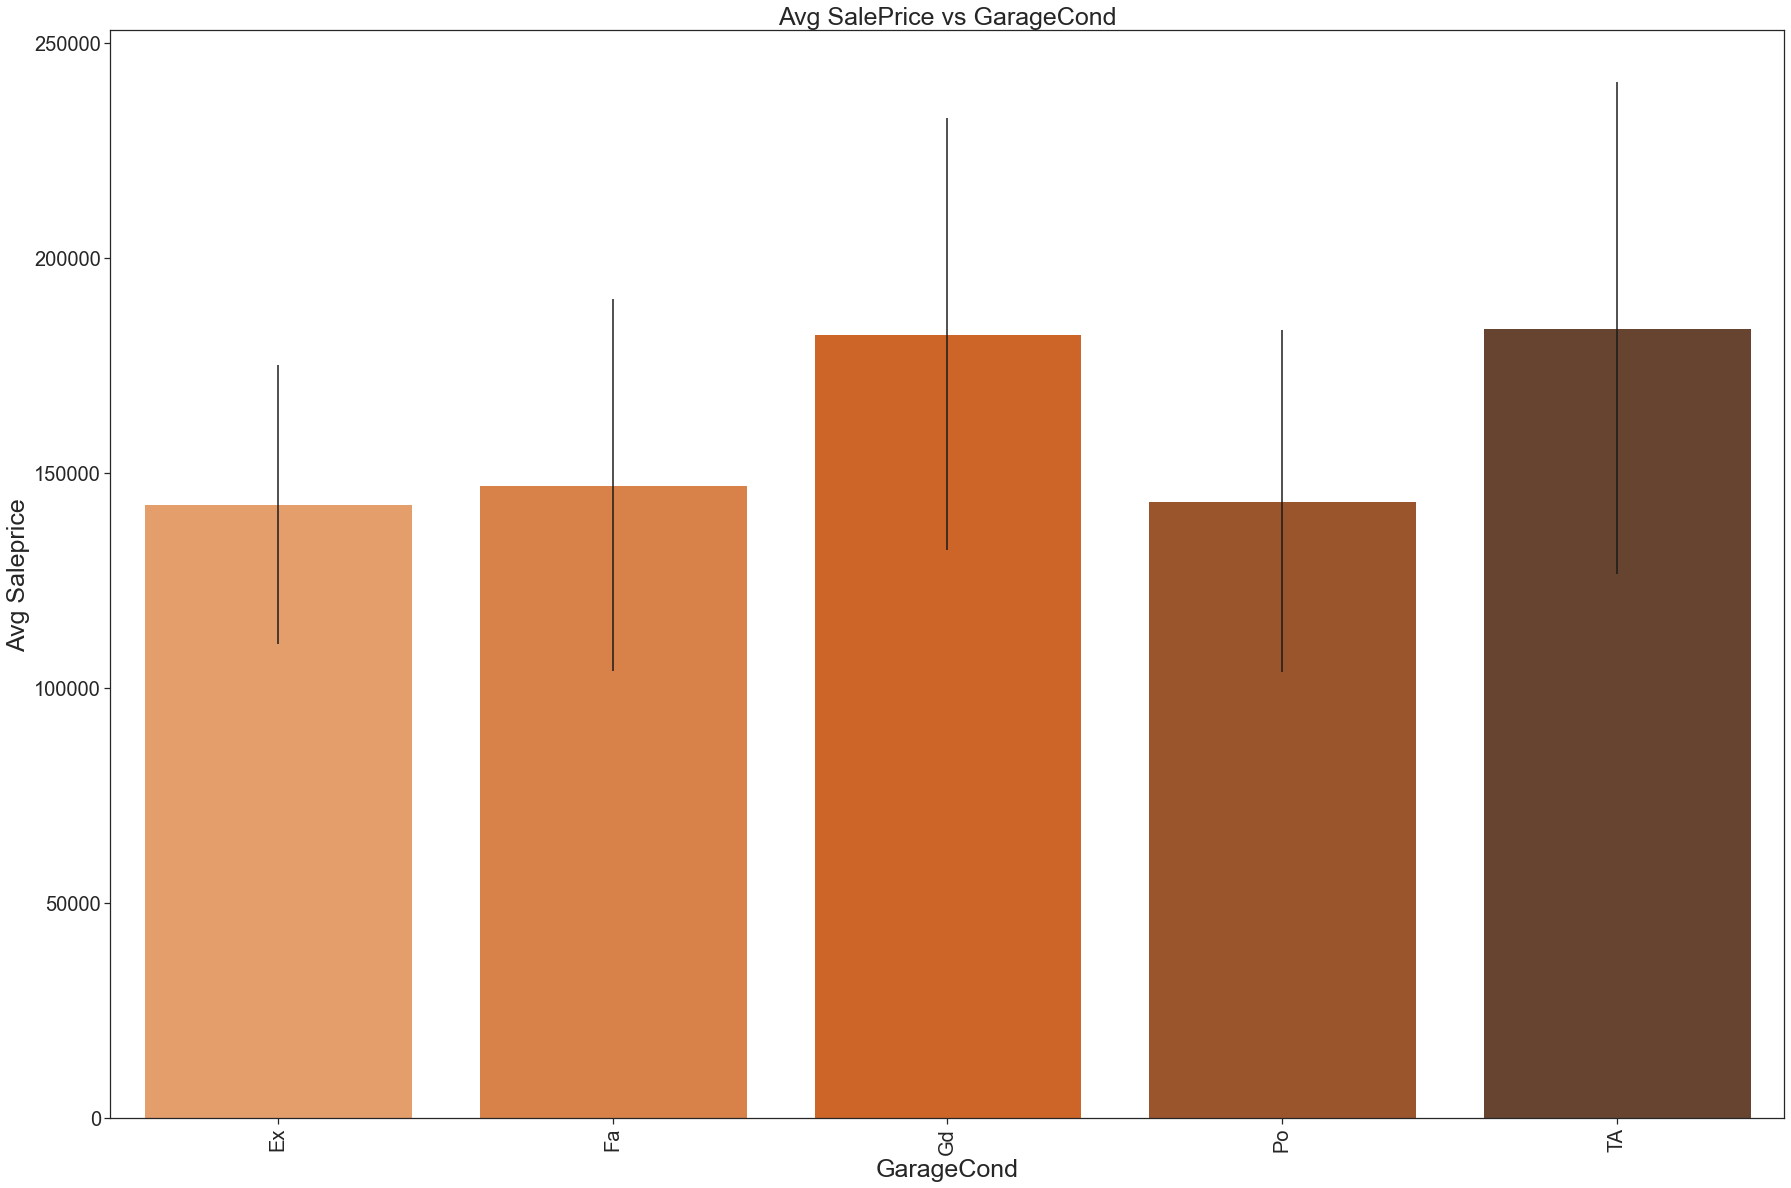

In [162]:
# 19 GarageCond: Garage condition
GarageCond = (df_merged >> group_by(X.GarageCond) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='GarageCond', yerr=GarageCond['stdev']*1, data=GarageCond, capsize=3, palette='Oranges_d')
plt.xlabel('GarageCond', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs GarageCond', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Surprisingly excellent condition sells at lower price than average condition, while the stdev of excellent is very very low, for average it's very high, the data seems quite noisy.

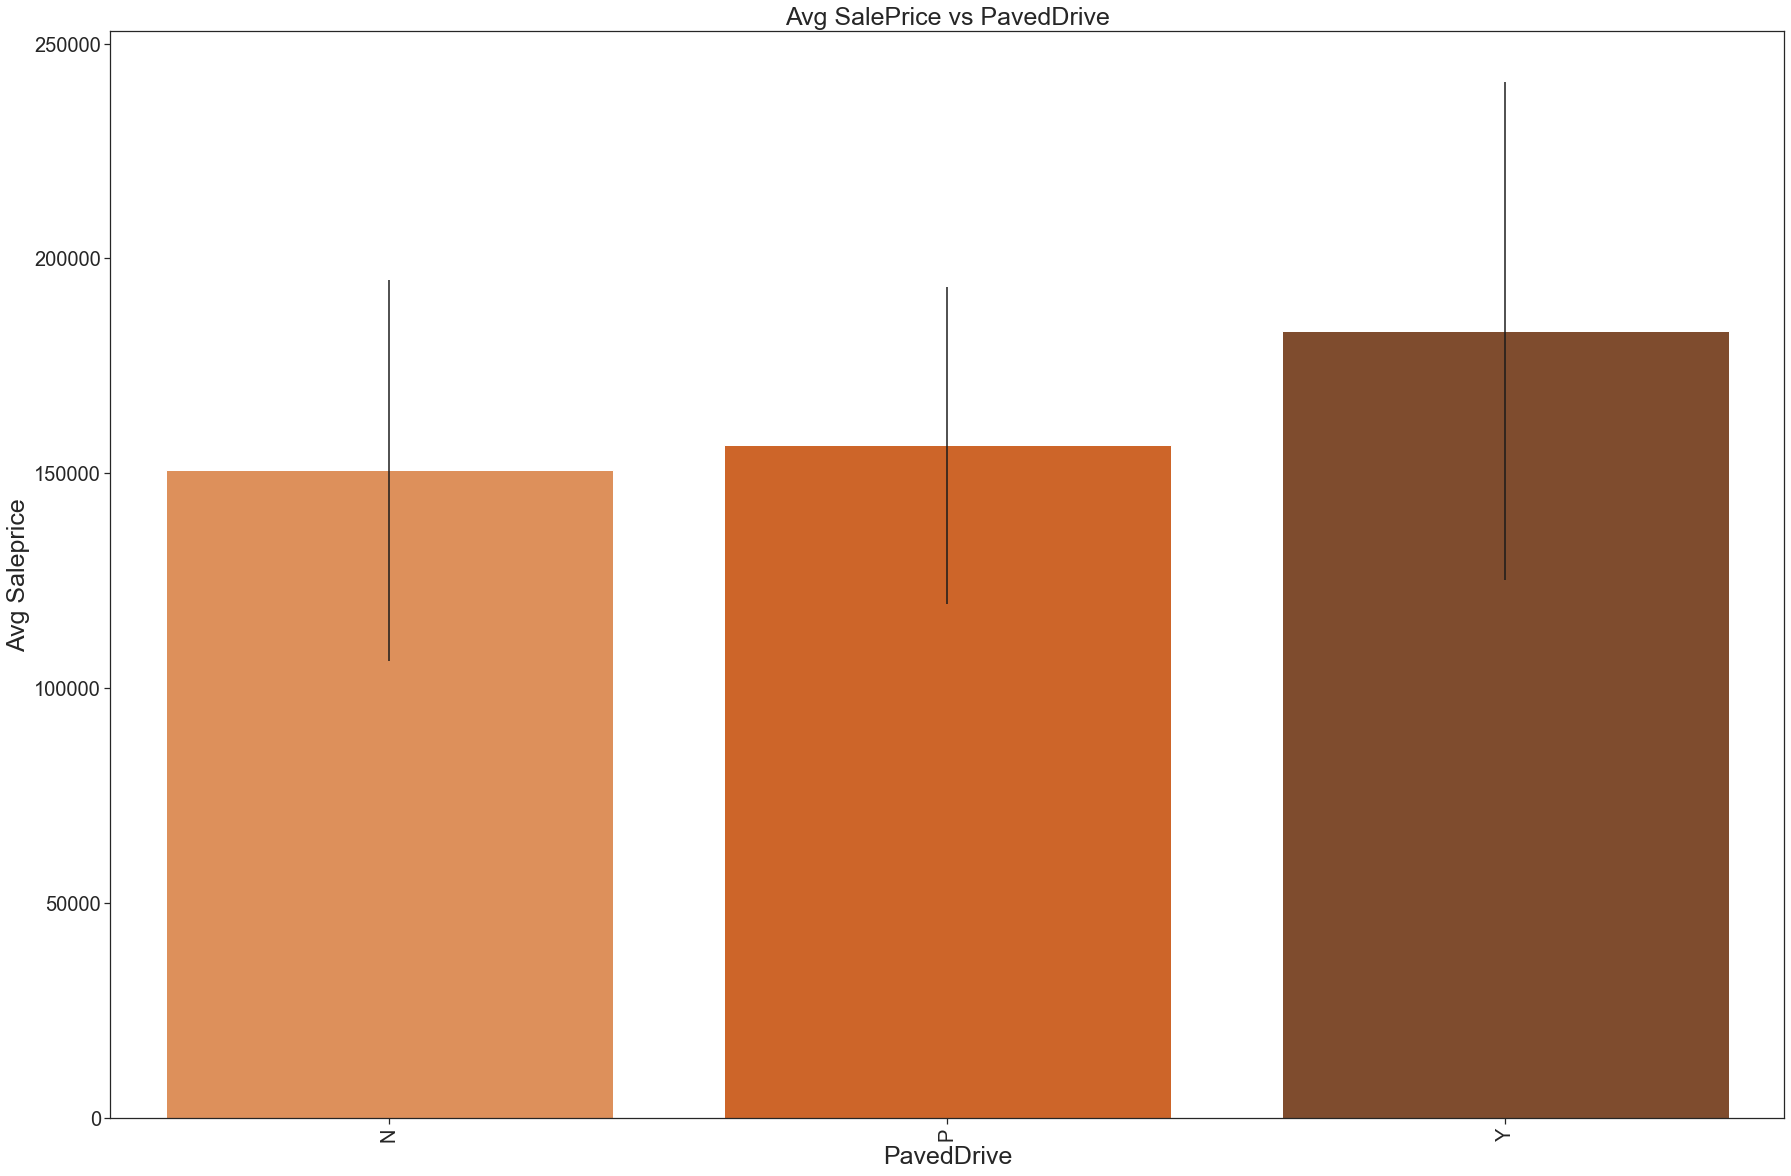

In [163]:
# 20 PavedDrive: Paved driveway
Paved_Drive = (df_merged >> group_by(X.PavedDrive) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='PavedDrive', yerr=Paved_Drive['stdev']*1, data=Paved_Drive, capsize=3, palette='Oranges_d')
plt.xlabel('PavedDrive', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs PavedDrive', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Obviously the paved driveway is selling at higher price than unpaved one.

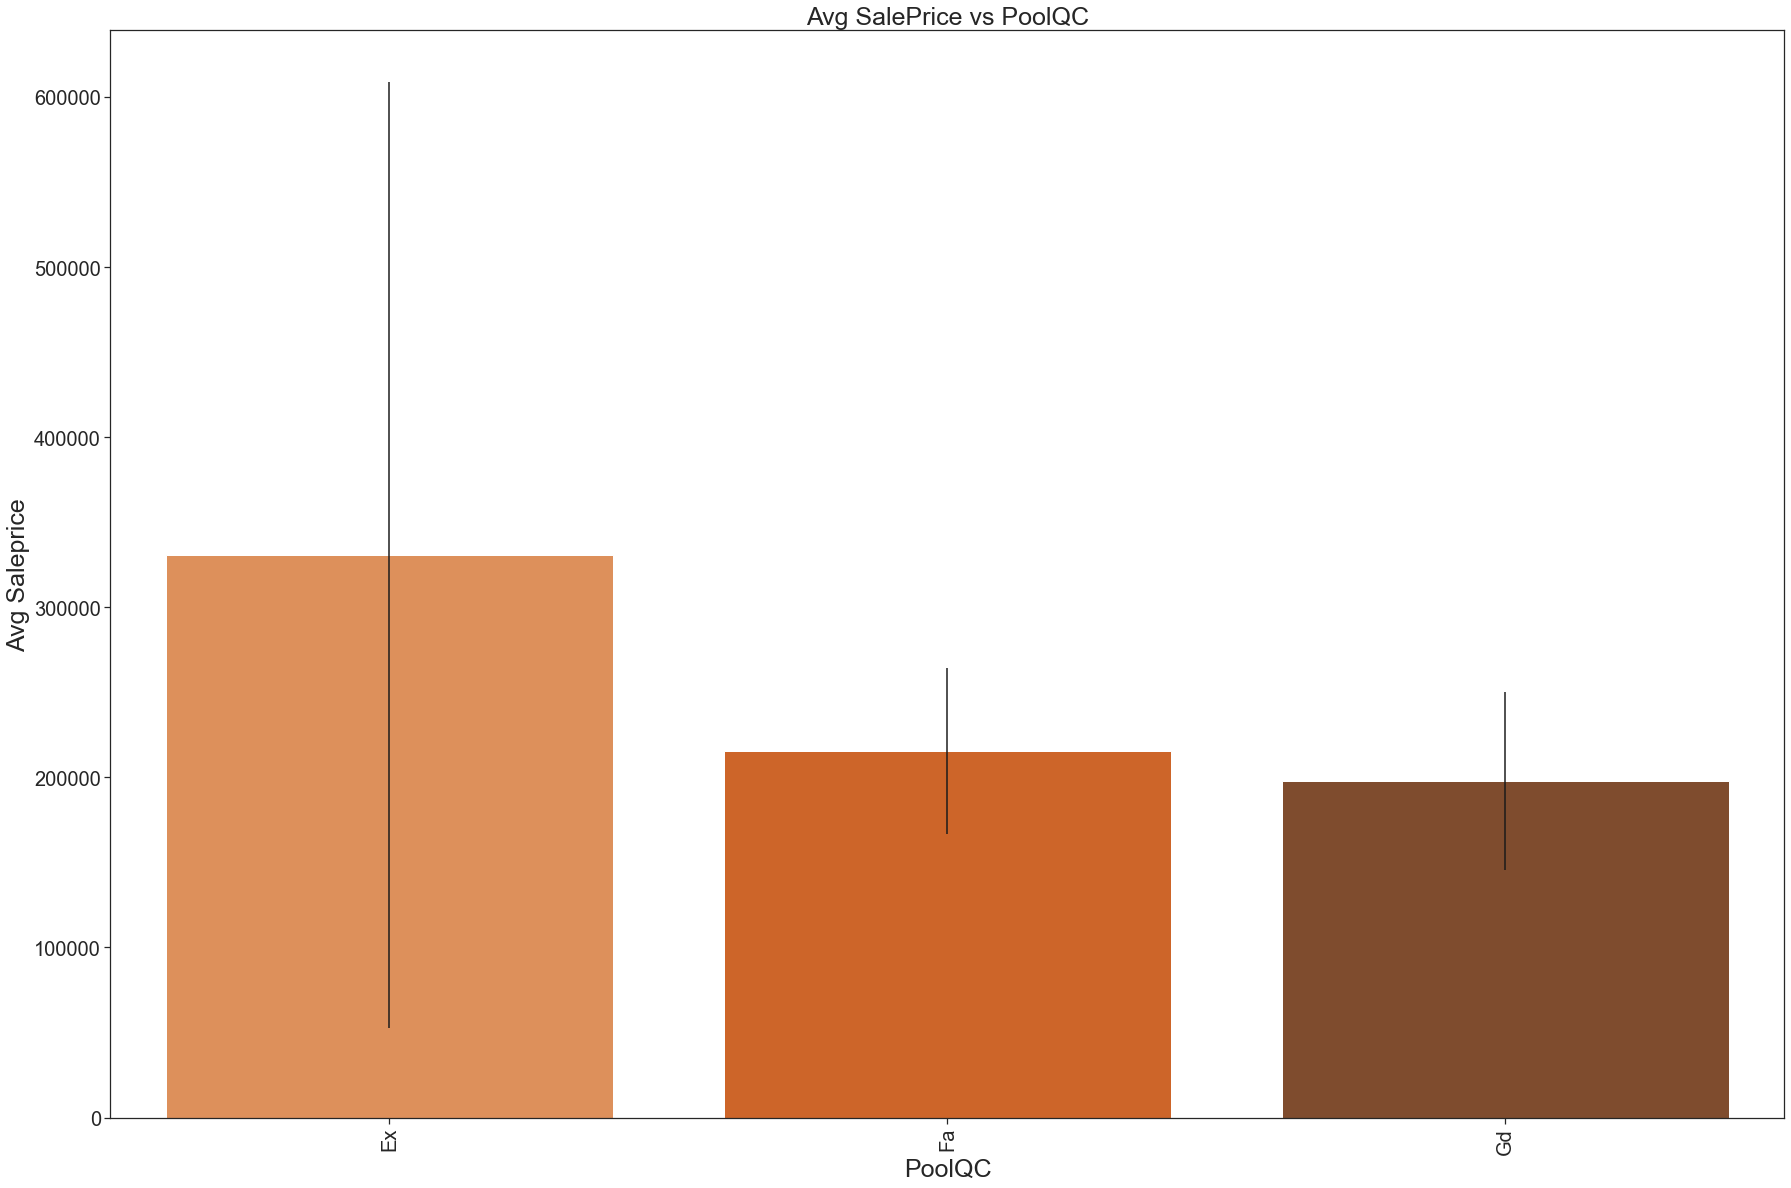

In [164]:
# 21 PoolQC: Pool quality
PoolQC = (df_merged >> group_by(X.PoolQC) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='PoolQC', yerr=PoolQC['stdev']*1, data=PoolQC, capsize=3, palette='Oranges_d')
plt.xlabel('PoolQC', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs PoolQC', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# The good quality is selling at slightly lesser than average and also excellent one is having very high stdev, data seems fishy.

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

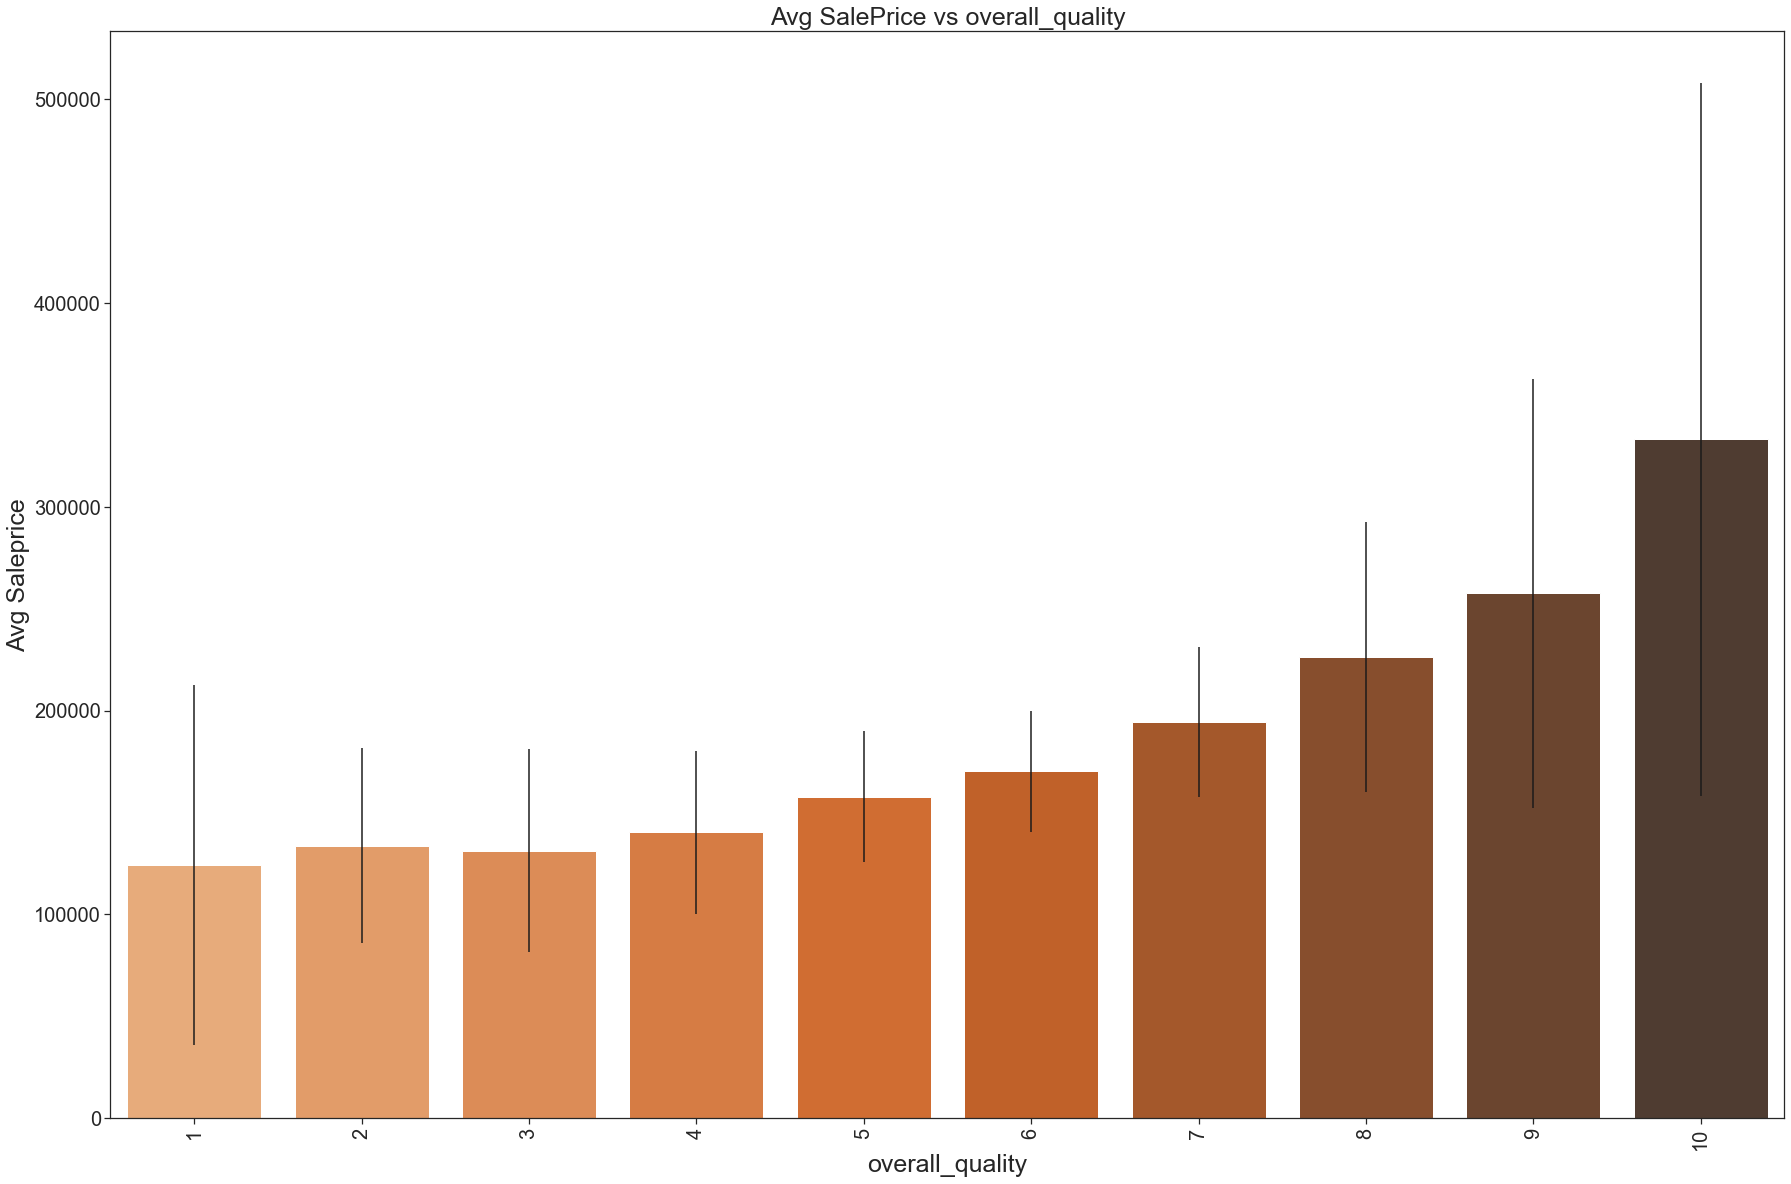

In [165]:
# 22. OverallQual: Rates the overall material and finish of the house 
overall_quality = (df_merged >> group_by(X.OverallQual) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='OverallQual', yerr=overall_quality['stdev']*1, data=overall_quality, capsize=3, palette='Oranges_d')
plt.xlabel('overall_quality', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs overall_quality', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# A clear linearly increasing relationship is seen !!.

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

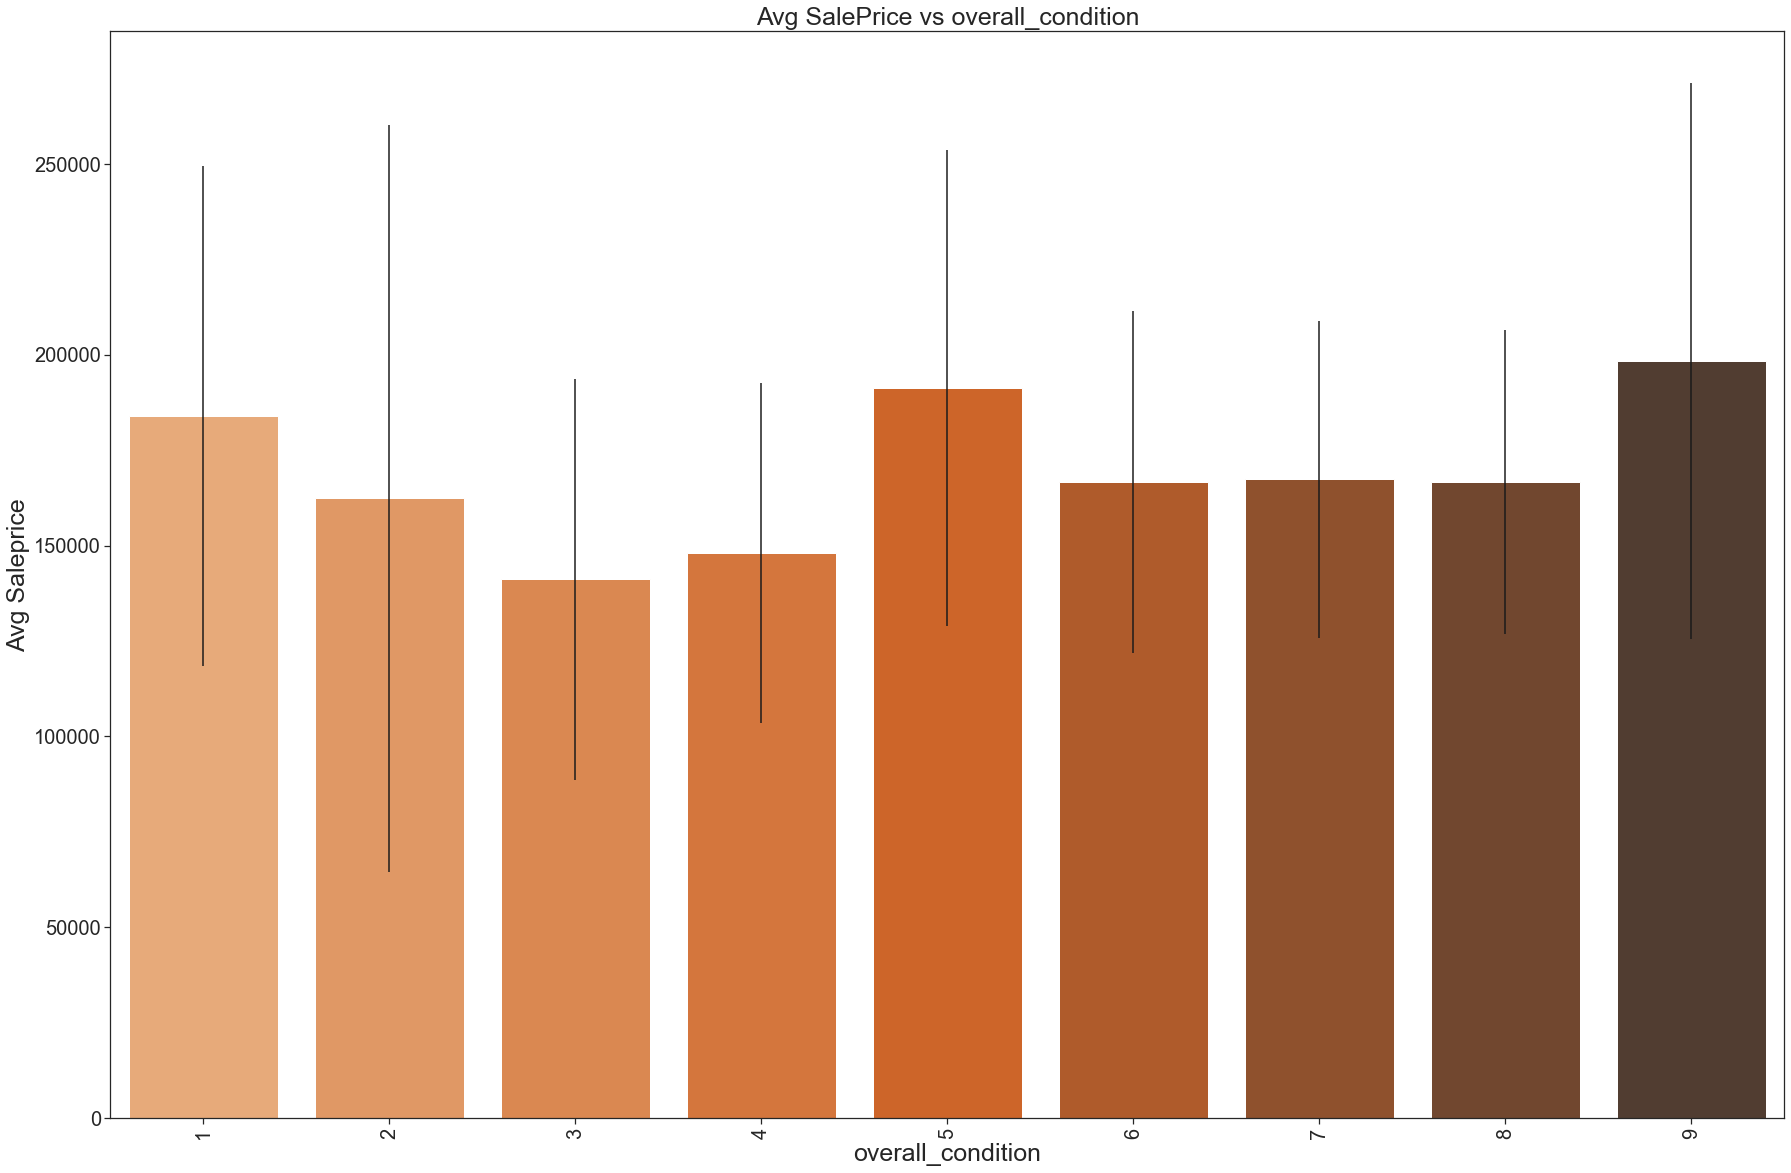

In [166]:
# 23. OverallCond: Rates the overall condition of the house 
overall_condition = (df_merged >> group_by(X.OverallCond) >> summarize(avg=mean(X.SalePrice), stdev=sd(X.SalePrice)))
sns.set(style='ticks')
sns.barplot(y='avg', x='OverallCond', yerr=overall_condition['stdev']*1, data=overall_condition, capsize=3, palette='Oranges_d')
plt.xlabel('overall_condition', fontsize=25)
plt.ylabel('Avg Saleprice', fontsize=25)
plt.title('Avg SalePrice vs overall_condition', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# Quite a linearly increasing relationship seen here.

# That was quite an expansive set of feature analysis
# Numerical Continous - 20
# Numerical Discrete - 20
# Categorical (Nominal) - 23
# Categorical (Ordinal) - 23


# Now it's highly difficult to choose factors that really matter based purely on intuition as we have seen quite clearly that some features show association quite opposite to our intuition.<br>
# This is where Feature selection tricks come into our help
# Also Advanced Regression Techniques can be used here in order to bring down the number of features going into the actual model.

# However just for the sake of curiosity, let me just make a list of features that would go into my model based on the extensive feature analysis I have done so far.
# The features I would select are as follows.


# Numerical Continous<br>
1 LotFrontage<br>
2 LotArea<br>
3 MasVnrArea<br>
4 TotalBsmtSF<br>
5 1stFlrSF<br>
6 2ndFlrSF<br>
7 GrLivArea<br>
8 GarageArea<br>
9 WoodDeckSF<br>
10 OpenPorchSF<br>
11 EnclosedPorch<br>
# To drop<br>
1 BsmtFinSF1<br>
2 BsmtFinSF2<br>
3 BsmtUnfSF<br>
4 LowQualFinSF<br>
5 3SsnPorch<br>
6 ScreenPorch<br>
7 PoolArea<br>
8 SalePrice<br>
9 MiscVal<br>


# Numerical Discrete<br>
1 BsmtFullBath<br>
2 FullBath<br>
3 HalfBath<br>
4 TotRmsAbvGrd<br>
5 Fireplaces<br>
6 GarageCars<br>
7 YearBuilt<br>
8 YearRemodAdd<br>
9 GarageYrBlt<br>
# To drop<br>
1 BsmtHalfBath<br>
2 BedroomAbvGr<br>
3 KitchenAbvGr<br>
4 MoSold<br>
5 YrSold<br>



# Categorical - Nominal
# It's pretty tricky to select features here as we can't have a scatter plot here.
# So instead i'll list down the features that I'll drop
1. Utilities
2. Landslope


# Categorical - Ordinal 
1. BsmtFinType2
2. PoolQC

# Okay let's come back to Machine Learning and see what features are really important

In [342]:
df_merged.shape

(2919, 81)

# 6. Data Pre-processing

# 6a. Before proceeding let me fill all the missing data.

In [343]:
# We know that 18 features have missing data
# If we look at the top 5 missing features list, then it's clear that those features in the house are absent, so let's fill those with 'Not present'

for i in ('PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'):
    df_merged[i] = df_merged[i].fillna('Not present')

69.30579531442663
68.0
0


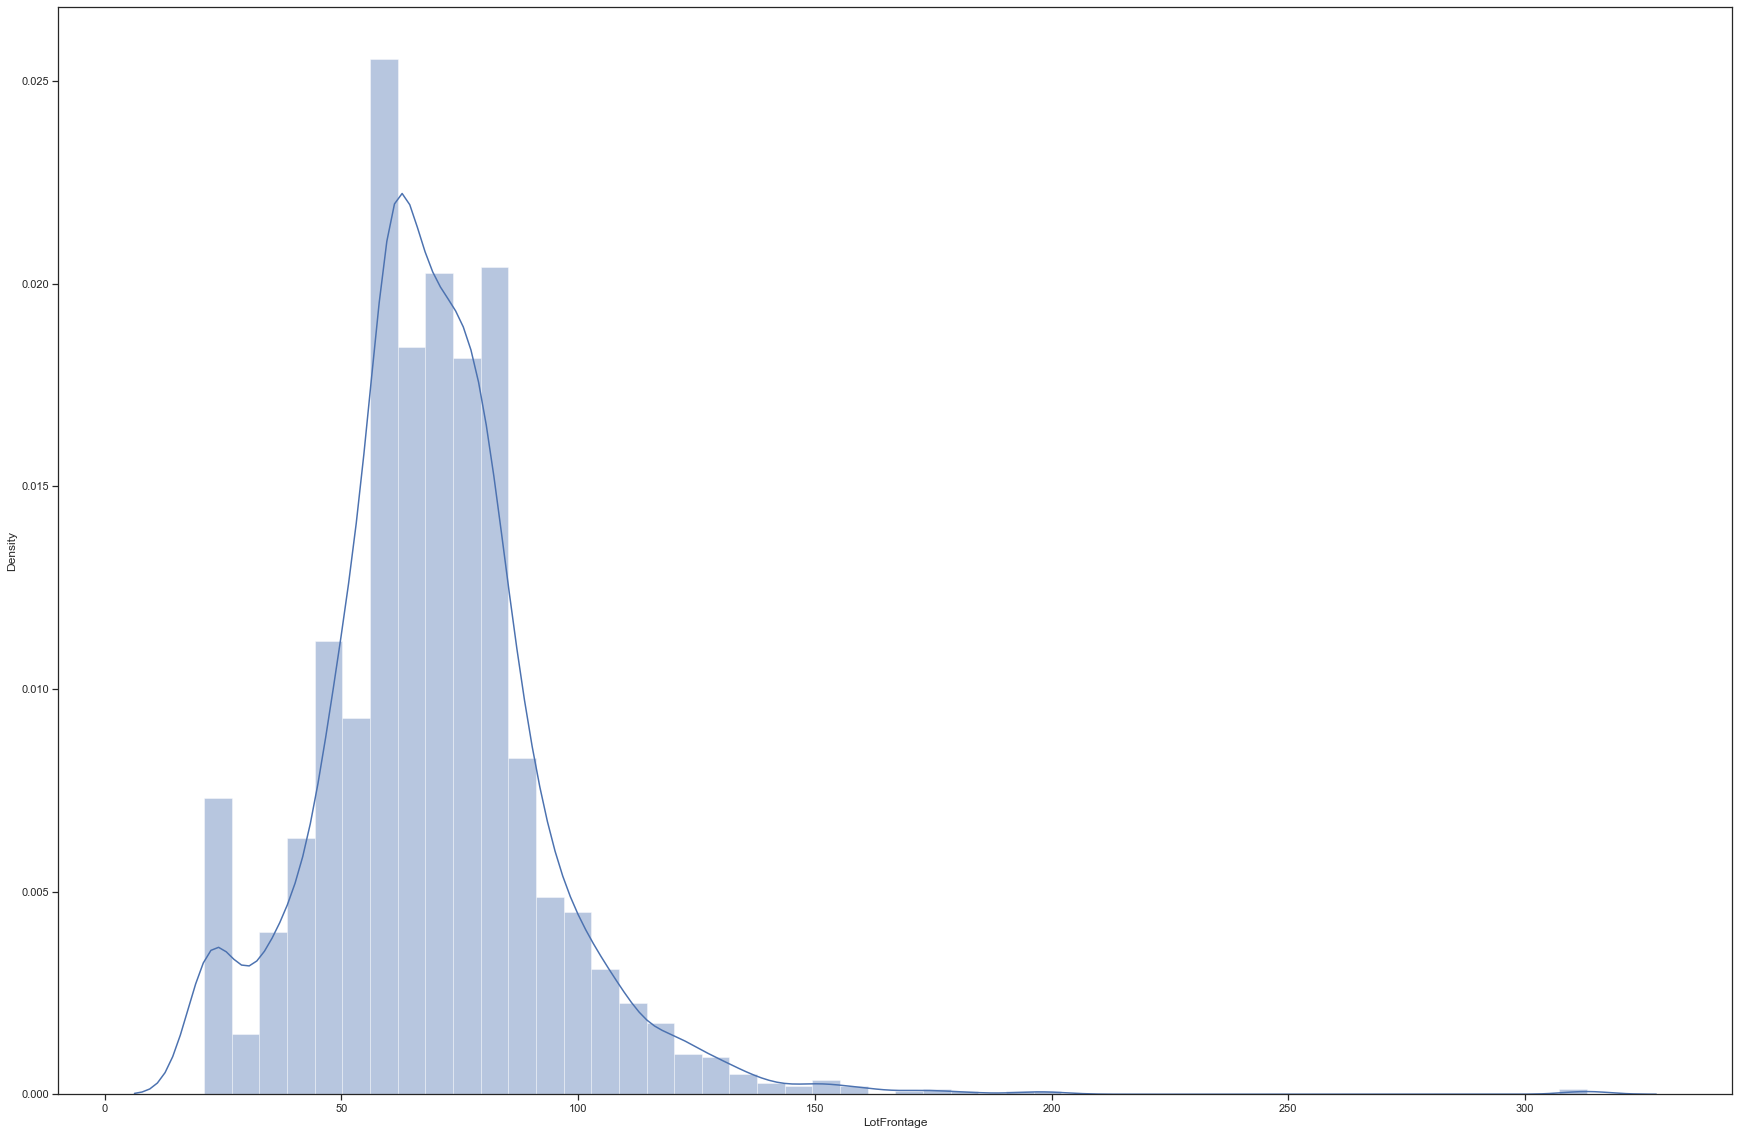

In [344]:
# Numerical feature Lot Frontage has a lot of missing values
print(df_merged['LotFrontage'].mean())
print(df_merged['LotFrontage'].median())

# By looking at t mean and median, it is very clear that they are close to each other

# sns.boxplot(df_merged.LotFrontage)
sns.distplot(df_merged.LotFrontage)

# except for a few outliers, the data seems pretty symmetric
# considering all the above factors, it is safe to fill missing values with mean!!
df_merged['LotFrontage'].fillna((df_merged['LotFrontage'].mean()), inplace=True)
print(df_merged['LotFrontage'].isnull().sum())

In [345]:
# some of the houses do not have a garage or basement, we will replace the corresponding garage and basement categorical features with 'Not present'
for i in ('GarageFinish', 'GarageQual', 'Functional',
          'GarageCond', 'MSSubClass','GarageType','MasVnrType','BsmtQual', 
          'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_merged[i] = df_merged[i].fillna('Not present')

In [346]:
# There are numerical features for garage/basement with missing data, we will replace this with 0, because in this house garage/basement doesn't exist.
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea',
          'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_merged[i] = df_merged[i].fillna(0)

In [347]:
# MSzoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType are categorical variable that gets filled with the mode since they have categories
for i in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    df_merged[i] = df_merged[i].fillna(df_merged[i].mode()[0])

In [348]:
# Also looking at the utilities feature column, we see all values fall in same category, so it's as good as saying,this feature does not affect our model, so let us drop this feature
print(df_merged['Utilities'].value_counts())
df_merged.drop(['Utilities'],axis=1, inplace=True)

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [349]:
print(df_merged.isnull().sum().sum())

0


In [350]:
print(df_merged.shape)

(2919, 80)


In [351]:
df_merged_copy = df_merged.copy()

# Ahh!! finally we have got rid of all the missing data!!

# 6b. Dealing with Categorical variables.

In [352]:
# Ordinal features will be label encoded
# Also looking at Month sold and Year sold, they suit more as categorical feature than continous variable as months are fixed at 12 values and Year sold lies between 
# Let's convert Month sold, year sold in to categories before  label encod9ing them
df_merged['YrSold'] = df_merged['YrSold'].apply(str)
df_merged['MoSold'] = df_merged['MoSold'].apply(str)
df_merged['MSSubClass'] = df_merged['MSSubClass'].apply(str)

ordinal_features = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope') 
# df_ordinal = df_merged[['Street','Alley','BldgType','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','OverallQual','OverallCond','YrSold','MoSold']]


from sklearn.preprocessing import LabelEncoder



labenc = LabelEncoder()
for i in ordinal_features:
    df_merged[i] = labenc.fit_transform(df_merged[i])
    


In [354]:
df_merged

Id  MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          10       RL         65.0     8450       1      1   
1        2           5       RL         80.0     9600       1      1   
2        3          10       RL         68.0    11250       1      1   
3        4          11       RL         60.0     9550       1      1   
4        5          10       RL         84.0    14260       1      1   
...    ...         ...      ...          ...      ...     ...    ...   
2914  2915           2       RM         21.0     1936       1      1   
2915  2916           2       RM         21.0     1894       1      1   
2916  2917           5       RL        160.0    20000       1      1   
2917  2918          14       RL         62.0    10441       1      1   
2918  2919          10       RL         74.0     9627       1      1   

      LotShape LandContour LotConfig  ...  PoolArea PoolQC Fence  MiscFeature  \
0            3         Lvl    Inside  ...         0      3     4  Not present   
1            3         Lvl       FR2  ...         0      3     4  Not present   
2            0         Lvl    Inside  ...         0      3     4  Not present   
3            0         Lvl    Corner  ...         0      3     4  Not present   
4            0         Lvl       FR2  ...         0      3     4  Not present   
...        ...         ...       ...  ...       ...    ...   ...          ...   
2914         3         Lvl    Inside  ...         0      3     4  Not present   
2915         3         Lvl    Inside  ...         0      3     4  Not present   
2916         3         Lvl    Inside  ...         0      3     4  Not present   
2917         3         Lvl    Inside  ...         0      3     2         Shed   
2918         3         Lvl    Inside  ...         0      3     4  Not present   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      4       2        WD         Normal     208500  
1          0      7       1        WD         Normal     181500  
2          0     11       2        WD         Normal     223500  
3          0      4       0        WD        Abnorml     140000  
4          0      3       2        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
2914       0      8       0        WD         Normal     167081  
2915       0      6       0        WD        Abnorml     164789  
2916       0     11       0        WD        Abnorml     219222  
2917     700      9       0        WD         Normal     184924  
2918       0      2       0        WD         Normal     187742  

[2919 rows x 80 columns]

#  Categorical(Nominal) features - we will use pd.get_dummies

In [355]:
df_merged = df_merged.drop(['Id'], axis=1)

In [ ]:
df_merged = pd.get_dummies(df_merged)

In [364]:
df_merged.shape

(2919, 222)

# We see that after conversion of categorical features, we have a total of 221 features(excluding target variable).

# 7. Splitting the dataset and Scaling

In [365]:
# Target variable
y = df_merged['SalePrice']
# Independant variables
X = df_merged.drop(['SalePrice'],axis=1)

# splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y, random_state = 0)

# Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

# 8. Model selection, training and optimising

# a. Linear regression with Normal Equation

In [366]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_train, y_train))
print(lin_reg.score(X_test, y_test))

# This is a case of overfitting, further let's use cross validation to see if it gets any better.

 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

scores = cross_val_score(lin_reg, X_train, y_train)
print(f'Cross_validation scores: {scores}')


0.5742169824746238
-5.639638876880883e+20
Cross_validation scores: [-1.36824833e+19 -3.83714969e+20 -9.78783493e+18 -3.92185439e+20
 -5.29635719e+18]


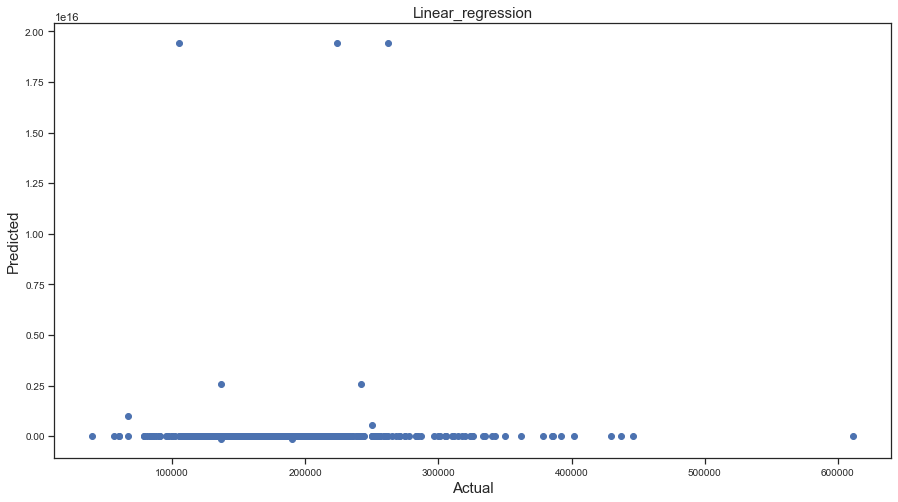

In [367]:
# Now let's have a look at what results we get from this model.
pred = lin_reg.predict(X_test)
pred = pred.reshape(-1,1)
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Linear_regression',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# It is clearly seen that linear Regression model fails, maybe because there are too many variables with multicollinearity


In [368]:
# Let's use MAE as an evaluation metric to confirm 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
lreg_MAE=  metrics.mean_absolute_error(y_test, pred)

MAE: 89273331915404.02


# The above number is absolutely meaningless!!
# Linear Regression definitely isn't the appropriate model
# Therefore we neeed to look at some advanced regression techniques

# b. Lasso Regression and Feature Importance

Text(0.5, 1.0, 'Lasso')

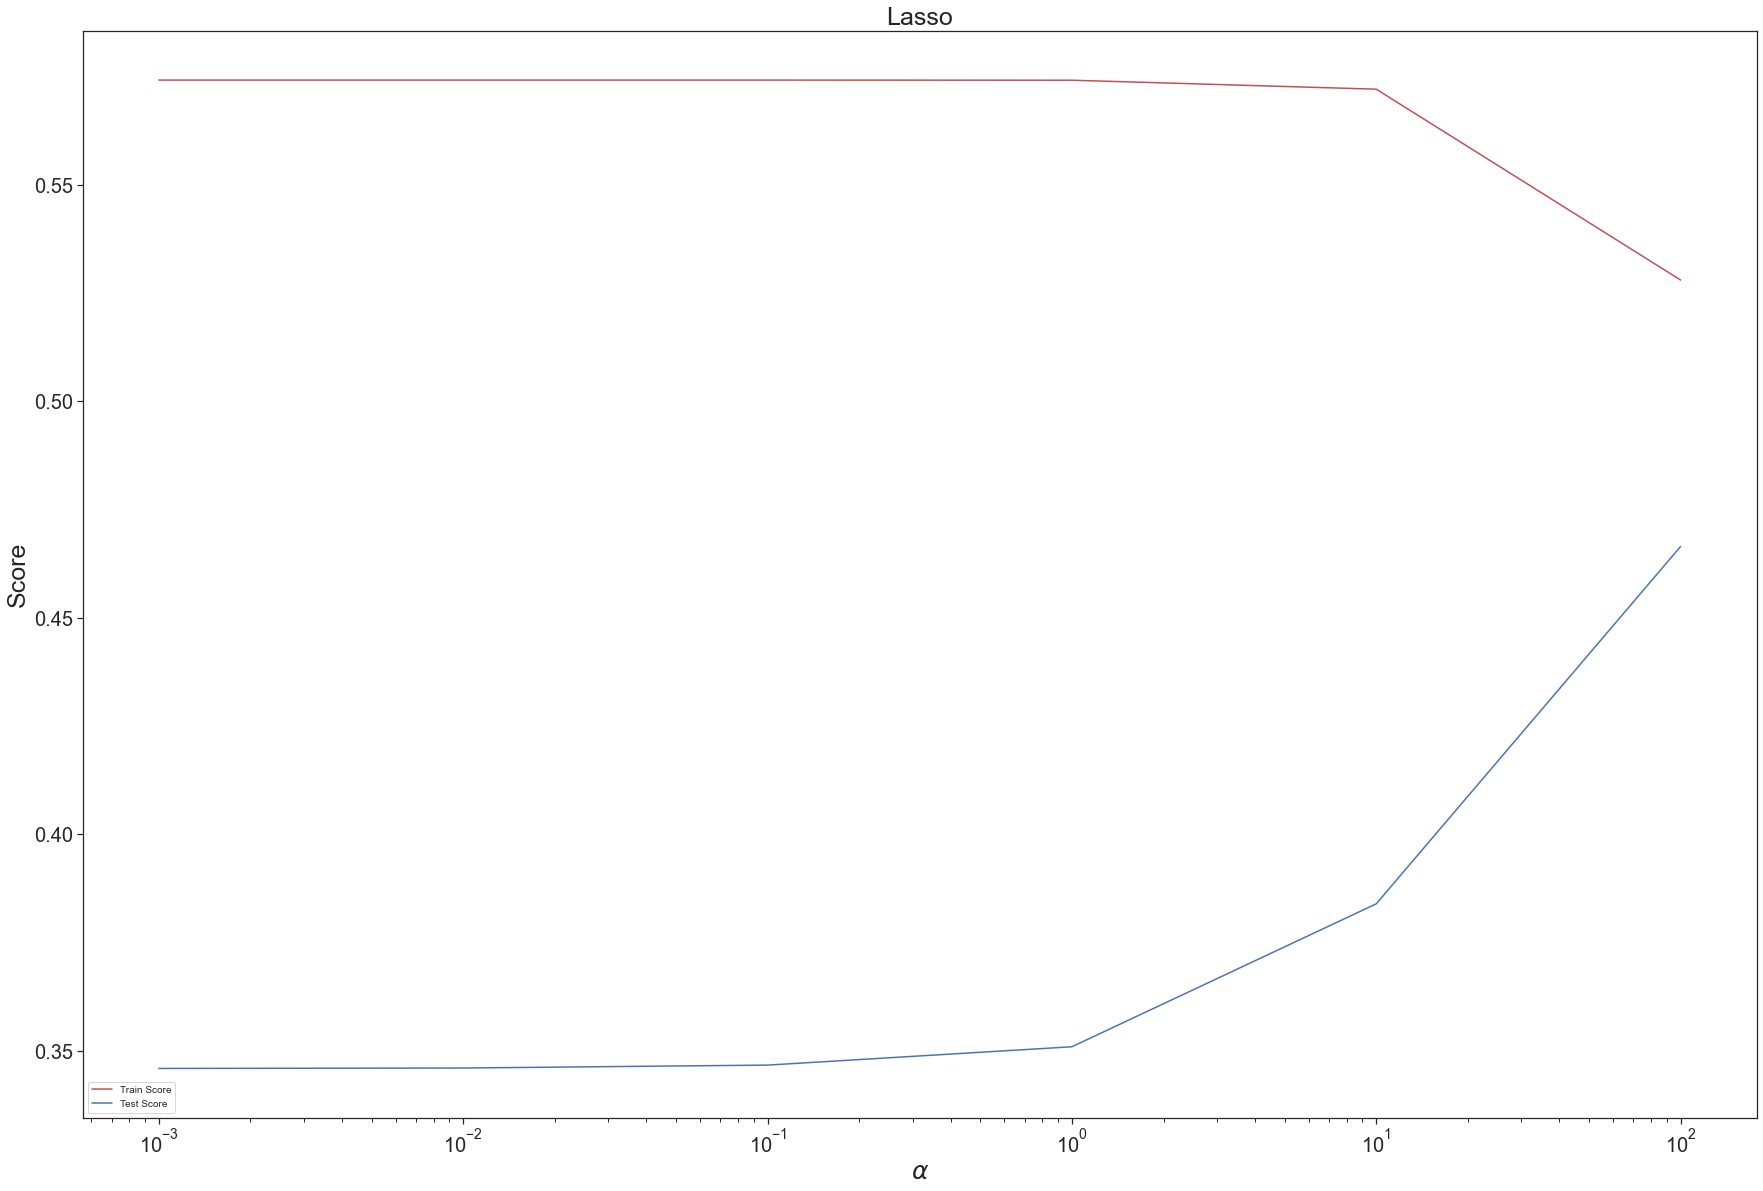

In [369]:
#Now is the fun part- lets start off by doing some feature importance using lasso
from sklearn.linear_model import Lasso
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
coeff=[]

for alpha in alphas: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )    
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

plt.plot(alphas, train_score_list, c = 'r', label = 'Train Score')
plt.plot(alphas, test_score_list, c = 'b', label = 'Test Score')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.legend(loc = 3,fontsize=10)
plt.xlabel(r'$\alpha$',fontsize=25)
plt.ylabel('Score',fontsize=25)
plt.title('Lasso',fontsize=25)

# Insights: We look at the graph above and see that for higher values of alpha(100) test and train score from the graph appear to converge, lets use cross-validation to see if we can get any better.

In [370]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV

alphas = (0.001, 0.01, 0.1, 1, 10, 100, 1000)
tuned_parameters = [{'alpha': alphas}]
grid_search = GridSearchCV(lasso,tuned_parameters, cv=5, return_train_score=True)
g1=grid_search.fit(X_train, y_train)

##Lets look at the best parameters and the best cv score for train
print(f"Best parameters for train: {g1.best_params_}")
print(f"Best cross-validation score: {g1.best_score_}")

##Use these parameters and fit to our test set
g2 = grid_search.fit(X_test, y_test)

#Lets look at the best parameters and the best cv score for test
print(f"Best parameters for test: {g2.best_params_}")
print(f"Best cross-validation score: {g2.best_score_}")

Best parameters for train: {'alpha': 100}
Best cross-validation score: 0.41140622637007257
Best parameters for test: {'alpha': 100}
Best cross-validation score: 0.3678097895824247


In [371]:
# Insight: The best parameter for alpha is 100 and the CV score for train is 0.41 and for test is 0.37

Lasso picked 78 variables and eliminated the other 143 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

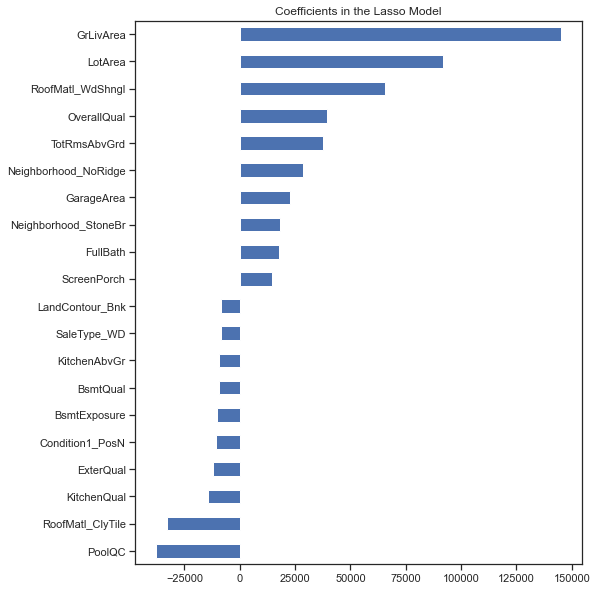

In [372]:
#Feature importance with lasso
coef = pd.Series(lasso.coef_, index = X_train_unscaled.columns)
##We check to see how many variables lasso chose to be making an impact on salePrice
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables") 

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

#Lets see which all variables are important 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [192]:
##Lets get some predictions out of the lasso model
from sklearn import metrics 
pred_lasso = grid_search.predict(X_test)
pred_lasso= pred_lasso.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
lasso_MAE = metrics.mean_absolute_error(y_test, pred_lasso)

MAE: 24423.143793946478


# The above MAE means that the House SalePrice is predicted with a error of +- 24k.
# We can already see a drastic improvement from Linear Regression.

# c. KNN Regressor

Text(0, 0.5, 'MSE')

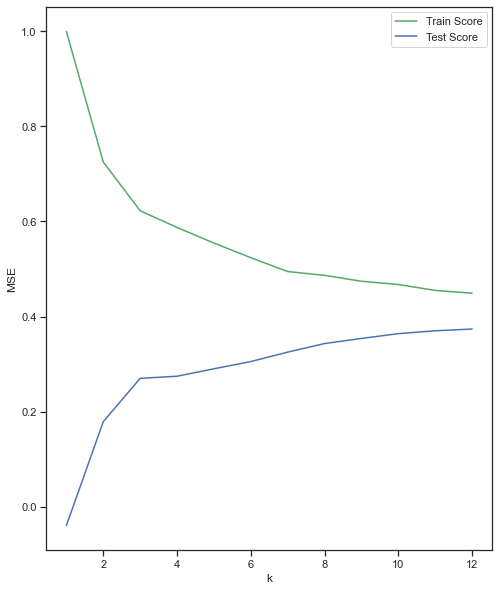

In [375]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []

for k in range(1,13):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,13)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

Insights: From the graph it looks like train and test score start converging after K= 8 . Lets use cross validation and grid search to find the best parameters

Best parameters for train: {'n_neighbors': 11}
Best cross-validation score: 0.3215144305565259


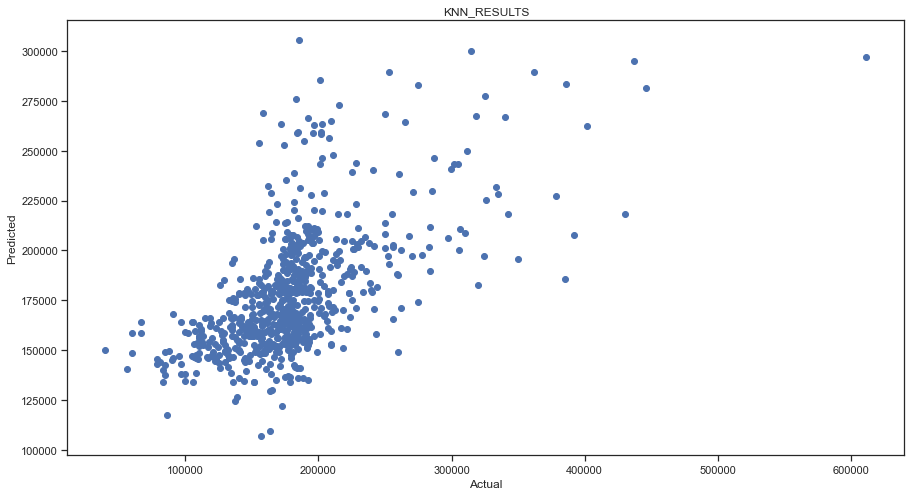

In [376]:
grid_params = {
        'n_neighbors': [1,2,3,4,5,6,7,8,9,10, 11, 12, 13]}
grid_search_KNN = GridSearchCV(knn_reg,grid_params, cv=5, return_train_score=True)

grid_search_KNN.fit(X_train, y_train)

##Lets look at the best parameters and the best cv score for train
print(f"Best parameters for train: {grid_search_KNN.best_params_}")
print(f"Best cross-validation score: {grid_search_KNN.best_score_}")

##We have used grid search with cross validation with 5 folds above and fit it to our KNN model and the output of the grid search says that Best cross validation score is 0.32 with nearest neighbors being 10
pred_KNN = grid_search_KNN.predict(X_test)
pred_KNN= pred_KNN.reshape(-1,1)
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_KNN)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN_RESULTS')
plt.show()

Insights:<br>
Best parameters for train is 11(n_neighbours) and train score is 0.32.<br>
The above plot depicts Actual on x-axis and Predicted on Y-axis, this lets us visualise how our model has performed, lets see the error rate

In [377]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_KNN))
KNN_MAE =  metrics.mean_absolute_error(y_test, pred_KNN)

MAE: 29581.52303860523


# Insights: MAE is ~29k, which signifies that my prediction is higher or lower by a margin of 29k from the actual values.

# d. Ridge regression

Text(0.5, 0, '$\\alpha$')

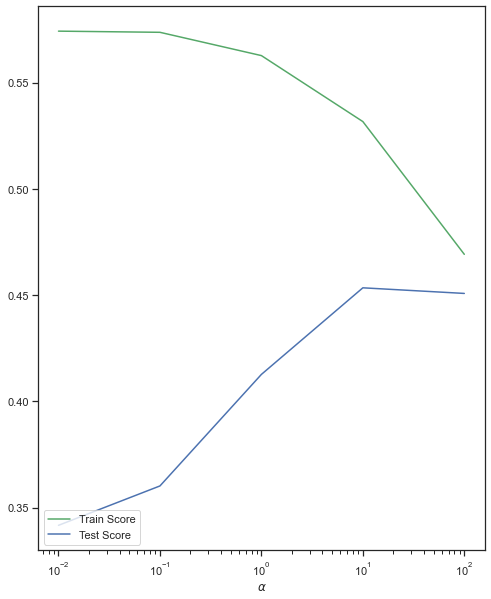

In [381]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

Insights: We notice that ridge performs similar to lasso with respect to alpha, with higher values of alpha, the test and the train score converge, which will avoid overfitting. Let's use cross validation and grid search to quantify these observations.

Best parameters for train: {'alpha': 10}
Best cross-validation score: 0.4114576863470319
MAE: 28285.18813818221


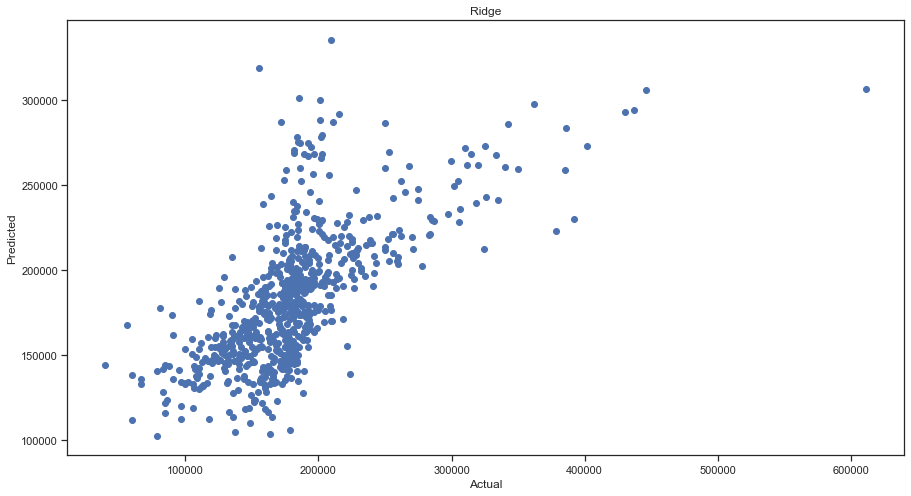

In [382]:
ridge_alphas = (0.001, 0.01, 0.1, 1, 10, 100)
grid_search_r = GridSearchCV(ridge,param_grid=dict(alpha=ridge_alphas), cv=5, return_train_score=True)
grid_search_r.fit(X_train, y_train)
print(f"Best parameters for train: {grid_search_r.best_params_}")
print(f"Best cross-validation score: {grid_search_r.best_score_}")


pred_ridge = grid_search_r.predict(X_test)
pred_ridge= pred_ridge.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))

ridge_MAE= metrics.mean_absolute_error(y_test, pred_ridge)
##Lets see how it depicts on a graph
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge')
plt.show()

# Insights : We get Best value of alpha as 10 and Best score for train of 0.41 and MAE is ~28k.

# e. Support Vector Machine(linear)

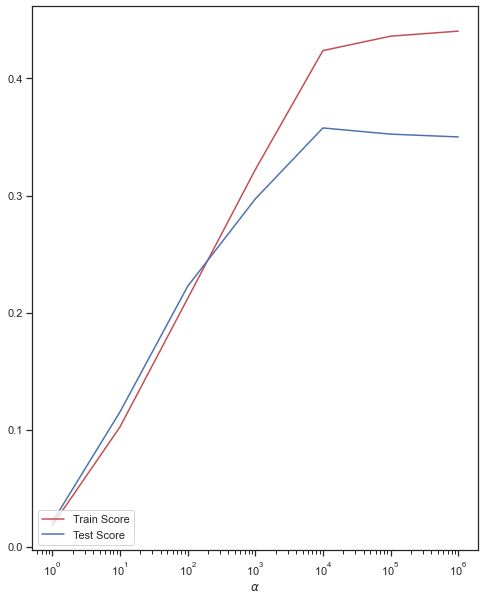

In [384]:
from sklearn.svm import SVR
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

C= [1,10,100,1000,10000,100000,1000000]

train_score_list = []
test_score_list = []

for i in C: 
    clf = SVR(kernel='linear', C=i)
    clf.fit(X_train,y_train)
    train_score_list.append(clf.score(X_train,y_train))
    test_score_list.append(clf.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(C, train_score_list, c = 'r', label = 'Train Score')
plt.plot(C, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

# Insight: Around C=10000, both train and test scores start to converge. Let's verify this. 

In [385]:
param_grid_linear = {'C': [1,10,100,1000,10000,100000,1000000]}
grid_search_linear = GridSearchCV(clf, param_grid_linear, cv=5, return_train_score=True)
grid_search_linear.fit(X_train, y_train)

print(f"Best parameters: {grid_search_linear.best_params_}")
print(f"Best cross-validation score: {grid_search_linear.best_score_}")

pred_SVM_Linear = grid_search_linear.predict(X_test)
pred_SVM_Linear= pred_SVM_Linear.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, pred_SVM_Linear))

SVM_Linear_MAE= metrics.mean_absolute_error(y_test, pred_ridge)

Best parameters: {'C': 10000}
Best cross-validation score: 0.31936267050887535
MAE: 28076.27040538923


# MAE for this model is ~28k.

In [387]:
all_MAE = [lasso_MAE,KNN_MAE,ridge_MAE,SVM_Linear_MAE]
print(type(all_MAE))
model_name = ['lasso','KNN','ridge','SVM_Linear']

models_mae = [['Lasso',lasso_MAE],['KNN',KNN_MAE],['Ridge',ridge_MAE],['SVM_Linear',SVM_Linear_MAE]]
              
df_model = pd.DataFrame(models_mae, columns = ['Model_name', 'MAE'])
print (df_model)


<class 'list'>
   Model_name           MAE
0       Lasso  24423.143794
1         KNN  29581.523039
2       Ridge  28285.188138
3  SVM_Linear  28285.188138


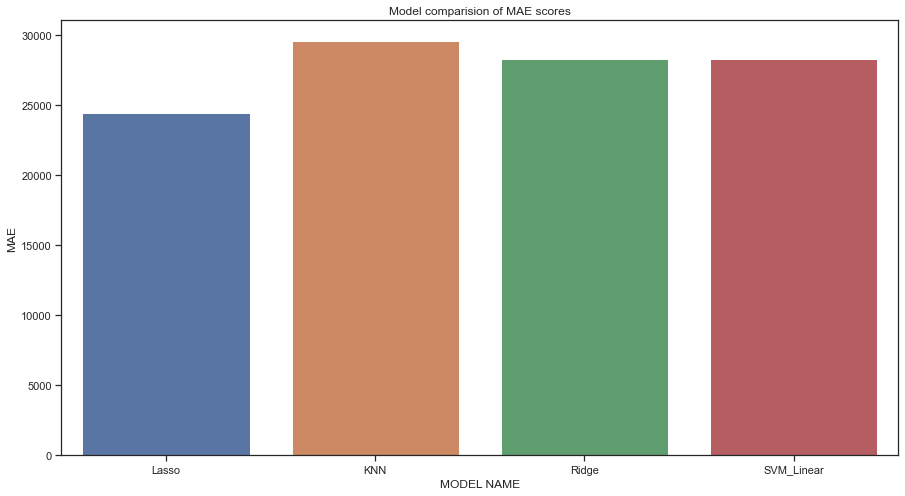

In [388]:
#Lets compute the MAE for all the models we have run and choose the one that has the least MAE
plt.figure(figsize=(15,8))
sns.barplot(x=df_model.Model_name,y=df_model.MAE)
plt.xlabel('MODEL NAME')
plt.ylabel('MAE')
plt.title('Model comparision of MAE scores')
plt.show()

# FInal Remarks : From the above plot it is clear that Lasso performs the best in predicting the house price as it's MAE is least.<br>
# So my model of choice for this dataset would be Lasso.